# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 20th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

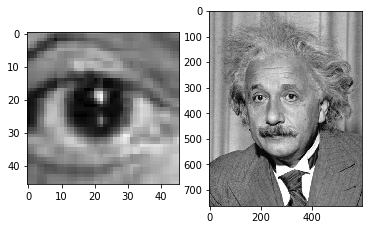

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)

plt.show()


Create a function for applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/template_matching.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

In [43]:
''' Visualization and template matching functions definition '''

from skimage import data
from skimage.feature import match_template
from numpy import linalg
from skimage.color import rgb2gray


def fEu(img1,img2):
    img1=rgb2gray(img1)
    img2=rgb2gray(img2)
    resultado=np.zeros(img1.shape)
    
    for i in range(img1.shape[0]-img2.shape[0]):
        for j in range(img1.shape[1]-img2.shape[1]):
            #resultado[i,j]=np.linalg.norm( img1[i:(i+img2.shape[0]) , j:(j+img2.shape[1])] - img2[:,:])
            resultado[i:i+img2.shape[0],j:j+img2.shape[1]]= \
            np.linalg.norm( img1[i:(i+img2.shape[0]) , j:(j+img2.shape[1])] - img2[:,:])
            
    return resultado

def fCC(img1,img2):    
    img1=rgb2gray(img1)
    img2=rgb2gray(img2)
    result = match_template(img1, img2)

    return result

def visualize(img1, img2):
    image=rgb2gray(img1)
    image2=rgb2gray(img2)

    fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 6))
    fig2, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(13, 6))

     
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Original Einstein')

    ax2.imshow(fEu(image,image2), cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('CC Einstein')

    
    ax3.imshow(fCC(image,image2),cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('EU Einstein')

    ax4.imshow(img2, cmap=plt.cm.gray)
    ax4.set_axis_off()
    ax4.set_title('Original eye')
    
    temp = fEu(image,image2)

    ax5.imshow(temp > temp.max() - 0.3, cmap=plt.cm.gray)
    ax5.set_axis_off()
    ax5.set_title('CC eye')
    data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAwEAAAFFCAYAAAC0SeFGAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXmQZNt21vftzKwpp5q7b3e/6UoCWcIGhQMZiQCbCHAI2QgIYwYzGIUDBdgG25qwAwOWDEZGImwHiCnkASw5bAkxBGIQgwU2AoEMYZ6xMMRDj6d7b3ffrq6qnCszq7Jy+4+s364vd5+srr73vvu6b58VUVFVmefss8e1vvWttfcJMUaVUkoppZRSSimllFJKKa+PVL7QFSillFJKKaWUUkoppZRSPlwpnYBSSimllFJKKaWUUkp5zaR0AkoppZRSSimllFJKKeU1k9IJKKWUUkoppZRSSimllNdMSieglFJKKaWUUkoppZRSXjMpnYBSSimllFJKKaWUUkp5zaR0AkoppZRSSimllFJKkSSFEH5dCOGvfgGe+xMhhF/wYT/3dZZQvieglFJKKaWUUkop5eWVEMLnJN2VdGkf/4kY428NIXybpC+JMf767J4o6afFGP/Zi5T3AdZ55fNLeTmk9oWuQCmllFJKKaWUUkopz5WvizH+9Ze4vFJeMSnTgV4BCSH8jhDCf/9BX3uLsmII4Uvew30/P4TwTz+IOrzgc/9yCOE3ftjPLaWUj5p8IdbSF0pvlFJKKcsSQvj6EMKP2v8xhPBbQgifCSF0Qgh/OIQQrr77khDC/xFC6IUQjkMI33/1+f95dfunQwjDEMKvvvr8l4QQ/mEIoRtC+DshhJ9pz/lcCOEXXf39bSGEHwgh/M8hhMFVqtDP/tA64TWR0gn4kOVqcf2jEMJZCOHdEMIfDSHs3HRPjPH3xRh/023Kf5Fr34+EEP5mCGFytbj5+aGrOvytGOOXfgDPSArhNhJj/NoY4598v88tpZSXUUIIvzaE8Pev1trjK6D+8+z7nx5C+FNXhrgXQvh/QgjfFEKoFpT1C0II82z9DkMIXy19MGspBxLPkw9Kb5RSSimfF/klkr5S0s+S9Kskfc3V579H0l+VtCvpY5L+kCTFGP/Vq+9/VoyxGWP8/hDCvyzpf5T0myXtS/rjkv58CGFjxTN/qaT/TdKOpD8v6bs/6Ea97lI6AR+ihBC+WdLvl/StkrYlfZWkT0r6ayGE9RX3vMwpW7/1anHz83Vf6AqVUspHUUII3yTpv5P0+7TI4/2EpD8i6Zddff/Fkv6epLcl/Usxxm1Jv1LSz5bUWlHso2z9NmOMP/Z5bkoppZTy3uXPXTHo/HzDh1jefx1j7MYY35L0NyR9xdXnF1rgmPsxxkmM8SbH/xsk/fEY49+LMV5eEQ1TLbBQkfxojPEvxRgvJX2vFg5IKR+glE7AhyQhhLakb5f022KMPxxjvIgxfk4Lj/qTkn791XXfFkL4wRDC94UQ+pK+/uqz77Oy/t0Qwk+FEE5CCL+rIIT2fVd/f+oqjPcbQwhvXTGE/7mV86+EEH7savE/DiF89ypn5AXb+gtCCO/Y/58LIXzLFTPZCyF8fwhh8+q7gxDCX7iqw2kI4W+FECohhO/VAuj80BVD+duvrv+qqxBiN4Tw6WAnCVxFJ37T1d9fH0L40RDCHwiL8OU/DyF87fttWymlfNgSQtiW9F9K+g9jjH8mxji60h8/FGP81qvLvl3S34kxflOM8bEkxRj/aYzx18YYu+/hmbdeS1fff/YqZP/Pw+JkkS+T9MckffXV+u1eXbtxVc5bIYQnIYQ/FkLYuvru1nqjlFJeU/nlMcYd+/meq89nktb8whAC/1+8h/KK5F37+0xS8+rv3y4pSPrxsEjZ+fduKOOTkr7ZHQ9JH5d0/5bP3HzJidFXTkon4MOTnytpU9Kf8Q9jjENJf1nSv24f/zJJP6hFCOx/8etDCF+uBQP46yTd0yKi8OA5z/55kr5U0i+U9LuvDLS0OBXgGyUdSPrqq+//gxds123lV0n6xZLelPQzJX391effLOkdSYdaMJy/Q1KMMf4GSW9psXGpGWP8zhDCA0l/UdLvlbQn6Vsk/ekQwuGKZ/4cSf9Ui/Z9p6T/IYRFHmMppbxC8tVa6I4/e8M1v0gLnfH5ksK1FEJoSPqDkr42xtjSQs/9wxjj/yfpt0j6sav1S8rj75f007VgEb9EC931u2947iq9UUoppVzLW5I+lX32phY2/uHn88ExxndjjN8QY7yvRZrPHwmr9xK+Lem/yhyPeozxf/181rGU1VI6AR+eHEg6jjHOCr57fPU98mMxxj8XY5zHGMfZtf+2pB+KMf5ojPFcCwP6vHNevz3GOI4xflrSp3UVUosx/oMY49+NMc6uohJ/XNK/9gJt+oNZKPH33HRtjPFRjPFU0g9pOZR4T9Inr9jNvxVXn1v76yX9pavw4DzG+Nck/X1J/8aK638qxvg9V6HEP3n1nLsv0L5SSnkZZF+rdYdf8/gFy72frd/uFagvkpvW0lzSvxhC2IoxPo4x/kRRAVcO+DdI+sYY42mMcaBFetOvuaGOq/RGKaWUci0/LOlLQwi/IYSwFkLY02Jt/eBz9Mb7lhDCrwwhfOzq344WeIRjR59I+iK7/Hsk/ZYQws+BRAgh/JshhFUpi6V8nqV0Aj48OZZ0sCKUde/qe+TtG8q579/HGM8knTzn2YVhvLDYSPgXwmKDcl8LpXFQVMAK+Y8yj/53vWgdJH2XpH8m6a9epRT8ZzeU8UlJvzILJf48Lfrvxmde9ZPsuaWU8qrIiVbrDr9m1TpYJY+y9bsTYxytuLZwLV1d/6u1YP0fhxD+YgjhX1hRxqGkuqR/YOv3h68+XyWr9EYppbyOQnosP39WkmKMR1qQYb9Z0pGk/1dST9K//17Ke0H5Skl/L4Qw1GLz7n8cY/znV999m6Q/ebXef1WM8e9rQQR8txYOwz9TGd37gkqZW/XhyY9psQHm35L0A3x4xbx9rRZpMMhNzP5jLVJ7uH9LCxbwvcgflfR/S/p3YoyDEMJ/okWk4UOTKzbwm7XIE/wZkv5GCOH/ijH+73q2H96W9L0xxve7GaqUUl4l+TFJE0m/XKtTfv66pF8h6X/6sCqFxBj/iqS/cqWLfq8WbN/P17Pr91jSWNLPiDF+XlMUSinloyYxxk895/u/owUp9r7LizH+CUl/wv4P2fdfb3//di32BRSV88e02Bvkn/2wFs7/jXWKMX5b9t3ntNh7UMoHKGUk4EOSGGNPi817fyiE8IuvQnafkvSntMiJ/95bFvWDkr4uhPBzw2IT77frvS+MlqS+pOEVe/c81uADl7A4M/hLrlIF+lqEEVeFEr9Pi7Z/TQihGkLYvNpM+DGVUspHVK50x++W9IdDCL88hFC/0h9fG0L4zqvL/gtJPzeE8F0hhDekdH7394XnHEH8fiSEcDeE8EuvyIyppKGW1+/HrvSUYoxzLRyE/zaEcOfq/gchhK8pKLqUUkoppZTPs5ROwIcoMcbv1ILx/wNaAF6O9PuFMcbpLcv4CUm/TYuzcx9LGmgR/rvV/Zl8i6Rfe1XG90j6/he8/7uzUOI/eA91+GlasJhDLRjPPxJj/JtX332HpN95FUr8lhjj21psmv4dkp5q0XffqnIel/IRlxjjfyPpmyT9Tl3P/d8q6c9dff+TWmwg/pSknwgh9CT9aS32zAxWFHs/PPuegF/xglWraBHJeyTpVIs9RRwu8COSfkLSuyEE0h3/Uy1SAP7uVQriX5dFNksppZRSSvnwJKzeg1nKqyAhhKakrqSfZnl4pZRSSimllFJKKaWUslJKBvUVlBDC112lBDS0iCr8I0mf+8LWqpRSSimllFJKKaWUV0VKJ+DVlF+mRfj9kRbpNL/mhmM1SymllFJKKaWUUkopZUnKdKBSSimllFJKKeULIt/xHd8RLy8vdXR0pG63q263q/Pzc81mM00mE41GIw2HQ0nSxsaGWq2Wtra21G63tbW1pUajoVqtplqtphCCKpWKtra2tL6+rmazqc3NTW1sbEiSLi8v1e/31e/3dXp6qul0qouLC02nU41GI/V6PZ2fn2s+n2s+n+v8/Fzn5+eq1Wra2dlRs9lMz5Okra0tbW1t6eLiQqPRSOfn56pUKmo0GqpUKprP51pbW9P6+rq2trYUQtDl5WVq0/HxsYbDoU5OTjSZTFSr1bS5ualKpaJms5nuizEqhKAQgmKMqtVqijFqPB5rOp2mZ81mM+3s7Gh7e1uNRkNra2upLTFGTaeLrYObm5sKIWhtbS2VNZ1OdX5+rtFopPl8nvosxqhqtaq1tbVUh4uLC43HY43H49TmdrutjY0NVavVVBfqd3FxoWq1qq2tLV1eXury8lLr6+upjpPJRBcXF6pUKtrc3NRkMtF8PlelUlG9Xtfu7q5qtZqm06nm87l45+fl5eIMgmq1qlqtlurMvOl2uxqNRur3+5pOp9rc3NT+/r4ajYb29vbSOPX7fZ2cnOjtt99Wr9dLY7GxsaEQgubzuSSpVqupXq9rc3NTzWZTzWZTrVZLBwcHS/1FHavVqiqVSvpcUhqL8/NzPXz4UN1uV4PBQOfn50vPPjg40Pb2tnZ3d7W5uXhR+ng81mg00uPHjzUYDHR2dqZKpaL19XVVq1VVq1Wtr69rfX1df/tv/+1bHRhTHhFaSimllFJKKaV8QaRarcrJSAAkAC+/lp9KpZLAIPdXq9UEVCuViiqVimKMury8TGBuPp/r8vIyATtJCbAV1YHnSQvQCciTpPPzc11cXOj8/FyTyUTn5+eqVqva3NzU2tqaKpWKarVaAoLSAsgNBoMEaAH19Xo9ATrqhNRqNV1eXuri4kIxRs1ms+QsVCoVnZ+fJ7DOfRcXF8kJ4flra2u6vLxM/8/nc00mE0lK7cVx4DmI120+n+vi4kKz2Sz16Xg8Tv3F2LjTAuCOMSrGmByQSqWiarWa7sURubi4SG3sdruqVCoaj8e6uLhIzlKMURcXF5KkRqOR6jOZTBJgHo1GCWTPZrPkIM5mM02n09RehPrNZrPUnzhhtJW+4n/q4NfzwxhxLfPv4uIiOUQ4ot6f/M01zL+Li4vU98xFxsnreFt5KZyAH/iBH0jZLNPpNHmXvV5PkpInWK/X0z10Kl46XizswWw2S95njFHr6+vJ88UzZbFsbW1pZ2dH9Xo9TcxarbakiFAkDALeM4PBgLjn12g00vO5n8lEG5hss9ksTey1tTVtbm5qPp9rOByq3+/ryZMniQWZTCZp4dTrdZ2fn6vT6ejw8FAxRj1+/FjHx8c6PDxME6Rer2s6nWpvb0+1Wk3j8Th5w5VKJbEVa2trGgwGijFqY2Mj9cNkMtF0Ok0/H//4x7WxsbG06NbW1lSv1xVCSOwAfUL/MPFhC1C+IQTV63VdXFxoMpkk5sFZDxSTpDTJ19bWtLGxkfq4Vqul+yQldmgwGOjp06c6PT1VvV5Xu91Ws7l47xAKIYSQmIvBYKB+v6/hcJgUyHw+V7Va1cbGhjY3N9VoNLS+vp4UlY8/da7ValpfX1elUkmKgn5jTj5+/FhPnjzR2dmZ7ty5o+3tbdVqtaW5dHl5qfF4rNPTUw2HQ52fny8ZEZ7pc+gbv/EbX4kzlb/1W781SkqGW9IS8+WGHoXripixz69H+WJo1tbWlgyPpJVgwoGCP8MBgBt26l/045LfQ3luHNAVruSLhPo5gOJ5rCk3xvztQIl5xn18nhtyL59+9Xu8//M+KWp//rz8p6je3mc+Vxgv17H5eHl/UgYgwG0HoI66omf9Bx3jYDRvF/rAjXjRePm4+2dFAPhF5bu+67teifWPjUR/Oas/m83SGEhK6xl7tb6+/gzIZl5TBuJ22Nc2IN5/fMy8HO6n3pLSvAFww/RjD9D/3AdD7g4EdnFzczM9D8cFrBJCSGXN5/PEVOMYrK2taWtrS7VaLd3jrLmDetel1Aubgk3nWS4eUZhMJppMJsmp4FoYcQenjBl/e2TB14Q7bWC7y8tLDYfD1M/gOdpwdnb2TB1Ho1FyyvwHOwxuY3x9bPlhzOhvX9NeXwf9CPcUObeu7xkbj9bkNo/vJSU9xhylDL/O+/028lI4AZVKRdPpNCnY9fX1NImZWChmwFW1Wk3hIzpmOp0ueVgoEPeMAI1MLgwD989mM7Xb7WcMnKQlo0J9qJOktDCZGJTtixFQnSt/ADigsl6vazwep8WNN4/DsLOzk7xm/6FdTFr+XltbS941HvnFxYWOjo40n89Vr9d1584dXV5eJpDb7/cTcD87O9PZ2VliIIbDoS4uLlSv11M/U/9qtZpYARY8Y+V9gXLPWRgHGtTdAZ8rJhgEf44LZdOO8/NzbW5uPmNkXUG7U0cZOJA5W8S8ZU7VarU0D5hzjIWzIJRJ33kIlPkBYKUM1goOLp85kPT+e5UlB4+Ir8Wi71aB0FWgvOi5edn5Z8zLVXUrKrOojrnhWCVF7XLnINdR+f9cgxPrzreHrrnOAUsOrlwHOtN3kxT1eVGbbiu5U5I7Qav69TZ1lZ51VPLn5r9Xff9+5IMo41URQC82EKCPoHvdXjjoZB2gm92JBgw5aTgejxOpBYPPDyQUOrjI0Uff+zrA7sEqo+uJDFC/nMTgma7reQ518Gfx7EajoRCCOp2OpAV52mg0ltJGuBenAIeXejhWcrvS7/eTnUS2t7dTqs/l5WXqP+x8rtMct2GfAfD0xeXlZUplynEezhO4DLwyHA61sbGhjY2NhHkmk8lSOgxjCB7MCQHHe2Cr3OYj7vQVkRFOBDBuua13m5/bDo8mOAkEVsz1gBMaODN+XY5NbyMvhRMAM8zk2dra0nQ6TaAKD9I9K9jlarW65I1KC0BNRzO4dKpfJ107Bfx4XqErGYAd96BcHMS6d+eT3r1dLx822EEjbXG2gcUHc02EYzab6ezsLOXX1Wq1lPu2vb29tNg9jHR+fq5Go6F+vy9JKUowmUy0sbGhtbW1Z5hvn1yVSiX1F7mBHi6lP8bjcZqsvgjW19fTmCMelnSGJWdjAPOEXHGEPIzpTBBA3R0IN9YsYgeIKDcPsXGNj7GzKhgqFC7O6iqAwvjTx9QZpePg31lvDM10On0G1HItEYJXRXJgjBQBXxfWlH/uoPd54mxz/vy8TH+OO3de1qp6FrUnN0p5O/Mfv/+m6EDRM4rAam6082d4BNPLYw3kea55uXld+H8VsMrvu43T9l6ActE84/+izz5IYE85N83x11HyaBufOTCCLHEiDDDtbK3rfU+fcXY5j7q4XWRtOfAD5MHgcx84AMwCAYj+PT8/l6QlR2A6narf76e9B5Bp2ARn0WlLTmhiN5xogh1eW1tLwBu7dXFxocFgoNFotGR/cUKcAHMCFfad6DLrEZufpw5JSnWmvyjb9UpONPA/zg5txeaDQYhMYAMpjxx9iFFwIePj/ejRUGysp9ZghxkD7nesQJ2LdJY7BNIyQef35A5qfh/izoUTfdJ1ahp1zh2R28pL4QSwAGKMCbAhAE821biXzURw5YD3TZksBgdgeTjQQ0sMuA+aAzRCWHiyeYiZclmoklIenXvFMcYlRtonNm1igXU6nTRRYoxqtVqJ2W80Gsm56PV6aRMUisUdBjZJMfmm02naPEW6zP3795Nj4Sks0vWiODg4WALPhEBJU/K2oriIBOQ5c74wLy4u0lhISkotT/mQrsNi9BubmfLwsBt9FrcbFFJyHDyzYYl54koLxedjxP25wUFgsTwqxT20FweI+UP5RI6q1WoC/ig1xsSFcPKrJu+FGUYP+P2uaPmbvi9Kb1lVF347YLvJscrZyJvEjeaqZxVdS92ZQzkTihQZAI8QOFPnZfq17mjkRo157Hr1JvD/XmWVQ+dtuclRLHLo+H9Vf69y4G4rz3Ncixy6ojJeJ+fAyR3AEQw5aVroQECiA1ZskK91yvRomTsGecR3lYNfRFAA8J3EIT+dDcZu52G8scNFbSMaQGqppKX1HeN1qqmzzxsbGyl9Fnab77FpkhIz7uV7+7BtntbsrLwz8jlJSTs9G4B6Y/vYYOtjTmTd8RTfAfw3Nja0tbWV8B3thxj19NtGo7GUOpVHxxkL38vgv8EZjt2wMfSRp//lUSnPFHDS0/UufZBHWB1n0k6+o7wiwsbnA9fm6XHPk5cCLZDDzUCQlsOucbx3FoqDd1IoXDwdJlcQgC4YZF/s0jU7mDPHsAUsFGf0mUTugc1mswQk88nAgPvC4pmcBOATkhSczc1NnZ2dqdvtand3V+fn5zo7O9P+/r42Nzf19OlTTadT1ev11G/StQKcTCZqtVoKYZH7TrgPD5uoRKWyON2APRkA9e3t7eSkAQKoI8+NMaZd+c1mc0kRoJgY89FolMaHUxAkaTgcLgFtlC5A3pUGwBilwPX0H5EkxoXP3fP2kCT5mc5ESNfMKJ8zZihaBxz0o7NFAH6PmDjL7waGa1D+Pl9cSefOBkYoDzm+ClIEIlexLf73KrBUxPJLq9OI/LmAh5sA4So297bODHMnZz6LlL3PCe51fZJ/zj185nVi3XokbhULLmlpfrmjk4e83eHK+yQXJ3K8DXn/+/+rynOgV+RQ3XYMV9XxNvIi43/bNr1fZ+RVE3S258kTnXZyxdcEelBSIuiw9cxv0kS5hmewcXQ8Huvs7OyZVCAfe+aXs+bYEcA+dh4yTFoQl872StdpPggOAPVjMyxEDwAc+w0WwW7mkYAYYwLPDux9f6RHWLB52HH6H1uH3fZ+8ChECCHt1SSLAGINTOEA1ceaSD79SJ+CddAp4BSPAjQaDbXb7aV+4fl8dnl5mVKqY4wJR5L6NRwOUzvAGKSIsX8gT8lx3ev6zlO23YHwzANPzWZsNzY2dHZ2luaqR3d4HnVwW+YYUVomnzyL5TbyUjgB/X4/hYI4Mgr2m1AU+WHu5TBpCW/BijPgzmIDsN2TpYNRNpubm2mxOGPrHjiLihAfixKmggUgSb1eTyGElIPvaR/ValVnZ2eJzWcvAIvAPXwmJ548m1YBmOvr6xoOh9rb29NgMEgLpd/vp0UmLTYqDwYDzedzNRoNNZvNtIEGoHF8fJzAe4xR7XZbg8EghRlhL0h34jgrviOcubm5qd3d3aR0YadxTHA8QghpozaTmr7Y2NhIG6zc2NMPbHBmQzdj6k5ZnuIFs8CYkiPqoUYUdZFxzyMgzJHc2PjJDHyOsnKnxEOmKGvKoxwMgbNG3l+ukCiPcXiVxBWd933u1BQ5OatAVQ6obgJo+bVFgPy9SA52i8p2IOv/59d7/6xq1ypW340W33m0DmDuDoSXX1Qn/94dNOlZRyx3RhDqVORMeBtycaBe1BernIIiMOntLnKgn+dM3MbxW9WWIofldXICisbO54mDHdfBfm+eNuriZIvbbzCCg/KcoXWyyHPfJSXcgI2lXgDqnBl29hzCy0lJ1h+4hzRcb7/jFuqLvcQuO6EA3qE9kFYeYZe0FBHhMye8fEy8X/0AC3cy+B8nwD/HjnGNk7HOqNP/HJJCPbDhW1tb6T7PKPCNvoBr1ytOXrpuoo5O9Hq7HdDnf+eZHE7c5PaKdknXrL07Wz4Xc6eD+3Mb4M+7iRwrkpfCCfAcPgaTQWIxbWxspAmCsADoQN8YzAJgcPMc19xQ5EqH8r1e+UAyaXzxoIgAYXjGtINFEELQ1tZWAuBsut3a2tLZ2ZnG4/ESW9hoNCRdO0yAw729vQQK6/X60jFZziKEEDQajVSv19PCwwl5+vRpAsPsByDnb2trS8PhUI1GI9XV001ijAncSgsW352VXKl7vj8MOsDfF7nnX3I/qT44Ih5qpJ8cwKBMGENPo6HuKDrqgTLl2QB9d/S8Tii6nAVwIENkweuLE0l/ukL2+npIE2fX554/y38Iyb7q8iKMhoszyTdJDtDfL+j3CCTl+XPyZ+Q6BHGmvKgP8jngzy9qI/fkdfLr8+iBX+P1yZ9RZKT8u7wuucOyynkrui8HjLnDk997k+NVNMb+WR4NeN6ceBFn4Kbnvk4OgHSd2umsNbqZH2ev+YHkQw+TxlqrLY7b5HoHfU5kEQ3woxqlxZz1gyzcSZaUyiCCkDsenikA252numCf/DQg6Tq9Btvl9gqcMJ/PtbW1lRh/yCb6DN1Pn1Ket308Hi8Rc5CJ1NlBqafQuDgxhW3mulqtlhwd1zMOeNEZ1I3ysY2eOUD719bW0vsTGDvwne/VlLTkSDlQJ9KwtbWV+g28kxMgTr54uYyPzxHqzDzmftqZl+3XubPp9aWf+d/nitsGtznuZNxGXgonADDsLCyTl1w2Jn4Ii+Mn8fgAhZ4D7xOf0FylUkmbjelQT7Vxb5G0I8CydL2z39lYrs/BKWEen1QAOhwFwn4xxnRuraSUc95qtXR5eamTkxM1Gg2dnJxof39f1WpV3W5XklKf9ft9hRA0mUy0tbWlbreri4uL1K+TyUT9fn/ppSl43ywmQm7b29saDoeq1+vqdDp69OhRcszOzs7SyU04Gc1mM31O//BCEE4auHfvXgrFEeYbDodaX1/X2dnZUgiRCe/5iM4I4BDB8EvXG6U5LpU+xHEkNEz9pGtmBiU9nU7TS19wDFwxxhjTXGBccwaHucd8wJgz1igC6gD49xOrfIMZDgh5nvSHtw0HrMhgvkqSA0gHnKtAcBEzguQs9PMiAJRT5NgXge38fq93kSHxeuYAO3cCisaviICgnfk1OZvp7ff6eb39twOWoudLy6yol+PsWd5u/9zr5eDLQVcOwHKHyqMAPk75+Pk4+We5E+bXeV255ibDms+BF3UGcgfndRKft6z5nHRjPuSRG4/qQ9YUOYcALkgxjwTkqZlO+HhqMePvp/t4irB0ffwlZN9wOExMtrRMNlIu1+bzxomjGKPOzs7SNU5weVtns8VhIdSDtjO/6GOPdIMFyLjg2YBOz5enjCLxtYXd9ufTd+xT8CiFt536uGPEM8FFnBRE1Ju+8AwQJ828/wHr2FkfX7ejud3I//Y9Af459xeRL66jfG9CkR7yuU998n0IzDmPxHDPbeWlcAKYFLPZLOV1bW5upvQSBvPs7OwZw8Q5TQKSAAAgAElEQVQkizEmTxQgz8Sik5zV8iNHcy9qe3s7lU9Zvkg9vQTwx0LxIzIZlNFotLQJGKWBksELlRYpO9PpNLHF/vvk5ER3795NILBer+uzn/1s2sjKpN3e3tbZ2ZlOTk50586d5PVvbGykN9yx78LPyG40GnrrrbdSbv/h4aFqtZq63a5OT0+1s7MjSUkZxbhg8Pf399Xv95cWQ35WcKPRSKlHnO8Mi+5Hj83n85TGRNSHsWHfAc5ZjFE7Ozsp74/7HaQ7GGfsfZNSDgpgWxgD3siX5366AkMpVSqVFMnx49oA7Ix5o9FIrJWnAqGEPJfToyLuDLliIEID60EbXhXJAVPR/w4MbyrjeeArV+yrANvzGOP8nlzhMz5FrDnCWPlPUT3yz/1ZOOgueTTC20wf5kApv34VKPboau5kueHL6+LXr5Ic7PNZUdv9utyI5o6OOwZ8ljsO/l3+vBcB57Rz1fzxvsuf/7o6ARA3RX3gwEy6nvNO0OQRXsAzn6GfHei7PQc88rljBk//dEcE0A8pyRiSaopt9XrlpKPPX8oAQzijTyYB+xZCCDo7O0tkZQjXKcc8A0IJ3MFJP5BR9AtEoD/PQXG73dZsNkvvyiH33Ukx0qwZG/rLGX3ay/GjrhN8nYDzSCHG3mMfSQHmWeA8HK7hcKjRaJQi+aRsOTnL2GJ7sc/0J/gzx3rMLd/j4PMjB/kufM68uby8fOYdJYy/z3ee4enGHk3xOcRaydfD8+SlcAIYfBY1SgFvnbPopWulAPgGVF1cLF7bLWmJlffFDACMMaYJ4cwDoItJCuhyZozJQ2dzryscFsd8Pler1UppN81mMzHdgDcPK9H+jY0N9Xq9JaYbtp769vv9tNGX/uFYy0plsbG32+2m8OH5+bn29vYUQtCjR4/UbrdTmwGVKBP2Y+zu7qY+PTw8TC+pArjzwhPeK+D5+0RvmMw4eixYIjN85qcaMIbVanXJAUOhMX6wI5VKZcmQsOAdeLABzJ/vBoX0IjcEODmcPOSGyNkJmBmcM0+PcsOBYzOZTBKj4tETzq9eX19P/ezsCz8oP/qGNvp8fxVPCLqtrALg/E1/FzFWDsKKGGYHIyjy27Aqq8Bt7gg8D+jnLHRehjtCRayPR4KY40VglDnjxIgz3c5m0V85QM9ZS3dKmLOUX+R8+W/vn5xx87rm/cbv3JHP+zwH2kXPX+XsFY1tUR1vkiJnoMjZvcnx/KgKrKjrcIR5h86FzELXwl6j8+r1+hIbn7PA/r8DJvbVYRucDc73zfhaIZKMnQ0hLNWn6CQ39h+6/ZCubSOZDvP5PG2AdeAuLdJuY4xqNpspP553zZCi5OST593D7mN7SI/xFCr2GUDGIuAV7A8ReOo+n89TFkYu2Nac/efH08F8fHz8ZrOZut3uEtmHXZ3P58kBwGk5OztLL1xlLKi76yWPsHuWR/78PErgDoITkT6HwS84LLn95jMwrusv1y05DuWZiP/9yqUDSdebTPAwfaMHkwvxTmPgUKA+wVzRM6DSdQcB1njDKoCfTue5/my8UgbVJy2GD5B8fHycwDsTA8aY8vG0GWxe+gHY6/V6SzvWeVPtaDTS+fl5SpEimkCbuY6y9/b2EsM8nU5TCs/l5aWazebSyQNsDPbz5lkMgGtP+yFNB0V4eXmp7e3tpUnrfzvQod8pk+98HFG+KGtn+VFIOAb+ojnG2Z2G+Xy+lMdJahHOJycPAMg5McIjAM6YupLAmMH0OAjzeUe/+tGhHm2ATcrnMftG/G2BuRIgylKkhD8KUgTk/O9VQLMIaEvLed8+jkWgzSUH4rnkjkhR/YraVhTtYN7lYP+mtheV7Wk3OYPk5aDHfM3wv9cvB8LuXLl4H3i/3uRUrJKiZ3vZeZ/4d/n4F43dbRy+D0puAvofZj2+0FIErPK5h752FtZZb2yDkzPu1CPMbbcPSA7aWXOQgpB0RNHJUvCXYNXr9WRPPJWV8gDgHvn1NcPzPeIAcCbC4fOXd9J4SinpqJCD2GUcAwfsPgb0Oem5RKGxVXzu4Lter6dTGsFj4CmIWMbKU6uLCATGhjY6KUc7YexjvD5OHgDvThSHlmBr6RcIQ3AWESPSirCdlMvzfB7l0QAwYpEDW0QoESXykxbz63z+8r2TNl6eRxDoX3T9beSlcQIAQTDh0+l0KefLPWc+29nZSTlmgOvcw5Ou3zUA6PSwIGCS75wVp3Nz0EeoirQR6fq0G5+IOzs7afMreecMHgqLVA5e7lWpVNTv99VsNhNgn8/n6SQfnzik91xcXCzlv0vXL9HodDqp3njIb7zxhnq9Xjp9Z3d3V5I0GAxSOTAjlUpFrVZrKX9yNpslBoJ9G++8804C1BsbGxoMBmnBVSqVdFxavklJUrpGUlr8riSIEPiGJ/ra8wcBS36kGAsHpoOTEVjsrmypjwN/2uwpPBgH5mGeIrS+vp4cN5QFJxnwLgQYGt7E3Ol0llKOMCQoFtaFs7O+wY05hZPDvPwoCIpvFWgqYk4dpBcBfa7JnYYcqOZKeZWSz8WBu5fpz8xByvMcDy8vj1K4QSpqtz/D6+RzzBlSTy3IGTmuYW67rqRMf5ZHb/P+K2L+8/YXOUf8nzuF6PZ83Ioc5iKH0nVo0Zjmv4sctuc5Y7n4uL6u4mSI9Oy+D8YEIgw76++m4Tq3wwBwdDkAEEzgL3iMMS6dqgbQlJTsBWuCewGO2Bx3InJnwo+IxjZhg9DhedoHGIDvnAzAlvLj6T0QUdgCB+OeggyIJ5WUvXGU6XXFgWBDNFEYItbYNSf2WIu+YZg+JF0KTAZw9zQnj9TnKbPj8fiZ6LjbcQg133MIxiNyAi7AAYE4ddDtDp3P0/zHQTrzx0G67z0hEuARAb73dDUEfZeX47oNXf2iuuSlcQLwXmCb+AyGltNxWPC+CZfBJQ+fDszD6JISS8yzWAB0Ys74er6XGxf3nAFu7jAwqZn0lMNkJbQJ8GPBApDdwfDNQZVKZYn1RxECOC8vL1NeOi8tabVayVu/vLzUYDBIqUWEzACVm5ubGg6H2t7eVrvd1mQyUbfbTSkxvhnp9PRU29vbyRHb3t5O5dBHucfv/eyeK4rPFx6bluk7Fou/TRr2nkkPyOce+tidCGdgfBOXHxGLUiTdyKMOztrT5xiTnGVyI+YMCgCwUqmk8Ha1utho7WuAZ+SLnjOu2R+B4+anB3yUhLXsIGsVI30btt3LXQUOXZnm4Pl54vPYy+WZ/lkRQC2qS9F3eZ/kfeZRuBw4uy5ztok+KYo28RwHODdFKXKgTnmrxtPrm5fj/bPKecPger1viuwUORH587wvvU5e5/wejwC+iHwU1+7zBKCXgyUEmyFpyTGljz2fHsINW+ygC/aVspjjSM5QS8tRbOrpKZeerw2BxfNz3U15eeRN0lKZLrQL8YM5KM/rz7Vcg5OUA9U86uFpkBwgAvDHvnlqUL5GPYKTR1jAStQvr0t+qAvjS4TF+8/TZrB3frKg21Ta5s7i2tpaOogFR8cZf8YAHeh6JM/99zni41VEHDkBxL05GeTj6H0IZrhJNzhxneOu58lL4QSwyScPbQCs6vV6+gzvDq+eTvU3xjoIpVNYrJKSBwsLTwfmGyoYLE/5ka4XIl6nA1gmTa22eP9As9lMnr6z6iyY/MjTarWqw8ND9Xq9xAiPRqM0qTc2NtTv93V0dLT0ci+8WDZPA1QBv1tbW+nFWiGE9F4Byh0MBgkw40SwP2IymejevXsaDofqdDoJHO/v76ter+vhw4fpRWakAnFyke8VoDzfCE2ojolOHQAKKB4/kcjPXwaYOwPiOYuMKQaAtvv7AxhD3xRG5IZnE5FhgeLY+YazyWSydDQshoE55OPCfMkBEPOZvnKl4rmM1MO/970NL5IT+LJLkUK7CXxJy6cD5aDbxRnmHEy6Mi9imIvEAaobuvyZRYwRf6+qqz/D2+vA1A3OqijGTZEAZ2NdN7r4POX63GgVGSJ3uNwByY1ibiz9u1XG18fseYY4d4K8Prn4ulwluVOS1/Om8nPH47ZO5kdNVq2tIufNgRn63ecRgNJTgxwQOtu6CjgBRB18kYbpoB/izskbyvXILTbDj8Lkfmyg6wtfT0T/Sb3F1nobsDuOX6bTadonSBvr9XrqG49OUM+trS21Wq1U3nQ6VavV0s7OjqrVqk5OTpaiD5BQRAY8ZZd60X/sh8OpcMIUXQIGyIlX+ki6dkB4lmcI+AlHRH3ccUNfkinRbreX9m3mus/rltsJjwzkc9j1nOs6n6eVSkXD4TDhFOactLwh3qNDTs4UkRLc98rtCaBTncXncxbenTt3ltJjWJx4qs7Ge5qHs/nz+eIYrG63u7R5xTvTjZ57zTgaAGvCgLy4AnaWgfQd/f4CMf6GYabdALwQgjqdzlLqCUw/IPb+/fuqVCoajUYaDAZpczCbdefzudrtdirPj1QlteXi4kKPHz9O+YJ+pOjGxoYODg5UqVQ0GAw0nU51dHSkbrerTqejBw8eJPDw8OFDHR8fJyXBOwVijDo5OUkKhbr42OZAmZAonwPcUbSwA4RvfazPz8/TuDI/8PhRgJyoJF3vcXAFCVPBJnOiDKT3oJT8yM/xeJxOZsqNN+AhVwI5C8rCRrG4Mzoej5Miw7g584/ydRYVhuSjLjeBJWe9fU0z1lIx6HLDkzPEOWgsYnQQyn4eeCwqqwikcn1RfTFSRe0vut/b5/NPul4XlMFa8voQOXPGFR2ZO18eMfX78z4rcupWOXpF/ZsDhqK58TyQ/V7Ad16HovH2efS8sl5HBwDg53OHvsijAj4fsMEwwcw1t+XMSf6+vLxc2nMoaQlzSMuOhp+GA5iEaMIOMdfBE6Tm+NGV5NJzPc/xYyIhdlhPlEvWA+0Au0D8gSnQbYBGsI9vtKUvuYd60fc4Lu40kfbk/eMpNvSds/20ibZ4XzPGPMPbh+3HUcqlaIx9fuT2FcfLIxeclujsu2eBUC51yEE19ae9ue51cR2WA3OcMchuT6/0dvrzi3S6R1ZyfX4beSmQAgvFJ7JPICYgrDaLsGgC0LF5fqp07UGSv0fUwVMoWIwA9NzzYqB6vZ6kZ8+99VQTJjlKIMaowWCQ8tlwAHAYqDs5/gA+vqvX62mvAPsmpOsIBAy7v/SDqEi/39fdu3dTPpxvFiJHEhA9Go3U6XS0u7u7dC37AKjXkydPUnQjxqher5cUJSfgoHTpA/qIDc0xxtQ3sOREGugPV4rk0QPQUWQAfpTzZDJJaU/sBaBcNgQ5e8H39DW5iSg0GHhClxxdhszn85RWhsPg81JaBn2Mm88z3xvBWc8YJGcJMEjU77YK6WWW2wJm/s5B+irWuAhUORgt+s5/ckYqr4M/c5UTuMohWFX/Ve1f5QAU3V9Un3z+5eXk/YYR9M+9z9ywMkfdWDn54g5CrrMp2wGef55f7/25qo3+d97P3l/53y8i7xXU3zQXXkdxu85JN4AyvnNmGTKn0Wik7/1EHumaSMJ2OBhmbqJfJS2BeScKqtVqes7a2pqm02mqKxtnK5VKenmXz0/KhrBxUDoajRLxJ12TE4BTnx9enh8c4ZFuxxDSNWOMvfVTfTzTwgEj/8PWr6+vq9VqJfvOy9X8RBvsvKeiQlrGGJf6hLaA6Xwfg9tCB+3Ytdy2eSaAA15PnZauoyiMtYNs5ptHezyV0Ek7xHUe9fLN3IxlTiTnZIendDkpRTlu+/3Zeb/QpryeLyIvjRPgk5eB9Xw2D135BgpAGQPvXr0vZu7hObD6/uIl70SfkJTvG4MIg+EVM2BuBFFa5PfjdcPccsLAbLY43nNra0uj0Uj37t3T22+/rUqlktJ7WGhsymm325pOp0uOD/Umz38+n6vX66W8/dlsljYKdzodbW9vJ2a82Wyq2+0mBTcajXRycqKDgwOdnp6mNxXX63Wtra3p9PRUa2trunPnTooAAPaPj48TkAasS9fHhNbr9aXNXb4pKcbrs5Z94xD7JOhn3yw+n1+f4ICD6C8UY+8AOfQ4MrwdGCVBGZ6f6YoAZ8FBEvNAun7TMfOY8cgVDEbIDYakVH6tVlOr1VrKfXVHxMskjIgRw6FaxaS8jOKAziMkOctLvxc5ADmIBWx6OTmAXFUXZ4EQZyRz5Xxbcf1ym/udrfe2uuT9xO+i9tF2dIWnARWVA6BaBWS9ns68eb08DS5nrLyuqwyof1fUtlXh+6L63gTK8/9vckiRm+bQTdc8z0m9zbM/auLrGj3mRyq6HefH2Wbu8U2V/uZb5iC6148WJc2VnHBsP88lks73kE/ValUHBweJVKpUKilaTxoMkWwnv6rVqnZ3d5cOdZCK9/Bg29jgC+FFJgB1xO6RvgqmwG4CvHOW2fufU3VGo5FqtZr29/e1s7OTbCMRaYg9jghnky0vAAWceuoUuAuHjmf6RmuPGLqDkINx3/OJPgM4k+vvegV7T79ub29rZ2cnRfCd7JtMJomAdKcMB4w5iI2gnU5i07bcNrnt8fno4gRIjhMgrT2dmO+8f+j328pL4QS4oveNI+SxO9Adj8cpDcdfWuFAyXeN45l6aA6F4fne3A849Y7GIeF6jvVkQTBJvD04ECy+s7Mz9Xo97e3tpZOPALC07enTp3rjjTc0nU7VbrfTRD8+Pk6TlN3uZ2dnyWnodrva3d1N7eYalNFwOEybfOfzeWL8AZAsfvqTHP7JZKJer6eLiwvt7u4qhKCdnR212209ffpUx8fHKbRar9c1GAzS24E7nU7qJ17zjRNDH4cQ0lFivrEZxYsDgHfMd7PZ4uVjvCGYzcB+r7/IhDYwV4bDYdrohJJiLEejUXo3AmOMM0CdSJnwdCYMEEoIx4Z5BRvji1i6ZlGZQx7J8tQmjl1zpeKnXADsnFV5FaUI8Hl0UCreJMy9OTvsAKKIAfdcy1WssitzHyuvb1Gqi5fBNf5/EaDntzsa3q48+pC338suAqP5PQ7acxKEa1c5LN4HbphzQO9l+LMd9Pnz8n5YNc5EDr2sIsO7qr9z57GoH4v67EWkaIzzubPq2tdFHPQgvvYQZ2j9f9JsnDCRrtOMPLWmUqmkFGLuB9BBAmFj3Mlw0i+EkCIBrVYrpeSgq/keYMr88XQP6uckJ3XzOuEEkPpJxAEB4GPH3IHB5njWgOfR5zbC9ZM7WeAfz3jAVnGSDwQgacW+8RjHCXYbZ8J1jmc94PR4qqFHBDzDAqGtvtcA7OVRHfoY7MPeRdrp5CVj6nsUEfrG73P9lTu1uTAfPApRNM/drtMGd7JoZz6WL6KvXgongAbDzvrLKRAP9bEwmEQMKKDSgRbHTxGuglXGaPlE9fAeYIzJjnJZX19POfuE+DqdjmazWVIIMUaNx+M08cnTjzHq8ePH2t7eTgaMDaA8i6gBaTghhLQ4jo+PE4sOG+6v0WZ/gqTksHDm/fHx8VIkYm9vLwFZZ9/a7bZ+6qd+Ki30fr+fTs0hLPj06dOkSOr1uh4/fqxGo6GDg4N03OV4PNbOzk5SWM7gk9LD97AHTHQ2g6OUSVuiXSx2z+dH2flL4lhg7sSh/D2i5KyCM0GIAxj3zJlDOJiIgxjmlXvpKDb+x/l0I1IECOgjFCRtd2bipvtfBXGluUqR5YAvB6lFSpXPHHA4C+6gw8vPy7mJbaYcvzcHtt7OonoXlZEbIC/D23cT6F0FPFf1WX6P14tnco0Dcea1g/o8ClBUfpET5W3ytjFHfK7c5MTlfz+vb/K5chvJjf2qNVhUz+fd81EXnycO9jxFxtM/IHDq9boqlUVePAy7p5+CE8AGkHKQPtgX1/9gD7crnhPvmQaefUCdSTWGiMqzDXguKa0xxqWjOD1q4fvWALQe8ef0vNlslshS+hK7Sp/5OvWNzM6Qw+x7RoNnT0h6RidBfjlL7e3BcWg2mwl7eZqSEz30CVkFRDjod+n62E/Wpu93xBaCh9Ap/E+dadNoNEpEHum/1Jvr8kgFRLNv+qbtrqNy3e5R6Fy35yQy5bE2qI8fbe54OI9c8dlt5aVwAhhEQGlRKoNvlmSB03j/YTG61+75ha5ofRJyBn+MUTs7O1pfX1e/30/Pubi40J07dxLIJVyJUmo2m4oxJoaf1A4m8Wg0UqvVShOFU4O4lqOrjo6ONJstXiImXZ9SQDQBRSZd5zFKi0Hf3t6WpBQGHI1GOjw81HQ6TeyHM87dbletViuVc3h4qH/yT/5JYu6JNhAq7XQ6Ojw81DvvvKNms6mdnR2dnZ1JUjpWNMaou3fv6u2331an01Gz2dT5+bkePHiwxIbTBpQzCgPmBC8cBc4iJx3JQQCsO4aD42RJnQphEQ3q9/vpJSFElagHDoxvhHI2hD52ZsLnJkLdnK1GUaA0vV3OTNEeFnsOCIjkkCpFBMTBh+9deJUlZ7FzYJ6v+1ycbXPl68o5dwik5bfL+rVFgN3vyUPrXs+c6fbn5/VfxRwVPXdVf+V1oG5eF78nB+yrmG93BtzYFTnM7njxDA9ZF4X5GWeMOd85W0a7ioxqPjdy566on4r6K2/zbcT77EVYuPf6vI+S0O/YJ3cI3E54eqaz37Dbzrwy9p5S5OMLJmAe+R4B7I8DVeywb2D2/XrMSfAH7cFBQK9g66kP9tNPM/KIr9c5jw57JAzmmjYURUO8r6Xrza9ci4MCGYtDhXPEs+jPotQ/MJin1HpOPgSs6xF3/HwcPFrvTkBOuDFfKJuoAtfP5/Ol49bpV8eF2E1n+HOdX2QbXA+6DSiK4tJ3rhv9/Uv+va8N14m5vnO9mNf1tvJSOAHO6g8Gg0Jl7B0M8GECM/kwIgyke78Ir9umc6vVagLP1Wo1vXyL57DZFqDpJ7PAwLI5RrpOH6JOHF0KwK1UKs+cDIRDQWRhY2Nj6VShra2ttJEYZ2B7e1vNZjO9UE2S3n333ZQzCDvQ7/fTpuB+v68QFik91I8XiLXb7aWyWq2WxuOxTk5OdHm5eNeApNQ/vV4vvVdA0tKeh3a7nV5CgnPAIsTpODs7W0qrwrsl2uALmnAjAJnICkwQi8SVmXvpiJ+IUKlU0h6B+Xyu/f395JD4JjFpmSksUlyMOUqvCFyhQBwoUL8coKximv36nDVyw/giLMCrJLljkP/tYNLvWQXOfDxcwRcBy6IxYQx9DubC56scheeBfn+Wz5mi9uTt9ftuKjcvy+vF3PX2+t/Mvxx0cx96Wlp+MyzPoV98DIvKKqpjbiz9t7fbbYO3b5WdeREDmvfj5+v6j7IQjc71ZpF4RPjs7Gwpt30ymSQbxlGaPp6AQyL5klKaJcAcZ8NtC+Ad4m46nSa74ZvhpeWoHTbBWWlPbSHCLilF1l1/Oxj1fRCevw4+GY/H2tvbSzbX96YBqN0mUh+IMZwTyDiIM8A0eAGittFoaDAYpPSf/KQgng9Gms+vj2+vVBYpy058ra+v6/DwMLHyfsy7O1rU0/WhR46IBjHe/p4hT4FmDDlEpN/v6/T0VMfHx0tkmzt9jIk7EfQVzpuPXa6LGUcwD/tFeNsyY5uTQswzn8PgI3cw+X+VblslL4UTQAqLpCWvmg6hYR4+w8PkeveOfdDcM2Yy+MulGDwWE4Pa6/VS+Gc0GqXO9hQdz713b44c+fl8nqIJpMB4dKBaXWyoZVMPEuMiouDhOkJj0+k0KSjA7s7OTmoDZ+ADqNvtth4+fKhGo5EiHZx/32q1NBqNdHBwoF6vp9PT0wTAR6ORGo2GfvzHf1xf8RVfoe3tbY1GI73zzjvpGFD69Ed+5Ef0iU98Qm+99Za+7Mu+TL1eT/1+X9L12b0cWTocDvXw4UOdn5+r1+ulcSINbDwep6NOHeC6c0cf0qeHh4ep3whPMr6j0Uiz2Sy9XZnTAk5OTtKbAmezmR49eqStra00x5gblJuHO2m7szE544oTmod2UYgOPDFCjDmf4XBI1yde4KRQpm/G8lSoj7JgBBwg5qAP8f9zkMf45AyPEwhFTkHukOQbsW7DCntZeTtyxj93cHIlfxNgdjBfZByKnCN/ZtH1RWA7B9rSs6dp5O309Dpn9fibNeHG2B0U7w///Hn1LvruwwLmRc9ZNa6vg6BbHfDAsjvJx7UegccOEhn1c+E9o8DBJNfnjgf3ONHDnAYn+D61er2e5iifQSKxaZcUHpxh0nqws7ntYJ143zi7DajmpCIAq6TEnHu7WF8ATHdgJCW2369FwAqQnwj9jp1CV3r0wUkPHAraC1nIdf6uAsrxqAvzwXPgXXd4njwOG7ba90rQJvAlexPJGMjTnjySw/PciXJAn5MjuVCe2xlPS8+dM5ciR8LLYY7wjHzf4fPkpXAC8jAgrC+Nde8IZ4BJBou+tbWlfr+vSqWidrud2HO8TBZSs9nUfD7XaDTS5uamJpNJAoSkmpCXhtcvSYPBQLu7u9rb20v1bDabKX2HRc5v99ybzWZKS0FZED2oVqt68uSJ6vW6hsOhxuOxWq3W0gRnoUgLz50N07SJiU9qSafTSc7F9va23njjDVWrVb355pt6+PDh0hGW7DHodDqSlHL1ka/8yq+UJHU6HU0mE9VqNT148ED37t1Tu91Wt9vVV33VV0lasPxPnjzR22+/rTfffFPz+TwxLT/5kz+ZnKdarabDw8OUfoMyGY1G6vV6Ojw8TIoOh4e/SefxHf+9Xk+VyiI39MmTJ+lFajs7O2kjFdf6CTvkkTYajbTxiVQcjnLN9w34aQfMLUAgOY/54kR5MH/5qdVqaRO2A38Pg6KEJaW0KVK1PJzpUYAPE9B8kFIE7KVnNwI7kF8Fep0I8DJzkOqfcW3OpBQxx7kzkde96N4ix4TxKypjFbAvAoz5tfnfPv+873xuMmfdKXJSpagf3OgVtdHrwRhyHcwk1zhocAIAZ5d6eApH/qy872+S560RiKVV9z2v/9+LvIrr9v0KIOzs7Ezj8fgZdhTWm7mDw+0HNkAwMbdhkz1yz9CtQmAAACAASURBVCEgHM8pXafsMK+IEnvainTN7KJrfQ6w58wPFeHACog/gCqHmrDHwPeoAa6pq7PoOC5+wIn/XFxcaDAY6Pz8POEYbA/78Px0H7dL7jTA8ocQNBgMUn2kayeBa0m75e31RGB8/VJXADntZkOu66DcoYH0wh6iDzx6gD12G4qjMR6P0/uWGE/SbGOMqc5+GpAfGJOPMfrLCUG+d53maTv+vY81c8lPnAQD+34A6kCEgz7ge/RTkY25rbwUTgATnknFQDNBJ5OJtre3l1ij/Ogp0mlwEnAUfOL5ppXhcChpMZG3t7eX8uZgryWl/HhCbJ1OJ03so6Mjzedz3blzR/v7+3r48KHefffdpNDa7bY2NjbU7XZTeo+ni4zHYx0eHurevXs6Pj7W2dlZOn/ez+qVlDYPw8gDOpk89BtAm748PT1NjD8gEwcIT7/b7Wo8HktSegswp+TUajUNh8PkmOzu7kpaOA+9Xk+j0Ujr6+s6OjrSxz72MZ2dnens7Eyf+cxn9MVf/MWq1Wp6+PChJpNJeu9Ao9FI0ZW7d+8mhuLu3bsp/Ye8d/rB2fVqtaputytJ6UVtnru/u7urtbU1tVqt5PD5CRHMgdlslvqbOUUkCEfNFztKzeeggxKYeBYyi95Dwr5hmfkLg0I7OFLOoxoYHz/OzMOelIeSeZXARBHwz2UV6L7pnpw1dilibopAXVH5ReXlTHaeQlPE9ueOjLOSRQodI5TXG8k3p63qi5xJd8cgv8fntoe4c6fqJoeItnrUTFp+eY7vz3KD6kDFQUh+fd5f7jRyvxtX+jsf+6IwftH3+X0vYoDfq7H+qEqe4uKssUcGEMaAqC6kFkdckw4LsJSu0yjG47F6vZ5iXBxF7eCM+ZFHbNmISv08N59jq0klBqwx/2azWdp75gy8rw3WBRjBiSU/CcjLiXER9SZFif7J1w32rtFopFN3XPdQV+wu1xNlB3xD5jlhi72DbOWoUPYTMIbssfPMCfrGAbOTp54aRV/xGWPKXhDfZ0iWh59G5OkzEJOcmMR885QidA3HpeeRkCLdn0dR/DP62/c80O+MMWRovjcgdy6kaxzC9a4jPTJyW3kpnABnL2mEh4s8TELjyINjggM+8ep8cwgTRVqAYtJvPIQ3GAy0tbWldrutZrOp+/fv6+23304TxAGpswSNRkOXl5c6OjrSaDRSu91Oue6VyuIM4lqtpoODg6SY8DpJF9rZ2dGdO3eWAJ+kpMQ4Ex8AP5lM1Gw2lxgMD+mhUF2hrK+v69GjR0tvFSYdhvryZl4ER4rjWA8ODjSZTBIj32w2k4IAjPPm4s997nPJ23748KF2d3fV6XSWXpKCIqH9lUolbWqWlE4koh/9mLMQQlI4gN7BYJAWlisH8hzH47FGo1FiYhhH9jbAAjBn8Lo9NxRnjD7BYGAkuDefszmDyn0oFH//AMqDkDjsFylf+QkLzEmEcX9VpUjJPo/VLZKciSliyYvY66KwbO5w5KA3v/Y20YocsDtozevozytyWm4DKlc5PLl4KN+f71GUPFUor6s7EF6ut80dAtf/eTlF7aCORY5bvtacUJKuHcqcBc3vcQfjeUxb0Ry4jeRz5XUUbKIf2Q049Eisp7b43GIe0I8w75SdM6ek/aAznThB30LCcJwkdeG51DPGmE4qIkUHGwSw9dRRd2QZewd/bhc87aVWqy29Xwib7vbRswEcgII3KIe+8TnnaTiSnrmGiJyf8ONRlPX1dTUajaWNvHnqC3gO+wzJ5WNNX2G/GSPsM+1xnURfetsA70SHcFy8rVzr+oD/GX/woRN3Pu/oFyf3XJe5w0W/ekTTdZDXgfJze+O6yJ2CPO3pReSlcAJoPCk43snkt7vHSAcAgE5OTtKiJHcsB8d00traWkq7IUePxcr5trAF77zzTlrgd+/e1dOnT9XtdtNJQKQDDQYDHR4eqt1uaz6fp80oRDdQcOwnuLy81Pb2dkqn8Vw6UodoHxuLYfc9FM4mZ57J0aPSgqnnNKJut6v79+8vvYyLftzc3NTp6Wk6jQjPOWcFLi4uUp4/0ZOTk5M0TpeXlykd62Mf+1jKs9/d3dUnPvEJ1et1nZ2dqdlsprbOZjM9ffpUk8lET58+TceuUndJKZw6HA61u7urer2+pDgIf+LMMOYo5fl8nhSlb9zZ29tLz+j3+ykliLnIKUz5Rq2cFXWFxbx1ZYDyla7Bi+ftUSf2kJC+5PtW6H8/HcrDiNTPw7GeD/uqSBFwugls3sYxWAXiikCiK9b886Iy8/rwf1E+5k2g8HnfrQKpq67JWfD8/vzz/Dskdzycbcqf69fkZeYGzHU8/zOPAWCUnet9DD9RWw+P5/3i/ZE74EXXFpXhfVkkReA/d/ry5+T3FDl4r5N4rj6pNDDsztLDeEPe+SZRT8WVtETQSEp2hesB6wAogCBlYmsdtKOXuZZnOhnloJDsBH9Gfj4/rK2DXzIafEPx+vq6tre3ExYA2DebzaVz76vVaopckAoDS4+98nPw2VvHMzzKTUSG53Cv27mdnZ0UTcd2cR3YBdvr90lK2MwdEKIFlMO17XZ7aZ+H6zRsIv0QwvUJezgC6+vrybl0fePpwKR0gd08EuFOJXbXo/LoCU9VQ3w/A2PP2OaOCeSoR3Vz/emOseua/Oe28lI4Aa7k6XQYTxZf7inSUb6ApGuwPx6P0yba/DhOdvpfXCxeDNFoNLS/vy9JKTd+Op1qb29vaUMNIJaz87vdbnJcHj16pOl0qjt37qher6vT6aTUIY6kbLVaOj09TQC+Wq0m0MakIMRI7jy5fITaYCOYxP5eBTzXnZ0dHR0dSVLqOzYy5fsO6IPDw0PVarW0ORiWgYXc7/eXnBqezXsPms2mjo+PdXBwIOkaCO/v72swGKjVamlvb08nJydpYs9ms3QaEPmHzugQcoW5d2BDmLRararf7ycFhhI9OTlJSokcf/I0UXyUtbe3lxSrdH1esrMZPEtaGC2ez5hVKpWUtuaMpr/8JWcInJ1ESY3HYzUajaXr85xo6uTveIC18vX0qkkR0+osnbTMGOfAd5XQd65Mc0WZM925A+B/+7OcrVkF/nJHhro4GM9Z8Ly8mxwP/+15o0X3eV/lDi3ihifvE2nZyfX0GAdGznYV9fVN7SjqS5//uQPtjJ4/w6+n/CIn8oNYK0Vz9zbXFj37VVy770c83ZN+8Q26zCPmmufKE632dFDuZ5742sceO+At2lzraStuW/wUHeagv5nYnVN/n4/fH2NcAtOSUgporVZLZB57JYg++4k6gERY9c3NzZQu5KcikVrjKU0enSAijlME2+7twbbQV8xPysUxA8D7Rt6Li4u07xCQ3mq1Eino7cP2A/5xiuhP+hC940A6vw9Hkf7HvuJs0tfumLgDxneerpun2RYBcv8+J0m4xz+jvjkGLrqnSE+7rs8/u628NE4AFfeOJTfc2U0Gie/wMknbka49rxgXm01hhlmMjUZDnU5H8/k8vUyLkM/5+XmarCgDFjwRgJ2dnbQZ9f79+xoMBhoOhxqNRjo6OkpHYtIW3hGwvb2ter0uSSl1CS+zWq2mz1qtliaTibrdblrQKBzaCkhFQaHwPCxFutTm5mY6JQfnh8mCMul2uymVCeeKNKiNjQ09fvxYd+/eTcqZ/EKcFMBaq9VSv9/X8fFx6k+cBerXbre1vb2ts7OzlCt49+7d1P7BYJA26XY6nTTBcUwIK3pEAEEhsedjbW1Np6enOjo6Sic1sSGYTWOwNoQf2+22RqNRynVE0eBw5gacerB/hBOGHOxxD8aF8YxxcToBbAVjQhsdSKHUcMIYc9KrJpNJim581KQIGKEvbmJ0HQzm3znAdLCbK1ukyNHIHYLcGBQ910Gw34PkDk/+uYePc+eG74v6xpl0r/OqlBj+z41WkfOQl7uqPXnZfJ7Xvaj9eZ08SuD51kXOWs6c3TTO+dy4yaDeBNjzvruNk/BBOiaviqDbPD0iJ4KcSWU8PG3IUyE8QurXYzOla/AF0eZ57X56DVgAoIatI1rNgSLujEJWUl8/jlRasMBOaklK0X/sEcDV98RhP/1vP0iiXq8nktNJhhBC2vfo+wIcKIcQ0gl6pPY6qegnGrrTBnD2aMe7776bgD24i5Tmra0ttVqtdOQ6feR7CDzNiHFyUsMdQ+ma+HVHjzaR3RFCSHbZ95y4o+fE4Cod6WSHn+5TRFZIzwJ4/9vTl1gD/p4hJz2Z/+5o5uIpQa/kngBnbVwBkvsPq8uEcVaKgeYV2nQcAwsLzmQlt15SymNrtVo6Pz/X22+/vfRWNhY+wJfyONbUj7S8d++ezs/P9c4772hra0t7e3uqVCppl7q0OLJyd3c3bbD1nDUGGHYDkMgEePTokdbW1rS/v5+O2KQ+vlmJ3H6cJ8KgAH0mHGcEhxCW+oO2UidSp/icTb1+nCaKplqtppeKTSYTffazn10Kb7ZarZTf9+DBg8Rg0A+cvvTuu+/q8ePHKTJz7969lB51cXGRlBoOEU4D/bq7u5tSlGJcpEDRbywSlBzjB5hm0eegjznlezRwRpmTntuP4+pS5Ex46JjFS13oc0KermRQ5LlC9zDqR0FcceaA1XWFgzX6J2fb8+/435+VX58zNKuiDg6+KdfHIU+jYaxyyUGnh435P293kTOS99MqJybvpxyI0hcwbG5wqRfPdKOd31/khHCvG/X8s9yhyMG0193rzbVugL0/nC2mXkVsG3KTo+RzZRXYvw2wv2004aMk2D3GykkXaZndhJnO5zg6HQcAG8d3njYpXZ9ISISf9BgnJCuVSnICmBfYjCKh3theZ9tpB7be5zF631NcsZdebz73OYZdcPYbPECdAJf0Gw4IpBd5/Jubm2o0Ggl35E56CCFhCvqV/uAazuYnk4EUKneM/Do/4MLBvT/DnQCcFVKsiQZB4nIP/YwNpQxf67SJTcLUgfaDRxHmlIP3ojrmc4JreLaTsP59zuZ7nxTpMRe//kWiANJL4gRgVFiA7nk7qwOjzt/kfI3H49SJ8/l86VhF3wC0v7+fFhkL2SMI5LgRjnOme319Xd1ud2nCcmRor9dLaSAMQq/XS970/v6+5vN5yh2UtAS6d3d3U763g1dPu+E+San+rVYrheT8xSEoq/X1dfV6PY3HYx0cHKTFQz97/hmbfGOMS2cQN5tNdTqd1O/r6+vqdDra399Xq9VKuYLdblfT6TSdmLSxsZFy8Xd3dxMDsbOzo9FopE9/+tOKMeqNN95Qs9lUu91OewMoezgc6lOf+lRSPpxahPLiXQecwkRqFMzMkydPEnPpC1VapOnw7gLChHzHZ87OYFwITzJfOZ6WE6noTxgPxEOX5L16PquPL+NAXiSOIYrKwZQre56bK6lXXfKUlByoFTHQRSA/B6V+TxGjzncOYiU9o7ypQ+4k5MrYFfQq5+WmPnhepOF5zk1R2/P65f87EGANFfWrOwVFz8+vW9W2IiNXBPzz+/2a24DtIkdnlXN3G3kR8J6PWSnLkSQfS5hvPvf8e3fMJaVoaH6SkN+Xz2lJ6Ux/UorIDed6gCY2nGc5S0vKL3YEmwRJCbAE+MJEc1iFpMSUxxhTJBpiaTabpdRcT0HxyDOHemDnuZ7Ihp+YyLVed4hNJyErlUqKuJBKBej3TALIwpOTE33uc5/TbDZLLyWlr3GyaHO3212yy/xeX19Xu91Ozol07Sg5YSopncRIfS8vL9PLWD2dGvuJ80ckIgffjKHbAuqFA+DZFp6RgjAvPEXN9xTwTE/fdccTm88cl5YdGzCJrxPmOevolYsESNeGkwlM4+hgPwoLsM7Ac9oNncARUgwSm0v9DGAGwF8YNRqNUjgwxphAYL/fV7vd1s7Ojs7OztTpdLS5uanj42P1+/30DJyHg4MD3b17N0Uc/MxeACy76avVqnq9njY2NtRoNPTuu++m/HlOAOI9BrTn5OQkhQtRJITdOGcZR4FIhb+si1AUE3EwGKQ0JXe+iKC0Wq3kBMDCUzffXM2kvHfvXupv3jlQr9d1cXGhnZ2dpEgw/N1uNykn0oRIryIy8c477yylE/kGItpOpKDX66V9H7wXQpKePHmSjkJl8xlKbHt7OzEKAHRfgMwn2KONjY3kcPmigy2A2UH5SVpidQi5+pukGRMULErEQ6QoDOqGMs8B4G2A0Mskq1jWIiDJ75ucgTwkm39P2bfZCJzXxdmqIgY4Z9F8/lA3BzBuQFaxzBgWB8wYDf5mHt4ELFcxVaucCq7x+el1pH6evlEEtBA3bF52Pl4YOvon72t3hPne217k7BQB/6I+X/XZKlkF6oucqts+53VyDmDLsWmAOcbTUy48IuBrF9IOneDkCUAQ3expvv7mWCIJTtBgB7iWshk3QGe32106RIKsBOwV9jtPFfU6spbZz+gbZy8vL1Maj0eRPWqN8yJdv1SN79moS1lOHgE8aRd9iH0FV9Eu8vLpb8bu5OREp6enqV2+rlnT1CU/7pQ6YS99Q7ikZ0gz6dr2gekg5eg7oh60jwiNtLDFnU5Hl5eX6c3NOCeeNua6GVzI5zlb745Trv9yneiREIT57Xo+jzhQXp4xw2f+/W3lpXAC6FCAPJ4vCxRwm7+hT1JSFgBuvH4Pu+zs7KhWqyXGl1x3yuG7ZrOp09NTPXz4MKUfcXwmYauNjQ3dvXs3peLgiRMy7Ha7iQVnoNrtdnoD8d27dxNrPBqN0qvPfQNOpVJJLywjp56+abVaKX8Rj73VaqVN0DDI7h2HEPTWW2+lDae8Zffy8nLJeWA/ABufUXBskO52u+kkAAekkpbqReQFx4qxWltb05MnTzSdTtMEZ7LzgrP9/f10utL+/r5qtVrKl0cpnJ6eSlowJ4PBQHt7e0vnKePw4P2zOZfFCqvgzIAzNcw/FpRvwqaN0vWmVRgZz091JwDj4UDKj41DoWLY2LwM0+JgT7pWOoAhHDHmjhujV0FyUJgzv6scmzx9wxXt81hdvs+vy5W3RwHc0Xpe/zoD5GPHmHkbc+XugnHJnUPuyeeFR0S9Txyo5/3n7SmKcACwfT+A95e3NTdgPk89BM/nzoC5MS1yjIrmRJGzl9/nz87nxyqH4DbOdD5PuT6v56prbir7VXPi34/A9gI6eYeNz52i8cbuO9DlWlI10ffYedfdCISSH0np5aL7mUPoZOwjz6RM8AS6mMMeSBHikA3WFS8thXiUtBT59TpDBtEPgGVsAPaStydjUyALsTueFoOtY60zHryUczabpXYSRcj3Alari8NOOEEQgM8YMV5+Uo47eZ4OjR5hLNBxfnQ4nzOm2HNAM/jPHRLp2UMU2B/A6XtgLuy4s/W+T8HTCL1cr69jWrdTPNs3KNMX7jS43qA8+tT1cW6LXlR3vDROgIdLyLmnMX7CihsnBio3srwtrt1uJ2Yc2draUrfb1WAwSOEiQDFg/uMf/3jyEnmT7HQ61Zd+6ZemNJ39/X31ej0NBoPE6vf7/QTmOV6UE18k6Y033tB8fn2EKMCWMjzHfjKZaDgcamtrS0dHR+n9BU+ePEnOSK22eOPskydP0mbi/LgsvG42K0vS4eGhZrNZSmNqtVpL0RLSWlgUh4eHajQaevvttzUcDrW2tqZ79+7pjTfeWPKaYdIJnxKeJRqAgzCfLzbnwoZz/Onh4WHazLy+vp7aggKGpSEEyNw5OjrSJz7xCX3RF31RigzFGJMx4RhWHCtCjTmQhhWIMSbmyBWWp/TkoEK6fvEKBocQLI4p97FXxeczuZX+bgfmPPd5bmrOBLhiycOTL7sUAUs+989yUJcDeAe1q9jom8rMxzNneopY7aK2UJe8jLwsB6QodMbY+8WdbS/TpSjakJfj/ZU7lF5/dxhuYqqdqcuFNYyRp6zcycujAO4MeJ/5dTzTc7PzsXPwyN9FUZ/ckczvXVW+92HeL6u+XzWv89+vkwMgXdt/SDDSUkibiXH5IBAANOCJSDTRYIA/6wrngmcxhwBh7Bf0NEqfv0TWmSuAUIAgAFK63t9Aas/a2pr6/b5arZZ2dnZ0eXmZ9tRhJyQt/fY14zbFj7lEJ3gdsJm8FI0sAK4ZDAaStKRniFj4PjLIJH8HD/YXLEb6crPZTIeV9Pt9DQaDdMgG7SG7gvpWq9V0QMlgMNDJyYlijEvHskLKka5Neb4+nEiUrt8NAN6jn/y3Ozn0DZED5g19XxS19Hx+JzSKotJ5lJX6eySGueupRv4545yTErQdJ8L3v3i6123kpXACnKmicx3UEG5ypU8nrq+vp9eNA+rJ5Wex4kWS3jMYDJZSQd544w2dnZ0tnSMvLUJfnIW/u7urd955J9WDTbYMKKCPdBmMqO+CxwGo1Wra29vTYDBQCCE5CSxcB8ukyPBc6jgajRIgBywTQcD54PShEBan/+zv7ycwy8SHpcAp4IQBjk7lGMp33303jQ1hwNlsljb0kmbEm5VRjK1WK53W02q19ODBg/TOgWp1cXoAx4Pyf6VSSR45m5phSra2tlSv17W7u5tCnMPhUL1eT//4H/9j3b9/X/v7+0sv+MCDR1GjVAn/ecoNewGcoXRALymVSZ2ZpxisfMHmTATluBIh1Itj5E5GzmDm5xN7+pGfcPCqSg62XXLQhORMiwO5HDTnDsIqJ8S/93IcnBbdIxWfFJS3b1U78+/z51CXInB/U9/lz3geiPXP/PoihwnxNeN7rRyMuyFblfLjbb3JObup7quAdV6PVfOm6Pqinw9CXvU1+37ET/PL16uDptwR9tQhfz8QzgTgisivM7z5fPLxBshL12DOj4zG9nEv689zwP2lYUSJnXH3U2B4DgAVEA6W8T0O9IfXD3vgOAcb7Xnx2BhANcAfpwU7xzUO/ik/xpiITQecjI+z/g7oaRP1r1QW6VX9fj+dtIgT45uF0W9E0/nMsWIeYXcnz0/jIzLief2+DwGHhT7lOre99Km/y8ejpZ4O6VFZJ1a41jGB23ufjz4WTvzRfs8m8Gtvawekl8QJgL2kE5ngABsmLErCFxT31ut1nZ6eJra3Xq8nZh9WgDPud3Z2tLGxodFolAA1oaThcKgHDx5oPl9sAjo4OEje4fHxcRo4ctybzWZaFHfv3k0vLtva2tJ0OtXp6WlyMqjDaDTSYDBQs9lUr9eTtNicdHh4qJ2dHZ2fn6vT6SQgPZ8vzukfjUb65Cc/mVKAWLCNRkNHR0fa2dlJ+fV+ti+LgXcckDsPy4DzICntTWAfQqfTSelMnDXMoun3+0kZHh8f6+7du5KUmJs333wzRTJ8k/Hl5aV2dna0u7ubji1lsR0fH6fxrdVqevfddzWbzXR4eJhemIKTw7sW2DA8HA6Tk9dqtXT//n2FENTv99XtdtPLzKgDY0yu3/r6eqojbxY+OztLqU/MP5Q97BIGwhkQrmHu+uk/5CvS927omK+koLnio1+IssCq+EkMrmxfJXkeMF51fQ7GnJXxSIsD+RzE5Uy4K+ecvc0Zaq7Lv8ufiRQB4KI+yMfPy83Htygy4Pmhqxh9Z9/zsjyS4e3yfnPgxm/0t59W5Xo7jwC40fKfvL65s1M0x1c5ZUXOQpETyXf5GBY5CUXOaNHcLXIUfM7lzyqqw0ddYNk9hdOZd/rQwahHSKUF0bK7u5tAKkd9+9GYg8FgaQ+bOx2AUoTneXSBOUe6qANwyvTUVz8GFEBPnSGasD9OQsGIkw2RRx48ZcbfEcT/EJyw5ET5OTXQT1fifH/ItlqttpRuQ31Zq4yBRwogHCWlAzyIaPOOACcCsNGPHj3S8fGxer1eAuHYSfqP/nanhroB6h2XQJJCphYRA4yZRxCwx+BJMgE82oL9zl+qBm71kwJzB8KzXUj/ckeH3/Q111NurjdvIjxwWm8rL4UTEEJIzC1nufsJP3zvkxfnAMB9dHS0dBwoE4qd4u12W0+fPk0D2ev1ErtMyA7g3Ol0EgsNI91oNFJ6Ua/XS/nojUYjAfvT01NtbGyknH82oZyfn6d3DNRqNX3qU5/SaDRKEYvZbKYHDx6o2+2ml2exubjRaOgzn/lMCk89evRIBwcHms1m2t3dTcAWBdpsNtXtdvXJT35SISyO/uz3+7pz546Gw+HSW/E4vWY4HKYwLOy6A3PYfvqTTdmu3MbjsY6Pj9XpdNRsNvXgwYPkiDUaDYUQ0nsBJpOJer2e+v1+2nvBBqpWq5XAL6dB9Xo9XV5eppOTSPc5ODjQ5uZmejEYYPvx48epv4bDYUo1QgGi4HmRHFEgHEiYEdK2YGVYfKRMsU+FEGG73V5yZlnkpG8xF1CGpHPNZrOk+H3fCgoNRewnOzGPcehQYiisRqPxBVjJ709uA3zyNKwcpOVpQvSJG3skB2jcl6dT3eSgFDkAN4G4Iich/9+ZIenZ/PxVqToO1HMwnTsjeXmIs2tF31M3Zwb5cbCEwfN6OPByNszBf5FjlEcMiiR3EvL+KBoHHy9ndL0PvZyism+as96uontvuu91Eic3HGCj8yCa8vQzT30sSs0DqDLH/JQ635fGCXsAXPof24wtwSFgXbgTLD2bigexmOsg1i52wnU8Kb358eCu11hn0vLpNR6d4D4II88s8JN2ms1mOqgDx8L1qEfAcTIcqNJnAGtJyZnghCU/vII6DQYDdTqd5Jg58eV2E8eIbAlfyxzr6nadPuKUPPqaPnbd7qcA+fxhbKXr9Kyi6GPeZ/6d9xE61QkRH1N3SFzXuX4ssl08w+/Ny7uNvBROQLvdTmkkzvCwCJh40jK7hmPQ6XTSxhU6jpeB5XmpvV4vMf8OzDhh6M6dO2lyoZgApZ1OJ026hw8f6uDgIIF5gCAKo91uazqd6s0339TR0VECt71eLzEObLIFwPNqbF8E6+vr+vIv/3IdHR0lL7/f72t3dzflwE2nU3384x9PjhPHa969e1dPnjxRvV5Pz4RVf/jwYYpMnJycpAUNNBRUZQAAIABJREFUsx5CSJufKRPGGYBK1AFHjE3Ud+7c0RtvvJHGN8ZFGg+OEpENWP1KpaKHDx+q0+moVqtpf39/aSc+exb29vbUaDSWTlPgld8s9P39fXU6nbR3486dOyllrFarpfcUsKmLY1UZA/qIZ6OoHXTRJ+vr6xqNRqlcnJkicIaCw5gwX5mfMDcoTBwBV8i+kQhHM49oMEZ+6sCrJkWgzT9z45h/ftM9brz5rIjN92uZV3m5OTNeBPgc/KKzcoDnUQe/z0G4tHqjcx6p8GudoS9qa1EEwK9zA+PMv6+FnFXnXtjC3OB5P1CWOw955IZ65Pn//qwiVr7Iucv7sGie5e3w//PxK3K6VgH43MkoesbrKth43iCLrnRQWOQgMh6eehPCYlMwR3RKSvqRo7o7nU6y94Bwf+mVn/P//7P3pr1tZdn19+IlNXEWqcmWVeUaUmkk/SJA0v0i3x8BAgQI0hlQXanqqrZdtibOEjVQ5P2/EH6bi6cubVfyALHbzwEESeQdzrjP2msPB+LM92RpySin8oF5ilz29c/7APiedhQ3WD+Hh+cClN26wHxKXU3L5XK49nh8EfWGpSfuArDO/e5ywv7iShj7kjPnXEff7ezsaHt7OzIBcj3KCXiJ9jNO7G8AeElBMOLnj5WC8QfIYwVnr5WWrjRZ9pgliP0XxQTXKZ4PQer9gLLk85HnkYaVeZcqg4B0xj5VsFyuoUTRry7DqXfRHsF7GD///b7lg1ACaLz7zrkGjCaLCxAT7erqSldXV+r1evEMTp2dz+fB9CJkZrNZ+JO7Nk7KTYCq+7y12+0VH/o8z9Xv93VwcBBsa71el6Rwj7m7u9P19bU6nU7EB2xvb6vf7+vm5iaAL65AMBTz+TwWZ54/psXs9/txdsHNzY0ODg7i9NtqtaqdnR2VSqWVnMJ+ONje3p6q1WpoiKT2xP8OFtkDiAj2oW1YAiqVivb399VqtSId2OXlpf7hH/4h6vG73/1O5fJjZp9er6fvvvtOk8lEOzs76vf7sej29/ejX6bTadSLnMmLxSIsEpxbcHZ2ppOTkxCG9NnJyYlms1kofq1WKzIv0bZKpaJer6ezs7NwjUJI1Go13d3dhQsXB5KxAAHsLDqUBE5Y3NzcVKfTCeGRbla3t7crh854cBcbBO48gHk2GP/hXhRmhAuAyi0If2kAI2XtU4AqrQekfo+0dDNMAXb6fwqMkUkufB3Y+ffMrSIwuY45TK/z9/M39fZnpODX65c+269f11c8f919fj3jwobmllqvhwfCc48rCmlbU+uAtzkdr7RNqVWg6DOe45tyamXiXn93+l16fVrSsVqnXHi7fu0m/rEXl1/ssR5Tkq4Tn2/+OYAaImaxWAShJS0BOkCvXC6vJKhAfvLuUmmZy91dfnBNYY37vCIIlnsovn5ZJ4vFYiWlN6CW/ZaUqbjhQOThg8/6AXTTb/zNPjIcDkPxALOQDYn9UVqVFw7+K5VKMPEeoAtJSWk2m8rzPMYAUO4uTK7YkZacvY66Ow4E9BNb6Zn76C/GDVyFNb1UKkVdsJqj7PEuXMRJDVqtViNOknF1NzXqAhmMQuHWHpdvTpwwdz2ZCv3uMSc+V/B4SeWfP7dIXq6zmBaVD0IJYMNBe3Z/aF/Afjpdutng7/bw8LByeBhWAUnqdDrxTthjNCyYeg6YKpcfzyKAHcCfj6BeXIYAr+SZZ3LTDs4RAGQOh0MNh0Pt7u6GgtHpdFbYqsViEecS3N7eqt/vB8vbarW0u7sb6biIWxiNRnr58qW2t7dVr9eDKa5WqyvKExoxcRG9Xi9y8ROjABB/eHiI4Gd85Dc2NjSZTAKgozzc39+r3W7r4uJCrVZLZ2dn+uGHH/Tw8KC9vT1lWRa++5eXlwHEZ7OZer3eyiJGKTg6OgpF4fDwMDIHMVdGo1EIas5pqFQquri4ULn8mI6VWIFSqRRWG+YOAdHb29va2tpSv9+PAGcWGcqpB5mz2AD2xCaUSqXwT/SC3yJWH4QiQs3H3k15DhBY2CkjmVoniAn4NebA/+uSgmIvRYCoCEy9C4yl96MI8L+z/ykIdhY7ZdyL2GXkhPTLoMOiNhSBda5J+6EI1HsbisAq70otAK48ucm6iNHyQEF/hvdL2ta0/9I6FbH1ad+k7U+vKVJOXCFwJTl9Xlonn0NvY/W9zqky5P32tlI0592N41Mrb1O2KKny7Qx7li191rnWrUeSgnxxn3BIE0AhwNUP1gLIsh/AeAOi2Ruw8uI2lLohgmlcljugo22QjrPZLPZE+sTdSX3O0X4P+oUoAxtJin2Haz0IGgWMcWCvRfEBLzlO4zNpSeZihXCwjny5ubkJkhblyzMA4cpNPQDZeb6MCXGvCydz6QdclL0tabvoL5Qg4gAYs7Ttfqjs5uZmzBVPWkN/Uld3N6J/nOB2sM88cHLKSUL/35/v1p7Udel9ywehBLjbDSCKhrP5EATiC5TObDQaKpfLYeKjE+7u7gIoon03m81IfQm4ZyIsFgs9f/48gmI9IHRjY0MnJydxD5YIgCWLG4vC6elpuHo0Gg1dXl5KklqtVvjKU+dmsxm57ieTSRw8go88ufbZuDY2NlSr1cLFBU2YOAQEACZNhBibDIus2WyGBjyZTFZMXKTRdHbGA4G4luClvb29OEgky7IIov7888/DN7/X66lSqejJkyeheEwmEx0eHka7YCXwpzw9PY14ANyC/KAR0sEyL2DlPYiqVqvFAvTARQSJuz1tb29rNBqFkufX40eK687d3V3EcGCuhEFwcI7gcr9JhBCnJlI3PxSFeeumZZQl+gjzJIDE2c2PpThIWycAU0Ds7O46preo+HNdEXAW1jfWUmmZCcqL93PRRsPGlyoW/hxv87q6vwtcrgOrDuDXgVLqSzv5v0ihSgGaP9Pbm/YTG5Y/zxVbfyYbIGshtQBwndfnbX2CTPZ71rXNn0393gbm11kEUiXkbe8rKu+jQPylFRJl3NzcrGS6kZa+2q58Mqcg5rgOQsottpPJJAgfZ7cBpLwTa76kFQae+njmN74rlUorPvzVajXiwpDduLUSPOsZ5pAhLoNcNqXZ5gDenC20sbGhRqMR7DYsOjiJvZjYP+6HkPP1CsYh5o69lPToWNXBEig+uMGSaQ8AjWzEWsD+PBqNwtKBIkU/tVottdvtwEe03VPEY72hzk7Y+XxBscnzpdsWc4OgcfqV/dbZ+XR/8HSuzEN3fUqtyylQB6wjj8GbtBGlw+dnKj98voAnfE9JLaTvWz4IJYBOoGACQeuFjXXBzqKD+acDPSCmVqupXq/HxHj9+rV++umnOGWWyXB1dRU5dMld2+l0tLe3pzx/zDM/GAw0Go00m80iDSXxA0yydrsdbPLTp08j6DPLMu3v7wfAnk6nAfDn87nOz89XGIbF4tFvMc8f2XnSaMK4szBpM+4mX3zxhfr9vnZ2djSZTCK15snJiX7++Wd1u90IZsYfjrpjxtza2tLZ2VksAqL+qQdjBQPO6cB3d3fa39/XYrFQr9cLC0Oz2dR//Md/RDrUvb29CPaBBTg8PFw5dMVZhKdPn0aGHnzjMEHib0j8hrQM1plMJppMJnH4GGOLCa9eryvLsjhABaCPP+bR0VEINoS6mwQ3NzdDkXSBynWkRoX1YB44SEKIEJfgYNYVA9rmSh0L3Q+Sc3/GX5Mn+P+6pIAq/V3EbDj4T8Fb+r30S6DtjHrKGBXVpYg1dpM870C5W8dme4C5s4EOyP36IgUgBUZp+xwguxJV1LZ1m0iqCBWB7tSFx/2YnaVDcYZZTfvfrb4AmNQikf4UWVhS8M17isbRyaIUYL6tr9L2Fykp77MJp++gHu97/19ScfCPnJe0sk4cwDrQ8myCsND8dlwBNmANSlrxzeeMHGd53WqAL7srqRBjkoL8Q5lgLmOdgDykXtSdv/0MGm8XJJADVHBCmjYdFxxP04nrL/sJ69QzF6WkFQVshSu0u5r6WkdZAEt4ZhpAMONKph/2Me4niNgDdMEJHmfBuLns5L2p/EvlkZOlPIc60sd+WCh9ne7fPIt5UC6Xg0z2vnYXIZeVqSsP84DidaeNyM/UcuTrJJW571s+CCVgNputdIZvKh4s4QGhLFw0XthfGFrXYt2k1Gw2I6CTrDhMqqurK/X7fe3v7+u//uu/9Pz5c5VKpWAK2u22rq6uNJvNNBqNIusNkwGgi086fmMoMxsbGxFMjLDa29sLH28EHXUntSnWDFyWNjc31Wg0ot8kBcuOps5kwbKCz7wDTTLn5HkeB46heACs/QAymId+vx/xDKPRKLRcLDQw5K1WSw8PD+r3+7q7uwtADwvQ7XbV7XYjIJrFh1JDnEG73Q7mBpMb4Jq+yPPlqb2AYM4CYHzoG+YP7kwoQcyfWq0WbkEOKAArjGuWZRqPxyqVlm5Ag8EgUp8i9LCoSFo5WdjZfy/OKvoJiykQdWbGLQUPDw8rJyh/6KUIEKUlFZ7cR3FQV/TsFEzzLAR00TVFoNzfJ60CwZQNTwGdMzrINB9rf25RnxQBer83zZCCMpLWI1WG+M7r7SW9JlV6kNcOzniPA+9U+XFZxLNTxQbzejomfMf7WCNFSpP/zzscHKTjnD4nbZf347qxSDf1or/9syKl41MpRf0PAEZOpq5XAFlPReuACVC2u7u7kimGvRjfeAKSXQFDduOyKin+hy1n/2Y+kSUQFxdpOdfADMhy4gjYd3gmwBKyi3qzP2RZtkLWpfKGec2e7v7keAywb/K8LFtNjUo/+qFZ7rPPOq7VaivB1I7XwDrsRSReQdnBvcYt/57tzvvH3z+fP2a9Y8+mfgB7zhIoIgdgzb3f3HUHhaPX60XMB3OT3+z50lKBgJj1+CaUFvAcmIbrUfg84Y3vPz63mNM+15y04j0ex4Iy8L7lg1AC0o3QNSFnkgC9pIRylw5yxAMkMafB3tMxPAvwiq9XpVLRwcFB+OPleR6HbaEh7u/vR5pQtD/MOigoLARy3wJwWXwEyTKZCHwl1SdKDEKsXq9HTn8KAs0DlEqlR9Nkq9WSJD19+lQ//PCDqtVqZNYhhmBraytcejhwDN//y8vLWFicrLy5uRmLHiXk8vJS33zzjf70pz/pm2++if6v1WoRV/HmzRvleR7Kz+bmpn744QfV63UdHh5qb28v6nJxcRFuUChKNzc3evLkiZrNZpgnUUY8sIdFQFsdIKA85XkeQbUewAiIhp3AasCiwyeTwC3ag8XGrRIoQJiAK5VKnBKZznUEE5YkX/TMA65H2BFA5s9DyDC3YYc+NjaxCLQ5uKK4sPT7HFjyfyoInVVMGdwiIFzUh0XA3BWAd7mxeBuKwE/a9nX9U8RieykCukXvKWK3U4WqCEB7/VOAlrazaONKWXva7O1x18UiYJyOnysW6fXv6k9vS1reBtDTvSt9po9l0TuL+v5jW7v/25JmPgE8AWxc3rlsBHgBftx9x+W1tDyBVVoqEZBIHljrz2XP4P0QTMxnB2u4EDnJk7K37g6CuwvsMXUELAKQfR/jh8Qf1JdrIJ18baaKN3PLs+x4vAP9SB94/3omIq6DvON5qQz2fkPJcfmb+rGneM/nAef4uGKUsur0sSswKCIoUfyPGzmF5zB//HNwJu1i/3YvBXf78X7A6uFz3D1IKFwD2VhkzaY+/r/f/z+RHR+UEuALS1o1zxLkImllsbk2xUTkwK2rq6sIBu52u8qyTBcXF9rY2NDu7q6kx0Ou/JjyPM9VrVb1/PnzSDOJlQENdm9vT5PJJAAfgaGYEPEF29jY0OXlZWSiQfvFF3F7ezvSahLAA7htNBr6+eefJSkYBmImCHSVHk81Ho1GK2cG9Ho9HR4eaj6fr5wESDQ+Akl6zGjkgTGw2JgWDw4OVgJa8jyP9KN5nocAox3EE6DR39zcqNFoaH9/Xz/99JOGw6GePXumv/3bvw2N/qefftK//du/BXvQbDZ1fn4eGv7JyYnyPNfz589DoFxdXcWY0Q6EGH1Uq9XU6XQ0HA4lPSpcgH1pyVQS10GmCBRAhBxMjscfAPibzWawKb1eT19++eUKQwpod2URRZY+xVzK+xCM7v708PCwkuXJg47chYLsUB9zQRa4q41/lwpH6ZeHR6WMcspgr2Nb/b514C51KeH57prAxrnu2Qhs3xBd8SsS6CmI5p4ihWMdwOTvouIkDMDH68YG7WWdpSRts1sKIBmKxsE3YkAYssQBIP3MM6lfkULiyr73ha9Tv96f4eDEr3PQkSof6xRYr69/V6RAfUrF02w70PZ4J2m5jmHCAfaw6xRkZpZl4UMPeSUp5Dt4g5TRMNYAevAGzDSkG/ulr3VJ8S7qjifC1dVV+NlTX38uxBLuNpBLzAvkPxYD90/3OQ1GcRdWr4cz+tQFtyD2JmLOeJak2KuchF0sFkG4+bkL9IErAOAyx2sut8BzEI1+rgFrjYPHGEP6Ck8LB/8UgDoZCakzB7J5zB/9REIVx5U8k3bhYn5zc6Pz8/MYO7AW/1NScM8YpPIJpQUlLJUnKDa+/zlxQvG97n3KB6EEeDQ4QSJMegAlgJPsNtJSw5SW2r20TDmFhl6tVjUcDtXtduMEO9KL7u/vrwQdLxaLcB/CBxu3I4Jm8GfHXYUg3SzLwmWI3MIXFxc6OjpaydTTaDTiHIFvv/1WrVZL8/k8shGx+eEGw6St1Woxmanf1dWVDg4ONJ1OI2d+tVrVd999F5/DZpONBwUGRSTP88ioxJkN8/ljqtDT01O12+0YK9j4nZ0djUajYLqZ+Pv7+/ruu+8iExDaNwGwjUZDv//970OYjMdjXV5ehplvMBhoOBzq+PhY5+fnke95e3tb19fXMc7l8uMhWdfX16EkzWazCFjO88eMTwRek9GoWq2ubLYoPO12O4TBbDYLa4+0NMM6614qlcIfX5KGw6H29/d1f38fh6Dt7e39AiSg0Kb+jTyXuew+1Fi38nx53gKgCKDMukGJ/lhjAlJGyAESP24WLXqGM8/+WdHfLix903Fwvs5qgMxwMzbj4iy8C3sH17yf+1JWyNvmbF4KHlPG2fvDQa7HEhRtHq48FDH8RSxf2nfUx9uaKmhev3WMvD+X6wFByGn3003Had3mmI5HWgfv43VWAVcAXHFL59U6RaCofKoKgKQVP2yfqwB++prx9lTKgFewAIkVcDPBou4xcMTXAdrIhsfYQ+oBNJ2Rh9iBkQcreBAwQJwg2Ol0uuK37s9G/nOYqLvTeBYjlBVpudboI9KK8hwSdNC3EGbgBvYNV7Td+uceFRQUCnerQWbRJ9SLsw4ArnhXOPClL5HnrrR5cDjt397eDgyGjMAagmziEFPAP/OKsSMdK5gO/EZZLBahkLoLFgXFy4F66jbG830vdktWKl+R/6nMSxVfxsSVI2+7lzSG5F3lg1ACADHz+TwWj6QVwMUCYzJg9kJzxK+NDtzc3NSTJ09iMpISk5NgR6NRWAWy7NHtg4mMwNja2tJ4PNbt7W2cLUBmmlqtpuFwqH6/r/l8rq+++krT6VT9fj+0Qkn6+uuv1Wg0NBgMtL29rd3dXV1fX+vs7Ez1ej3ei8++9Gi1aDQaYYrkJF9cVch0wELlFF8UhNvbW7Xb7ci6wOKbzWba3d0NEyhmNpjuo6OjANMPDw8hmG5vbwOM4+L0+vVrSY9uR5eXl9G3t7e3Go/HAcIBSS9evFCWZfriiy9CyWs2mzo9PdXe3t5KgM0f//hHlUol7e/vq9/vazAY6B//8R81HA5jocOuo6j5howA8NMIXdvm/1arFWNKmlFAPMKHufHwsMw0gc89z/PsBvV6PU69Zg6QDUFa+vulAb4OZhCMAAlXGrAcIBBxk0KQsCGl/uEfS3HG1cFtEWBNf1ILQcp8O6Dk+X6NC+Yid5iU8XUA7wpACsq53oWzX5NaAYr6xO/x+nr9UhDubeYe2reu/6QlAHPWKX13Edu+blPyOlJ8o0vbxlpOQbS3iX2hCKin7U37tWiepBYg/nfAnzK4RePh/eDtKuoTf5/X61MruFA4OHX/awqMsSuBUjFx4G6jyHIYZnclQb7zHWMIyYbLiLsa+Xr1dYgSg2UfksrBm6RQUFACCIx1Rb9UKq0kjOA+z4tP4gn84f15ksJdBUKSvcR94ekXB9eeaANsxj7nFjnIRV9jyB4wlP+P8oCPfCrfHcO5NYjxTi15zpZnWRZxHpIC96HgOPjm/dTXiWQURZRHD7x2i4+nDJUURHFqqeS5rtx6sLcrND7nebdblN0jI31u0bvet3wQSoCklWAeAjNHo5HK5XKkoXIhnGVZmG3c54oOgJlnkk8mk2Bo5/O5jo+P1el0NBqNwnVosXg8XKTf74crBv7sAEPYA0nhbvL69Wvleb5y0i1uRvP5XH/84x+V53kw76PRSEdHR5pMJqrX6+H3fnd3F6fm4vpBQA2aJcCfScd14/E4rsnzPFJpclru1dWVPvvss1CaEJS4qdze3qrRaOiPf/yj9vb2IpUqwc8uLAC4jMHBwYFOT09X2AMUNUyPBGE/f/48gnI5PZk2Xlxc6PT0VK1WSy9fvtT19bX29vZULpf1L//yL/qbv/mbUIx4NsJ6OBzGvGg0GnHIGYd/kWYVAVqr1SL9KKa9SqUSMRooC5j8Hh4e1O12dX5+HlYANg8AHkoa84ND6BBSXlzg838KrGA+uZ9UrggDDyJjjByMfCwlBa8OSovcTVIQt+6ZKWD3vk5LEZhMGWJnxuln3xSdxQZYOpB2Jq0I+DsIT5WE9KdIMfBnFSkEvJMN3/uQPvL/14FX7wdnrKSlq+E6c7QzY+va4MXnAkywf5f2C89z1n+dopAqjg5mXDl0RYDP/DvWHkApfce68rY2f0oF8MacBJziIss4s+Yc/LFWAPS1Wk1Z9pixjeQSuKQw78jKl7qZOfDd2dlRtVoNC3WpVFpxWWLtYoUA2HFYKWmm8QpACcCCARis1+uq1+vRB+7mTL3Z1yElAeDsLVdXV+FmitsR7r2eahOLgbc5y7IgVLGKQ17xDPoE2eHxAnzuhKGkAOB+wjGHa25sbKjX60V7GVPqzv4rLeULbrgoSxB9roQBplEQfDxJq+7u2q5g8ENfoBAy1gShM24O2hkr3IuwwhfJYOqCLMZ1DQ8F7++UUGCMmP+OIZyQ8r3ufcoHoQSgaWKuAnw3Go0An/f39+G7D6BkkNFuWXB+1gA5/wH3l5eX4deP+8f29nYA8k6nE8CURcNCkpanu6GlS4qF6EAwz/PwHWMSwVwPh0Odn58HgMedpdFoxMFho9EozI0EFSNoEA6kQPUUmOPxOASKb5hkIZjNZur3+2FK88xM+ElS/1LpMdNRv99XqVRSp9PR1dVVWCwwnxGQiz/9V199pV6vp4uLCz1//jx8/OfzeQhgUmOenp7q5uYm3tNoNHR8fKyLi4tQ3j777DPV63X9+c9/VqfTWQEyd3d3Ojw8jMUF64GAPT4+liT1+331er0VoTqZTCJNbLlcjrMc6PfT09OV0xtRxtikMCl6cDJsB33P9UWgxMGLs1n+g3WEhQ+I9E0tZafc/PgxFGeQ+D/dBN7FeKR9ijxBiPu1KZNdZGVw9ihlnF34FrHU/HawgqLoG4M/j3p5G1LAn97npehz+jW9zgGtA2cH9/7OtM6pApG+0/thXT28nen7PEtc0fPpR8B5uo5ceUqf4e1Px8DXaHof1/vcSDfpos/+J8zcp1Z8HLCq+lhg9XW3CY+dcuIDsAyD7xZbfPp9nbksSDPUSQq3U653BldautiwH0A2jkaj8D9nv/A6Q15Vq9VQBLxu7Md85rgIkhAPAVc8SW5RKpUiFsItFb5PUR/clWgLBKpb0D0Iej6fazwex7lErri5lY53AnTdXx5GHsUjy7Lw6HDizC3kkH+8j3tdVrvyxJ7InKAtDpaZX35ir7eXOUW/UxfmFlZBSeGuzvO5zsk5nsOcROECl0B2uzWE4oobc5cx9LXA+9+3fBBKAJOPDmDSeO54WFG0WxYjApZzAcbjcQB3NNSHh4dwWel2u8FE8+5ms6n9/f3wEbu7u9PJyYkqlYpevHih8Xi8MoFJ1QlAe/LkyUrQT54/upq8ePFCg8FAp6en0b7PPvsslBk3bWZZFsGss9lM5+fn2t3dDUAP2HYtv9VqRR1gASSF6ZJ+K5Ue/flqtZrOz89DQPqhHWQHIrB1NpuF61Sr1YojwXF7+a//+i+12211u904lnx/f1+TyUTlclmtVisCoXd2dvTkyROdnZ1FTv37+/tQALrdbggzlDDAebfbDfea+/t79ft9VatVtVqtlbScAF8UEc5KqFQeU6MRLEucwvb2tvb39zWdTjUcDnV7exsLcnNzcyWFGcrFcDgMdyEYIsaCeVsqlSIFLCcSI7ylpcnYTbIuSByMudsPn8FYuUADaKTBkh9LSQXd20oR6HKlJwVd7qNf9GxXMniWm50doCNYnannGQAWv8eVPlcK0jo5GClixd2X3/8vApfpve9SBIoUjBQ8v81KkioV9OPbLC9FChC/6dui5/g7UterVAlI37dOCfH1U9QX/p0rZSnQ934rAv7vqwisu/8vuRBvRcY/QD8yM3XnwOUFgO/Z0bie/8ESkE645yAv8SaA3ZZW05OSHlvSij82eyT7C77gZLXDTccz3HBQaLVaDWv14eGhWq3WSnprxh63HvqC7x1kunWe4Fx82jkEkyQlyA3+LpVKgUWkZWwG+fr92R4bked5gGZ3gSJAGHdZZN/GxkYQnlgssNSnvvcQqT4fsDCAfZgL9C2kH/gtz5duTw7o/XsnK3CjZuyxjtB2J4pw3UJZRQ5hOYK49ja5/Ebm87cHq+d5HuSyx6G8zZJJQblzBed9ywehBBDIkprOXbjCDrDoAHqAJPz5O51OMPjT6TTSa8LYwoazyDc2NlaCkubzuZrNpt68eaPJZKKDXkHKAAAgAElEQVQse8w1fHt7G2ksydQCiCRQs1wux8K/vLzU9va27u7uNB6P47Cw0Wikvb09nZycRLDyaDSKjW17e1t7e3s6PT3Vn//8Z+3s7ATzzcJ58uRJnC+Aa8v19bUajUZE0BM1n2WZ+v2+pEf/fSL9cWVJFQZJ6nQ6GgwG0abr6+tIVQrrTdpOMvEcHh5qPB7r2bNnkhQxBS9fvtRXX32lZ8+eBVhHUPV6PT179ix87ZkDtVpNjUZD29vbarVaOj09Vb/f19nZWcQEtNttlcvliMnAkoCJcG9vLxh0hDDWARYwQhCWAh9KGBSUEtzAYFeoJ5YohMR8Po8A7hS0Y+ZzIY8g8KBg6sQzuZb56uZw3p2yth8ziFgn8IoAJW1kY3Kw4IqWsyKpxcX/5n+EdAq6+Q6GKGXOHSxKy6wSPo4upJFnPN9ZTVcOvL1vA9TeJ9TV51EKhpEr60DsOvC8rvhmmfa196u/zxWItA7rLAXIab+Pfn2f+eNtROFL35WuH7/P3YPoY2///0QJ93qnytlfesG1ggyAWF7dIkSfutUTdwx3WwGgAe5xv8EVBKu6M78QMSgMsPSlUinSUKMQeGrNPM9DoWAd0Q7qgQKxubmpdrsd7D+AsdlsxiGcDm6l5foAD0nLNeUuvSTemE6nK/uEByqnFlHa53LJ5z9EGYQc/VSUjZHnwsD7Kcrsb77OeHZRmkz2t5QcA8vgrkRAN0HaeF24dwZYw70gqINfwxi5a7m73VAfrwO4k/0F/OSpWwH4vIt+pSA/wCPz+TywhbsfpZbb/69Jvg9CCWASsaDd5wkGHuDKosN8xKShk9DImfwsuEqlEsDy/Pw80mzyMxqNtFgsdHJyoouLC5VKJX355ZexsFAOPv/8c0mP2WCazaa63W4APQ6YWiwWAYyfPn2qo6MjbW5u6vT0VN1uV+12O/L5t9vtiDeoVCoB2FF8WCRMfBbGZDLRxcWFyuXH021LpZK63a4Gg4Fms1n4wBPAjMJUrVZX/OIRGlzvLgxkv2m1WsFQo9RgAbi8vFSWZaHc9Ho93dzcaG9vL6wqo9FI33zzjY6Pj0MoYKG4vr6O8wuwVtRqtcgGBBgbj8eaTqcRMM2JxK1WKzIjMH7T6TSsSmRqmM8fU6ReXV2p2+2uMB6wDAhcB+LlcjkC1VHE2GRKpVKkoXWzMwLXzwCQVhkmlB5M1AgMhBjXYWFyFqGIkXQz7Dog9LEUZ/TS/wEAKTvsriGpkpWyxUUAK2VVeC/vQza9D1hM6+WgN30ez0xNvEV1XldvB8z+rrRd/jfXpiDc6+597/evswy8rX5p/9IPb1Ma/O+0D3wjdBYxvd/r6+snVVj8mevaQr0d+KdztOh5vxbQF43JX3KBqScTIDIMFpnifY3izF7vBzi65ZU5RlwY2XI8Ww17LwAdyzgn3rNnARIBu7D97rqRZVnsYeynsN24mUJy1et1tVqtFaDsLjW0GRnCfsT+z/wirffr169jb8cFBkCbpp6E5JJW9xzmNwoSsRXsaeARlBAIMurKXEdpAdsRc8f4sIdKWjnbh/bCzjMXiIXDAiQpSNparRb7LTLNFST6yV2aqCOAu16vr8QlIE/d9XCxWIRCRSyln1VFgDagHqKR+cLcTQk+6oQSulgsQnHxtrgi7LIodROif9+3fBBKgLTU9Jg0vgEyKSWFCYiT+fB5w3UFVld6DADCJ5u8sAR0TqdTXV5eqlQq6fDwUMfHxxoOh/rDH/6gbrerra0t/fjjj9rZ2VGr1dL+/r6Ojo4i9SUHh/3www+SHhciLjaVSkXNZlPS44A9f/5cWfaYfhNXHPzJF4tFHGZFPvvJZKKtra1glEnpyUC32239+OOPqtfrAcrT/P6A3Gq1GqlGUajIl48/HUwHGXBQnFqtlqbTqY6OjmIBkvO4VCrp6OhIef4Y++An9k2n01B4WJS9Xi8yLJFt6dmzZ3FS8fX1tbrdrqRHS0StVtPLly+VZVkcalar1VStVtXpdDSZTPTq1asQbldXV2q322FGJLMDWjyWnHK5HGlTyWJEv7pQzPM8sgvBUME+wC7QX81mM8bi/PxcOzs76nQ6K2AOlghXKDT9PF9m/0GYOMvjTJdnZ5B+mdVE+t+xkR9CcXcOB93rwFYRYHNLQOoG5II0ZcEcnHpdnLF/G7guYmlcjiGcUyUgFeAOVtOStjdl7otAss+ToueuA52+SaVsHc9N5bTf4/UoUpyc4U0tNEXAHbDlY+Z1epcJvGi9OOhKFbaivnQm2uvpc877Lm3PupIqQB/r+v2fFPyknbjBJ5+56S6XXojrw5WlSGkHWwyHw3C38Aw17CtYDdztZTabxWFiFLfwUU/2HNYEQclc4++p1+uR7ATg67n0yegDEQiIdF9xCDIYaGl1jfl6KJWWiSwceHNeEinAr66uom2Mg7uY0E76lPc4EEYOuGsTn1EXGG5SpvMd3h6TyWTFeunZfJyZJzYUHMN84IdnO7mXWgzBF7TZ3dFIaIK7tWMEVwgA/e6O66Ddx4ZCW6gn9cKDwxUFJ7Kos7umuhLAHvPRKQFMmiIGT9IvJhvgyN0prq6u1Ov1Itc+QTn7+/thFkKbz/M8sgjkea5er6fxeKx6va4vv/wyfNx3dnYCmJZKpcg1XyqVgmHe39/X5uZm3AOTsL+/H5MXE6EHsN7c3GhjY0Onp6exSFAwAP6LxSLaMxwOg2Ho9/uaTqfa398PoJtljzEFmB1Ho1EsFp7rZqtKpRK+i864PH36VJPJRJPJJOqNwlIulyNbz4sXL9RoNKJft7a2wvKCJeT8/DwW7e3trU5OTjSZTCJVKWM8Go1WDmAhc9D+/r5arVbk+pcUbP54PI7YDI8X+e///u8464AMRm76xMKBGxhxBRyaRjYkrAkEEy8WC3W7XV1dXUW8A0IIRgg2CZbI35X6F5ZKpZhLLkDZTGBdyuVyCCQHTRRfM0Xff0wlBahFANOBJ9fwu4hxLQLm/nkKJl3hKLqHUsSq83n6nQN8Z/+LlIDU2uPv8jmcvidlyb0+qauJ93V6bdH96fNT9x3qnbrHeF963b1d6dg4m5+OhYP0NPg9tdJ4KbKOODh3S7K/bx0gT9/j7V4sVs8OSMfp/y+/LA7cpeX5PwAk9jHGHCCLfEzHnkQigD3cYkgEAXiTFPsXFoU0KN39siEdUThwlYEUAsQxH3g+5Bt+4ygV/mzaxzPdMoBShKvKfD6PeL7U+uuWEPYj+oW9CPdUxwNYCTxdaJ6vHtZHf9BHELIoMFjUXaFJyZtUKZBWz1tBGWTfxr2IZ+R5Hm5AzB2UKCcLIN0YH+6nba4ketwk9SUO0K0AjBVzjL6qVCqB81ymuHxzbxcnCxh773esLZCGKQmTym0+o3/9//cpH4wSwID4RsGgMTkAxgwaeXP5DEaalJOcotvr9UIbLpVKevnyZWhK5XI5AmxT7XRzczNMTtzraRnn83kEHMPQc3jWd999FwP75MkTPTw8aHd3NzRLourJY4t5jzZzGjGmNDT5VqsVAg7fOw4BQ2BMp1NVq9VgvXnGbDbT8fGxer3eShvv7++1u7urPM9D4HBwFwE+CC9OJ2bRjkajqAPmx88//1wvX77UcDgMBuT09DSYEUk6PT1Vo9EIYE1g92KxmmWn0+no559/Vrvd1pMnT8LywQnFW1tbur6+1vb2tt68eRPtITbCg3fpc9h82kTQtaSI+SD7ASnm9vb2wn0HSwgAnXnowUg+FlgNsBbhn8o8RWiwDnzOc4aDZ5ngu5QtcAHgOZM/prJOCZBWD3Jyk24KtNLA3iJLACU1y6YEBMXB9Dpg5wqJP8fZfbfuFLkFpfUtekeRIlDkVuOfp4DbgUr67HRDSTfAtO2pZSB9bpFCwbtSEMP3RYqE93H6fuZ/Wrd1G6Ur5K6gp32R9h3jlxaeldajyPqwrngdPiXFgb69v7+P1NYOsjzw1xUED2qVFBkDAcvgBFJk42ICGSgp9lUUBo8tkJYKBTKYc4wAvKxv7sH1GOWCNuCuhOxmXkAg4RbKO4hpyPM8vr++vl4JhnXZyL7Enp7nuZrNZrhZsac46AT77O7uqlKpaDwe6+7ubsXNyWVaqVSK2Er6kPpSr8VisXK+AfKN9+F+I2lF4XHWX9KKouQEJvsmferEifvqowj5OKbWQvZcJypQPKVHbIhbcFpP8COu4mRUoo2+Z3lQNeNK/AD95mPuBAdtckXV5ViqLNO/KUnytvJBKAHpBkWjYcsBxUwEABAACf8rJiOaWaVS0e7ubgC1xWKhN2/eRGYdUn85WET7g+XNsiwANhOsVCpFhhgEU7Va1ffffx9uJovFQnt7e+HrvrGxEbnsT09Ptbm5qUajEUCPgeR8gel0qt3d3RBCrVYrUoC6gGEiSI9CiIBe6gWD/fXXX+v8/FzD4VDD4VDz+VwnJycRQE07p9Opnjx5En1wdna2MvExy2JF2NrairrBbOOuNZvNAlTv7u7q5uYmsjVx+Nj9/X2cw9BqtcKiglLx7bffql6vR1wFio30mOlnc3NTFxcX2tvbi3myu7sbJtPXr1/HeQfEEOzs7EQWKVghsilQJ4Q8JlJPyZllWRyERgC0u6ulbhHkdiaomDlUrVYjHsTzDgN8EE5sfPxQHzYh1gwC4NeaAz+0km48/n8ROEoZcUrKqBcB+3VgyxWO93m31xWmh/8BBQAGvkuVAt84ioBvEaP9LqsFz/L//Rr/3NlxvvPNxMF+2tdOYLg8f1ufM2cdSL2tf9/nsxTMF/VJqgQUKVNF7jk+pkXKSNp/b2u3K3P+3vTvT6G4QpiOi589w1oBoALqUOQAf/S9M+xu9Wb/hF3HjZTc8xBornDwDp7L3oAywvqhbshgd8/gGezbEEUeIOuZhWDAYe4h6Jyp9/0C4MuhnryfvUrSikW5XH7Mnri7uxuAGVA/nU7DD79cLq8EOqNgcY8r/2AEX/+udDnQZw9DaWOseQ7YBjzjnhzu9uNECv3grl30k48JZLETaz42jIlb4z2ZDIet8oN7ryd6YJx8jrN/p/VmnOknt+ZQmO9FJAvzlP9/jQz5IJACk5JNh0alwhxWdjKZhNYLAO31esHWAxbn87n6/X64ksxmj6finp+fx/kBZLcBUDKhcRdxdxyfHLDmksLFhQnHgnnx4oWePn2qg4ODUFbyPA/TIUKOoNy7uzu9evVK7XY7BhsXnMViEeY891OEAahUKup2u+GOA0tCrn0Wxu7urqRH/z9iDxCszmI3Gg3NZjN9+eWXwfZnWRYBT5IimIYTEXGFQiCg1PR6PXW73Tg86/7+8TTF09PTcP8hcAvrBkAqz/OIacC0V61WY4FtbW3pyy+/1P39vQ4PD/XFF19oNBqFojMajcLSc3Nzo+FwGAuk2+2GcOBdpdLj2Qij0Uj9fj9iLSaTyYpP5e3tbcQDvHz5Uru7u9rf39erV6/CLEj9XIFiASNYmPMpyHcg5S4SzuRgkaIgSOmrj628DWBJxZmQuM9L6lrjLjbSL60HqdD0eqQKScrA+3es17QuKfD3OcBn/tvvlX4JCt+mvKTFAXYKQv0a3pey2WmbHbQW9XtRfb3efO+m+XVtTF2J/P/0veusJ763pM8GaK6rw7sAf6pAFSmKRe3y3+nfn2oBWMOE5vkyFzxAzdNtOkmCTzZEHz7dADWAtjPKAE7APGlHCViFBHTwTz25lv3Y2X+vF+Azz/Oou2clklYtDSgm7IGww4BR5BYgmvmH+w3BpCgB1JHsQzD3kmKfbjabgTewho9Go0iGAdFEPAN9AOhEboFjIKKwaoDl/MwCwDaxD+AVX2fsc+AAPwWZte7to3/AfqVSacUtl33e5xleGO4yREFGuKcJ7eccCg4+o7hyJK2eMOwB5fSfxybg+gQp6O0owsLUkb5yl6d1++e68sEoAdLSP8/dIVxQu4ZFtiAYa7R6otnJ1T6dTiP7TKPRUL/fjxPa+v2+arWa2u12mHUIyME9BRMlE5aBefLkSSwu8uMyuXALwoXk8PBQZ2dnkhTsgQfzsHDzPA8gj2WAVFsE6z48POjg4EBnZ2dR18VisRIzgNlzNpuFT/3Z2VkESOd5vnIyIZaKSqUSEx2BtVgsVtKz+umOKGUurBlHXISq1WocviYpXLboSyZvvV5Xr9eLdl9dXUlSuCm12+3I6LS1tRXnKNTrdU0mEzUaDd3e3urf//3fYxzZUEajUZiYW62WGo1GCDfOQLi6uor2MCYHBwe6ubkJixTsAgrSfD4Pi8dgMND9/X0oBs4GE0cxGAxWgtd88fo8dzCJdp+y2tyTrqPUf/ZjLeuY97ddn/5fpAAUKRJpP6aKFb9TRl76pdBNN5PU559riz57mwKQKi1pvR2UpnUs6hv/u0ghWHd9Uf2KLAIpw16kRLjFLAX4qYLmz3OW3hWEorHyZ61jnH3M0n70eZQqgn5v0Rim8/d953NqCfpLL/QlIMldXlI3CMaD+5wpZg8HtAGK2ctIuOBzF9YeYO8BnqnLmK85LADO2PqPk4SuXLuLE3MFEs0tA3d3dyu4BkWC/d6TTlBXFCSPP+A8Gw+Spf6lUincZuln+tEDndmPF4tFxMw5CQfo59nERbjlnHGFKPSxLpfLQWixN9IOnoFi40HC1C0lcCAmwTmMD3OFeA76AQKQ+/1ZjK9bA1xhJO6QuQhOgFilfm5lwBqCRcJlPPOX3yg977IU+j7za8sHoQS4T6dvjixSd28hpzyfkfcXP2s0ayYJpi5O4yVOAD9yJlKWPfr9o5ECKplUi8VixUw4mUzC5Ygctb/97W8jpWin04nMQa9fv5ak8LebTqdqt9uhOMDoY47c2tqKoFgY/jzPI1+/nyUAeCXoGAFDbuTFYhFxBLAcb968CesImYdIs8Xkvbm5WclXjyBFoMxmszglGUZbUigql5eXOjg40LNnz/T999+HYL24uNDGxsbK2QAoYn5Ee6m0TL8pPZ74e319HXEVZD3KssdD0i4uLsJMCKMuPTIH3377bQRww/CQ+u2nn37S8fHxSrae169fh0vXbDYLv1Ey9IzH48g0cX19rS+++CLiGkg/KknNZjPG2DMB0Rdu1nZLBEqXCzIXbAgi2A4PIHLXto+tvIvhfpeVwK95FxuSAukUKHp2hxTIcp1vqq4MeB08kM6vS+tZJLypm4PW9H8Hpbzb2+FlHWDl2nVKDgD7XSA2vSa1IqT1SPvK/08tEdIvg4b5zi0K3sb02ali4oDQ6/O2ejkQ9e9SZbCor95Xsf2UFABpNUNTni994Ck+zg50mA/OuAJiIdmGw6H6/X5854HBALmdnZ3I2iet+nFLy4BXvkNJcbnr8wgFhj2OusCus6+4bEcW4fYDoYQS4B4K0jI4GoXD946tra0A29QZ33jSoxJPR7A0/Ursg8tFcMl4PA6GmnHxc4w8fsMtIowVSgztdiKS+2ezWbhZu8sMigWKQ/ruVF4D3PHKcOXLwThAnucg75DbWCDK5bKazWYoFWlKWh8HJzgghv299Avv8nSzviZYA+5NgNLlSXLSTETU533LB6EEOGvpmxECF60Zn33uYTLgIkNEN4MN8M2yLAKDdnd3I6AEUO6BeywIJj8D2ul09PDwEH7w0jJPLRrd2dmZ5vO5ut2u+v1+BJ3O5/MAn9LS4uH+6GwiZCTC0sCkYdJh+iPVGAKHYF7PWtBut3VzcxMA/+7uTi9evAgNezAYBLsNY0I0PouYeAey4JRKjwdz+NHiTGQH3rjUTCaTUFBQ2BBO7XZbGxsbGo/HsbAcePMuFtHe3l4EBe3u7ka2JlgPMhotFotgUba2tvT111+HKxMLbjAY6ODgIGJDEMSVSkVPnz7VycmJXrx4EWy/pPAhxH1rZ2dnhQ26v388iRr3JWm5gElH6psHrCYCzxc0gsjZfYSvA0L6002krmj8pZaUHfaNMGV2ixjptKSfOTO9TqlIwd/bXFK43j/zzeJtbiOpEpBaMryeaX2KwCy/vS8cPKfvhggp6p+0Lt6W1DXC70v7y4F92tf+eRGr78/z/10RTudIkbLxNkXO+xL20O8pqnvKUHo93qXMfkqF/kU+spekipVbYx18M4+wNkvLPRYLPm6zKAFZlsVhXfj0swfxXgAxcpq9Mc/zcO1EefCTX4mb4yBRZ+jdsuBuH8xd34PJcOisNXung1j6DSXA9yQ/v4Y+LJVKoSSgEJASHPdhcJUTVChSKAVgilKptOIm7VYPrBjIDyzy0uoJur43Qs4uFo+HkuKGi6eBA2AAPwodwJ1DQN1SsL29HeOSyncn45g/1AsSkDhFV3o8Ram7sqPMuSsQ8xSi2mWrn7YsaQUXMtYeb5Xu7+k+9y4SzMsHgRQcBNNQACadCKDf2NgIFxdpGWjCQV0ezAMznud5gGbYa6wJrpVWq1UdHh7q559/Dr/74XAYQasoDjDiLLRaraZOp6NWqxWTvdlshh9ctVrVaDSK96HMMIkB6mTv+eyzz8JSICnYchYWOX45bpwFcnl5GUG1kiLoGFZbUmQvury8DIDvkxbfP3zlnPFEyUIRGwwGsUhLpdLKicyj0UjdbjfcsfB34xqsEqQ4hUnf3t6ObAaLxSKCgJ2hIK4AJYxFVavVIlaCQ8EODg40Go3i+hcvXkT61n/9139Vt9vVyclJ+ItKiudg4UFZJKB5c3NTb968CXc04ksQDghLXNa2t7d1eXkZ1gcH7Zjx3P0NcOLPwX0IgeIBVb6J/prF/6GUIsW/6Jp1P9znv/2+FGC7gpsyVqkFhfFwEJeCP6+fX+N1cdDpIL2IKU/HMWWwU9cZSuq24opBUVnHTHubeB915Xt3qfBri0pqBeB5aZ+ua2PaX9zL2KbP53eqKKxj99f1nz8n/f9tfeVteVf/Fs1P7+tPpSD/UK7oG1+PPud8TnvMDXiBffrm5ibINvrZkyeAM1AuHMw7mcj91CtdZzDUDtpROHB9BYS6m5CTQq4cIOdTGQXZieJC/9CGer2uZrO5kokIF1vWLUSRWwqcBEyBP0qZz1eXdWAHnkV96Q8fJwfz0lKx8aBeAL0/y5l0P6sgJQHAFvQR48hcggz0dtBOV15c7sPA4+bjrlhgQPqI8WLueR1dseAa38/53/d6FCZXEovILx8PCPL3LR+EEoCm7IKWQUAzR7OTFGYkNC2egebprLQHdPz444+6ublRo9GQpPDnBtAPBoNg8D1rz+effx4n32bZ4+ESp6enOjg4iMj7nZ0d3d7ehr/4f/7nf0bgrKRII8k7ObCKjDHdbjeCQ1iEvtBx8SGI9vb2Vjs7O9rd3Y3JQ258gCkgnuw7/X4/sgFkWRbP8MVO/yCY7u/vNRgMYnIidAiazrIsmA987WHkJYUfPyCZvi2VHoOSyNDEeMNc/Pjjj7q/v9ff/d3fhStQu90O9t9Pj8b3czqdajgcrmQEcFNmq9XSb37zm/DB/PLLL9Xr9fTtt99qZ2dHJycnKpVKOj8/D7cmBBPtIbj56dOnms/nGo/HETdACtF6va6dnZ0QgJjwmIfS8rAqhMb19XX042KxCLcmaem3mMYRSAolhYCkFBR9DCUF8OvYjCLA5N8V/fbCvb6h+wYLI7SO2fV3peDa68XfRUHC/nz/OwWXXJ+2b9331N+f5Yrm2xQr6pwy6TwzbWeqfHmfO1Dj3pSFT+vtbVsH6ovqzybMM3wc1/WNP4vf7t5Q1FdeB1csUqVO0so+VqSopuNc1PaPcQ3/bwrML0Ac0CUt+8wzn/C9f+cBmb7/S4rrkcfckyoejAt7H2Dc0zMzNmAT3gfYJ0MhWIQ5yf4MboHBvr+//4U1II2JYD/AXblSqQQBiMwvlUoR74ZbLf1ZKpWiXvQZgJV9hX0yz/OwnjjxChvvCgF1Y9+SlsrcYrEIjwMH8mA9d+XB06FWq8W99JnHQ9AGvoMIxiIP+PXEHK547OzsRL+4wuPvol+c+IRo5TBXMKm0tD4xP90l3X87+0+hz3k317inCv0LDvSYAdwgXW6tI3zeVj4IJYDiQlZSTH5AGJMXrRMNlw5CmPtEpcMAd4eHh3ry5ImGw6Gur68jMwDCu91u6/z8XJJ0dHQUh161Wi11u12Nx+Nwi5nP55HWkqCXLMsix/xoNFKtVlO9Xle9Xo98/+SNhylmQGu1WvidIxhhwlE+cE0hIxFWBRYqvvzdbjfSZ7oPJKw/wcej0UiDwUCtVkvVajWsMn4C8+HhoabTaQQ3c8Kx9BjQW6lUIhAbQVutVtVoNPTs2TO9efNG0hIMs9gQopg9UZT6/X6cMDwYDGLhkxHq+vo6GAHmw3Q6VafT0fHxsW5ubvTzzz9rsViE5QHhOBwO1Ww2dXh4qPl8ri+++ELfffddaOLlcjmUDhRM3Kkwk/LD6cWYfdvtdrBGRPlztgEAHrbKfQ1ZwNVqNU6rRphgbmWsU2YaYSEpNtA0tdjHWhw8OcB1QepAvghgpdcWAf+0P4uAZyqb0u+ld2e4SRkh7kmZ36J2+rtTUFrUR/xOmWyvc8qiFYH4tM1FfVGkEBQVB81F1g//O1UI/Rlp8Wc5k1zUR2nxlH7p/evmVPpufz77kfRLK4mTXGm930eJ/UstsL70derG5a5BToi4uwp9iuzz9I/0pftxO2vs68Uts4wflnGAMWCO9QIQJ2MceAO5DKvOPXgApG5ljmHoF2eh+aGdZDd0V1beR73K5XIw0h6/52wx9fN2OA6AdZe0AvxRKtJx9HY4Mz2fzyOjEsHE4Bb+l5bKOGMKPqKNHmzrBCbrCXCPR0hqVUIx8PdTUvIZ1yPakMpgFAzwo1uEwDkoQLgyO0716+gj+tH72601/Lxtv/k15YNACnn+GEABe+oaN0w9GrIf/lCv12OA0VQ9kptnMzjuyuEBm61WS1tbW+E2wsQnRZdHe0sKF5r7+3v99NNP+uqrr/TmzZtQTvAT5ATfs7OziEUAzMHgFp0AACAASURBVO3v7+v8/FxfffVV5Oon3ZW0ZIUIbGbhMUEJkB2PxwHCYRiyLFO9Xtef//zn8J2XFOlBcWXpdDphLTg7O4vzAVyguK/h4eFhaMSj0UjHx8fhX4m2XC6XdXx8HBOcoF8EyWz2mCq12WyGJQdXJ/ofV5xGoxG+h5yCjOBEccAMur29rVqtpj/84Q/xf6lUivSvsC6dTkcbGxuhtEjSycmJhsNhLDyUMd6Dooi1wRcsG1Oe53E42uHhYaRMe/nyZfQ14+oCkoLAxxSJUGGDcmEiLS0AxCywVrBgpAfpfAzF2eL0c36nDD5MUdG9KaubgrJUoEurYNpBe6osuAl/nTBmHL24OZh5wDzy9/v16xjslFl2VxgHVevY9CLGmp/UalE0JqlC5W33/9N3vg3kF4H3ov/T93k7vQ4OqryfABpu2nflhvFZV891SpIrdCnI59oia0OqFH1KBfmZWtMc+HOdu4ogk2FI3Y0DNh2AValUIrMN/Q8hV61WIzaAlNngA2m5PmHWHfghs8mtzx4NISgpmF3aiKLo5KO0lFfUGyYdVyJ3OeV/ZD9uNJ6y0uUb+yaKCfPNWWY+pw+lZfZC2oMHAf3CuBQpZc6Ge3+5CxMKAWMK0HaA7xZ/xgL5BPYDI3rANIoCyg5JVegzVxpIzIJMID7Rgby0mss/z/Ow/vAZe7VbovgMrOUKjMtC5jOZkAhqZo9zb5e0ONk9m80+vsBgN2nhK06jJEUHsEDomOl0GgvftSl+PGiDQFyEu2fPeXh4UKPRCGBdLpeDCeaEPExkaOYsZA78+v3vf6/JZKLBYBCHmD08POj8/DxMX2TpyfNcjUZDWZZpMBhoZ2dHX3/9taSllopmjkJBAOh8Po9zARAWmKToRxYbCgCmVhgShF6WZXr69Kmkx6w9lcpjSlVcXjhDgYUL0GZB4ltIzIFHs+Njzzg4gCMFGkrc7e2tNjc3I0j38vIyFK08zyOOAdALm3F1dRXBTHme6/T0VK1WK9zH7u7u9Mc//lHj8VhHR0eSHt2TOEOgXq/r+Pg4DpSbzx8zOpCWlEVHWwimWiwWK2lY2fg5ERi3rcPDQ/X7/ZU0b1hDJK1sWr4Z+EbhYIz6wB7Qp2RUQHDleR4WpI+tpIx4EXPM3+7Wkz4DweuMngPXtDjY474ihURaMm3+TIpvGG525x2+SSLTvKTsPWDI6+h/pyC9yK0obUcKxHmP/6ZNDgj8eakCUARifaNN61xUrxR8r7MspHV3lyO+L+oL+tbZXq5JFRPv81RB8nb7O9JNveh/7nX3j7SfPsXi+wNjmlrLfLxSRQpQzbNgsdlP+ZGWFlNyveNOAsiXlnPUXWAcvLmiLWlFaQBIUi/2DeQ9lg3ISnfzTPGKtCSIPHU4ngFeX1yFmNueJII1AomVKr0uF2kTWIz9ybFPqmzkeR6EHeOHG66nIUdhwSWI99N21gRxFE5+oTxwHeQh+MItAuzL9CNt4X/Gxb1LnPxwlywnpd1lyN3F2G8Zv1RusgcQd5KSRB4o7MoAfTafz8MDgjHiGb5uivard5UPQgnAT56JSIegmQGIAWoeOFGpVDSZTCITDW4tFxcX4R+GXxcHPyEQSDNZrVZDk8cCwKTFB73RaISrhqRw/VgsFvrhhx/0+vVrHRwcxCAhfKrVagSiwobjpvPVV19pNBqt+By6XyNa9N7envI8jwmGkoCVArBNIccwwB3Bs7OzExl26LednZ2VxU9QLS5RGxsbkY9fegT4+OYzZsQsMD5nZ2cBljc3NyMNGcKChTQajbSxsRHCgqDmyWSyApr9mHBcmbIsU7PZ1Pn5eShIBwcHOjo60nw+1/n5uU5PTzWfP2Zr2tjYiHz9W1tb4UI1GAwiXoCNhIPj/GwD2Cpcg6gTQeIpY4LlhjGYTCYh+IgDkZZCwU2eCCZXClgDWK/YRBxkurn1L6G4ApB+ngJLF4Ips1YkGNcJzqLnpWxzOi78dh9eNl0fRweWvubSZzr4T6/14n1TxPKn9U37x5WhFAivMyvzfcrI+ffpZ0X1oo9T9pc+S+uUAhV/TurH6233Pud/gFKqZKdtcAUDGZpaOZzxK5pPrgik7UbxL1JwPyWFwFMl0+fOGDvw8tgAfpCFJBJxBp9MMRA3yGA8AOr1epx9w/oFRHp2G8clBPwi2x8eHmLPYj7x7pTdZf+jjX4uAW3BGkGf8AzqJ+kXc7tarQYWQP5Td+Ye+xO4gn5DqaKPnQhwCwvjQX85aKffYaLBIB4c6+4uftCWy1Hcb6iDn1FEGxirtN7lcjlcrd3dBysB5/2wf+KTzz5dKpWCKKYwjpBwxDyiTNHPrlg48eQypygOxWUBGLFWq4WlByWRfQUPBjxffP/hHb/WHfiDUAKYrO4vlZpMPAgHDZfT4Jh8koKhRUEgBSjCAO3K2dXFYhET+/T0NLLPvH79OoJ5JAVwXiwWevbsWUyQp0+f6u7uTq9fv453SMuNiny8AGbqjCsPwgLXlbu7O21vb+vJkycrDACsOpMWNxVYb3zNfUEieFiEvkFicur3+yqVSpHRiLZubW1pb28vglSvr681HA5XJpsHMtNvnK/gk921emnph4iZFh/Dh4fHY9y57+XLl9rf3w+LCxaBxWIRwJ2xLJfL4d9PjACHgQHYyfJDvIO0ZJFYfJw7wEJkXgIIsDTkeR4B0h7lT9rS29vbOLAFJQlB5hYb5ntqDSsCVM6E0e9YhBA+7gLxsZR1LiuUFBSlTNb7sCDvA66K2GmvVwrW3FrprMw6EIyClxZvDxtckSXCr0tdfooAMH/7vf6stG9SNta/538AN3/789bVOX2fFx8THyMHQul3RYpEkdUkVaDepgjxvFRp4rp0jNP55PWmpP3p4+tKhrflU1MC3CLqyplUnEbWwRSHgJJ4AWDHHIX9xaoPYIYYdDkqLfPvM87sWe6ugvsHgPf6+lrn5+daLBZqNBpRH9//8QaAHGJ/Tf3nAa6e3QdFgXYwh3xu0Y/sA6XSMiYhy7LI4INyg3UaopU28w7wATEOPJ96plYLJwX4Dtdtd3MFl7nVRVoNtnVC0wkBMAR4DqYfzOdzB+XDyTL8/xkHD+rFfZbsTowdVglJEXs4Go0CS3ngtmezBOu57OK6IiuW41K3VDLfsXww96iTyxUUxKL95W3lg1AC0kpjLnEmD2Dl+eoB+XRup9MJFrpUKoV/OYumXH4M7gSUYQK6vb0N8LexsaHLy0sNh8Pwlzs4OFClUonB39ra0sXFhb755hsNh8OIGWBSAZQJyD09PdXx8XFkrpEUVonpdBpMBQuaCYxvFy5J5XJ55URjDhbz47klBUOPMPRTfhFcPA83F4CyJO3t7YUwPDs7C2Hlh4zg/4/iALipVB4PNyPTwN3dXWjneZ5rMpmEGxDuSQhG2Hf6qNfr6fDwUJVKRefn53r27FkIN84FqFQqGgwGkh4X6XA4jDHhEDAWCC5AuBuRDvX29laj0SjOC0DRnM/narfbms1majQaIRAHg0GkD/VMBBz4AbuPsnJ9fa1arRYWq06nEwoNDL8DfsAMgh5hiYUKRgVhjSKGEHHG7GMoDl5TsF30dwqS1jGvAAFnXKRlZiaud6DhoC9l6F14s6H5M1l3rpz4M4ssA0VtSS0YqQuEg3v/LAX+6f1pXfy9Ln+cCUwLm1vq4pSy90XlbQpCkbXHwX3KwPvfDrKd1U/7wv9ep3hIWgFlTkQ5QE+tH0X1Tuvu84ff6+IDPqXi4N6JEf/OAREgmX2R/O1plh3wAfu49NjvAEGPe6P42DmjytpyJp69moMjvY5OtMF6uzzH/YiCLPG6wWIT3+bZ4zzomPXnFgaugXQiMJg+8PMQmG+pQpTuSYyHE4oUvzd1t0vf7e5JjC3WGTCCu4S74sw4pJmg3Prq1kIsLygWJCBxkM64uTs570LJuL+/j9hNx5wuf3gXc4RxYA4xn8C3yBb6BPmC0ueWMEkxlx4eHjNN+XvW7UvvUz4IpEAqKjrShbZrUExGmOMsyyJF583NTfiIc910Og3Ah9sJPnKuVSNU0OrxVwcgDgaDOEdgY2MjAoz7/X4M7PX1dTw7z3ONx+MIOhqPx5EFqNVqBfjv9/vqdDqRJjPLsphg5KpvNpu6ubnRmzdvwneRjZpAVYA2ZjE0XtdUES4sIDLxsIgIKJUUC2x7ezsCZtE89/f3o90e4OMLHYXLU7Ux0bFqMEaAKxQFtxb4b6wwnJBMW7a2ttTv93V5eanb29vw8eeai4uLOGmYsxgw2UmKBU9wUZ7nYZFBefIg5Ovr6xDkmIRhesi0tLu7G5sCbmEXFxehwJI5CQXU2UWKs/r8DdPAdYy3syKsJQe2H1NJwbMzMuuAl/9f9LmDwiLhmCoCKVj1Z3NdGpDsigXPSJ/jm5UDc3+2s1n+t7Oj73ONy9CiPnMlyPs9lbt+nYMC33AdIKQKDWPn7/H2Fyl1bysOwlNA5n3LdalVDCWBejB26b1uQUhZagBD2pfpmkvX9DqGLp0Ln1oBpAJgIWAoEFfeR+4z7UobLKkTJG65SueGZ9jxax2QAbzSE1w9PgvXILAF5Fur1VK73ZakIBnBCekehLuOrwvmOW0HKDtZlK575D+kEMoI4N0ZY/qJfsbHnf/ZoyCWsCagYLA3eV2dAWevZ0x5JpgIrw6Xq/jY4+mBlZ57GXOUvjzPfxEMm+fLgOFSqRRzAgUIYg2ylcQqHmeKDMCtaTQaRdapLMtCkQO7YkVg7MCV1Wp1JYEJpLHX1RU5XHrdekRdmB/gEMhaXytvI2KKygehBLifHmYaWFS0q5ubm3ATcX9tNCquGY/H0cHO0sLMwuYC9IlH6Pf7WiwW6vf7IYhwCUHpwJR1fn6uk5OTYLGpI6aaarWqarWqp0+fhn85pkICRYkT4BCxUqm04gLiExJhBthmUUoKRh23lK2tLV1dXUlSHMQFQ4k/OQuKhQDI5twCJhHBU/f392o2m8rzPFh2BCYuSfin4cqCMIXZ8Wd6ZiYH/QhDJjCHnyBQOQxtZ2cn3Hlms5kODg7Cb58Yj83NTU2nUx0dHSnPc11eXoZZlPHA1YuFSdA0FgKUCBQXFj7WEN88SO/JKc+u0TNOKEKDwSA2Ixaz+whKWhGwjFHK7rKRuCKDYP0YXYIoRYDIGecUxPG9MzJSMbhCNjhoL2KjU8DszJZ/zm8H/A6i/Z0OMIsUAAfHRT/SLxUAB6ZvUwKK+jRtbxHb7r+9773d/ncRo0+bi5i69LcDMC9p36bgmu+dFZNWz2xwhc3rV2T5SPvcFdHUGpDOOd7rSqMrG95OX89pn30qxX3RvY+kX7rjpfdBZLH+SDqBTGTM3KXX/bJZR8iD1CeeOvg88gPF2PulVQAuKTLRYOlnngICkWfUAfLO5yR1dVAP0YO1gHq7EsX8om6pEi798myTlDVH2V0HNnm+u3Ozx7+NmWYsvA/AEx6Q6yQlZx+USqUA381mM/ZOLPCQoIvFInBAnufhXeCWGRSDVDny2Es+R/FxGchc8H2eexg/t/oQuM09blGlr9z12ONgeSbtaTQa0U8+F32Ov2/5IJQAAL+78fjkRUsG+AHGHx4eNB6P47RgDpt49epV/F2v12NA0T4PDw9XAnVHo5EWi4V2d3d1cHCg6+tr9ft9NZtNTSYT9ft9PXnyRHt7ezHRSft4dnYWTDrZYbIs08XFhV68eBGZf3q9nr777juVSqUYWIKK8OXHfcnNk4Dr+Xwe7iZsaExkGBHYFAJs8U8H4AN6sZywaAicYUG4Zs/ZBkzQTqcTloCNjY2VEwG5hjogCNDuEV7So0ZLoJYzEp7HuF6vRx3x6ZzP55FxgPdh4oNph3XP81xnZ2chhFH8mBNPnjyJfkMBnE6nev78ua6urvTq1asVpn53d1d7e3tx3DxpXWkfmw/PQ3iUSiXt7++HG1Ov11sZC6w00hKc0gcIFRRD5ovHfdDXBDsjMD7m4qAvVY4c/PvfReAyBbEpa89GxJxfB6jdNYDrHPim704Bsisp/uwiBSBl9vn8bQqA/+3PdTCb1s9/p8Xb40DVAXfRmBUB2FSR9fem1oDUCpi2p+h9bIRpH/i84NlpYKm/g2tT60q60XrAKJ/7vHQA5O92+ej9mfaV98OnUJBx+K27L7e0dM9yy5f70rsF2tNJApj8MCsYWcgkgj49Nov1XmRZ9XFxt5BqtRpprbMsi0QiJNQAWBfVnfupE6CUPTZdV9SP+eZWCkg49jtkneej5xnO3EMSgq3YfzgME9dpPneADn5DNqCEAHLdasrfRZYZd8Vh3Kkv2ASsQ/s3NjYiJo+146lgcbminZ6dh3GgX1x5AmcxHyFh3eUMgpi6APwB4ZCJKB2QiY6NfG4zvyCdPMg3lUkQvN5ut8J8dEqA++bhTuMaOQNKysxerxfAyQ+ZIB88x2bf39+r3W5HNpb7+/s4VhvWHv94BhWfe1w/er2eqtWqXr16pSzL9Pz5cw0GA/3000/KskyHh4e6vLzUxcWFms1mDBjgGkWh3+/Hya6SVtJGouEBXKfT6S8mFu46LDhYb0AkAb2AUhYl9Xl4eIhnMFk81SmaPgsLjV5SMPssln6/r6OjI21uboZ7Dll8UFpcYPM3bQXUsqhLpeUhG2jxzIvLy0tVKo+nN3e73chaVCqVNBwOw5yL4BqPxzGXUJJwA2Ku+CJ+eHjQcDiMAPJ6vR6Hf3kWoaOjozi/YD6fx1kJKEkopzz3/v5evV5vJV6BOAYENPdiAoSxYG6Px+MVM6YDRNYEcw1lgLnkpxN/jMXBVFFJlYSUXZeWSmn63LQgRFPAm/ZzEZgG3KWWg6L3pMz+Otb/Xdem96Vte1u/eV1S5aSoDu8qzoynyti661Mwn/bXOosCdXKfZd7lCpzX3fcQaRkvxTWpwuDWnnVWA2RhWjeP5XDFcp31oKh8alYAablO2QOk1QPVfD6BA1IF1xV7Dzzlc/Z1f47LWr/fyTDGkXfA1HqaZyzEHpdA+lFYakAmpJe3xZ8HccT+63s+gBmFyevLHsEzZ7NZKCk808khJ0jc9xzMAKh0BQpMxv7FGihi+7FQp2vNA48dgNM+XINoI3iBGEMwIoDcFRvmDUDcZTdj4fMFpaDRaMSzOPkZbwsUHa718cct3DEr84VxQGli3Kmby0onFFy++9ynv2gXrk5+bgXPY928b/kglAAOjmKQXaNk4IjmJ60lixbhT9pPXDXevHkT7CvaI24/g8EgXD8A0Pf39zo/Pw/rQZZlurq6Co2r2+3G/c1mU8fHx9re3tb19bUODg6CUciyLAAeJw1eX1+HWxDAGw0VTRqNEgDO6b244qQaHy5R9Xo93FE8rSigd2NjI8CkB1ZjTrq6uop0p9IjQ48SAhs/nU61u7sbGvLx8XG0EWuBKwmSfqFcINw98h+h4NaaNIioXq+r1+utWBBms1lkDWo2m3r16pXG47EODg4CBNNfAHfp8SyE4XCog4MDPX36VLPZTMPhULVaLRif2Wyms7OzmHuff/652u32SiwHjP9oNNJ0Oo3g7J2dHWXZ44nRjAVKCv2OYorS1Ov1NJvN9PTp05iPsBCYNsvlclh0ECoIYxY9uZDpe5ihj6k4618EqlOA7Bu0F653GVH0LBe4lJR9ZyNxl7Z3+YO7UlAE5t/G+rNJIPRTC0B6rbQEn6mFIW1fCnodEDjIcOsK16ZseRHLnTL5Pj+9+MaWgvB1f7tMSM3dzm46uEmVJAfjrkw4M1mkSPqG7aZ5b1uqfKRjVKTUQOZ8isDfS7oGUwC+LgASwgk/adyIJYW7qaQAdeyv0qpVJ82vz/cQOk68QVjd3NyE6yzEIi46uH6wJ7rPP/MMkOjvBXTDBKO8kA3QiTQH5q7A0C+4E6fg0C1haZ+CYdiXyVLoZJNbor2fPHWnxzpk2aqLFONNhqJS6TGhBglFsMDQl9PpNMbV4zJLpVKk56be7JXIX/BPlmVqt9srOAMcNZvN4mwnQDzPns/nK1mDAOtkpAJX8Dl96xjI3akgOZkPyHVc2OhTZBzeIj5XwCgoAeA0TxbiLtbvUz4IJYDJ5m4hdBoTiYkhKTRkmH8OsKrVaur1ejGRrq6uQpiw2BEE+GJLUqfTCUb44eEh3EmeP3+uyWQSAUQnJyehCJDhJtX48vzRBaXVasUEAhQCYH1zWiwW4e/GpGy1WtrY2FCn01kJNqGQylJa+tED1rE24EqCadTTeXa7XdVqtQhslRQLiMkJQ029PTvTzc1NmMckhfnWT3YmgNlZCHzcbm5uYuxQIkhVhqsUri7VajUOXyNGYTAYxKLu9/va2tqK9uzu7qpSqWg4HAZjgfm+2+2G0Hr16pUODw8jtRwxAZw1UalUItYAoffDDz/EAjs7O9Pt7W0oB/Q//XV0dKT7+8fTlcfjsebzuZrNZlib6vW6jo6O9Pr1aw0GA71+/TpOM261WhoOh8EywKhgmnQGF5bBzdlsDB9T+TUMtK8d/8zdM1IFwMFYyng7yE0VALdocW1RHV0BS9uRKjBuCi9SANzVxy1pqeLgn/nn6btSJYe+c7DvCpUDXx8bf086Finj/S4238fP65haCdxK4/0IIPJ71s2htF6pcuAKl/8trQbzOvgCRDibynvcbzjLllm+XOkqUja8Hz+lks5bt1bzv7Tsc3c/IUse+w74QVoensmzioA4Cj6gFJzhykK69m9ubtTv9wMvuLsG1+OKhBwCKLsvOOsd9hucw/XMJw+Epd4AaxR4V8bBBOylTs7h8pJapvx/ZBiuRYwRYJPg4FQ59vVOXRyzMX7S6vqkbvQPhPDGxuPZPr7vUdzyhxLohb3fx4JkHSgNWDlcyXELEfOQWDuAuCuNXn/ajBu2zw3WPOPt9eQ75IQrr5IikNxPOua6RqMhSYERkV+efvVd5YNQAubzeZhf0o0Rzdq1Y2n1hEAGHOaUSXRzc6OzszM1m00dHR1Ffl5MSXQyiwQ3IUAVk+/u7k79fj8mUZ7ncaouYO3g4EAXFxeSHid8p9MJKwJA1OMJmCw3NzdqNBra2NiI03m5z83OTCQ2b4QF7i4p6MEFBrAO2EX4TCaTUKDK5XJMbNJusoGxEPGPvLm5iUnLYRaAdA9svr6+DuVLWgYZofFmWRYnBbvQg2lZLBZh0q3VaiunDxIw7Moh70Zp4/C3xWKhvb29yGbQ6XRULpdjvvA7yzJNJpNgDfArvLq6UqlU0vfff78SjF4ul3V4eBjz5+7uToPBICw/0jKwudPp6OrqKqw6zWYzAppbrZZKpZIuLi50d3en6+trzWaPKUmpM8DF/QlTkE8bmNusjY+hFIEi/85/sxnxtwMmNjcHX75ZSEs/05QtdjDND5sDG3zqosj9fJ+aYl1WpSDdfTf9M3+fK+Wpq4lft04B8D4r6kffULwPnHVH3hSNUfosH4u3MdupguEuQkVKhoP3VOlJSzqOaZ1Spcs3Tm9TERh30ONj7KAVpVxazjU3+aeWlrTt6dz5FEq63hwAu+LlRIeDUIgm9pVURrK/IRfZVyB/3I/e+x1cQDwbIHg4HKrf78feAOmIjAYwOqkJ+Ugb3GqXzhEH91zr89Pnf+o+7Swwc9OVHgCoW7VYW/ztcsHZf/fvp7grkM9vH9siS4L3sWMcD3b2fuKZjB39SSygr3cs4U4mOptOvdKgcid0PQU4BCWWftYvYBuLEhgJTOIZGYn7cAKX/sN6tVgsAruCQbmXuqRj6tYkFKdfu/9/EEoALIpvQqVSacUU4gckcHCUm8vY2FmU7XZb4/FYX3/9dWja3W535TrA2GAwWEkxBYiVpIODg4jwR4nY39/X6elpgL7BYBDvxUyzs7Oj4XAYaS39ePD5fB4uNwDuNHgGTTXP83BvQbt3XzjOOICFZlLSDqwAgETe6X7kvvCJjPeCcpNlWWjdHifgblu0gyxJCFiEmE9sHzcUlTR16Ww203g8jgXnDMjm5macXozFI8uyOKdhf38/+uWrr77S3d2dTk9PYzzJKID/JClZaUue5xEr4MKCfhoMBjGnSqWSnjx5EtaYXq8Xc67T6URg9ps3b9Tv9zWZTLS/v6/f/e53+qu/+itNp1NdXV3FOQbdbjeAJ0KFfmMTZM2klqKPrRQpAM76+nUpgHRm2wGUu6gUPdeBhwNkB9UOrrnXn+PgNP3cWV+vbwrYiz6T3p7jPiVKiu6XVt2EivrZFQD+duWAZ7jik77Dn1X0jqJ3Fo1Hqsy965lpXd52rc8RgFpRG/gsVeaKxtAtbshm5IL/T796nzrwd9cxv+ZTKgAW91v32DppmXnH2XWuZS/0vZK/kel7e3vBgvMsrAKAMA/EdQs2GIPU0aenp3E2AHF2WLrJSOOBtJ74IZ0TzB+3JLlFzuc5Mo328XcqN1y5gPTk/amVy5Vhz2pDBiNIOwf/7Mu8D3zh7+c54A2I3CzLQuFinFNg3Gq1wj0K/ASYZx/0viWVN+/0fZGfh4eHAMgoHU7O8mzaQr+57z24BhIQoI6bMO/lHupKwDduwKk8ns1mkdyGQGxJwebTp8QkMJ6pgkx/r5PR68oHpQTAkGNKYYHs7Oyo0+moVCrFwU6eNQd23Tu11WqFsrC1tbVinkF4M5kREhcXF+r1erq5uYkDxfygEbTom5sb7e3t6fLyMgYFgYG2zaK7uroKYUYWIhb9wcFBTGB89gG7i8UiQCH+jTDr+IoR6IzycXt7q06nE+YozFsIISYy9fUgJZSO6+trNZvNcCtCSWBRXV9fa3t7O4KSyTJ0dXUVoJUYgvF4HGCdRU2gtvQ4uQeDQQgjNlG3lkjLw+NQzEqlUrD7HN+NtQA3Kp5dLj8GZv3zP/+zarWafvOb34S1BwGFAG+1WmHqfPLkSZiZv//+e11cXOjq6kr9fl/tdltffPGFSqWS3rx5E3MIF7NarRbjDPBvtVrBOp2cnGh7e1v/9E//pNvbZx9cPgAAIABJREFUW3399ddhLajX6xoOhxoMBvrss89Ur9dD+cUqRewEY4gAg/mQfv2pgR9K+TVg0gG4M//ufuEMNt8B/lMgnQLwIjcg37hdoXClwDdyV1pTAO/s/jqLgH/ndXbWlP5Zp9D4T9oWNmz6iv5J+zkFL0Vj5tdThyJQ6+9P60R9UuUurX8Rm7/OjcmZ97S+Pn4Ovvz79HoHp/5Od/nB9dLvd8bR2VLkX/ruT6UApnwMfB75WDvQk36ZRYp7kYmNRiP8yB0g+dh4AGwKdNkPAFy3t7eRLQcwyF4P4IM0Yp9n/0qZfi/pPPc57uvYyVJvLzKB/d2tJVyLwoCC5f79rtTSnykTzv7M82G93Z0nJSgAw87As1fRN7jJMv5YaXxsPfuRs+tuIXE3qUrl8ewmfP1R1AD+bsHwfmTcWJN+FoBnL3KCzgknxscJXs6LwocfdyTeR7/yHUlr3GLCevA56vc72fFryYQPQgmgQ9IN2he9+6/TiT5Y0tJMSKAqA4MigG87zC8Amaw8+BrCIHAwBCfYYe5hoi0WC7VarVBKyuVyBOPgu45CkWVZRLgzsQCoRQzbYDCI7DQAbkkRO5BOKCbR7e1tLAJcfVwJYJLCWKAsuPbqEe/499MnLH4CddCE3U8TZhorAfEbksICAJAFuCBwGWfGdnt7OwQC9YE1R+umHc5asgBRXFj0f/rTn+KUSd4LowBbcH19rcvLS0nSjz/+GHX64YcflGWZWq1WPHM4HIYCeX5+rt3dXXW7XTUajZiPe3t7kV4Wk9/l5aX++q//WpJ0eXmper2uVqsVrEe5XNZPP/2k3/72t+Hbmrp/eMAV8xFB/muYgP/rkoJU/7zoOkkrAtcF8DpLAcVBtINpf14RU+/PLwJqLqDdjF8E/lP2vmhjc1/SdUpA+ixvb/r3+/S/t89dC4oYSNrs9/tYOPh1ZtD7q6ge0mqGHhQTio95UZtdOUyVM/YP3p8qIOvGN1USpaVrirOgRf1cpJT52Hm7PtXicw2FzZXstK+wtDgA5xnIflxyarWaarXaCmbgGl+zDuz48Xg8FACAJV4B7nPv1orJZBIBnClT7YCd+ZbOVZc99Evq3kJfLBaLwAKsU/AKdXLASx1defC+9wOv8MCARHXQCykpLec5/evuTz7vwSW0GbadNUE72OsrlccsiFhWcDt2HOJp0LEqgXdYn7jW0oepJcYtN9JSocF6hALhioL3B54Ri8UiPBqYtwSK8yz+l7QSX+keHjxTUrQLj5g0HoN3olghm963fBBKgKQVAc0CcbOfT2hpGSzhC5AUlXyGbzWuN5hd8Bfrdrth9kI5YMK+efMmDqRot9vhhsFCevPmjV6/fq3d3d3wMyfgc3NzU+fn5ytR7QBCZzLu7+8jS49vnGRAIlo+y7JgvLMsC/afvqLOBBJ7hiEECeCeFJeAX6wPAGImE3EGCDtOTnYLAZkTOImZLAbUGesM40I6KxduCFc/Qffw8DByRjcajVAOarWaLi4uArRTP6L0EWD8YFprNBrqdDpqNpsxLjybBcm5BdLjpj8cDvX69etQru7u7vT8+fNo38XFhQ4ODuJU5evraz179izcmlBWzs/PdXx8rG63G3PAD727vb3VZDLR9fW1Tk5ONB6P9fDwEOcQEIfhY43QdgaCH1iXXysIPpTCGkAYu4LvQIzfKZPj7JEz4765+hx1siEFl762nH3x5/lzHUCva1sKavx/QA0bZxHgTwGpg4V1YH+d0uIgxOdSem/KdPmcS9vmY+Pv8uuKPvPxLmpjaolwi6rf4890C0CqsPi1RdaGlLV1F0E+Z42xV6V96/VnTytSbHne28brL7kA7Jy4k1YDx6VlNjlpNbbHfeolhcKHrz7PSD0AkO2e2caJLD+LBpcPTo+FiHPyEJDJnuZKfbr2U9LC1yNtZe658u2yhmeyl3hSDfoGIE/9WC/sFZBfkiJbD0oYygQEHcSdtJpG1V2d0rqjJEhLYO1yzs8F8vskrQTRMn7eD3hpuHsz/euxEcyxor2C/qKPeBcgHu8R9nO/n32ZOch9aVAu7U0tUW41wp2o1WqtxHLiYgZO8dOcmbvuUuY/71s+CKRARzMZ3FTjpjY6DiBKRwAe0YRg0CXFROEE2P39/TDvcBQ0IJeMNqT3KpUe886Px2O12+0A83n+eGLb3//932s2mwWwJn1mlmX69ttvNZlMgiVHw2VSl8tl7e7uhqsSi6NUevS373Q64afOYGNBIBONbzZo95VKJc5FIJocIToYDPTdd9/p5uZGnU5Hi8UyMw9tR6tGgZjPH9OEbm9vq9VqKcuyyHV/enqqXq+nPF+6GHU6ncjUQ1wECzDP86ibBx9nWRYHueEbyEEbAH5iA/wYcNJykpEHN6bJZKLhcPj/yHuv5Tiz6+z/6YDUOSCSBDkkR2ONLMmWZMvZB74C34Gvwrfi+3C5fGIf+sCyyyXLkkdxhjNMiJ27ARBAo/t/gP9v4ek9Lzic76uvihzuKhSA7jfsuPaznhV2MA3NZjMWKanchsNh1Dufz2t/f1/D4VDb29saDoex6Hq9XiiJs9lM3/rWt+IMAJSqo6MjbWxs6O7du+H2BZBno5lMJtre3lan01kISqNvP/vsMx0dHYXlibYUCtc5p/EZTIuDIwSim0nfxZIqAimg84LgzrICUJApqWKQMnIAuRQQOlOZAlFn0FJgzLOy6uXMmAN/9+PPYqDTtjlgSsf8dWy7F+rvmzmfpcrHV9WDz9Pxy6pXCmi41t/ldaKNt4EpV9ZuU4jS8aOkgIxneP+7rPV7nMlN28j9Pg+yxjYFvu9TwcXVLWLsWR50Tf/72F9cXARZAvEEJkiDMZGhADLA7uXlZZCADjD5QSngbBiIMd7lyRgctHvgKpZ22pUCWsc8HmMn3cwhDwCVFrNaAbhRQlx5gfArFArRJt43Ho+DrCR+Dlcn5ixKGvcyLsg/r5e7MVJcAXLilnUE6MUlCAzGGLkV0mMR8axwSwmpYFNlxuvu6zqr/3kWfY4CiJIEeGe/KBQKCzgNee79wTtWVlbiwFLPUsRcYVxxwcKSBaEKvqWP/ZyllBR50/JWKAEu3BkIBp1GMan9f2kxaw4KAgsJTR2XEvL69nq9MEnBApycnCwEHDebTfX7/QCmDx8+VKlU0tHRkSqVSvjO+yEkBBEfHx+HrzwZeaiXp+tE00Z4sehI+8QEYFLMZrMAuVgL6Ad88QGPzj6hyXI/2YjIpAMTDih2/0liMqgzY4JS5ZONtJlYXMrlcrjpeBASDE2xWAxFCfNYoVBQv99XqVRSPp8Pyw6ZmQAFZ2dnkU2JOtfrda2srGg8HqtarWpra0vdbjfucSuH5xZm4W5tbYVFqVAo6NmzZxoOh2FW/vjjj2PTYeMvlUpx8vDLly/V6XQ0Go3CwrK0tKR2u60vvvhCH330Ubj2jEYjVavV6B82iFarpfF4HHn/J5NJmEfTH3fLQOjB1LyrloAsJjpLoUlZaYoz98gMNsXbnuN9mYJ/r0eWApBVp6ySgnlXRHxTSkFwyiD69enffn2W8uDvTfvQZapfm76D9c893JeC4LRkPZ86pwpEVh/4vWm9blO+UrCfzhkH/c6cAlZSa43Xlc/SfpC+HNApacFFL2vMqVNWP33Ti4N7WG3YaVfc3fXXxwiZzP5VLF6f9dNoNNRsNoPUQw6AB7h3MpmEIuEAmXFASWBvQ64j29fW1uLAKenGZQ3sgJLgLraMN4DYiQr6hP/Z387OziJOzYGlz1/coZ35dnDLPsP72EdJ243MZC9xhRfQiQwAj4EVnMhgX6ZATrkFLcVxs9lsIaGI4xDSt4LX/CwdlB/29ax1jDsP76JOrrRwDXXyOAYPrqY/isViuPkA1LFKoCRKXw6kTuUD/QXr7/PC+6pQKEScoR/iRhs9/evXiQl8K5ACfuJocNKN0CQlJMJ7PB6H9sNkp8H8jdsJE4PvVlZWYqGPx+NgiIkPGAwG4eNdKpXUbDZVKpV09+5dHR4eqtvtxsSfza6zAnF6ca1WU7lc1nA4VKfTCRcWQLikmDC0z6PAUQaWlpYCpF9cXATrvrKyElYL3pcKlnq9HsoPJ+1iBTk5OQn2mQm0s7MTihApMT32goVEHWjL5uamhsOhyuWy6vV6MAkffHB9mjIbJXmUUcS63W4c2IEQY+Hg7oUmj1aLdgw744IPP8X79+9rPp+HhQOTHAoPmRwGg4F2d3fjffP5tWViPB7HfJrPr8+bIMPQD3/4w3DbyeVyGg6HMQfp/+fPn+s3v/lNAPvT01NtbGzo17/+ter1ehzoVqlU9Pjx4zhKHIHg/ezzxec45mlnYNgUEerc44L2m1ZSptcFHtal28BoChZvY+9vY5Hp91Tx4LssZSR9noP51JUlBfxpTEAKyG+7j3em70/7zll4B1cORrxPHPQiI1JXgFQRcuWBfnLLiY9FVr97vVKmP0vRuU3xcWtOGuvgiqD7mEs3edWzlB3Gxou3Kx33rP73H2c13ydFwJOA+LhQ0jlKHwPi3K8cyyrgUVpMKeprBIYbdwyAvjO51MszELmy4pYASDNJwf5DMFFvl92pIuprBN96lB/i6lB2XPmlfc6QU2eeR/8BRl0JSbP/+LzlGYB6FBZfuygW9AEMeupCx7N9DADTKGRgAMbT3Ws81pDxI9DXYwrAkdSD51N3CjELEHPO3KcWG671fkUJwGuA9jLmzBXaDQk7Go1CYYX4JpaUsXIiCoWHe3FzZu5S3Hr2zrkD5XI3abRYhK5pcuoqC1O6mdgeiEpHkiNfksbjsc7Pz0O7XFlZ0fr6eqT5yuevTwaWFOyxmwFhpjkmutfraTgcLqQyy+Vy4ecNIEZb29zcjMm6trYWQSgsDgJ0XeMbjUZR50ajIUkB4Jk0TPRisRiMMhOtUChoZ2cntNJqtRqn61GYVChLMMju8oSw4VomJIoUB3kxuT2QqlaraTQaxViwYNBkPWgI7R4LBu1wiw7Bt7PZTLVabeH7wWAQJrLPP/88XJLI8NRutyMuhJOhyaZ0cnISZx/gWjQYDNTtdtVoNII9gSlASbtz5070w2g00tHRUcSCnJ+fq9Fo6E//9E91cXERfv6ffPJJxCYQS+G+x91uV6VSKdKOcl4BQgUWyIGWs7JYOlJh9y4UF3xfBcodvNNOF7a33evz+jYFwO9Jgcht9bmtOLB15ieLCXYm1Dci/zx9hvdb1k9Wu3xd39b2rPpAyrjZ39nKtE5pv7ksSdn5rPF1ZcEVEGfN0/5N2+7zKWtupXPDx8ktzP4dz/AN3gGNA3ray//M1SwLEs92Ret9KYBxXFc8Rg6Fjf6AeU4VLIA4bqRYqnEb5RmAU9j9yWQSGQHZ8531vbq6WrAC8BzAP7LZ2W/mGBYH4g5d3jDOqdJD21wpwtWZ/x0I+9yTFO2lT11hclaf+3FJ5bwffwfMszPjHggMnnIwnSV73LLCe3E/9mvdTcvdu1MrmwdjEzsIvuA+xhkPCzw/IGcB964EpXEFkKtuZYF4o65+mBonCaNwYF0Cr5VKJV1cXASRyJzxeS7pS4oZWBKMSzC09xFEOsQqmOpNyluhBLAxMHmd5WLgcFthAQN2GTT8p8kMxOcE3zYajQCp3W5X0o2ZBwAPCETLx2R4cnISk51AYQSGa34nJyfhqgM4JiuOpBBwqbDwiO9araZcLqfNzU01m80FhSGXy4XWPZvNIt+9C01MUD7BOHyMCcuGhBWA+tDGbrcbrlOkWEO7xH+vWCzq6OhoQftEk6fdHqhFoMva2lqcy+BBwrD/1AsNmwUg3bCICCeE2ng8VqfT0Z07d3T37t04wA1T7NraWqRqlRSWlKur6+BwrEAI+nq9rkePHoV7WK/X0/n5uWq1WpjrqtWqnj17pk8//VRbW1v6y7/8S11cXOjFixeSFCZWNqVms6nLy0sdHh5qbW1NDx48UK/Xi0PnGDcYn3a7HScXI1QQkMwVZ2wduLwpSH1bylfVNwu4pYz8bQxqVn84CHUw6s/ye93S4s9gzaWK2eve7d85a+amabcW+HU+vq5I+POygHgWGM6q421KhIN3VyRQQCkud9N+dhkmLboCZCkN/r/XLx0jL7etAerkLC7PQIawabri439zvdc/ZTS9ZI0V8+i2ueb1zVLQvqnFgWaq3GVZBtzKyR4OwMcHn/VETCCKglue8RXnpHgP7vSAVerBPuvr1QGhWx+opysszD/IOekG+/hc4j1usaKt6ZpL17PPY9YYVgXeR73y+WsvAUkLlgRXHNwCQt2QeezB9KlbzbCKgAFw8fJsSzD87gVBP9EGcEkudxPzgCIAEAZoj0ajeI6fzUC7eQ64kD2D9jix67LdXdOcvAQv+fPxWkkt9yhkqWxPz4+i/Yy7x8RQb1c8XI5kETJvUt4KJYCN0DdmOoi/AbRsuHTIyclJDAxCgElLhD6++zD++IwzAExgXFIQwp6+k++n02n47F9cXKjT6WhlZSXAMim1YMnPzs7UaDRikjkrlMtdBx5fXl6qXC6r3W6r0WiEJotShHZHwI4HifCbg8/47cJxZWUlXF3I4uP5aX1jA+DzDiY6GuhgMFC5XFar1QrG5PT0VGdnZ6E4SNc++25SJT4Aty8Wkvu3+SZLfVCWCFDmbywbV1dXwfqcn1+f7Ly2thbtxCUJpXFlZSX8OCuVyoJlZjgcamdnJ8xzhUJB4/FY3W43BAunRD558kTT6TTSesKoPHz4UP1+fyHy330ZZ7NZKBJkTJIUViFiTUhVSjsJdPcCk0E/p0Lmm1ReB4oQ2J5gwEsWM8UG6RtFCpLTv7Oe60x3WlIQ6J8zRmmAvG8QtykRX9W+r/rc2+vteN1zUwXBZYa06OZz27uzwDxtf537i78vS9lKLTqsg9cpF75R+lrJGguKK1g+Tll9l9Y9q51Z1gw+f9cU+f+b4tYS/8368HSXrHHWLiSPdOMyBuiSFHteo9GI5B644jpRxoFS+HYD5lDcIKbYu3AB4VrywLNvSzc+5ykoc5AMk0uh7s7Iu8KAosK+yNxyoA4D7qk2eTZyEqUF8AnAhllnj6X+3O+W6xTo05/IAQemKB70vyvsAHKIRPZa95CA6Z/Prw/Uos7Ec+RyucjetLq6qlartZA5x0lb9n23ariixTgy7uzHKBHex1jqmZN+uJort7PZLDAYSiPjSfHYEFccUNggynERJohb0kKyFZ71puWtUALcFYYFCaijsFAw/dBYMrAcHR1FIAsAlI4Yj8fh9z4cDpXP5yPl5XQ6VaVS0fr6epiOAIGrq6u6d++eGo3GQuDMZ599pu3t7QioxWJweHioo6MjjUYjSYqDu1ZWVnR8fKx8Pr+QChNBAyDleSzyfr8fgoYFwiIql8sxKer1uqQb30dn+GkP7kIwExyuVS6X47mY03BHQckaDodhgSDuoNvthuWEyU6fo4AgoKrVaggfFgGLxn3+ESywI1h1JEUGIFJ74mfvSsF8Plej0Ygxoc6Hh4fq9/s6OjqK8yIQHrx3Op0GICewDAUCP9NerxfKAouxXC5HCtlut6tXr15pc3MzFB4PCGdOX11d6ejoKJS70WgUfdxoNCILkzMPq6urOj4+DuGK2ZdUqfhOImjfJSbxq+pKm1OwJ70+8wzf+5xKmVk2Z+atA7bbwLuzlul7HShmAUp3HUiZfn+PA8Pb2pj2g1uHsoBkel/qHuWWldv6+jbFhE3KlQNXtlxB8HHIKq9TzrgvZdSzGHkH1f4dz8gC4OlzIFlSpYB+8Pc5YPLPHDD5WGcpkN6+96W465v7cEuLJ+Cyx/A9fe8HUrnc9c/JzoMLh8+91G0E8hEgR708nSb/ozRgPaBO7OEQZcxXn3sUX1MOBJ0oSIEzeCBrvWetQZeDtDmXW2TXwQ+ciyRJlUol7qEuqVUG1h0cx15M3VA0fCxdQcLi4ElS2NPJWITcBFcgq1CAKIwbCgP/uxIACKd/IFYh6qgbey8Bx56VB2UBvEb9eQ+eDmBS5oGfUUB9mdfgI4+RkbQwh/ygUPAZBCL1g/x+0/JWKAFkSJFuGkxHUFhETEAYazoD33C0V9h3n9ywCtJ10Op8Ptf6+rp2d3eDqT4+Pg4Q9vDhw9AmAc4Ardns2h99c3MzgjS63e5CurNutxuBogw8p9oy0UgX1Wg04nRY2klWg/39/dCOc7nr+AMmCFkDYP+ZnGTzAfxwHgGT1U2lgHGUBekmLy+C9fT0NA5Foz8BzoBxBwkw8QjdXC4XjA3Xn56ehvA8OTmJVKksyFwuF/1FeyWp1+uFORHzH23rdruxSMrlsjY2NnTnzp0Yj0KhEMe/n52dhVvQ4eFhnM5MSlKEjgesIQyePHmiy8vrg8AajYYePHigO3fu6Fe/+pWOj4+1vb2tZrOpTqcT7IN0nab1s88+071795TL5cJNif5pNpvhmkYQN+Pli9yZHAQP8R/OQLwLJQWsr2OTvaSbnoMw5qFvRs7AZAFtrkEW3QbWXqe0+Kab1s8Vg7S9qUKBcvq6PuO31/82ZcLv8X65rU0OwpAhfn/6Pgf1yEvvEx+PtA4ODny8eH/6Xp6ZZclIrSnen87K+vrIYvv525+VZWGjfun4ebvcYsu4uoKU+iLTpvep0GdZyg/j6wqfzxdAPNeRwjNlpinuDuP/u/83GAT5S2EueEpQ6sFv7nfAns5zVzJ9rbP/5fP5kPfsZ77PwhD7cz3rHkQn7L7jBbCFs9e5XC6s2WQOnE6nQaTxDPrK2wCI5W8fq3QvcqsG/UWf0s9Y+FHAPHW4YwvvL2fOZ7OZer3eglsQ/eZWIurjbjh4BvBO3Hlx9fEgdI8vcYsHyoC7AhFPSJ/wWXrGhCsmKGeMAYRn6m5EX7kL9NchAd8KJeDi4iI0N+nLgpjO803UfdS5Dg0yl8stAO98/trNZTgcajKZhMmoVCppY2MjLAnD4TCY8A8++EDb29tqt9t69eqVDg4OdHx8HNlkpOvBbDQams/nsfDct5fjsA8PD7W+vr5gKmSCtVqtWAS4xqyurkaf9Pt9NZvNYBsA40wcXEv4OTs7i+eR/x/LCPUiGwKCxs86ILUp8RUE13J4GXWDKd/f39dgMIgJzEFcBDzDfsGMsNAAuO66JGlhvBBCHJLh5kQO7kBJyefzESNB33na052dnahzt9uNdKJsHrj6oLXPZrNID0pdTk9P9atf/UrPnz/X7u6uNjc3NZvN9J//+Z/66U9/qj/6oz/Sj3/8Y/X7ffV6PS0vL+v+/fs6Pz/X8fGxlpaWIggLBgVFjDiTk5OTMDE62zifz9VqtcIdqVgshrsZawKFLDUzvkslC/w4857FUHtJQTHrJAUOKYjOApQpw+TA2UEoz/GN3WWVA0G/3tucAlgHn85G3wbyU8D/VX3r13u/pmCGnxT4e93YuG773+ej19dBhBcH1ilYz1IOqK+P122KkVsYXldogzP5Hhvg1/FZVv8B0vjMn+2bOt+/yTh+0woEjluVHRRnKQG4/lYqlYjd8hSQrpD6s7EMuAsxAcWQXp7qs1AohPsv1l8HlLjWuHWb/z0zkK9vB/3punPASt/4QVbp3PNEHSgcHjcIuB6NRkGWsr+Cl8j+h+JD/3tshFs4qCvrLXVVTZNTIPtgyH3cfYy8DznUlX6CpEThwPKNK69bIqbT6YLrjXQdiOy4EgWPfZ0xAtAzJ8EVjB/4xdc2bkmQpe5ela5t5hEnSvt8dYLbiVaIUHAZY4gimhLmLqvepLwVSgANZFB8cwLwsHDd5cc3byZ1LpfTYDCIHP+YjwC+S0tLun//fkww/N3JELC6uqrhcKg/+IM/iFSQn3zySZhdCoWChsOh1tfXNZ1O44AnJgWmNE4PZqBJH4kGjhUDlxMCdMh3D9N79+7d0ErJyFMqlRYGHyA/n8/Dfw3hVShcByxfXV2p2+2qVqtFdhpJ4ffuwc2AYxavm1hhwofDoa6urtOMkgHIJz+auLToD4drkDNiHu3vCxrW+/T0VOVyOeZHq9VSo9EI9yxnkVBAEG6w/ZICgO/u7ur8/FxHR0cxXvV6Pe4jXVytVousCWjt9+7d0507d8JV6fT0VA8ePNDa2ppOT0/1ySefqFKpaDKZaDAYhPLG4SBYRQaDgTY2NlSr1ZTP32SoajQaqlarms1mIVCKxWLUCasArl7OdnG4GhvJN6k4qErb5puStx054huxK1Xc68DU/Vv92b5Zw9SkFgyUbAfw7r6QMskOpFMw7z+pX3EW8E9B/W3ldddkAVj/nX6Wde9tdUrZd1cOHOhltcVdHtJ6pMpCyrSnypP3YaoUedt9fCj+zKzr/dosq4GPpysA/gy3JL0vhb5IlTrvA8Chf8YeCakCO47V3/vRA1yZKx5TwH46n9+krYZNh7V1uZFlTaSeWG0hctKxRYnxNvp8QAaxp9Ee5JODW5dp+IiTvZA+urq6CoIRBQEsxPPBQriYoEykVjlXbpi37p7lWMgZ9nRO+5ijMLiLEGDb3YF9rdDH4EZkP9e7SxVKA32FC/JkMgkrhysnzBeUDghIrwttof/IOkTsJN4hkuJsBTIxEoiOwkh7XPnwQvsA/u5GBanrHiiuBL9JeSuUAIIaUn8pX3DpD6C/WCwGM07noR3D0jMxS6VSpGEkvz1a5/PnzzWbzfT48WNtbm4Ga02wCW5HDDCTiVRP1B0mXrrWPk9OThZy3rovHqfQFQrXB1Vx4AhMxNHRkTY3N2NCw8zPZjdZh3K53EJeYPoH9t+16fX19YXcyAALhIDHH7CoEDBpUC9uNRT36YNZyeVyajabEThMflsWpqSwSHAoGoscLRh2ol6vazAYaG1tTeVyOZQdlLDJZBKAnZOWORfC3cZwsTo9PQ2lDCHU6/VCkPj8wFKytbWlvb29GG9SyrZaLTWbTQ0GAz158iQO+JrNZgumRZScVqul4XCo4XAY/ZfP5+MsB7JkwT6MAAAgAElEQVQxLS8vRzpV1sP6+rpOT091fHwsSRG/gVKCkP86TMDbWlIgQPkqsJuSCFmsdwpI0w3KgSclCwD789nsXBFwoeyfuwLwVXX277MA9lf1Ydbz/TP+dlbb1+LXtSyl9UoVAe9XBwdZ9fJ2+L7gjGSWUuhMnQMZ2u+bZDrO6bP8Pr/X73Elx69lzJ3QSomu1NL1PikAkhZIPgeC7j4FWPI54goe4LTVaml1dTU8AZx9d/9+gDVZACFcHMxD2LgbrQND0n5nrV13/aC+kjLnv6QFEi29h2e72xgKBvs969PZ9VevXi1gA497c2UCUA/77xYN9n/qAgj1pB+uxLtvO2PnrDoFIoUf+mw+n4fixbNg7cEpKFgkS4HJZ4wZZ9qAVwJ9hxLA9yROASOk88vbAJh3q5XPj1QJgIyk4G7k48Tcpz+Zf1zjcgGFhjoyZ0hx6wrCG6+/N77y/2EBgDWbTR0fHwczzCYK4Mfk5SALn2oYath8OsY3svPzc62vr2ttbU2j0Uibm5t68uSJTk9PNRqNIlXobDZTp9PReDzW3t5efDedTtVsNsN0Rn768/PzYMOZmLDKgGKCfzlDgEDXZrMZWYEuLi7UbreVy10HR+/s7MQEnM/nCyfCcdiZa4RoxvSbn7mQz1+7S+HuQ4A1Zyuw4PGJlxb9G4mHoG9ZaM7K4W+I+SqXu85+xAIEPDOmWD3w4cznb9yJWBgAcpQZrAOYAelv2gvgXl1djeBbwDHxFoPBYMG8ORgMQtno9/sBqgnEbTQa6vV6wRLt7++r2Wzqu9/9brju7O/vq1gsamdnJ5gUZwbq9XqkqvWxlBSKLEFZ9CUCLJ+/Dij3DEtYC7A6IAD94LlvenFAkALELLDsvpbp97f1lzNt/O/XOuvCd/6TWgEgPFKrQVpX2nSbIpACxZRF9ev5zJUL5Iivg5RpzXpHuuZT4Orgxl2CvO4ehJ2+J1XY+MyfxfO9LimTjFzMUqjSdt/WZ2m/pv3A9TzPCSxX+rxOqbLg/ef3v0+KAJ4AWLRTJjRVqCi+5t1dhrniFhcwhZ93A9nF/HE3JIIw3XrAD+/MkjW+ztxayHXMfV9LkF6eBcnXKe1wpcdJB1xkeB97GWmvXYHGZdYtyQ7qXcHGOoJnA0Cde5zJps98DqPcAWi9/6i39xGkmT/DsWDa37hUp6w7BBjxEH5eA/3kCiFk4Ww2W0hz6jIE8C/dKFAQhB5LQj8C9H1cuZcMSA78eT59i2LBfKEfXf4xbgB+l5PvnDtQLpcLsAOYg80HmHoEuwsJfMQlhbaIljgej0PbX1lZCaDOKcJHR0dxsu5HH32kQuE6IJOJWi6X1e/3Iz88+fYvLy8XDmbC19Bz0xLRjz89bkcw1mSCKZVKC0KJBQGTPRwOI7gY9r9YLIaPG4x0v99fMIHyHibq6uqq6vX6gkBwc9l0Og2XJZhyX+BnZ2fxTgKX0Hxpu48NTAgB2J6SFPMYi8dNXG6+w9QHawPjkcvlFsBUejJzs9nUcDiM7Er4F3qmHZ7tqUwRBl988UWY6xhvsgD1+33dvXtX3/nOd+I5MC5k7GHOrq+vhyB1AcSBYMwblFnSgs5mM7VarbCEzOfzyNLkDAFmXfrbwaYfDPe2lywmOAXAPm+9ZLmZZLl/8AwEpD87Be4pW++bIwSAM5AO+NxNgGek16Ag+zuo+1cB/CxFwfvuNkY7q7/5O3Wx8uf75uu+ve4OwHvdgkBJrQrpON02rlkKgH/m4N3/TkGX96+0OB+kG7cvn0NZQPO2+rlClDUGfl2qMKSKQzrf35eCrE9ZTIgNBz+AJP4H6IEBfJ/M5W5iA3O5XMS3kS4cwseVSN4JIIVJd4YWTOGAOCUHHMD7s/nO5wo/rBX6wl1QpBt/fNpLPdhvuJdMRxCUkFrsQ2ALnu0pMd0thv3Qgar3uReucaDv5InLBQfPnBtAP/I9WIL3O3vPM9fW1gL/QY6hrEAUDodDzefzhRhB6sPYgMscf+E+xLh4X6fgH7AvKVyDIAKZRygF3geQrz5v/OwB5kNKfmTtJdQNnPN19v+3QglgEQE0UQDQzNxMKClAG50o3SwmNEkArCsMa2trkeIS9vTBgwd6+vSpxuOxWq1WZAdqt9sql8uR0pMTaJ8+fRpCZTabaXt7O0B2p9PR1dVVpN3kLAIYchhrIvABwmdnZzFoaJsIAI8iL5VKC4rOaDQKi4TnSpYWfeIQDCgaKDFMLJQHJjRBwqTkRMicnZ1JUqQkpfhkxiRFG7a2tiKrkAsfD7DifAXqQJo22HGAtZ8yyGJzAd5qtbS/v6/j42PlcrkIqKYuAJjZbBaZeJrNpjY2NjQYDMJvcnt7O/qr2WwuKBz379+Pcwk2NjZ0eXmpo6MjLS0t6dWrV9rb21Oz2Yx4EDZ5LD2kjx2NRmo2m6GI5PPXPv20l1OjUeSKxetUZSjJCB1AkAc+wTS8KyXdQPnMSwo4uSYFrA7+nGVn80iFqrM90qJCwOd+rxeEsf9wTaok8E5X1FOAmrYrVQ6+qn+cIUy/y/o/BaL8dtYOoiMFrF+npIDH65tel6UUpOA+ba+kYM/Se9264UpdVt84UHcA4PVzN0kHPlkKCs/0Z7j7AP2clv/Tfn7XC/sP5If05TSXDrqdwfexSPdASeGOSSAoe0rKtLNGsUj4uOIiDEnFWnYAS0mBvs9D6pWufVeKmScATeSRpAWgjlsxZFA+n1+4D2APaPc6oBCRPjyXyy0oPOwhPIe/U4WG730s6A9+uwKBW4/3MesKUswtLk6wUj/3FOD8IB8PrAduySBNN+MOGelyAaURAvrq6irIPt9LwKcuJ92fH4IU3DSfzwPH0i7mue85KGmMOc/zbFQoiCgmKAOeMjaVra8rb4UScHJyEu4N+DQzwG6qSjcsot3RFvmdz18H9Lj/G4wvwAqQe3Z2pkePHoWVwANjT09PAwD2+/1gDgj2JPsNgbVMcBbE6elpnBWAWaper8f1AGcG3k2BKEQbGxsLE3ZjYyMUiOPjYxUKhRAATJhSqRQBpw5yptPrg848bsG16tnsOrD51atXEUTc7/cj1Rh9enR0FIoE7j0oOlgp+Jx7sXi4FjsYDMLiAKMOaKeO7q/n2YY8p+/Kyoq63a6urq5Uq9XU6/VCMPT7/bAykVbr/Pxcw+FQlUpF5XJZzWZT1WpVr169UqPR0NbWVgi9tbW1YODJIITJ8Wc/+5nK5XII4VevXun+/fuhAM7n83jPxcWFJpOJxuOxRqORxuOx6vW6arVauKOhwedyuTj4rF6v6969e2G+JMjbBbZvEjzvXQQR6ZzMKrcxytINS5i64KRMsoNKrvU6ZAF6hLe7sjgrw3tT1vl1wjgFiLTBAULW/W8q4LPAtLNzAA0HUfx24H/b/+5OwTP8J61H+tvbk7L53k7v73SDy/rbWVUvtwFutya5spGCd7c6OCj17/lJ7+fZkBfu+uHv5VlfJwbjXS/e3/Sf+5q7FcqtxMy7XC4XrpNO0PFsSUE8QaBcXV0FqCoWixGHxdw7OTmJz9nLpJu5S+weezfEkAeN8h7IKndTYexdoYRhpt2OJ1wmsc9yDdl5mI+4PWHJIB02BCTAMY1BcLCfz9+cquuyMlXIeSdjRj3of0/X6mvVFeAsUsJdjiCFXQlIzwtwshgXYcePHoiNJwY4EVDNAaHEMFIn/5s+wiLjGX5cNnnsJWNKn6fkNjgHt3Y8LcCkKFWeJROXZ8hj6gSO+jr7/1uhBEg3uePx73IG2Dcp6abBuEbQeb1eT8XidcpIglDx43cWuN/v6+zsTBsbG1peXtbx8bEqlYrG47F2d3djAWBGwk/+4uJC4/FYuVwuQDKTHBDIve12O07RZfLmctcHTTlTDlDmsKiLi4uwOiAImQQIuFevXqlWqwUoXl5ejpOT2WT4TrrJesLmhBKBL/p4PA4lxA+3KBaL2tjYiEVJ/08mE3U6nQCtLAjSkPmJiYB5F/IIsGq1GotlPr92eanX67GwUNrW1tY0Ho+1vr4eaTsRQKurq9rc3FS5XNZoNNLLly8XDptDKajVahGsTEo5zIiSggVAWWs2m9H329vburq6jlshe9RkMlG73V7I38yYcFhYv9/X1taWptOpjo+PQ8HEPQ0Qls9fH8KGcCuXy9rb21tQYu7cuRPBa25iRRBVKpUFy07qV/sulRRAZQm0lFF2lpD55kLTGVxfF74JUxzgp8xKqgCklgd/VsqAM5/8mVlgk+/9eW8q1P3dWWA7vdZBlxMtzDNn6vwad6PwzTxte1qv1yl4t9XzddfwXAf8ThSlSkKWEulKUZaiwhxzkCMtnkuRjmtWWwFd7iPsLLff8z4pAa5Mp+tLuukjrvXPIJDoQxhRL7lcLtI4OvPrrj2uhAGmiH/jGS4/qCPvTxU4t0bABLP+3Z0zdW3yOevKEHus19PrBQkJScFn7k7F/EdRQZmgzuAunivdEIuAVa5N45lcbnmb3HLD+KDs8D1tor1cx/txs02tfWAhsgaCq3K5XCiJuFahTKEAQDb6nkv73CLBOqQebtEAL6XKnI+LW3bAReCX1HoEIezPciXY5TPKMB4gaeDym8hZyluhBJDa0KOhU+bJJw2AlM/n83mkeyL4lcVJAG6lUonFjylvNBppOp2qVqtFOslnz57pgw8+UC6XWziVF6YWZQPz4tLSUrDoDAr1Q7us1Wrxflx5UADm8+tg02q1GsEr0s3k5H/AMBM7n78OFmUSVioVnZychP88m40vAE5MZpGw4HgP76ROTHwP3GIz3NnZ0Xg8Dq2V9qDhX15ehrsSY0pdqM94PI5sOKPRKE5NdnMnio10bR0gsBZmAwFZKpUiLsIVSZQjFAICtMm3P5/Pgw0gduPVq1d69uyZJGlzc1NLS0uh0NFvCNKLi4uwvFSrVS0tLcU5AVgCRqNRpAtlnhIsjuKxvr6ufP46MHowGOjo6GghYxLWHtYFzBTCStKCoHlTtvhtKikrm/V9FojzTQ8BngI0B4nuapCyxf4uSsoOZykFfq0Lfn8O690VCGfns5huCtd6fdLyOmUp/R8Zi8uag3o2uFQhyDJ/oxikffa6kmUluE2RcPDCNb7Zez/Qf6kC7O/wDTbLYpEqCj6HfMxThU/68kFIPlcAf55uMnUFcED1PioBbhXhc0lfGn/+Bvggi5m7EDwezHp6eqrBYKBcLhf7bL1eD/959hiYZ7eusieyb3lxBh8cwr4LEIXk8jq6pdHnm39OYT55MKsr4wB9rkEOAnhTMmQ8Hi9YAfiNXzztp63O/vM7jYGinq5cEejtrjTubuTyEZyFPLm8vDklGGYfmcSzCPKGWIQonc1moRRBynY6nTjfiHogz8FlZNjxtUlfzmazwEh4JkiKfve9Ac8I2kBb6TuwEl4TZDzEIuB7B/NIUmQrxD3JlRlwyGw2i8Qzb1reCiXANxePxmZSoaUy6WCgGairqysNh8M4VCqXuz5Vl0w4TDAW/9XVVRxOhkuNTybYWw7mIp0kmYWcuWDRzWazCN4kMxBuRwyUJG1vby8AefzxAKuVSiUmMQHMpAYtFouxQDudjgqFQrAe8/lclUolLCEAeXdR8EBe2A7XwOlbF1YeAMV70Jxhs5msTPyrqyuNRqNwwzk+Pg5lzN29CoVC+OEzllhvMMVi0eGcgNns5rRDrB600w9VOzg4iDRuMOX0JSdU47KD4kRmn7OzMzWbzThDABccSQH0aTcHwmFmpq9LpZJ6vV6A91qtpvl8rk6now8++ECnp6d6/vy5JpNJnDuALz+pYt2yRXC6g4gUFLH5uZnwXSrO9jmgzAK8ADH+ZhPwdHepHPFNzO/nGWx2HpCdBfbSTdFBprPl7mrjijLKq8cHOPvp84j+uM0a8FXKnt/jSpSDKM9EId2wXMgAdxNKLQG+uWXV77Y63WY1SBUJV8AokBfOoPsmnCprPu58ntYhS/HwPvb3uWKQFmdz/Z6rq6sF9wHfQ3y++jPel5KefJoGUDrw9Hnmbq7sd7Cs+GPPZrNwDWF/Zz+ezW7Or6HgCuLpwAGg+ItXKpWQD1j/kf8eEJpapHzepXMslV9StqsbpJu7sLhF2WUKe5un7IY9h/R0WcBngFwnT9I17gy1y20HwZCtJGoBMM9ms6g3mI8163gCrIZrlrPrYEIndSGAPCEK48jv8XgceA7rOdex1/sp0WARV7LwePC17ZmkAO6sY3fj8n2AcfF9AcXR5wr7On0MaYtXAWNIfVIL6FeVt0IJODs7WxCEDijd5MYC9w0MUMTk5B60wHq9HgMkXXdip9MJ4OlAtlQq6Tvf+U5oe7CshUIhQNzBwUEIF9h3FAGEAFoa2hmF04ZhphuNRgwiQsZ9HtFMG42GJIULCgOePp8Ji18bi5RJgfLBtQBUB+ZkwoH19gBiNzdy/gGAVFo8Ch3ASrwHwdO5XC7OWaBeCIzRaBTuU2yaCADqDtOC5ox2jHCQFEzH+fm5Tk9PI8h4OByqXq9rfX1drVYrXLjQvrvdbswFgCDByfV6XY1GI4KiUUIRSG4J4TTA/f19dbtdFQoF7ezsaD6/NtX1ej1NJpOwGnmQNMoYgcTT6VRffPGFzs/P9dFHHwVz5aZJZ8NRAN+lkm52X1V/NleuZ577RpA+P2VxvSBTfINO64KgTf+npAAGho3NgrnBpuhWAR+/dM2yTrzuWSx11v/epizwjsulA36XrfxNcXDDe9I5+Lri12aBb+/72+7l2ts2Oh/fVIFwho0xy1JEbrvXAZ2/3+eG/3Y/3pToQglwBZY6SW9+svE3oThQcyuI92/qKuTsOPu/u7m4YovcdRcdSWEpwHowm82iHgBh1jAZhdgnPQbQk2eQctsVaYq7dPgcoI2uhDuQ9/XGb0get6IAaKWbfP7SopXNA2VZ225R8aBiB7Ap4XHb39Sf/93yQX3d0sj7WRuO91Dq8CoANKduT96Xnkad2DhP0IFSyHv8ROTUHQs85+CcuYSSwLxhrkg3h9ilJBN15HkrKysRS+Jj6AqDKxSuyPIOxsUVAF8fb1LeCiUA/3MXrq4NoxW6NsZ9TNhqtaper6eLi4s4xMvNggQQd7tdNRoNbW5u6vLyOi/7/v6+er2evvWtb6nRaOi///u/NZ1OI3AYRjuXu0lNSTDO+vp6pOKq1+sajUYBqgHKgFasD4Bo/NRhqXO53IJbEBPGsyMtLy9rMBhoeXk5XI0Aza4EpGwDm42kUIBYbFhQAKZYAGBBmNAsdnfr4XMWMkzGcDhUPp+PNrv5Dd9GUmLyPlJ45fPXQcNYBSqVSig17XZbBwcH0fej0SgUDBasM2nlcjmAPgJ9PB6r0WiE9SCXuz7Bl80AMyqHyuGy45mNYFZKpZIODw9VKFynKn369GlsarVaTc+ePVO5XI44CmJIAPIs+hcvXujx48cxN3Z2djSdTvXkyZOwTHByMoKRtjrA48A3lL13oTj4y1IA0k2GjcTZwSxmyu9N7+e3A+0shjjr/Q4GHXBLN5teyg45E+jtpP7uCsJP1j1pXbL6Kr2WzcuBvrsDuPk/tQC44uPsZvqulHVPN7QUxNPnqQLv5euwWdKX03+mz0znmAOvVFbeBsZ9s/brvXh/uzWbfmGOsue5FSBVPt6HcnZ2pslkopOTk2DU036gv9jfHEDjAlkoFMLaAsHD/AYXSFrIdMezAMaeZAPgj/X49PT0S3OIBBk8A5dcd8dlnAGMKAH88EzALJZm2i1pAQSCf9j3WUOeYx+QSVsAqh4o7G5UHuRP2wCrqbKSzln3EvB6Y3XB2iUtElaUVPEj/78DdMheiDHcd11eutLi1lbSl7uLGKQypBrjALBGjjmxAznDGNEPTgIy3qnlI5UJpJyHCPR9jL5BCWL8cf+pVCpqtVqhHDB21Mff/SblrVACqtXqQpAFA8AicS2NCclnBLJeXl6q3W6HMMH/mswuaNelUilyyJNBZz6f63vf+54ajYb+67/+K9JJAdjI8HN1daX79+/r7OxM1Wo10omSBxYBz2BgZVhZWYkAVExXGxsbwSojIBhk/kao8W6CX1FEsALA6pdKpQgGqtVqC8wCSpAzjldXVxEkDbPBRCR4GEXLQQ+pOieTSfQtAcoEZpFdifSnuDahPDEe1BeTLbmcUYgkRV8CfO/fv69arRapUT0FF/Vrt9uSFCfpdjodLS8va2NjQ2dnZ3ry5IkajYaazWZkIMLdqN1u6/j4WM1mU61WayH2glOSma9sDhzyVa/XNRwOQ1F7/PhxCBNiDp4/f65qtRrB5WdnZ/r+978f41yr1fTy5UtVKhX1+31dXl6q1+uFa1Sj0Yi6Ovswm80WhOe7Vljf7gJw23VpcUbM2XJp0Z0j/cxBtjPtr2OkU3aO62GdWA/u+uH+ta5spK5Bzr5n9QN1TYFoVh2d+UZe+qYBWHHW1F3NUtbfLQvUgX7z3z6W3t+3ldcpNT5Ofq0rD36N1yW1Fvh7vG9Tlp+2+Th7fSALHBzxHfLfWVbe4ZYeD9b0Oe+b+ftSvP+Zn6ny5fPPAaikBTmIEsGcRhlgHJ3Bd9dB5L/PL0Azh27h440C4Vgkn88vuJVgZcPbwOPlfI5mrVOKs/BOCjAHqSNzhr0VIOhWP9rsWYNQUrjOrTH0M/PVXbHAK67wO4lB3SHSWCsU5J104/rm5I0TOshDsCBptiG5qD8Ywced/TS1akJi4n4LeGddsl8Xi8WIC01Zd57prmWu6EMkco9bp9wi4wqhW0vIduVyaHl5WZVKJYhi3ulKGQrOO3dOAB0KmIfxhokmVRJakW+W/A1I80MsyKaC3zYMfqVSCTaXrDgffvihut1uBKsy+KRi8mj1arUaDHa325WkOJoa4O6aL1ocQobzBzjFdjqdxoThLAHYZNpZr9djgFloaMKeItVZYiYk4ISUqigbCLjpdKpGoxFZc7wfU+HkLGwul4s2MRaSAtCz6AAfMAsII9h/lBPa4IHKjA+baK1Wi0w7KENo+PSjdO2Dv7S0FOlM2+12ZPXhGoQGz+10OiqVSnGi8HA41LNnz7S6uhqpWlFYXMhQcD9CGfL6T6fTiFfZ2trS3t6eptOpdnd3NZ9fn2KMZabVamk0GumXv/yl+v1+jAesBRsVnzEO3P9VbPHbWt4E+KTtSllnF4YO7t0vk5K6YLhQTUsW0PXN283c9L/XxRngtK4OalJWDBCZtp/nc10Wy+0AwAGWm/8dMCGHWa88J1UA2LSz3u1zz90CXmdZ8eel16QAPwV/0qJlh3scbPn7/DMHVnyXzkHfxF1pwOrplmsnrNL+YGP397jS6fMoS8n9JpeUafb+kL4caA1g4zr6DHKPuUzWPbAD+GIymSxYafAVZ9/mM/9xIgylwvffLGWaz9LYHwAeINcJT+aDxwfwve/JsPj0lwN4DsJ0DwGsH6PRKCwuYC7qi2st89L9+lOSxQ93SwvPoJ3sUfQHfYbiBfufpv3G3Zh+ZX7wG/DvxLG7hqN4pcoXCh3YcmNjI4J0UwKG+clY5HK5cPUGb/jaZz66lQ/cwJygjk5MEwtKjCM/lEKhoEqlEnGPEODIOsfQ5XJ5wU38q8pbowRICl95Z6QAjvzkcrkYABYikwkgzkLa2dmRdJM1ZT6fh2uQWxsePXqkyWSi3/72t8FMz+fzYJwB5CycZrOpq6urmLiFQkF7e3vK5/Oq1Wrht+4aHafbEdQ6m83Cf5tnOENEkPHV1ZXu3LkT1+fz+bBSAL4lRSA0AcX41qOEuDmR9xCECjg5PT1VpVLRq1evIriZBe9Hc9Nu3Hf8iGw2R8DL+vp6gGr/HsENe4/igkIDsCe7AXOi1+vFqbqFQkHNZlPSzenObmojgIsTg7EacSiXHyRGKtH5/PrQMdzJJIXSUi6X4/luGeD5+CyWSiU1Gg2Nx+MY4+Pj4zhM7tWrV3F68+9+97twS8IF7fLyUp9//rk+//zzAPobGxvxzFwup1qttuBKRRskLeS1fpeKs8e+udzGdjswdICdgubU3YJnOuvr70ktA/4cZ4dd0XDAC1Pm9U9NvmnbnAl1UOpg2+vK/E8Bsm+SrCNnwnxThbV01x9ntLJ+aLvLEq+Xv5fPqbsrzOmYImtSZSsF5Q7Eb1MyuM8Zu9ssBlkKs88HV0a4njGizs6S+rh5e2mbs6KuUDjoyGrPN7n4GDjQTL/PWtvSDck0Ho8jMwqgmJi9lZWViOtDKXCXOE+/6UodpFmhcJOeMp0TvmYogE72WT9w0nFK6ibmpAHXM9d87vF8Z5WxhgDo6Rsw1atXrzQajcIlxuvuChbjgCKSJjQA4CPj3BpCXSWFW4zjLerEPfwNGUfbuNZdgpA9uMRy5gGZDKVF90raRGwhsoC5xbzBS4H+SME/nh4E46bKmpMRLo8c5/g8Bte6bHe3IJQgSAbqAbaAzHYLDxiV96JQvUl5K5ACE8QBPiALfy4WFCDZhSxgntNYx+NxdChuJEwE3E1g1vf29vTtb39bT5480XQ61cbGhubzuUajkX7+85+r1WqpVCqp3W6r1Wrp5OREBwcHsRByuZs4AbR+NFu0xpWVlQgqAujiv062IbIELS8vRxpP6Xqifvrpp9rY2FC73V4wBSEUAOn437vfOZPUmQ8AwdraWuTZdTDQbDY1mUziUCv3PV9ZWdFnn322wGxzEvN0Oo2YCN6DgoCFRFL4rRNEJSnAv7OUvBc2BMsIwsWDkgeDQQjTTqejg4MDVavVOPyMhcW1tJfxWltb04MHD/SLX/wi5try8rKq1ary+evsDwcHByoUClpfXw/hxnNPT0/DioXLGeM0Go1ULpfVarXi8LVCoaBWq6Xnz5/r4OAgrAJkJCKlLOcg7O7uxnopFAoRYIwrHYoPlikXbN+EcpsiIH35KHXfAJwdTplePvN55Axxaub25/JZyvjz4+Zy31wpWSZ0rnXw6JuSB5v571QJSNlU36cz4qwAACAASURBVCwc+LgSwLtY5ykopc0OeJ3NymKv3YUzbctXgdwsdv42a4KDBB/zVCFyBYK2pJbOtPg7/DPexW+32Pg8Seeet4v73Rfb/3+fiq8B/8zBpQNT1sl0Oo2MNmR+cZ98Z9ndcgDYYo8B0PJ+Z6YZX8g9PpNu1iFAlHnAvsDeCIjDpxu84H78tIf68ePzmms9mNYtzXznZBdZDkejUVhGICPZ83O5XKRq5wc3XnznfZ17cCrrLSt2kHgJ5CRu03gBQA7iTuykZaFwk8FvPp8vxHLQj54hB3wF3kuBONYePBVwh/JU6lgIwCrU1Ykm2uXr162szA33VHFixJOzSApClf5mrHnW6upqxCcybwD9ZDPiwFJI4ncuJuD09DRAnbvOsOB8MaDZsqkyoC4kCAZFqcjlcsGSki0IjQowCoNAqs7NzU31ej3l8/kAdzDzKAAcYnV5ealOp6N8/vqUN8xyk8kkUntiesrn8xqPxwH8WbwIMMyJ+N2XSiW1Wi1dXV2n3WRCIXQAo2TcYWEVi0WNx+O4BsBOXdwiwP+eo39vb0+TyUQHBwcajUYBwtGsc7lcxE40m0212+3wt0eJ8XSWmD/L5XIoQFh+/FrXZFGgWFwEUjO2tAvrBak6WZwIiRcvXmg8HsdcIvj57OxMq6urOjw8DKvBzs5OuKERRMUim06ncajcyclJpPb0AGYYfgK1/v3f/10rKyu6c+dOsEpYgp4/fx4Ba9PpNGJZZrOZjo6OYi60Wi3VajUNh8Mwe+NShpCUrk+5JB7jXS1fF/ykrHoKjp1Zd79TVwYABinjmLLG6W8v/ly36HG9K/X+jFQBSJ+dgmU3wfu1qbXDwa0zza4UOEPuykQW++3g2RlsvkuVBu9bv9+B+f/pWHvdsq5JLTY+tv65A6vbFJm03d6O9D76MAX0qYXK//axSZWW96W4f7sf/OR9lCrwKNEw3MRmQTq5ewSAHPkLCcVYuVJBsguCLqVrwIv898BTT1Pu+AQrM27F9XpdKysrajabwea6d4H765Mpkf3Rgaa70/j6dWtA6ubEvtLpdGIvS+cc+MpdfNirYdvZk739DpDpG7cQSItrjOxJnmwEazr1hwH3/RDXIM9kJt249QB60/SprkgA+lGQvD3gOz4jUH02u/HD53vmDngIBQDQzhggEyAFnTSg3WAcd/mqVquBY3Bbc2sUn6OQMu/pQxQisPOblLdCCWAS8jcTBi3XmVEmmwtsFg2aNQwAGlcqdFk00rUwOTo6Ck3u8PAwFJBCoRDBm3t7e9ra2gqlABDa7XbDD9E1+W63G35ew+EwJuh8Pg/fvFwup16vp263q+Pj4/Dp39jY0MOHD2PR0FYCRdBCsZYA4H2xshikG7McbiLVajUm+HQ6DTcglIvJZKLT01ONRiONRqMFH0omMAxBPp/Xy5cvNRwOdXZ2Fkw31hYmrvtBSlpYvFhJcO1C2PkGi7AvFothNaFOfqhaPn9z2jNCqtFohBBlriFo0LZRsmDQYVIIQJauhc7x8bH6/b42NjbU7XZjHBCWnU5HkiK+4vd///e1urqqwWCg/f39GOcHDx6o2Wzq4uJCjUZDo9FIh4eH6na7Ojk50f7+vjY2NvSXf/mXevjwYViMYHTou5OTE7VaLZ2fn6vT6SxsTO9KSUHnbd+nJQsEp5+5JSC1FvhzUoY/65nO0Pj//lw2QWft3WLpyoLLMN/MHWS6ZQETMhsDG7gzzv4sdwN0+eQAgrr4nEndjLyvuYf15PV3lyI+S/1x+TxlftNx82u/aty53seYMZW0UE9n6P35zjin/ejvSpWCtD1873EVWYqeX+d1S91K3ofCvHbG3pUAZLZblPwzzxqTKnpZazgF2JIWwJy7e+BJgAsRcwwrMM8izbTvKRxMiRJQr9fDFYg68R72ZuQCbUvXcqrM+xxNlV1XNNhTmYPsnfSvB8fSB56P3nP+8717ZiATuYbiVjf6z91ZsLBAAFIPtxAQz4lSx7MYN9Z3lkzjf49H9GvIFujWICedvf68F6XA4wJ5ls9RsJhne3IlwPcH5KT3EWsAXDebzYKYHA6HMbZYLlDeXPa80fp74yv/HxZnldhk0UpJMUXnAZRJxeUbbJqSD3acCYCiwPtYJJPJJDTCi4uLcKsZDofhaz+ZTMJV4/HjxxGENJ/PA5yy2C4vLwPwIhzQcC8uLrS/v68XL15oc3NTnU5Hn332mZaWlnTv3j09fPhQOzs72tnZCXNPLpcL/29OmPMNiDSmTBbMfGjDpLdk4aytrYWFZDqd6ujoSLu7u7q6uk61ur+/H64CMNNMZkDweDyO5+CPiWJUqVSiH/v9vu7evRsuK6enp2o2mzo5OYl+xzQIA49Cw+LClIrwwnJxdnam9fX1YFOoI/VAMG1ubmptbS20ZwcqHChXLBYjoxDZfl69eqWNjQ01m00tLS3p4OBAOzs7ERNCgFA+fx24e3BwEC5nZDaqVqt68eKFnj59qpWVFW1ubiqfz2t9fX3BFxNTXy6X02g0Ur1e1+PHj/Xnf/7n4U6Wy924rsBoFItF1Wq1UFwdfH6TyuuYX2fjUsCeKgCuBDgQS8GCC+qUREgZZPflTFkmZFoKgtPf/uPX++bhBAgyjDmTgldn/NNgReRmulHQLt+AHIilfZYCr0KhECDI2VFP+Zj2gRfAT5ZFxIv3Tzq2t7lMuWsJe4QrWjwrS/FJLQRet5Sxpk/pY+8Hn4veD25Zuc2i8k0uPoYAMUgz5hLr3EE8/eUMtK8NSV8C6sh672NXxgCcntkrxRBcx14MU+37Cq6+bgmAGOJd1Nvr7ESABzinFsS0sI+6YsBe4fEEPj+5z3/Tz/yf7jU+35nfPBt5x5zGy8EVLTAXhBzKBfUtFq8DoJ3EdAbdyT63rIMTqA/9wXPx8qCu7Jeu8OGqTT3oFx/TXC4X5zkB0OlfFCbqTZ3cWkKf+Hien59Hgpb5fB5Yx08PPjk5CW8R3LpwhaOP8W5BLr9peSuUAOlm42Ij8cGAsUbDdr8rn9z4wgN2CRaGteYzfgOyAZQAXyZir9fT+vp6TBJy3wPorq6utLW1FRttoXAdhNrv9xfcXebzuWq1mqbTqZ4+fapf/vKX4duGzz1uRMPhUO12eyFdKu9i4D2Yl2xATBja5Bolri/lcjnayedsVr1eL9hxT2+GK0yz2dTx8bF6vV6YwyTpwYMH6vf78Sw/5RhB+PLlS7VarQigbbVaWltbiwBfjm9fXl6O8WBMGF8HKLTVhc3BwYGKxaK2t7fDD5H5hEWmWCxGXXO5XDDobBAAFmd6fvrTn+rq6ko/+MEPdPfu3XhnpVKJxYsV5Pz8XA8fPgxLDWlb7969q16vp06no9lsFge+TSaTUH6wzrRaLQ2HQ83nc/3t3/6t6vW6ZrPrAHjcgPDdZK0MBoNYD6mgfhdKCr6lReDlbUlBVFY7s8BcytY7WwwL5CZcZ+qctWdTdDYpVQT8f2d/nbV3BcDBYxaj74A1y3UktWw4e4jcdHcCZxRT9tNZWd/sHSynbb+N2fc+9Gek1/AsV+i8PVlKrT8/VV7S+QF54ACBPs9i/t0Ck1VXio9nagVxCwzX0cbUMpL2K/PsfSkpcPc19TpGn5JaaFzZQjnww0ZRLMAEgETAqK9BrsP65sqkEw/OTs/n8yCuyuXygvLAOuQ5/O2n2kJUMX9Si5vPyaw2839q3crqP5/nrAePj2A/pL4OLunLVLmnbwhQdoWGH/oin88HZnDwnRIl3s/MGdYR4NfjPljnKCd4IjgY9wPT6CtXLFOZS196G+gjMBV7P2OBNYV7wXXu6QB5DLHocgxMh+IEHsPjxZOD+H7mc+aryluhBKTMClocHYW2BdNJ7nkmLRubC38XvExIlAS0wslkEmYUMsMAEldWVsKnnPzs9+/fD4CNBn9ychKb5t7eXoDf+XyuXq8X6U2LxaJ6vV6YkPBT63Q6Go1G0U5cfjjdtlqtqlwuh78gC5b0pzDI/X4/JhyTYT6fR8YaSQuppbB2rKysaGNjI9gGDs3iXAMY6Fwup6OjIzUaDVUqlWDVqQeZhur1evTR4eGhHj9+rMFgED5raPK5XG4hxRqsAJsn8RMIBRY5c2A2m0UcSblc1r1798JtCaFzdXUVAbNLS0uaTCba29sLpr9arQZAwI8TwTCbXQf0fvDBB/r888/1v//7v+FSRV8SYFwoFHTnzp0QHM+fP9fa2pq63a62trbUaDR0586dqNPKyorW19c1nU7DV7TZbOqf//mf9Xd/93c6PT3Vn/zJn2hnZ0eTySTaM5vNFk4PZJzJopQyzu9a+b+1YDh4y2J32eCQMQ7OnYX0TdZZHZcnFBf46WbooM6vccDjGzn/p89wQOh1S8GP3+PkiAPU9CetJ21lE3IXAgcAvtmmwCRLafNrs4Cc9+1tgM/b6v2dukR5v/jm7YyvpAUlACXQmdPUesF7vfh7nGn1cXOAkTXH+D9LGXgfiq/DlARwpcoVTbfIcR1gHhDHXMK1012GXQl0AMxvSQtjhmeCg0aewX7EHiYpcuS7RQPSiz0YVw7ah3uHZ8hzxdLnvBMTvsaoG3PI5R1nBTkJwOfp2vM1hfszCgmKkZMrFPrILSiAZojdVDkrFAqBcSBkYPndAgrLnsvlwrqIAoXChFXGlSAH1qRBBe8wNsR84DpNAhni/2azmWq12kKsiMsSd0mD/UeJzeVy8T/1J74BcC8psjdxPUoncYecgQWG9AyaYA9iIr8ODngrlABnSwiM8UHE1MHE9sOdmAC4DvE8zDsAf5hvBqBYLGp9fV3j8TgOYoL9Ojo6UrVa1fn5uY6Pj1WpVCLjC25D1IOJs7+/H+YgJgMCaHl5WUdHR/r000+1s7OjfD4fQLTdbuvDDz9UvV5XpVLR0tJSMMH0w3g8jvSUq6urkRWGrDQwHG7iwrceheXy8lLdbjd8yfv9fvQFiwuAizsWwTHT6VRffPFFWEPwrUNRA3xXKpUITiWgGUWISXt2dqbT01O12+0vBYNPJpNg2FlgKA4IDQQVbUW7Xl5ejjSbnKSM4H358qVevHgRz2KBXVxcxKFqZA7A3Sifz8d5Evfu3VsIRiewu9FoaHV1VXt7e/riiy9i7Dlv4vHjxzGH2+12KAa//vWv1el09NFHH6lUKun8/FwvX77U3/zN3+jnP/+5fvjDH+qjjz5SoVDQxsZGBAmjNJ2dnSmfz4cC4ozGu6wE0FdpSUGRu1akbLkrR+4O4pubM92sX5gUWGtJXwIZ7pbIZwhg6nkbc+ntSJl9B+TSYl50gKWDUvf7hHV0gOTPdmuAxwW4RQOZRn8iT7zuDsJon4/FbZYKB3hcz+e3FVe0blMwHAxlKQ+uDDAfUkuEpAAlKAu+56QWFx/btA78nTKmqYsE/e19589Klb73oTij7vPC1wb7dzoXfB66O7C75/m+wbUeEyjdZKfzpAouL7IIFq8PbXCLmqSFdcfakxQKgGMfQCHeA/5sr5OkL30H3nECLG0HfeH3p31522/vN5ef7jqEhRWLCO9j/Fzp8TEB8IMjCN5GrtEW7qHf6AvGDkCNixZ1B5SzBlM3IkkLAemkckepRF6SfQfGv1wuB15gnmL1ceUPfEKMKjLH5zjuUaR59/0M5h/sxG/6JCVYfP69SXkrlAAGI93gpBtBCcByDdZNcygPADkGn0HgPveLJd6gWCxqOByq2+1qd3dXy8vL+vDDD/Xb3/5W7XZblUolOt398UnLeXx8rNFoFM9CI6WOZ2dn6nQ6qlarMQFbrZbW19dVqVS0ubkZiwNtztNhsbBZZLSJuqBJs+E4YHahUChcB7OgLSPEPJbBgQH+5igNAFYWHHWpVquaTCaqVqvq9XrxOW4+8/k8rAcAbupRKBTCpMWYp+ZHFBnPfOOZAlAE+JyxxQqDCQ5Ly8nJiVZWVtTpdFSr1cLaQ4BypVKJg8NQiGq1WlhpmA/EpVAXFv29e/f08uXL6O9CoaC7d+9qNBqpVCrFbxSBcrms3/zmN5rPr/0B//iP/1iSNBqNdHBwsJDi1tkqhCjzHcHirPa7VN7UEuBtlhYDKm8D5IA83wxT4OaboTONDs7ZbHluCliduZS+HJuAfAAQpODai4N4ZwR9fGkv7XHgxLNZW54ilA3Gwbv3f6qkwF7CfPpG5UoF73BWMgW7DqZSwOH9yv2ULFaeMXUWmb52dtn7g7HlmS57XIngWX6fk1P+DOrhwDD97e31eZkqG87qvm+FNZLKAmfuU0XP5V4KylNFjTXCPGX9+CGjWW57/sy0XtLNAVewt4D9y8vrw8nIIMf17LnOhrMH3+bO6W1z+Z4qntzrljvWgmen8/XCb1+n9O1sduPxAMjN5XILeexpExYC5jFtA7uAO5xIhbADeEPU5fP5ODQLAO0y0Pc/SYGZyMroef0ZHwA5zyWzFMqBu21J14oN6eQ9+x64AcsP88kzKHn/espaP9DT4x95DvPCrS9ZrpxprAZyDwXkTctbgRS8sxhU/mZS4goD8+nAnk5mcrlfN0IF95LBYBB+6m4yW19fl3QdyFmr1fSTn/xEjx49Ur/f1/HxsZaXl2PC1Ov1GDwO32g0GioWi3ry5ElMegYey8D9+/e1tLQUB0t9/PHHKhaLEUjLRMfcw8m0bMCw9TDrpFatVCoLE2Q8Hgd4d+FAECyfAejZFFdWVjQejwPosGBxEep0OsGu46qUz1+feLexsREAGGEJ897pdBZOfUYx4EyB2ezaP95ZClcCU1aTwgLHrYvFR1ai0WgUC4L+c0DV7/e1urqqO3fuRAoy7vEAJDdt+kmPhUJBx8fHoSBWKpWwWuDbv76+rmazqdlsFu5H3/3ud3V4eBjBy4VCQR9//LGWl5e1vr6uXq+n4XCoVqsViuzp6amePHmilZUV7e7uhlscY4UQQBlyJuhdKbe5Q/iGmIIAioPW9Hr/m7npY+oAm+vY3NgEnXlyAZ8KW+qRspbECKWAz+c0G6v3AcAytX4g6xwwAGgd8Po7UqsC3/HDJu/Al/UCmGENk63K85wTqMY7nIjIUjR8TJwEyhrvdCxTBSDth/S+LDbVGX0fZ1ci0rnI2PjY3sbApaA1VRyYZ6mC9L4pAO6ywv4PqSLdjLUrvqliB+nne7pbAZjjDvLcN93nAGCO8UKWwi5TB0A/Od6ZC6w19v5OpxNJRVhn1Mv3GWSMExS+Nrykcx43J1fsKfSdEx30OaCVZ7lSjmXBLRaplcFlYRpPRP+k9abvGUfSqXr2HohMArA9Vz97up/Ng0xCHkmLmczwpXdljD4jOxCAnv4ES/o+wTt5NvGJKXnEXACP4ZmBzEIJcouR7xM+B9yiwUnAfO9nDrjy8XVkyFuhBOCXL90EVPlE9YXLRnl1dXNSKot5OBwuRIgjHGDf8/m8Wq1WgM9+v6/ZbBZnB6yvr+vy8lKHh4f66KOPlMvl9Ktf/Uo7Ozsx0NVqVTs7O5H3//z8XFtbW5pMJnFAFHnru91uLMxGo6F8/jo24a//+q91eXkZJxoTE8AkYaLUarVwsbm8vD7EgihyFgcTF6YcsO1uUgBWWAcmN/3uIABXIqLQ3Vdud3c3rBCVSkWDwSCUI06zZWwePXoUlpL19XV1u11Np1P1ej1dXl4GYObsA+mGrcHXDXcr6sfkzuev04lKigwM3INShjCsVCpaW1vTBx98EIzD6emp+v3+Qp7/yWQScQ2wBkdHRyF8yACFK9na2pparZZ2d3f10Ucf6eDgQL1eL4TM8fGxVldX1e/31Wq1lM9fuw/lctexELu7u+p2u/r8889VLpd1586dhZMpm81mAPunT59qf39fW1tbarVaKpfLOjw8XMiQgeBgPriy9LYX30ikL4O2LGCfsu/O1PomBTN1Gwjj/QhVZ6BdmAMkUvbRi9/j9aEODqz5ISMWazN9T6rsUHdXNthAfC0DVP19rhggz5w9TYGt9+v5+bm63W4kGKBP/PAk9/t18Ovr2/stdbNgHFIg7df72KVWAH8+39MOZ1Ed6LtM4T5n1VwJoB0pu+xkVTpODmS9nv7stN+znvVNLun4pQp3+pu+dKCTWpxuA88+H3iPK+zslY4jmOvIVp8HgGieDcMvKVxlh8NhZJuTbg5yBLsgN1zO0AZXcn1esk4880w+n1/wMac4oGdP5XNPJ844uCWGtUL7YKTpm1QhoF8Khev8+JyE6woWY057wSHIFZQ12gexxjvdh57+g8BAEUTmIvtms1koZRDGyCuyDUqK4GzmIfu9W1RdzoKz8DZgXrqViTogtyCIHdOAdSEgcX/jPlem3Crm8szdr97ZcwKcBZAUrLGz0nQ2oCedCL45Ybb2QST4YmVlRScnJ+FnzYFRTLSTk5NI93j37l1NJpOIHcCFBZ9wThH203Jhv1lUCAHy/wOwYd/R8GD45/N5fMYzCEwFnG5vb6ter2symQSAwELioAahQT5ZFCJYfkD+ycmJRqNRTCo/ZVlSKEEOjp48eRIWBU6sLRQKOjw8VLvd1scff6y7d++GBQQlI5e7CY5xhh1/fP73mAdSkqIwudtVqVTS1dVVBIDRRywMXICOj4+1tramUqmkzc1NvXjxQj/72c+0tbWltbU1bWxsxAJEgJHl6fz8XKurq3EYGqlqq9WqNjY2FgKvyD9MTAmKIopKu93W7u6utre349CwtbW1WPRkUzo9PY2sQ/g2EtyEqxRCydmUd9EdSPpyoGxWYSNnvTvYRRCnz3JQkCoA0mIiAd9oeE5aRwfPfOYuMP4M3wD9B1lEil+vM+/gXgfu9AEbJm12QOOuK/63g0wHowBh7zvkjvcr8pR2+rW3jRUlBekpm5ml9GT1sz/H3YD8GpdRrytpf/r9XgeKKzRuMeAzd81Lla10Dmb1U8rivg/F51YK7impNdjBlhcfQ/53sO5rgu8dWJN9zTPMMeewWrM/O0BO19h0Og23V35YR4BHYrvAM9QnXRPutuxziesAy7DITuqBBVLFmvf6Humfeapx6ku7ANrIDPc4cHDL/+npwH4PLs+QZJB7EFvEBrgrlccKQKIAoPme9tCvHKjFYaa9Xk9HR0dxgBpzgwNcPSsSypsroM7OOyHlVgLSxtLnvAdlhDbmcrlIQuPZLJkvxD4yVuAM32OYE/P5PK5/0/JWIAVfsCxygkjpRPd5pWMwiXM9mpsrEoBjN6FvbGzos88+U61WC3DKKbYM6GAwULvd1tnZmQ4PD/Xy5Uu1220dHR1pMBioXq/r1atXKpVKYeqDMVtaWtLOzo5evHixMCBMopWVFe3s7ISbEK40r1690v7+vi4vLyNgFUWo3+9LUrD/w+EwwGO9XtdgMFCz2QwgSPtT4ED0uaQIrsaED1guFAoRY9Fut2NR0c/VajUOtiL7DRvlj3/8Y41GIz19+lTPnj3T8fGxfu/3fk/b29va2NhQu93W4eGhjo+PY+G5gHSXBGcUWcyY+1ZWVtRut7WysqJerxf9zjM4rp1FzSLc3NyMOcQ5EOPxOGI2sMBICmsR2QEQUsXidZai4+PjeB/ZlHC3unfvXlhTcrmcJpOJpOsD33DzYuw4SRJLVqlUivMY8vm8tre3I60oFiEHY76xnZycLAi/b1pxUOcbsG88KfCXFoGdf8+m64COzZN+/SolACCBjGGzdHaIjQOGZj6fazKZ6MmTJ3r69Kn+8A//UO12O2Qc6yllOHk/z3BwlDLf6Y/3A2vKWWzmjTOPtJ+MVu73Kt34wjpYcqYy7TcHwbBf3r/uQsQ9KbDzzZh9wedCliXDWUvvk7SvKD5v+O0uiuk4MCekResF4IV2Z7lEZb37fVIESPLAXMpad67oA7RSQO8AjXvdBcjH0mUFpImPuctWvzdVKpHJ7rMOG0+b0pge5gt14DvmPXshc8ZBc9Yal27ckyRFHFoWEGRdO0HqJKykUAI8kDV1xWUsJC0oDG7ZQClhXTA+qZKc7mv8uI8+Y8A6hsF3SyoMOO42BPhK114i7LsnJyfhnsM4uTutyz1vJ+5NfI8rEsCc9zPnaJsz+sw3FALwGuc4eV95MLO/j35MFWCXGakb1uvKW6EEUFgAuVwu/Lv42xeDpBgMLAEIBgQoE3M+n4cvPJNqb28vNLJ+vx+Hfp2fn6vZbGo+vw7Q5ECs58+fx2L+/PPP9e1vfztOEgRg1uv1iEyfza79wACH0+lUjUZDkiIPPunDpGtB9R//8R969uyZarVa1GEwGIRwarfbARxgss/Pz/X06VMVCgW1Wq2YxGtra2o2m7FBMtnL5XKk4URZ8sBWQAr1XllZ0dbWVpjrYC5h+T/4/11sSDe6tbUVlgNSgz579kzPnj3T6emptra2tLOzo83NTeVyOR0eHi4wjeRWJoUrggDAQtsQYvP5PEx5CBHy6heLxVDy0KLxLSSAiP4nhmBvby/GEner+Xyug4ODBUWCQ2KYQw6szs/PVS6XF5TW+XyudrutXq8XCsyzZ8/inADiQorF6zSy+/v7KhQKajQaMW9d2fXsU77pwQoQgP4ultuY269idJ0VTBmjlGV1wJxV6E8AifvZZ/mMO9D0TQ3/eeqEAuAgr1Kp6NGjR+Fjjwxjc+Z65jH189/OHjvYSK9lk2cTToG6A3PqzQZI6mFnKgElvvkz77OYeAdUzj6mdcwCXGmbfe6nz2fcHLj7NT5OrhhQAEU+F5BTyAFXMH1M+Yy/3QqUBcpcUXGA9D4V5LcDLp8H6XrImluAMQe1XJulbLq1zl2LuYd6ORgD6HE/z3VwC8sLscV1xMGxlzGf3LKVxgO5f7h04w7tSoArwzyDOhJPyF4BISoprB2uADjhCnvPvp+CdTADmXxSK4V0kwXHvTwo7h5D2yDSWq3WQsZCnlsoFGIPxL+ftKqz2SwwoXTjYs0ZQbhmu3UdfEFGRd+zWeuusEFQ0l6UkdlsFuSsB/kyl9gLyC7EZ/l8PrAEgHvm3AAAIABJREFU2Iy+d0uAk9ieEMXn8XQ6jQyXuFW9aXmrlADpxizvcQFuqqZxbglw05cPmLS4ebCoAGLn5+f6wQ9+oH/5l39RPp8PJrjVaqler+vp06fhQ14sFtXtdhfA+NbWViwEAjWlGwHGwLTb7cg0M5td55vF0nFxcaF//dd/lSR973vf0/e///3YEACiv/vd77S/vx+TDDBcLpc1GAzU7Xb18uVL9Xo9bW9va2trS+VyeSGTkaQwa2HiOj09jb7goDL6233TLi8v1ev1ghW/d+9etO/Zs2dqtVq6c+dOWDmm06n6/b4uLi60u7ur+XyuL774ItKL+mFfTGLMjYwb+f1hNbL83hCw1WpVr1690vHxcaQnRYmazWba2trScDjU8fFxHCbmbAKB3tPpdSagXq8XC43sBcwxAoOwlKBYcNjXYDCIbAMwwcy7+Xyuly9fRhu2traUy+XCjarRaIQ71v3799VoNEKxw1eRd7r5D6aWjYD+fVfLV9XdWV9p0d3GAZWz8/4dnzM2DqKlG6afZ7KRMgd5Rroh+5yWtMDsIH9cwVhdXY14I+aRW7N4ngN1Ny+nADu1GmSx2fwAGHif92XKvjuASJUM5DX19MwX1Ct9ngM1r5ODAq7NsmKkYNlZfu53S2i6F3hxRcCtNs7E0t/87+4AlJSd8++cwfR2+PeuEGVZn77JxS06qRKYzg23AvG3A2GexzMYz9Qa4Mq910FajEtERnjgJfuPWywgXcAkDtDdfYZ3SYtZfgCkHsPk9UJhYf65sk6WGuQKiUNSBZ96Aj7dvQSrhHSjBFQqlS8pURCBYAnkh9effqCfAc/IUHfNShVy9jp3C3LZmVoAIfSQERBgEGXU089lSK1Orsz5PuJWTS8uJ1Jyh7Gift53zDl3NxqPx8rlcuGGRqwk+MplnHSTPcjrgVuU44GvQyS8FUpAWnE0MWeAT05OQpt2MxODhd82Hc3CLRaLobmhjc3n8wjY5Blk2MG1B1CMEgC4on4s+tFopI8++iiAHS41vBMrhOeGpb5XV1f6t3/7N1WrVf3oRz+Kswjm87nW19c1n8/V6XT0+PFj3b17V1988UWY42nj5uam1tbWtLe3p9FoFOcbELtQqVRiEnK+gvutTadT7e/vx6nAgO56va7l5eXIftPpdDSfz7WxsRGMwMXFhfb29vSrX/1KT58+1Y9+9CPNZtduM/fv31e9Xlen04mMNqenp3r58qU2Nja0tLSkBw8e6OzsTKPRKPo9XeD+N8KETELECKDMlEqlSOXJIR9Yd0jLWiwWw+1qOByGfz9pv0jnSuan7e1tSQr/ROnG5YfYBg5U42wExrjf72s8HofVCNczLDu0pdFo6MWLF3rx4oVms5kePXqk7e1tVavVCDbHooRgw9yJMHKWh/F5F0sWC+wlBZfSzUaR5UJw2w/33VaHLKbfAXYKWn0zywIW3JeCZqxR+P16VhK/j/b5T1bf8JMFNLMAlbOmKE9+L9c5mM4aH8AJCqgHKPu43FaPNwG9t82JtD/8/ywXEWfWXGFykInc8Xez13g/UVwpob1pm/1Z3q/p9+9bcSXbmXYHQL6+HHRR2I/xlXbW3RODMDfcoirdBG/yg4sQIG4+n8e+C2AGVGLNxYJNYCkgELCdjjsug5BP7F8uexw8Ikt4Jll18Ayg36RrsIjrKYkywE1ra2thJXdFhTpDNvpJvvT5cDhc6OdSqaRSqaSlpSVVKpW45/z8PPCTyzkO7oQxh2xzQs3XpveXM+/u5QD5iqKBMjSfz0MJwIKBEuCkossH3gX2YF9N68FnvnbBBHxPPANWXgKCmecEjksK7wE8AnyfYn5igfHMQvQd6cvBs7T7TcpboQTgQgPYw0dQugHM5H2n81KWD82dAWDSu/8VrkOrq6va3d3VbDbTb3/7W83n8wDI+Xxe9+7dC3AI4EfbXFpaikCf8XgcAaX5/HVgy2Aw0NbWVgSrACx98+Z5//iP/6hHjx5pd3c3gkgAuOvr69rf34/MMrVaTR988IGePHmykIkIq8XS0pI+//xzvXjxIgCiCxQmjLR4uEan04m+pc70LwuUU2vr9brm87mOj4/12WefqdlsamdnR0+ePNHh4aE++eQTffrpp8EgfPjhh1pfX9ejR49ish4eHurs7Ex3796NRXx6eqpWqxWLCGGL8iUpBB6KDUzqfD5f8KfHj75UKoXJkHSby8vLGgwGOjo6CqWPzEvOABD/sba2Fotaulb4yuVyaO4InPPz82AfYGvIQkW+Ysb2wYMHmkwmOjw8jFiAy8tLfec731G9XletVlM+n4/TiKfTqY6OjoIJwhwJIEOAM8YI7JS9eJdKFtjzz1IwzvdsgC4b8A9lXjsrLSkUexfkbgFA3rjrX/oOVxDcP94Bdhq0LN2kMZQWzxxIffWd3XaXADc7p0oIwIV6ONh0JtVBeMp+O8jyNkk3gW7+PNhPZAebWRrU5+4L6TtdaXidIuhAwZ/vlhvAvLPBbJKpr77XI3XFclDpYJ86pspl2iaK35cFIrxtt7X9m1jYZ1ljKJxZpKB0E2cBM8044jqKPHdizpn1VKFmjF2R9Hnoa9YJPOrhTLbfT9uQMU7YkHIXazGWd1h95iAsr2dQ9LWf+s1DVnpqTerP3gHrTB/jyUBhreCKyhgAuHE5cYvC0tKS2u221tfXtbq6qtPTU+3t7UVeffbAq6urUHby+XxkHSPpBmw419I+LCxk33OCwRUkV3roD94DeeYufT5WThiwBn2den+gLPIZ7D3vQFlFHrEHMecYd3AYMakEn+MK5YqiK03uZYDrFAoOePlNy1uBFNx85gCfxY8AYAB9kFgsqb8tHelmZ56HRjaZTNTv9wPoDQYDffvb3w4QxSDyvNFopFqtFp9z6i055vP5/IKp6fLyUv1+PzRhb9uzZ88itgDtjgxDw+FQ//RP/xQgdnt7W3fu3NG9e/eCzV5aWtLz588jDefW1pYePnyoX//61+r3+zo8PIxo82azuQB60ShxOaJ/Li+vTxVeXV3VeDzWbDaLY6o5E+Czzz7TeDzWX/zFX+iv/uqv9JOf/ER7e3taWVnRP/zDP+jv//7v9T//8z+qVqv6xS9+oXv37ung4EB3797V7u5umFK73W6w5rjvMJkrlUrMB4S89x8nDbNZePA1gc5YSUhDurKyEucdlEqlhROVsQBdXV2nci2Xyzo6OtLa2ppWV1fVbDYD3DcaDR0cHES9mUcAcD8zolgsRpAvFqLRaKTvfe97oZDgFlSv10OZYx4zL2kv1i63RCFk3BXoXWcWswDgV7Unixl3Rph+kr6cCSZ9visCKACs0SxlJLUAuOLtyjf1oLh7kDPLWWx5ClCcKfPPXBkBbPp9WYATWZn2jb8zVQj8+b7huhWEZ7uvtTNvKcPG+ylZ88ABEG11Ny3GiTXiwBv3J28vdU4BftpmHxfqwfupZ5alJlXAsqwgKQDlXe9LcauRK++vU4S8v10J9e+wTKUuNlznCjhADmDM/PZxABz7s92P3JUXVxr5jR8+WeXSAFEY8lqtFn7dAFoITvCFyyJ/v8sTt6rTTj5zdyJScDIGbsGkrb4vsY5JYgEQbbfbunfvXng0YKXnGmRpqVRSvV4PTwnO2XGLifcfhANtZp0T4IvCD+7K5XJh4WEuQQAj0/35XEd/+tjSj7hdse+67PT17587uUjb/W+Xs2CISqUSJBCYFlIclya3VPmY0GYPiH6T8lYoAT5J8ddm0jBJ3SeVxtPJ0o3vmW9QbBYsHlLx5XK58BH3VF21Wi202U8//TQYcFcEOMKZQcnn83rw4IFms1lMkuFwGKw5EwSWgsk7HA4DbL98+VK/+93vNJ1O9Wd/9mdqt9v/H3nv9hvXlWf3ryreWRdWFe8UJUqyLdktu+Punnja0zMZDJAADeSC5CEvAZJ5npf8Lfkv8pjnAMlLMGk00uiesdvutixLrRtJkSwW68p7Vf0eiM+Xq7YOZTkzwU9qb4CQWDx1zj77utb6Xrb+7u/+Ttvb29rY2NDJyYn+9m//VuVyWdeuXdPGxoZWV1d169YttVotnZ2d6enTp1pYWAiwi3LApkcUfavVCqsGpstSqRTtxCQ8OjqKNKnEMDx48ECtVks/+9nP9Nd//dfqdDr6+uuvNTs7q0ePHuk//+f/rIcPHwZRW1tb06effqpnz57pN7/5jfb397WxsaGxsctTgq9duxbZjZy8MSYY+LlcLkxeno2AuArAMWyc98DqUS6X9fz581Dx9/f3IxBpYmJC3W43XITGxi6yIpHmkwUgn89rb29Pc3Nz4XolKcyRrrBw30qlokqlEpYTDqorlUpBInO5nHZ3d0MtcXDDeAPAMOYZ52w4+/v7ofIwN97G8roKqG/o6ebu8x9fXiwBvl5AfCkOYqWXD6rzhZuF18FIugk7GXBLQ6rA+9/9c28TX4McMKWglHo4uOW+KajOAlxpW3IP94NO75ECd2k0D3hqgWB+eN283jzX39Hb2gvvwI/naXe/ceawkwCUNDZP+ozfvbilkOJEzEmUlyxil/W5+0h/3wpuvFnzxIuDWCef7g4JwHXrgGd0QVSUXiYBaeYXvAZQ6P1QTk9DKV0GugLksQ5z/9nZWc3Pz4cVe2dnJ4TD6enpSEYxPz+vjY0NlcvlOGuI+0uKTIaQa38+ax1j0q0E6fxiTiN0sT46wQYXIWYxh51EpG41uF7h3sS+5ZY35iJzj76jHsw1rLjHx8cRp4dy3ul0QsBFLefwVLeMEBzNXgCwBo+xZrK+QGhw5+a9pqamRs4xoB14XmoNcvGaNYg9RFK4BhPMy7jGq8TP+yEGgzONaBPiNtyVi+Qqb112ID/59Pz8PFifmwYhBNKlad1zos/MzEQud0zRviExOfDNB6zRSSwQJycnmp2dVbvdjkWZtIscAkZefxTjer2upaWlyGjjqsDCwkIM+uFwqFqtpl6vp8ePH2t+fl7tdlu/+c1vtLy8rJ///Of60z/9U/3X//pf9cUXX6hQKOjf//t/r7t37+o//sf/qJs3b+qDDz7Q7du39etf/zoUfvLP53I5zc/PB3Bst9txoBeqNeCScwvwxYORl8tllctl7ezsaHJyUjdv3tTR0ZEePnyo8fFx/at/9a/08ccfh3mNAVgsFvXs2TMVi8Vo4xs3bujHP/6xarWaDg8P9dVXX6lcLkfw7draml68eKHl5eURFs4AZmICrjkFmYWARQJLAgSg1+upWq3GIlupVOJ8BDL+OCh0oHNwcBB++2RYajQaked4bm4uApyHw2H4Y56fn0f2n4WFBZ2enga7z+Vyun79uh4/fqxer6fJyUnt7u5GnEKlUtGjR4+0uLgYZtyJiQk1m80IjsZ6gmrDfKE/3dUhVYDfhpKl1GUBAekyH7uT7LS4mdjVGAfv3k5sCO7vyfz3H4BgVnBbFjh2oE4dUNEc8Dhg9efz96vaLH1WVl1ccU7Bvrd3ag3xe7gKRzu5eubPclcOPssiN/7MVBFnHHs7+Ls5SaBPUEjd1C9dusy50sgGD7H2dvB+Y36lRM/dxXgW49IJgxMKV4lTsQPi6m3xfSpZY0N6eQ0ALKXzl/6EKLAH0ef0jfuguztICgadQAMqmfMuLno92UMQqKgLa/rc3JxKpZKOjo5iL8L9pVAoaGzsIinJ3bt3tbq6qq2tLQ2Hw7BS+3zn/fwzB/DMo5RUp+PYiYz3Be64AGB/hq8nrAu4Db948ULj4+M6PDyM+Ea3lvi6ijjrlhWEUl8HPB0ofQjGYX5hHRgOhyMJGbi/dAnM2Su9/2k7CB/7LNfxubcfRNDjRrgf2RedYPrag4UfTwdiXiEyjBvWKLxTsNik1h3cf/y9X7e8ESTAfZzxfzo4OBhJw4iP2tjYmNrt9kuTwg8N88Mu3Cc3l7sMjmVgcopsuVzW2tpanOSK2k/gy+TkZJifGLCTk5OqVCra3NzU2tpavI8vRvl8PqL1i8Wijo6O1Gg0tLq6qp2dHb148UKDwUD37t2LwNpGoxEg8L/8l/+iH/3oRxofH1e73dbJyYl+/vOfa21tTf/tv/03rays6J133onTj7GauE8YpjLI0unpqaampoIEMABpp7m5uXA7Oj8/1+9//3v91V/9VaQNJdagWCzqJz/5ifb29rS/v69PP/1Uv/zlL3V8fKzp6WltbGzo2rVr2t3d1fz8vPr9vtrttqrVqmq1WhCWer0eJjvfSLFSVKvV+IxrYNLEMmA+8zzsmFm73W5kAIJBw+xRGLCe7O/vBwnM5/NaXl6OdsSKMhhcZHi6c+dO+PrBwrHyVCqVkTSnnU4nTpputVpaWFjQ0dGRHj9+rHv37mk4vMhmVCwWI70cpxUSCyMpSBuLowdKEaeQ+om+LcUBs/SyOwbFQXGqhjuwThV0vpeCXZ7lINQ3qyzAmQJdV6y5rytB/qy0vingQ7Fz4J5aJdLrsxRyB5qppYFrvK39uqx7Z4Fw7ulul/6ODlTSdvBnX9U+KbFK6+WA24mJE6r0JwWQvnm7dc2f4++agikHN+6S5WPOC4Ao7Zv0fb8vxQmcv79bzVxR9TZzty5XoxkHqMzeH/Q7QNwPi3IRxa1I7KkASYBaSjhRzcEquVwuMt2RoILvUxzYFQqFEOLq9Xoo05JGiCXtAF5K54J7SfAeXtx6xrhjLwHEdjqdAMAEHgPQ03z47J2kE8WFBTw2PT0dfUTcmu/nAFxANeMBF1rO1eHeLhRDZiDs0uhe4KSdfZofjwGg/R20g+P4jPHg+wDjwC0O/o70tbvwulWa8YmwShp5SRHETT0gETwXEgkmwNOE/nqd8kYgBU4Dli4z7ywuLoY6XSgU4nAu/L/pCL7jABCl1BUeOpsTOmGcExMTunHjho6OjlQsFnX9+nX99re/jejqTqcTi0Sr1QrAxfM++uijUMqZQNPT02HdYIB1Oh2Nj49rcXExTh7e3d3V8+fPI69/tVoNqwMq9mAw0P3793V+fq7Z2VktLy+r3+/rnXfe0b/7d/9O+fyFn/7CwoIWFhaUz19kpcHNhEWIA8dcDaFtPHtNqVTSj370owho/vzzz1Wr1bS+vh6Hf9Xr9VAy33vvPT19+lTn5+f67LPPNDY2pg8//FD37t3Tv/yX/1LFYlG1Wk1//ud/HkG5EJrZ2Vmtra1pZ2dHjUYj1JBisRjKfa1Wi4WCyS5dLP6cyJiaFXERQkEgdz9pSxlLk5OTAcobjUacdowJ9tmzZ5qamoozINrttvb391UsFuNAsePj46jv5OSkVldXI+MRBASCMzMzo6WlpZjwBHU3Go2wchQKBXW73eifVqsV1i2sVx5bgoWJdLBYA76LEvCmlCwl8KrybYCJuZOq4w4sXNlKwa2DRTaRlAyk16Qly2+fz9lM2KB9w3HFmO+xyXtqO97D65XVTikwTxW5lCD47ykJ8Huy+VEX7n0V+KCd/H7eNi4AeJ/xdyc/brnhB+CD8g+o8P+nYMiVfe83nuFzzfuC+vga70Qti3j6dwCvbyNZ/8cuToR9jfe/0178Ll1aVlLrp4P+dI76jyv8Pla5l7umIEKi4oI/wCOMEXeXST+TLtcEn3t8Bq548uRJ7IkkiOCHIGGKK/OpL79bN3yNASw7EGU+Aax5HvOK7/sa4+ve2dnZiMUCIOxWh1wuFy6vnq6cWEAH3Kj6kB7mDHs6MRU+/3x9pX581+cd6wHPpV2IcQArOtZAOMzlcuFN4JZQ/s/67CKB14G6YaF2S4ULR76f8Dy/F+IjYrSTCD8r4nXKG7EC9fv9AFGAONIukl2FIBrpMjVSqohxL1dnfZOXLlk3QPjatWuqVqv6/PPPlc/ntb+/H4EVg8Eg3GkkRS55Bh7gFFeXW7duKZ/Ph8kJl6FisRgpLlutltrttgaDC/eO8/PzALvSRbDprVu39ODBgzAb/uAHP9Dx8bFu3LihlZWV8BMjKHV1dTWCa1IVg4nA3ynD4VClUilST0K2COrh+rm5OR0eHuqLL74I0vT06VMNBoM4H+Df/Jt/o2q1qg8//FBbW1sqlUr6+OOPNTY2pr29vQj05X0JnD05OYmDx1ZXVzU5ORkmSPztDg4OIhaAhRIlhUO+crmcms1mnH0AYyZWIJ/Pxwm85PyXLshnq9XSZ599pn6/r5WVlThREOKEtURSnOjKAnp6ehpWEdQexnKj0VCv19OtW7fiPsRXTE9Pq9vtand3Nw55w/yKvycLD3VhUjvoSQEbQeKpSv02FAcB/5DvOtBNgal/xvdSs3m6SKfKpH/X0/7yWbpJ+kbhINgBB5sN1sn0GoCIZ5tIN76UAKTkJ+vvWf/PUg2z+iR1hfL2zQIKWdaatD4puPb2z3qPLDUT0M/miFXYXQR4zxQ8Zu0n0qhrVEq4+H668dNnaf1T9wzakvqk/fF9KE5oeXd3IXFiToEYAEwdRPp33eUktSIA7BHB0jpJCjWaFJio8p6vXRolv+AFgC5zhfTkuICwV0AqcrmcDg4Owre/0+lEJkDwD66/kiLHPN4GTnoB4X6OEtiE92MfTS0NgFFSs7PHYgmRFJn56AuAPSKu4w/uzZrKdRQ/q8TXELdssJYSC8A9vL7D4TBi9ySNBOMytwH6bq3hdzBHmoDGxwzjgD6HLIEJaDfanHGWElPaAtcpXId9bPuagBcHxM09Huhn4iNSsvZt5Y0gAa7Y0+BnZ2fRoWS08ZPUvGNRzzAj0YjpQj0+Ph5puTzdFdlZnjx5otPT08hzzwmymJ8kxQQlPmFrayvMcsvLyxFAUy6X1el0wmxISq3T01PdvHlT/X5fX331lcbGxvSnf/qnOj091YMHD3Tnzh39xV/8hSTp7/7u79RoNPTrX/9aP/nJT/Rv/+2/1Y0bNyIYt1Qq6eHDh1pbW9PS0pKazaY6nc5IrARsFzcoJhSsejgchiWm1+vpxYsXWlpa0o0bNzQYDLS2tqZqtaonT56o3W7r9PRUpVJJW1tbkbpyMBjoxo0b+vTTT7W9vR0BRaT9evr0qR48eKCTkxMVi0XNzc1FkM3+/r4ODw91/fr1WAyazWYszEzsXq+nbrcbk5qgXXcdYoKgvDOWTk9P1Wg09Pz580gNi8lta2tL3W5Xa2trQRAKhYJOTk50eHgYYII0pisrKxF0fXJyomazqcXFRTWbTTUaDVUqFXU6HUmKbD8A9k6no+HwwpewVqtFUDoLsis6w+HFWRaYonk3V6UdSEBIUas85dvbWhwIvwrspr+/ikikQCBVId2CQHHAwSboZMPvnQW4/T4AlFT993zU0qWbg6thKZlxEuN1StXzFNRnEaG03fz/Dp79Hg5aHfReRQKuIiQOoLxeWXX0d0u/5+4gBDwCchyYUFwxTOvsdaNtXEVNyaHPSb931vjlGvaSrPJ/Q4bf1uJAEfCUjkX61i06qRiImuugkr1e0og4AgGYmZlRqVQKIIXayzXeP668uqUVsMl33Hfcfd1x82Rvnp2dHXEfOT8/j2QdDu7AKrgj+ztRr7Ozs/Bjd7Ud9xze11NcImQiHLlbi1sI+v1+JL+gb7LWOtYbADrEwdude3W73Vj7IOi4vbBne7pP3p+zd9I4Htre5zfznfkL4OcsIdyUKpVKnF8gKdK/8y7MWUgDhA2XXfra1wBID2PSBWnGs4sWrvT7Xu9rK+3lVkWwSC53eWAo/75ueSNIAI3gLIrBitsE6r53jJuzSJ/oaeAYrLnc5aFjHt1fLBZ148aNyCn/5Zdf6v79+3rnnXe0sLAQ7kco90yUhYWFAIFPnz7VnTt3lMvl1Gg0NDk5GQGlRKAzUNvttiTp/fffj4OhPvnkE/3zf/7PY9K3Wi3du3dPN2/e1Mcff6zHjx+rWCzqk08+0XvvvafPP/88XHX6/b4++eQTra6uanx8XFtbW7p//34o7yjkZEXCPAeQYaF0tbnT6ejo6EiVSkVHR0fa3t5Wv99XqVTS3NycDg4O4p1WV1fDXQa1JJfLaWVlRY1GQ998840ajYb29vZ0fn6u+fl5lcvlOJmZcnBwEGk38d1HIScYm8wexADgKwjwBfgT6HdychKR9t4WuOD0+329ePFCm5ubKhaL+vDDDzU2NqZ3331Xe3t7+uyzz/Tw4cNYhLEonJ+fa319PbI3wODb7bYmJydVr9e1vb0d7Ts+Pq5KpTJi5qxWq5qdndX+/r4ePXoUoG5xcTHew/NHM24Bom7lcnDkZsG3zR0oNYFKV8cEUK5SuLmPW8T8nqwJDlp90U3BqiszKWhLr2Gh9/q7muPuPh5L4vVMAb7X0VVynuv/8n+v/1WmYa7xzSv1U/d3TJ/n6h3fS+uV1il9pxREeHv6e6ffTckPG6uru/4DeEyflW7ePp+y2pmxk7qU+bW+aafuGf5+fJ5FGr9P1gAf98wv5mNqSfLPuT4lz/z4vJZG3XwAc6TRJr+679nuAuT/zszMjBw+huLv64R0Od+pn3sz8BzPVuW+8LwrhHMwuHTVSUE5JAAw7UDU38PdhdwdGKAKpoK4uLu1Ey/a361wtJm7AHFPn6vpuE5TfePuiis4AcFYyXHvJS4itZ75Zy548o54OyASFItFLSwsRKY/z0DkpwtDoCCAvD+ZejyewsWAVAQAr7BWetB1KlRkCUA809PQe2wD4+G7iAhvBAnwTuVnbGwsAiNRq10BA3C6uu0MHcDGIEdZxre7VqupVCppfHw8XDRwB+l2uzo6OlK1WlWpVAp3jnw+r4WFBW1sbGh/fz/YKUAb9X98fDwCX5lIqAyw/16vp7t370q68D1/5513ND4+rocPH4YbEAeRHR8fq9lsql6v6+bNm/F+MzMz2t3dVa/XU61WC2Z/enoa7B5fcdRpJiZMFXWTuIdKpaJWq6Xd3d0wMeJqs7y8rHK5rM3NTbXbbf393/99nJ1weHio+fl5NRoNdbtdNRoNtVot3bp1S5VKJSYe5jgGPXU04XnWAAAgAElEQVQdDAbhk4/yAbulb6k7JNAZNQsSfcpYOT+/OGnvyZMnGg6HcbpyLpfT9va2Dg4O9IMf/EBLS0thQVlZWdHTp081Pz+vjz76SO12WwcHB+p2uyoUClpfXw+SOjY2pmazqW63q5WVFR0cHMS7NRqNEQDCePzDH/4Qkf8LCwuRfYixD8EolUphEsZdjkWSjYN28GAmX+zfxpIqs1nlKsXdF9tXfc8BsgOFFGym9fLiKrErZClwBNg4eElBtgMW36DZmFEMU2CTukhcVdcUfH5bu6TgK4tscV3qZpNe48Xvm2WByGqTrD5Ln0c9PLjQYwHcJJ+lXqYAPas9vP7u9sQ7uBXJrVguRFzV72+b+94/ZqGvAJkASdawLPc0Bz1OtFK1NB1vgDDHGu5SRH51B49OMHEZ4TnUk+/zL8/wAFkArIM8rkeFRgRFEHXgxzt45kSUXz+0anx8fORkXPZRD3Z1EusWCwf0TgZQ9T0QGDGR+kFwUrcs+pjvpmKDExlceHu9Xux9nh7TA4l5FnM4JSbSpWvW1NSUSqWSSqWSKpWKpqenVS6XVa1WtbKyEmc9kY6T+9MfkgKT0H6kJfXD3LDae2p7CCP7tuMud0F0MM94YU3hWj/0DA8IJ5PU7zvNv+909f+j4pl83LxCR8LEmHRsOoA2WLGrOQwuB4/OHjEHHR0dxQS6efOmJicn9eWXX0aDc6ATA4/Fiuj9iYkJ7e3tRYdUq9VIDzkxMaGFhQVJUrfbDdec3d1dzc7O6mc/+5kePXqkr7/+WicnJxEc2mw2dXZ2poWFBVUqlSAmz58/187OjsbHxzU/P6+5uTnlcjktLS3p6OhI9Xo9UpvSfrBWVy2YmB5kgmWEQby1taWNjY2RBQH//Fqtpvfeey8sBc+fP4+8+SycH330UUwKgn5xA5IuAl5ZFIgRmJ2d1eLiYqgt9BcLEYsobjUOFqn30dFRuAGgIDDR1tbWVCwW9eDBA52dnenZs2eqVqv6kz/5E926dUvD4VA7OzvR9vQTpxH7Yk67NZvNOAytUCioXq9HGllIDuOz1+tpbm5OT58+1fXr1zU3N6fV1dWIK+j1eqrX63GeAOPes1LgCuXuXtKoMpv6P7/pJXXRyQKGqeL9KqXD1VrfdLg364MvrhQfVw46fU5RWGuyFt0U6FPnrGudNPDjihKgwBUmV0all4lG2kYpsUrV1FR1dZCUgldvRydMaZxACtrT9/N7pSVV4/1+6b8O2BzwZ1ldUtO9/5tFDvz5/Ms883b2+7MpO0D176TjLVUxv40A/zEWJ8dXke2UwNE/7u/NvfwePhfpP/AE9/cxz/ezgmy9f5xouhXQxx6fgw88ZayDYPCJpCAA6WFTEApPg8uYR+n2dS5LxHA1n3ejflgMfI1EoXewzrPBQu6R4XOOZ9JOzPtU6aYeuP7g+ss5RbhJQQK8X31u03Ye1zU5ORl7orsH4gY2Nzencrkc7eYuRBCbLCyFKxqu4m4tgTy5S2I+f3nwKRYn38upr+9Z3jYuVni/eZYm2jldy76tvBEkwAPs/MhnBh5gkIafnp4eOXHPJ5YXJhmDtFKpjKQSxQ8NIMqBVbiutFotTU1NqdFojChx3W5XkrS8vKzNzc0waZGmc2pqKs4SgIjAGgns4XhtXJ04/ZfYAUlx+BNWiV6vpxs3bsQhGbnc5bkAvV5Pu7u70Vbu38c9CbbGN9EVBgbQYDCIiXN2dqalpSW12+34rrtikTVodXU1zKko+7D4o6MjlUqlIGwE2hLwTdvncjlVq9Ww+AyHF9Yegl3oMzc/FgoF9fv9MBsyeegPV0/IwPP8+XN9+eWXmpqa0uPHj/XjH/9Y6+vrqlQqEa/x/Plz1Wo1Xb9+XR9++KGePXum8fGLzA3vv/9+ZCLa2dmJlLFkZCLbEJOwWCzGZjIcXmSJqlar8V4OiPL5fCz8vV4vUuPiUoQfpc8N+lm6XCw8PdzbVF4F7L2kIOyqa7ingwA309LuKRGQFJuhg+L0+YzHVC13AO3fob+oV7pZUlIA7OM+S1F24PIqFSglBaninSrfKRHwchXod8CWZRLH59uJHkQqBcdXWQFSS0BqQgeEp/XOUuJTYOfv7m3mRMBJpQcAOmlI+9fdUxCzstqAZ36fiICnU2SsA4icEEujh/Q5WAdcsjf5OM66hwN8z9DCuEE89LrhPuSgF/9/XH15Jvfmd+oHnnERB1XZD7xk3yLwFKxDTAB7kHTp2gMYps7uXZEq8rSzpHCj9r8NBoOR9KmM25Tc0n9OCpgPgGHa0oWZNP7B+x7V3+eTZywilpEx4sHAYJ7UOoTrDz+IkrgfM48Ro/Eg8GQMw+EwhMjU9Ta1hhKz6Ylt6AeSjqTY1QOWOQiM/uT5iIJ+aC3tDHbCdf51yxtBAtwMhaLLi7B4drvd6CyudZ9aglF9Q6DzXfEm4GRpaUkTExNxqAWpJhcWFnT37l2Vy2V9+eWXun37ts7OzrS9va3x8XGtr69HZ/6Tf/JP1Gw2JV0o2/1+P3LSMxnwYzs4ONDe3p4KhYJu3LihyclJlUqlIBgzMzO6du1a+ITDtmdnZ7W6uhoHXu3s7GhsbEzValW53OXBGmS/gbECkEn7CYv1dJuYlWCsnu7s7OxMe3t7mpqaUrVaDVDe7/dD/UaR5yRE6tJut2OCc2ogC5LnvOfQLekSVLjazeI4HF648XCCM3WEtDARZmdnow4csAUJZCz97ne/097eXlhosAB4Gs5r165pb28vcu2urq7qX/yLf6Ff/epXkhRuX5DGw8NDra6uajAYxOFt7XZbP/zhDyO70sLCQpwDwPuxuJHVh5SiKysrUV8sJpAnNzm7CsM7Yml5m0qW+ucF0M21Wf9mgWM357MmpKoua427Efr6karkTh78+el7+H2oh2/GqYKVgj5XfvxvWYA/BeyuZvHjADttpxTg+vf8WVl1dUuAq3xZ5MivZXNOwX0KyrMUYC8ocFl1znpHJygeC+Ag0etMW7o1hpJF4hzce59fBfC9LbKe/30ozIWUOKdkz9vUFWdEjyxSm5IxvzfrJkosgAvhzgEo+wjPAhQjnmU9gzFDHbgnexskwMerjzFET7cUUB/ezeNg8DVnz/S28zbxtdAFBl/3APW5XC6ENvYdcBr3JbEI4ptjOT8vgXUIQO9nDiCKSRpJxOJrNdeCYVyEoP2uEsDoJ84HYr9FpXew79YXcBj1YpxQH0hMSuxx/SbtOf0BHqNNcI0G64HFPJkBrkMQRyw54LThcDgS0O7CxOuUN4IE0AnSy53uZiafuJ5lg5dnMrslAYDFAHRGhv+fdJk6FCW8XC7r1q1bunbtmqanp/W//tf/UqVS0b179zQ3N6f79+9raWlJGxsbAQRRtg8PD7W0tKTZ2dlQtwuFQoB8SXG4BkHEHIZRLBYjyr9SqWhubk6S1Gw2NTExEeCfBcQDhTwdVqfTGcmFm8/n42A0Bi0uS/l8fiT9KowTdxfOJ8AVB0vBwcFBWDnm5+djMALIiY+ALWMaA9xOTk6OTMjBYBCgl+vPz89DbaGPUQNYJGkP8v57EDltTd90Op241507d3Tnzh1Vq9VoW0CFdAH2FxYW9OjRowDuxGg8efJEjUYjzKWkfmXxGwwGqtfr4b+5tLQUSgrqipt8WdQweS4uLoYrE4HgjO0UTPrG4OrLH0u5yqqRAvD0M37PUrLdlcCBoC/6rkb6vVOA5n9PSYCLFfwtJRbpvVLgnz7H1TYH6a8iPbzzVe33bcXrm268KchPAb63WRYIzvo9C7T7ffg/AD2rLVPAn6Xq+zWuwtLODi5dPc1qn6uKA/3UEpG25/e1+DhOAyQBQi76uWotvUww3cXCwRGgCcwB8EyBPKIK44JUocQQOshijrNvXWU14h14lgciM7Y83SR7K64wnJ3D/gQRAq+QonowGIz4tdMuLqBS+Ax3Iwf/Pre4xsE37+egNIvE00/s27QJ8wt1neKiDEDXYyt8nPhBZC6GuVsg1oJisRjq/MzMTGAt8BP+/aQa91SmCK70oxMGSRFvQb9Uq1XNzc29FGcBCWAsDIfD8BYgZpLxhKuvi39uocrlLlPKplnrvkt5I0gAE9N9uPy0NTqcSeZuFDA2GiUd4IB9Bhsn4c7Pz4fJBwAFiAKorq6uanZ2Vh988IF+9atfxYSs1Wp69913A6T+5V/+ZWTN6ff7cS4AaadQw8keRH35/uTkpN59992RRY1OR92HtVYqFQ2Hw8h8c3h4qMPDw3BF4h4MPAJJIAyefopgaW/DYrGo8/PzSI85NjYWbHd6ejpOvT09PVW9Xg8FvV6vR/wE7iso9KTKpF4sirVaLRZC3Lvwp9/b29PS0lJMbhYC/PCYgPQ7/UjqT4JqO52OGo1GAO47d+6o0Whoenpa//pf/2vVajUVi0VVKpWwyBBXUK1WdXx8rEqlMnKmw87Ojsrlchx+9t5776lUKkWMyOLiYrQXVh2yFdXrdT19+jTamZiUra2tCLze3t7W1NTUiImcic/igy+qA0tXLL+LEvCmF1dJHRD6fE8V4CwwnhZX+mhX/xvfT0G+A0ZX87nev8cGmZqLU7eG9N38WlfppFFykloBsurDe11FLPxeKUhP65sF4r39IVG+8aVt7v9PQXgKIKSXrQ1ZxEEaBXIO+F0USsFKlnUiJZf8zvpJfzjYcLJAySKvTjrTtd7J01XE94+x0I4+t1IS4OOUNudvYAau9z5wnOBuk664DwaDEeHEXTSGw2EEXyLw9Xq9wCPcy33eXY1O5yR4BKLDZ7wD+zJCnscFuEKNWDk1NaVyuRxnGLAHSpeCniv00stiAOQIEsC+z7rI+sV+JSnq75YS2thTsvJM5qW73LBW4M4D0Acso+zTx6j41InAW/oNYVBSkCXmKqC/UCiMWG/6/YtYQw6RxfUZDw7q6BjTxw+Exi094A/APTiIa4h3BG9w3pEHmPu4BhszVmg/7oOAfHp6OhLr8rrljSABdDzmFYAgn6ULtwfa0Mm4THhBUWciMEiIAh8MLg4DW1hY0NLSkhqNRgSoMskI4Lh7926kfhwbu8yi8/z58/BHTxdwTyuWz1+4Ji0tLanVakWmmYODgwDzDBACYgguwR0IRQAmCYNmAPumycTo9Xqanp7WzMxMHKQ1GAzC5879zlnk3HKCmYr7smARtMrJufl8Pk7DxXxI3x4eHkbbkK0IYIxJjLz/w+EwJqIvbph9vR/ZlD0vNMFhHnuwtbUVxGRlZUVbW1taXV3VBx98ECkEK5WK2u22CoVCZDianJzU8+fPdXZ2FmcZ1Ot1NRoN1Wq1UCGGw6F6vV5YnhYWFiIl63A4VLVaVbvdjnE7Pz8fi+7h4WFYgx4/fhyB0ZVKJa7jPelDT0nHPQErLHKuAr1tJVVL07+5Qpt+JwVxKZjwtsoiBgAAB2ZeD7ce8NzUUuAWAH6ygGUKoNlg/F6uoPtG6sDfyQBgytdMvu9AIAVKWe+RtpG3bRZ5AYi5WneVVcNL+q5eskiEK+f+f28jbxP/nrsQ+LN5P3ctSv/OfRxQpgTV297nJmTMXQG5Nr2Xj6/vQ/Hc//SXq5/el6liT5+z/3q8nxNkJ1+SwiXHrUGIPNwHtwrAMWAMcIiw5ffled6P1M3r42CS9/U9Eau7p8okphDhkH3drf2+Brm7LMXby92MAKrT09NxLfcAB1DflJSl88HBP+3iVpBUPEEtPzw8HEkZCglwIpGef+NkP8tayLM8gJuxA8HCfZfU4/yAr1jf+v1+AHOKr8m0CZ4QDuIhd2BCVP3UJQwvF0kv7TMQBTAZoB+3Kgprz+uWNwIp+IDiZQBXBEjANmFCro759704+M/n86pUKiOgu1qtxmTmkK/9/f0I6JWkUqkUZxU8efIkLAkwMWIG1tfXdX5+HqfQzs/PB5ClXqSBlC4WPjL1tNvtCALpdDoaGxvT0tJSqNSeGxdLw9HRUbgI8flwOAxGOD09PbIxMphZGNyvkPbDP41rOp2ONjc3tb6+Hnn7eZdCoRAHY1GPcrkcJwzevHkz3Fk4dbnb7UZQ9eLiYhAk0ra6fx3tBvMneAmyMzY2FubZTqcTixNsHGvF0dGRDg4Oot8mJia0sbGhv/iLvwgWDnihzWDwS0tL+j//5/+oXq9rdnY2Ar53d3fD9z+fz4d6j8VmMBiEJYTMSxAJNpBqtapKpRIL+MrKSlhAWq2WOp2OCoVCgH8WShYdBz/SpbqDSoUp8W0oWWD8qpKlUqf3SUmEg0G/3lVoB8csog7kfIPhM9YIFytSVf0qgJ31/1Q9d4Dp4IH1JwUWKeHwevMMB+sU9zu+ql3Skr6Tr8dpf72qf339cRDo37+qvXzs0ybeNr5pZhHLlCA4KGc9ofhm7G3o7eZ1pP3oD76PNc/HT/q+jL3vSwGIumXEyZTPIfo27Wf6w9VrCuuuuwt7ogncTRH8GIdY0FG/IROIiwhtgFX+j6rNXse89ABP+p66oIJj5U7VaQ+MBRcxvlnvaQd+9zGMiyzAXro8MAyXJJ7BnOFz/uaeBLQHKrs/B4HR10SEUM8EyeGfbtnn3f3MAycZ1MnXLJ+PbgmgTtPT04HpWFPPzs6if1qtlvb39yN2E+8B0s/7/X2tQnBxywJ+/WRudDcnxgFjnmBliBZjEXxKEhknD7Qxgid95QK5Ww5ep7wRJIBJz0AhSARm5oES3vmAfCaSn7zmZIGCT3cul4uA3snJyVgkSqVSsMDV1VU1m021Wi3lchcmvBs3boS7Cekmb926pXa7rbW1tQB/29vb6na74Rayv7+vdrutubk5nZ+fh9vH3t6eOp2OlpeXI24AUx4TlcWl2WyODGAsAAsLC+HTxgLIew8Gl2m/iI3gJDwWMAY0pi7aEivI6empDg4O4jtYIVqtlgqFQgQO5/P5cJeanp6O04Wli0nIoVq1Wi3AOy5Ox8fHmp6e1sLCwsgmCTmAENTr9RHTKxMBQsP7Em9AeywuLkZda7WaxsbG9NOf/jS+wyKFGxdK+tjYmB49eqTT01Ndv35dm5ub6vV68a4QCLI8EVwN2ZyZmdHGxkYw9k6nE+01NTWlw8NDLS4uBmGoVCqxqdXr9ZgXMzMzI2SHPqWfPTsB8+NttgR4SQFkqk5nAcMsBVjSS5uXA36/h1+fqtQs1g56Xbl6HUKT3tO/55/5/R0ApUCI61PA65sCwMhdIPw5Wcq3k4EUsKZ1dkKQ1tvblGf771ep7v4MAJhf5/elfV5FALgeIEO7eBYV2szrlhIpfw+P0XFFMHUp4XpXBrOIYfqd70NhnXYg41lqfAxIl+MC4OVEjDUxdU2RRuewP8t/stzJfJ0gMJUx5MDTQSbjiuf6uHIfbggAGfsA+bSJu/L4s9ifyQrD7/l8PlxJfU+nfryXEyfmCe+bAl8sBE5kESVR2R0I4+acWkG4v7sfpa5TbnHA28MFSxc7UoLt7eP/4hrEOHG3MLwWsLhgFSCxiVsOKL6+8LvjD85TcDLPeKA/sPj4eHYMzHvjDkUdaAv6kDb3DFf0xeuWNwIpMNB94LMQ+ARjkvhgdGaa+qMx+Ehf6QvK3NycTk5OtL6+rvv37yufz0f2llqtpt3d3ZhkqLwrKyvK5/NaW1sbMSeSsnRpaUmVSkXPnj0L1x4UgLm5uQB5ZLHBH5wTdzFBcXIsAJBBBkEgSpw0U2Q38py4tKkvJFg9HDTyHmyQsFEGIMTB05Ex2QhUcsJFP42NjcWZCbghoaDgE4nVYGpqSvPz8wGimYBMKhbMYrEYMRI8260fLDhpUCwB4JCJbrerVqsVAV5MPp51dHSkVqsVGYn4Hm5qc3NzevHiRTB+NhUWQwgZ7ejvjaVnampKKysrQXSY/JwPALnxYGVf9HCbczULIMTi/zaVLGCX/s2Lq+RZi2nW9zC5U1zBT+/N330DzSpZSve3kYGs69PvpWTEwX+qhLpKykbJd3yDfFWdr6qPf+cfo6TgP/09NWs7qaBOKWmgDZwQueUkBe4O6lIAkvqO+48/z/uG9c4BA23vdb1qvHo9vX7fl0KbpxY3bwsf+7QZYogDWv5l3+G+4+OXh5A54PV5DYB2lxUHsWANgBkgz8G0iy9umfLi45V7+DshnrmlXBp1bSHwFJdZPAlcmUY8SkUKb2PawcmAq/IuuPJ8xrzHyKA++1x1kMqzeDe3ENCm3Aecx/VOmviurws+f/g/JJKkI57piDGXy+UiDpGMRMRY8lmapYc+5XOvs7c7fevrEuPPXc3cvZf7I35DNiENLsgwHyCAXI+1Jcsqe1V5I0iAu/vAtAGbHujAgMJ85EpUOpkAZCgGdCSgl4Djubm58Me+du2aTk9P47AmSRFE2mw21W63tby8rG63q0qlEq4mN2/ejEw+WBuOjo7U6XRGfOAhAL1eT61WS5VKRRMTEwE4MVvh+z0xcXFa7+Li4khgLwO+WCwGEWLxYZDNzc2Fa8pwOByJKAdEA9ixEpDOKp1UBJ9gIXATJKXX62liYiKsGaTcwnwnXbhDHR4eanZ2NhanXq+nUqmkwWAQZIFTlZl4pAb1jEAsKrB4SUEQIT5YbcgaNBwO1Ww2tb+/r9/97nf6q7/6q5GUomwUe3t7EUdwfHysH/7wh3ry5IlmZmZUrVbVarXCfEvsBhmIOOuBiVosFmORwMWNNKmMlenpaZVKpZF4EFzHWBQgfKlqQJ/Sb5xb8DaVVymiWde4mpUC/xQoOGhMf2ezSAMLJY0EXXOt31t6+aCuVOFlg3iV0p0F9riHq5uuMrulijpfBUJTM3ZKhChej7RNs+qeVWcHbQ7m/Rl+zVVgN70m61np795GDrLS/kpJQJrxJCWJiCFuVXE3BweBaRuydqZtnEU6HWx9nwiANJqu0xV5/sZc8HmRtqWrow6EEBQZn6mrkI8NxowrvGl9UO55BgAdtRmx0UmBWyccm/g7M05TqxPz3Pf49IRgRDUfu24hcQuFB7Z7+4MrpEtrslsy3ApHPZ0IQIR97oO7yFLI95wAuYUEQO5ZhDwA1wH1cHh5DhD3Tkk/+BFi5yRHurQWuPCcJVLQn/7DOPE2Sr/rfUCdwFKsF75fQyo6nU7ERfL+HjMDlqUv6V8/h+m7ZAd8I0iAm9j96GlfrH1zowFQl9kcOaQpXSSYkIDx8fFxFQqFyNm+srKir776KtT7r7/+Wu+++66ePHmihw8fhq84QHF9fV3tdjtOusUFhiwyU1NToe7yXpCKXq8X1oOlpSU1m81Q6Hd3d7W4uBjMmLgC3FsIAvHAWAKccYWSLhYAPwkPVRq/dBgyAwjl2VUEJp3fl0HGApbL5VQqlWLyubI+NjamFy9eRACx+/cxoLl3t9sNUjY9PR1+eZApNuO9vb3IV+w+f4PBIOIZut3uyMRzBZ1/sdT803/6T0cWMPL0b25uanl5WY8ePdL4+Li++uorffrpp3r48KEmJia0tLSkJ0+eRN+Rcoz2aLfbkSfYySzvWKvVwudwdnZWc3NzOjg4GLGs7O7uxtjHOpAW+sdN22wIfwzuQClYcnWF4iDPgW5KBPwe0mV+eTZvV/hcBfQNgO/74k/JAr7+fX8nxqZvDq5i+rjmO27+dnN4Wq8UFKXk6Sow7/X367LaMIu88PtVINY/T0mAK+ZevB6+QadEy9vEN+mUjLlQRH8znthsXdkE8Lm7Coqn950rdN7O3mZZBCCrbVMi+X0otK8ryxQHm+4qCpBlzLOXAf5xM3Uih6rsaq6kETBKMo4UEKJO48deKpWifq6iMwax9qakhbHCoV8EwwJOyUxDfVI1mbTa1Wo1rABgIN//sZJLl2SCdsAdl70+dRV00QrhVbqMK/A0qH6AV1pwn2KfcqLsZJpYiIODgxEFnEQgDnTBQcwRX/N4V+kyU1ChUIgDu5wIuRWJtOHe1u5ymwqf7LHUydcW2sJdiTxAmFTuzHNIAGQJHHt0dKRut6vj4+OwFKSkj3sQ9OxZHL9LeSOQgm98DFb3N2OBdyXUFWE6FrXcmW6WusJAAsCSk31/fz9Ma3t7e2o0GqFwLywsaG9vLxaA/f19lcvlUJmXlpaCfZXLZTUajTgIDL+9iYmJAKkoxHQyZitOoyPoFn96PxTC3QPISsMAn5iYiBgKBgPv76q8pAiSdrOfK1wASb5DMA2LJ4vtYDCI+AFX1gDmkrS2thaKGiweIuIgACsPZlFfrCEyEBvahXenjf0dsfzgBrW1taXt7W3dunVLm5ubAZwXFxd1fHys3d1dbW5u6t69e3ry5IkODg7Ubrf1P/7H/9CHH36omZkZPX/+PE4cPDo60sOHD7WxsaGZmRmtrKyEBWR1dVX9/kWqtxcvXsQp0aenpyPKCIeJMZGli83l4OBAhUJB8/PzEU/AxiZpxB0IAEJbZS3Kb2rJUnbT37NA6FWAyteIFGSl1zJ+GXNuRWFT4HPa2VUWB/T8nr7DVQpwWudUyXL3CAeYrIdsgClJ4JneRv6MtGQp8ykR8J8sAnAV8Pd/s56VtT5nbeqp0s6c93q5O5T3e0pw2LQBfw4+uc5BaQoIU6KWilW+hrrLh/e538ctVN83AiBduqoxhimu/nq7+TiEfLHGsz/iLks8nBNOF4bcjx1w5Qcv4doJYCfolX4DSLuV3lV1yKZ06Q7i/2efhXC6Cwhjyvf+SqWiYrGocrkcySoQxNwtlWdQR94fvDEcDuPdC4VCJEaRRtP90geAYMcabr2irXw/djcXhCzPdodFA1zRbDZj/3fXK+83xgtjBYWfervoggUAgO2iCc+GpHBf+pO29WfQ1u4ixNx1t3TIIuShWCyGRR/Bl372WFbayi0iLsAyjpwEUT8EU/rsu3gDvBEkII3ad78x8qszaGFTKVGgIwFSuKN4vtjDw8MRgCBdmoTee+89bW9v6+HDh5GmcWlpKYBXu90OZrm1taVSqaRnz55pYWFBR0dHmp+fV6PR0GP6zzIAACAASURBVPn5uRYXF/Xw4cMAEbh7HB4eqlAoBANk4sLwXOXkgCjejwWBBQdFHiCJadJ94HyB4l0B0LQN/56dnUUqSxZHN1UxGFm4BoOBer1e1H9hYUH1ej0y6JTL5QC84+PjmpubixOTWYRg4ExWP+iLdpcUbUXfoX7j88iEwvJyfn6uVqsV7350dKSVlRVNTk7q2bNnun79uv7sz/5MY2Njcb7CjRs31Gg09ODBg3jOzs6OBoOByuWy3nvvvWjPjz/+OFyBDg4O9OzZs7jXycmJ5ufnY/ydnZ1FLmcmOOcpsLDjJtTv98MViAClycnJGHv0A4tTu90eUX9yuUtr1dt2crADzixA6ddQXkUEUkCdBSwdTGS50XB/yAQbkYNzV5ezwLCDcf7vz8oiL2n9/FoW/hRAppYA6u/Aiue7pS+LJF3VL16fV4H+9N2/jQR8W0kJSFZ90za56h5Zz/U1jc/Z1FlP0nsxHlzRdKJxVRtkgVm/r6TM+v8xFydz3jbuzuIKO8DO3TlSIu3KLaApJXLuroNwxr0dRAFcHZ+QOcjHnLv3OOlwl7xcLhdBsS66cV9X5T02ABwBmPU5765Kbo3kfWlTt6JQR5RqsBRiCP3iXhjUlfUQYOxgnXtTJ8/8g5996l7j7jkeBOxrD3uvE7jUCsy7et0cB0GOnBR48TZFHPJnefA11/P+vl54RiCvB33CmMA6xefeX27t5d18nPtaSJ3Ttnzd8kaQABYB6TL6mZcH7I+PX548K2nEhI8J5vj4OFQ6FgEmd9pwADSA6tzcnD7++GP99//+3/Xll1/qz/7sz/T8+fNgcI8ePdLs7KyazaY2Nze1srIS6u21a9e0ubkZYO369es6Pz8Py8L4+HjkwHd1aHJyUvPz8zo5OYmsO7u7uxofHw+3F0mRWQaiUKlUgjnDJNmoZmZmVC6XRywG5Pl3Jg7b5ZAzQL/HJZydnanRaMRkYAIMh8PIlS8pUllJivy4Jycn4fvvpljugXsQ3yO4OZe7PMkZcsMCQmYe+o/FAYKHS06j0YiJOz09PeJWtbe3p7/5m7/RRx99pGazqampKb148UKzs7P6/e9/r9/+9rf6+c9/rl//+teq1+vhnvXs2TPdvn1bX331la5du6ZPPvlET58+1crKim7fvq1+v6///b//t/b393X79m19/PHHGgwGKhQKYbo7ODjQ7Oys1tbW1G631W631Wg0wqLEAoZ72dnZWbiIeeAy7eLWMeYIi9XrgKs3rVwFpF91fdZnDgh800qBgl/vAN99xR20OxHjO2z+FP7PuHSA48XBu2+IXjdXmVO1yn1EXcHy77p67uqkA6J0E00Ba1rn1yle71Q88JJlefB+ctLk9fQ2Yz11AJfGTHgfpBYHPksDU1PXE3dBATy4NcHJo7eVv7eTOP89JQJv49z9hxT6EtBDm0qjGW1SMChd9hNjx8kCrjP48Lu1AFDIZ/wAEBk/WNNzuVwoxzyXNdfTc6bgjDFCfUkdigUAsOkEgLNe3OJAWzgJwtLBfsh8wZXGvSIYw1wHXmAPoS18j2cd9HcCK3AOjnQxD3C/QnSj0D8UdyX2dZa+wt2I9dXXAOY57tmpgMH44G/eThAoSeE+BbaEqPAcvCl8Xvs+kq5tiLL0o5MC+od1iToQtJ4eisvYd4LlZW5ubsQdiDY4Pj6OsU585+uWN4IEcKIvg80XU1+kfYPgGrcceACOb5xMbBj3cHgRe8D1S0tLGhu7yG3/53/+5/rVr36lzz77TLu7u7p161Z0xsHBQQzC58+fR4YXgjYZKE+fPlWhUBgxQfkJwkyixcVFbW5ujjBvDy5mIjtb7/f7Mdm4l5tNi8WiqtVq+ApOTFzk78f3EPWCtqFdCFYBVDKR8WvnTAPqjt9bPp+PXMq4MzFxiLhnwZuZmQmriqTwO2ShRdmfmZkJNk0mIywGTDjaxokA6szc3NxIYHA+n4+A3x//+Mf64IMPRqxEvV5Pn3/+uer1un76059qcXFRf/jDH1SpVPT+++9rb28vxgyL3dHRkdbX1zUzM6ODgwPt7OzEAnhwcBDPz+UuYiU4abnX66nZbMbn0kXwealUir6ZmZmJU4lJJTo7OxvtRl2YHw5EaQ9feN+m8iqlWRp1A7mqZAH+lBhkbSCuuKQgzsGcu85RWI/4Lv3Bd1Iw6890Fd83Gn8275VFAtxtkmf5d/m+A6v0nbLAaNZnXq5S+NPf0zbM+r/fL32Ob+quRlKwfJFymHWR9vCNPA2e9PgO9pPhcDii/rpLh1uCcOlgP3KilrYPn7u1Jm3fq97/+1K8PVL1PMtilSrt7P0+XhABAdDsRSkJdzWVzwFaDixdCZZGld6UuPIe1BWVmPz0gFFJYeVnT8rlcgEUpUt1mP2ShBKpMMEzAaFOwn3OeZ1Yt3z8Qq75bkpe2ZPdPRKhD6sA1n3y7VP/fr8f7kdXrXG0H14QTmJ8z6fObh0BXPO5uxExLsBk1Jfi48ktKLy3r/G4LLsnAhgTIO+BzZAYj2fk3agDJMG9PCjgO+JRPBgbkoHwiJD6OuWNIAEo1GNjYyPBID453e/ZFws3oRCMAZBk8nsgB/nXGaSnp6fhfjE2NqaNjQ31ej399re/1Y9+9CNJF41N2qdSqaT79+9renpai4uLeu+99/TixYtQ63O5CzcS/LoAfbB+BuH4+HgcNlUoFOKE3bOzMz19+lTXrl0LNYL3ok0YVAz0Wq0WBGVubk6lUikOogA8kyY1JUputnMfQkjStWvXJEl7e3vxXSwGMF0nWMQZuEWnUqkEcE8DhQDoR0dHQbY8N7C/Owd0YTFAZYGYQWB436OjI01MTERWpwcPHug//If/oEqlEgHLtOfx8bF+/OMf65133tEvfvELbW1tqVgsBsnBojE7O6v19XWdnp6q2Wzq+vXrWl5eVrPZ1OzsrG7fvq1Op6Nf//rX+tnPfqbx8fEgSF7Pk5MTzc3NKZ/Pa29vL9KQ4k/4xRdfaGFhIca+L6y5XC76ywFkutG9LSULcKZ/T/99lYKc/u4Lelr8c9/EfUNNf1ICwH18w08JAtek9fYfB/deFyd4rpi6yOAKNfObzcrHBJu3AwBvI1dBubf3zauIQPq5gzTfzFIi4J9lPYOx7e3kZvqpqanY+ABGvomyqdMXTrxSK4CLS6/qe+8T1qLUfO/vk5K3lJA50Pi+kQBImM9FH9fSJYl2K4D3AdfQ5qzt7IPlcjkUX3cl8rEwOzsbh0r5nHCrgI8jFHBcfKkPwbYE+DrY5d2cYI6NjY0cUIrwx3rBPEckA0s4CUitkSnJ9sDqdM4xpyDRKflJ12ffE2kX3HxclOKsAtodEuSiROrGyOdO+lILhqd69fkmXQYjuws0fQaJw22YRCn0BTEZCI++5iEgcK1jHtyW6UNX9yUF5oH0pZl7qHPqyuNWAfq/UqmoVCpFjIqLYsPhhasw+O91yxuBFHzQeRpLSSOTkI6jI6VRnzNYlE8uFnoazRdymBkAU7oAu9euXdOjR490eHio5eVlzc3N6Re/+IXW1tZ0584dPXnyRMPhULVaLQiEuw4x+en8fD4fPuFM6uFwGHnyAcIEqa6trcXn0uUpfLVaTblcLuIBpMsMMbQTLJP2IBgFKwDHj/PuHrzTarVGFgzy5JdKJS0sLIQST5t5tiJ3SYLps5GiaEDwWMixAGEuBQQzyQqFQsQNYFGQNJLVwcHOzMxMEBHIAGcz4LK0uroaE3FnZ0ezs7OqVCqqVCq6ffu29vf3tbm5qQcPHuiTTz7R4eGharWa9vb29P777wfzZ0F58eKF5ufntb6+rk6noy+++EKVSkVjY2N69uyZ3n//feVyF+bAlZWVsIZsbW2pXq+Hggnpmpyc1P7+vsbGxsKVaG1tLZ5JkJsDIsYJ7yzpO2cI+P+zZBH7VIFOVVz/3lWfZZEDiitkaUkBrAPCrGdwn1TV9s02652pm6tfDvK9Hk5o3CXC+94Bim+k3DMlMCkYhVi4q0RW+2W1Y9oOaXteBai/rXh7uNXD22pmZiYIAMDIAZVn/EnbnvphUfbrUjWX/0O+0/ZLCZOTMidZfm/+nrbt67TNH0tJx7CTKQd7KcnKKj62uR5Xk16vF/sXqimFvdMBWlof9r1cLhc4BSzCePZ+9c8YC45lANCvGjvUw2MVwDWp9cHXtFTMSIF/Kn7wDHeb8bZOA+cduHMd2RVzuVwk7iBNOe4yrGUAZY+/cDcwsBJ19nXSrT383d0dEUf97+k8BY945incyt1VClyKSzn9xvjBCgBB5J70A/dmr6a/WAsYC3hQSKMWIt4DkpbGt7ig64SOPnyd8kaQAN9ApFFzPg3HAAHk+KYLs+ZfJgx/90mIP5lPdvLks0C0Wi1NT0/HabETExM6PDzU3bt3NTZ2kX5zZ2dHxWJR7XZb+Xxe169fV6vVUqPR0Pz8vOr1uiYnJ+NelUolJsdweOEfXi6Xtbu7q7m5Oc3Pz2t3dzcAMwMb5k87wfaYVFgRAIC0Jb5wudzleQI8n0EGW0Vt98UAcI5Cv7CwEIN8YuLibINSqRSTgnMNcrlcKPK9Xi+i/znMhMw4/A2iQnpMnsmGTL9MT09HtiVJEcCMlQYfRdg6GzVuTPg9ch2TitgFDgKr1+v6xS9+EdaQ3d1dlUolXbt2Tbu7uzo5OdGdO3e0s7MTm8vm5qaKxaI2NjYisHhjY0OlUilMeCyA9XpdKysrWl5eDisU2abq9XqYT/P5vKrVqiqViqSXc+KnJlLUJ45c9+Ckt6U4SHMQ5It41vVZJSURr3peulm6Su3/pgpdeg+vT0oG/G/pBpzW0RVQJwDSpXnbfd79+6+qT5aLmBNKJyIpUL6qLbPaNm3LtE7pj9c76z6uyEKUnRQA3iAvDrRSwpLVH7RPSpKcqKQk1V3G+LtbcLy/+J1N38fYVe32fSo+3n0s0lYU75eUyNKmTqABWgQIe6IK9kr22DSNpCu9LjKRbYj9N10PHHhSV37nvTwmAZDM/glOQJzz9vF138ejv38qYECkskQMCDUeE7QLJ/76c1j/0iB5QDK4iL2dduV7bv3A4wNLAQIXbecWegf4qVDi1m6u48dTx6dWBZ7NQV0k+Tg8PAyxkTZ0ssU+y32Pj4/DtYs2JOmJ++2zF4O5wJmFQiHchhEpx8fHQ1x2q6GP2ZOTk0iliigJ5sLy9daRAMAbZhE6gYGIysznHh/gG4RbEbgeE5p06dvl6h7fgbXiAnL37l1tb2/r2bNnarVamp2d1Q9+8IMAwZjwxscvstPUajV98cUXunv3rnZ2dlSr1SLXvZud3VzFKb+4rpCa1BU/XFswYbL4oJTncjm12+0wc5LiFJWdRYbfyeIDEObzTqejs7OzICT4tWPRALxPTk6qWq2q0+lIushiRCDr9PR0gHM3GTJoWaTz+Xz0M5tjv9+P9sIPXhpVdCCAWFDY8KvVaky2fr8fpl8ICKmz3FWK9+/3+2q1Wjo4ONDk5KR+//vf68WLF6rVasrn81paWlK9Xle73Va5XFa1WtXS0lIEfZ+dnWl/f1+/+c1v9MMf/lB3795Vt9uNlF3c+/3331ez2dTk5GT0ca1W02BwmQrUgd/y8rJWVlbiVGk2CjYcX3w9AMzV3Let+CYnfburSQr0HVD72pD1txSo+r19U5VGD5NxBSpVxxywO1kDLEh6ad1KgbbXnT51tx2sZlcBScA+PwS+uZulq3uIKL7pUo+sdk/7K23DFJR9mwXg2ywCvhayBrLhAvJYMzwTSErUaBfq4ISIdnIFMAVOfMf731VLt8p4f9Nv3s8pMeHvWVak70MBkHq70J4IYj5OfBy5OMK9XGzzsYN1lP2f8eLeAowR3F09qQX7fq/XC8XXLcP0I+OI+QrwdSstazViJECTaxBzuAYBjT2LNmGPpt4AbR/ruJ/yHrS3q9FgJidAvkc7SEc0TAv3c5dG7nd4eBgKPe44eCmkWY2cXKfFXcc8OxNtwDxmjfC9wgkb5IN2OTo6GnHf8nVYuswCx/4KbiCpC+2Vy+UiOQtxoYw5nnt0dBSAHUHXSQpeAeVyeYQE4EHiYjkkotVqxdlEWX3zqvJGkAAH6bysp5xio8JX3NlpuqFKo4EtgEMmE37vAFRU5Hq9HveA0f70pz/VL3/5S7VaLf2n//SfVCgU1Gw2NT8/P5JBh+DZO3fuqFQq6Ze//KVu3bqlL7/8MuoJOGXA40uI6o2POJuZAwBJI4O63+/HIRiDwSAOlQDkAgIZ/Awi2rparQZAJXCYA0RYKFHSsATQF0wYzO+DwUUwswequonTQb+b9UulUoCTXC4XZwrgU8dETlUIJuPExMTIOQGoC0wa1HRcgl68eKGlpaUR4EWbEIzdbDZ1//59TU1NaWlpSTdv3lSn09H+/r56vZ5WV1c1PT2tzc1NVSoVPXnyRNevX9f+/r7Gxy8CjO/cuaNut6u9vT2VSqUYW5ubm1pcXNT8/Ly2t7f1zTffxHjHrIhL2vHxsd55550R32dIHpsSmxt9xcRngXnbSgqQvg0Y+sbvKqKD/vS6VxEABxjMMeYtfq2pKp+CTOYb30+VTC/p5wBMNu5U9HDXAlepHFy6EugAhfzdruLxjFwuN2KSBwD7/a4iTOkzHfRf9Xn6t7SkRMQtH4A5gIu7RbCupC4AWaQojQHwOqaAk77h2tRM7/XIGlupZSDt/6s+/z6VtM9TkuWEmnHt84C/E4jJ3zw4Np/PjyizbtkbDoeh4PoP8x5l25/JmABgEzPoa5K7nvhnw+FwJN/8cDiMtN5Yw10FdlIBCfA90cUK2oe/UUdUd9aZlJi6SMmz6APfK2k7B+2QXhcCvD+4P+0xPj4aUMuzKbRJGrOUjhmCcVPCDo5J44L8u6yH3o5cx7O8D5wAMLYgbe5ZgXWHvTxtO0mBbd2iSxsxznm+Wzt8/fYxClnzeAe3JH1beSNIgHR5RDcN4YstrhxsALjMuKLvQDcFA74gpyyRLDgs5uVyOVx5PvjgA01MTOgnP/lJuMMMh0M9evRIt2/fVj6fV71e1/r6uk5OTiJwFdUhn89HykgmGH7e+Xw+DoDK5XKREtSZ3/j4RfAwwJqC7x7ZaPAnI2uAXyMpIvLHx8dfcn2iDfBBx8pSqVRC8WBQ0Z5HR0eRzeb4+FjValVbW1uhynlGn+FwOHLiLcHTmMsIjkYRSRdPJjL+k91uN9qm1+tFOjWAcqvVGjE3np6eanp6Wru7u3rnnXci+AcFhQWeMdLtdnX79u2Ih8jlclpYWFC1WtWTJ09UrVaVz+d1584dXb9+Xc1mU0+fPtWdO3dUq9VC8SiXy1peXpYklUolPXr0SNVqNdyger2eHjx4oHz+IoUrrmazs7Pa29uLlLJYwXhnYmIgOkx8XLgARW+jJeAfUr6N+Fz19xSMssH7Zu9qW6ryO3ngfoBFFyteBe6crKeKNfcDvEqKTTT125curZ0ICxwO5CSADZaNIwvAs/lKL/uv+4aagu0UUKc/Xvw+r+o31nOPW3Afcd9EfcN39wAnAv6OXItIxH7ixJFnpyTSN3F3zfL7c4+r3o16X0UKvg/FY/ikS4Dn5J4x66KPW09ceWbdZF9l72GfYa9wwt/pdNTpdGIMs6eyv4I/cBsFN7RarRG8gVUhFSOY46jlrNvpWQPsYd1uN0RPzkWircbGxsJy754QxPv1er0Q2Pr9vtrttjqdzsjYdtdhQDEJPxDmXNhwQcP7BxHLE4uk85x24W8812MB3BKHSOpzlDr4d/ieuxoB4rEaMk687oPBYIQUpdYI/z5q+3A4jKBpd6XGMuntikCcerUQk+qkDqHSyQU/iNeck+VeDWAbEqWAYXiOp2n9tvJGkAAqDLvylE3SyycK+wENAH86loXZLQVOKAhc4QAnFhJU7VarFd8fHx/XrVu31Gg0wq97d3c3goEBva1WS4uLiyoUCnr+/Lnm5+djQudyF+46tVotIsnPz8/DD51gW0CtWzPcJOT1RDnodrsjSgDR7iwsbjafmpqKwcR5BpAMBh3qP5ONwc9Ct7q6Gkeq827FYjEWK96NSQlDJpg1n8/HAWOlUilUSBZ3t1Z4H3vObhYmJgmmOU8Fx0JL7tzd3V11Op04L4FFHsVgenpaKysr4W5z+/ZtbW5uqtFoqNvtqlaraXt7OywBjAPMcNVqVcvLyxoOLw5Aq1arWl9fD3V/a2tL9+/f1927d4NEra6uxtiHYDEu8Asl0p+YD8aE+1Y64IF8edDW21C+a12zNpn/25IFav1zB4quSKWKcaqGXVXXV9XD7+ubsG9UPIt54YAoJS4omX4+iAPP1PpyVcn6e6pa+b9ZpCKLDDiIS+9BcYDk75oq/2nbpf2TPtsBmlvVJI2sb76PAOzSOr1uO6bt5+/JfZ1Mfp+Kq7MpKfdx5mqtjyPGA/2VkjKuQ4Gl0Gd+gqu7jaQ+4oeHh2F5z+fzIWIBGLEI+DhzMgOuAKB6wCngDl9v9jjmsKSISXC/e9Z8Pse3nXt0Op0RrODjlf3Xx7Wnm/T2pfg6431CsC/1cVGAZ/h3pMtMSbQR7+Rk25/r/0/nD32ftreXfP4yzsMxBXUBp7g1iTHjYwwBBgEO/IJAgVsX+7KkECb7/X6ME8QHcJ2LFuAYBL3hcDhC8Hxs+J7A2Hzd8kaQgFQFoXNmZ2cjewpAkInmE8Xz0AKmhsPLQ2R8A/BAUdQ0txQwiHwCVCqV6DwyxXgQ2uHhoZ49e6aVlRWtrKxoa2tL09PTunHjhprNZvieHR8fa3FxUdKlgkAgDWQln8+P5Lg9Pz9XsVgMkz5BH4DzXq834guLwp8GyqEiYyFANWZAky6VYGJn3oB8Fk9frOfn51UsFqNtITdYGHDzYVFZXFxUv98PRdytHwx+BjXPciuFgyEYNAN/YmJCpVIpTu6dmZnR4eGh6vW6+v1+xBoAsiGfxF1wAu/169f1/PlzPX78WNPT01pbW9PKyoo2Nzc1Pz+vxcVF7e3tqdfrqVwu65/9s38Wh3jgIzg7O6t8Pq+dnR397ne/U6lUUr1e13A41PLycigFkF4mP+5XGxsboTw5OXZSRLtCaGZmZkYyu/yxlCxw6JuZ//917+fAgs+ywKt0CR78Ga6iUXwD4l7phuTAM92kUgU5JQbuDufqIvM0tSIAKtLYBd/wAS/+Q10caGe1rwN8r6fXIyVTfv23WQLSernqnpIAv7eTgJSEeH/67w4M/V1oX0CM939KCtIx5fdKf/c971V//76UlGw7ibuKwKVkkL4CbKbzm+cwL906hNsca7JbENgb+RzsIUnNZjNcZLAkYXmXLv3fwS5YInzPdiV8MBhEwCkCkfvTu0jIwZ7so51OJ0iA+7w3Go1QoWkrCAbWdo9bHA6HI/ghJeW47HI9BXLkwbRYJohrpC9YH8Al/v4OhCFN9Ln75ruoIY1m4+I+uOAgnrHv0070ebpfpu8GsfHx57FIxHeSZtW9EyB2eFa4RQGsUy6XNTs7G30NQeM6xlC32w0C6CKPu62mZ1l8W3kjSAAVdiWaiYGKXKvVwhTCYoFfHeYrmGhqhqMzfZPgd1fbfEGXLgPnYLmSVCgUtL6+rsPDQ7VaLc3NzWl8fFxbW1sxcY6OjrSwsDACLF1VR+kuFovhu+WLE+AONu3ByNTNCRCmIVgl1+BH7gzWTUkQIQYc7cDiwqQidqHZbGplZSUOriLzUWoKo87VajXaFMANGaBNfSN1czyTA1OoM2hP9Uosg+f9xwIBKB8bG9O7776r1dVVHRwcjJASwDjZGWDftVpNf/Inf6Jer6fd3V21Wq3IxJTP57W2thZBxNVqNSwwZ2cXh5LRr/v7++E3uL29rTt37mh6ejoOF4OYMOHX1tY0HA4jcwDjxoPeHfjQ9u43DZn9YywOzv0z3wxSYPoqQJWCjBTESi8HqqWiRVoX34yyvn+VkgwZdiDrGyY/vmlKl2nvUrCUBbz9ndnQUzcbJwz+Llk/aX+koD/98XZJ70txMPcqAuAuOlfdy9v8KrDtPti0Wwrq075J+zqLBLwuKXibrHb/L8pVY5Tie7m3v4tVqbWI+/r/Pc5HuszPDngC3CO4eCArnzPn3FIgKbCJYxn+dWuGr9/SJcbgnm7BS60CkkZcfngPAHOn0wkrANgAIoFFIyVOeCNIGmkH6uwkgH0GrOSYhfnDc8EigG2PNUhxl+9jzG9ff9M57lYF9mvq6nEZrJWSwl3KLSNuMQFf+HrMe/scZ9xQJ1y7SKlORkBv6+FwGNhUUuAB7glm8fWa77LuDYfD8LYAE52cnMT/s9b91y1vBAlgorg7CAC2UCioXC6PLApsgv1+Pwa8bzA0Xrrw+8bm/rQ+sR2kwrYGg8tUmmTCmZyc1OPHjzUzM6OtrS19/fXXIzmqm82marVaqPPNZlOlUmkkMnw4HAZzvgrMcfxzu90OywaMEkaOibLT6ahYLKrf74cawDszuFhUfKGhHQlKws2JQTcxMREpqXK5nEqlUvintVqtcDNi8SDX8MzMjJrN5ogSwvNRRNxqwySl0K9kOMKqQFpWwD8kxvuSU4xxR7px44bm5+dHUpN5/+NKhT/m9PS0Dg4OIgtSv9/Xo0ePtL6+rqdPn+r999/X9evX9fTpUz179iwm8cLCQoxR3H7K5XKQQT8VmTFWKpXiufPz80FMeDfu58HeWAAgRrQli2yqbL4NJTXfS1e7rbwOcEpBRdZ9/O/+40JCFthkPrnZPEstTslJ+nwHnFl1AbSkJmxXzhz4eN0dbPC5k24PTkw3UN9Q/Pe0nVxgyVJuU6uKE4y0n719ACop+E+VXwdXWSKPt7dbdFxJpg+9vmn/pK5U3M/b2f/vKmI6FtJx8X0v3mYpoXegy1xAKMwqPs65N+4U7jcOQCQ9JL7/DtZ8LyERhnSZ699FNbwRUPhxqWEfZ/ykIByRh3clFgFRE7GOOlFfZ8ODzQAAIABJREFULOC4oeAL7iCR77s7LXMA7ODzPit2gvpTXyf0qXUDr4iDgwONjY1F3KK7JLKHUTfmL3Oeecje5/3sRIH+gYw4hpIUiUEA6l7fdrutZrOpTqcTMVOML/o2tQIAxB2/YO3nXRHyfE/A3QtXddyPeQesJoxHxEvWZSwetGsaK9LtdgNXMM4Zi69b3gikwCB2f243b/DjIDmfz4cbxOzsbJwO66zbi29arnYxIXyCepAFA5Z74HdOZp2//du/laRQx4+OjjQ+Pq79/f3IQ08KKSaMb+xMMu6NeU+6DAJicOKPz6LgvqvD4VA7OzsqFAojJwX7e2Zljjk/P1ev11O73db8/LwWFhaUy43mKcYnvVarxUQiM9HZ2Znq9brK5bLW1tYicHdnZycAdKFQCNXEXY8gSG6mHBu7OHOAiXp2dqaNjY0IhuQAMRYR/N/oQ7IGQRgwza6vr8dJe/v7+zHBUEpOT0/1xRdfaHt7W8fHx9rb29OLFy9iocefn9Sh29vbqlQqWllZ0cHBgdbW1pTP56NupGmFqFy/fl2FQiHOJcjlcvEvJwFKigxSviCi4nhGA9qOxRw10w+UeVvKdwVEvnFIl2As67oU+KfXZQF1B4+pKs01Do4dBHp9HKj6+pIFCN0CyWcOoF3JTEGo15HC/fx9UreJlAB44ZnpZpy6WaQgP1X+UzLDNVmAPW13XxO87dJylTXB++kqS4BbGhxMpIDH56OLRmkf+ztdVVJC6fX1z74vxa3Svs+79QWhxl3iHIxKo0Q19fd2CxrF2xlSjeruKjSEGezh/S9dBrbm8/mR5zJnAGeIj7ybrymu+PN9f38+88M9eXfWitR9yEk678IznaD4XGd/Z49xAM27Qnp4V9YQRNCzs7NwWwGP5XKXLthutXG1HbJEXVNVP6uP07WZfnQXa1ydaNtms6lut6tutxvvAvnCqpCuxezDLtr4O7P/ghfBlZJG0s26YOSkBvLmh4a5VarT6WhnZ0cvXrwI4kgyGcbUYDAYcR173fJGkAAa2rPKpH5gabpISIL7lnnApDeO+7tJl5PRT/rzRvTrsQDggkKHMfEnJydVqVS0t7en09NT1et1bWxsxCSh3m4upt4M2GKxGIuIB3dihkSxY9Lwrs70T09P4+AxBt309HQMLJRvTEi49zx9+lRnZ2daXl7W5ORkgFg2Mxjs7u5umLsgXufn52q32zGRGHwwZfoBq4Sb0VgUmPRuQqzX6wGgaWtIACzXrQQQiqmpKW1ubsbY4ERjX8zoByLqB4OLDEHffPON7t+/r4mJCXU6HbXbbd28eVMTExPa2tpSPp/X4uKiDg8P9e6774aFpFwuh9WKYGTahwlfKBRGsgb4mOT0ZlynaPterydJkQbVFS7GiI9p5gZuS2SJeltLquKnn73qeh9j/J71b/pZen+/D+0tvZwH3v91VSvdSF6lAGfVVxoF+k5C3GLpQNmB6FXvBOh3a5G3Mc9PzeO8p7+rgxT/LCUC/pws0J72H+9+FaG6qg1TVT71E/b7p3XLUs94ru8r3M/VZq/n66hwV/XNVX/7Yy4OfBlzPrac/Gb1f5bFKf07JSWs0qWfu6/LTlL58Rg71ltPN4o6z5rs85Fn8BwngSkhpLgljHZgH3d3JcYnqrbvqy4AgIn8PRyQ8zzahndx33Xq4HGBECQsJuPj4xHA6pY21kWANn2P0ODAH8t+ul6kbevF5x0CMe9Ef/X7/bD8QLzAApAAn9u0r6SRZ3PfQqEwIhxjVUD1R93nnWhH9nnP4oZlo9/vh5gMqWu329rb24vzm1hnqDPWAubBd/EEeCNIgPRytHi6uabFlU8YEY2KKwodSYOg0MLM6VR8tLxTGPzu28dErlarGgwuDnlqNBqamprSH/7wB1WrVTUaDX366ad68uSJjo+PValUIqMQmy8AGuArXaZIBeRBPvDVJ1sOgB4zElaSfr+v/f39cFm6devWyOLpOXlbrZbq9br29vYCVHc6HW1vb2swGKhUKmlxcVHj4+PhZwgZIMPO2NhYpOck9kGSisXiiH+xLx7SZa5cnxBYcTy7EEeQM+F4T8iVL45kGsISk8/n1Ww2NTY2pp2dHe3t7enw8FCNRiMIAAFb3W5XX3/9tf7n//yfevDgQWRjunfvnjqdTgR+PX/+XPn8RZD4YDDQtWvXtLe3p6WlpVhMfMyQAtXVINrr5ORE7XY7CI6nEpNGQQqTnQWfsUyMhVtRWBjZzN6W4huhq8Tf5XvphvAqApCCrfRvvsGwEaXgw9cn+oB1KyUPDkwdjKbF1bEUSEuj56mkPrMpCfA6M/9c+WazSa0K3D8F3056UnUyJQFs1q6K8qyUAKRjnsL8dsXSrSU+BrL6l/dOn5llpUjr7W1CcesxbZy6KNGmblHO6mPa0cH+6475P8biynS6brGeeYpw2hyrPG1JyZrT/hwfA7j/8DfApxM/gj95LvWQFHsj33f1Xrr0cuDd2BvpbweF7JEAasQ8J0nMYQREryskgH3F5wLv5QfuoWQjUvFOvAvnDkE6mMcImABcxrvHXJydnandbgfh4L3Z75yA0S7e58z11JLhFjr+70SFdgFLINYhCp6dnanVao14EpA5CfdzJyNuOU3XzNnZWc3Nzen8/Fz7+/uBL93y4OMRDw8PeiZImcyQ7i6F23O321W9XteLFy/UbDZD/OR6ErF4ZqK3jgT4huUDiYXcJxWN65OHQYVrCAo/IBrwy+DkXnQsbFC6BONMWlgq/vL4jjMYjo+Ptb29HS4wvV4vAk9IPbm7uzuygeHXz0nDDMBcLhe+ZdPT0xG0wwTBfOVR6b/4xS/0+PFj7e3taX5+XhMTE3r69Kkkxem9nILcbrcDDLdarWiHr7/+Wg8ePIisOjdv3tS9e/ci6PnRo0f6+OOP41AtQCtHVDebTeXzF8G/BLTCYlmQyHSDCwKmQnfhApgzuV2BdVWAcYEVZDgchqtUoVCI1KCMqZmZmciQsLOzE4C63W7ryy+/1C9/+Us9e/YsWH2/3w83n88//zwOV9vZ2dFHH32k69evq9PpBCmZn5/XyclJLKgOqDAVsnC7BQvXqVwu91I2BMggY9eBDWni3JeZBRALxHc1Cb4JxcGxA6SrgP5V5XXU9vSzFJBJGhmHXlztT8FjClJ5RhZ4zVKm/e9suFcBfr93Sl5SYM5aJl360nKvVDnyTdiJi/+f93Vw78/1ddyJwqtIEG1OvdIYAO7v9aH4715P9gr/HVDlewJzzedh1vjwMen18vby9s26j9/P28JJYNY4+mMtV80Z95t2gJ2Oj5RI+Vjz+ZmSale1qYcLATzbx97Y2JiKxWKIc5LCCo0KnvYzOMMBM3VMVXXqBxaAQFBH2sb3Fxd//B3StnRSDREoFosqFosjJIC9uFKpREwiZ414W7qFg/bxhCf4rw+HwxAPwW1p/3Jf72vu6euIEwAfO7RllrsYbcj8di8A1lfexdvH341/eW/ANh4aTvp5FusuGMDXDupLgDLY1QVwnuvrEtjBRW5PEOFj7HXLG0MCWADdrYROAtzwGYXOhGH6YDw7uzjJ1ze3fD4/kpOdQJV8Ph8R8r6IuP8bh4FNT0/r8PAw0pdWKpX4fqvVirSguBAVi0Wdnp6q0WhE5Hij0RiJOzg4ONDi4mJMBE8xhg85g4OTgiERpKCEeff7fd2+fVs7OztBXhhkEKV2u61er6cXL17om2++0R/+8Ad1Oh1NT0/r5s2b+tGPfqRSqaRmsxnvcu/ePUmXE5bJTT1Jk0WKS2k0rRYTAMKGBYFsOwQTc5iYqwBMIvcd9cXAQRmLoaRwqfnmm2/093//9xofH1er1YoF6osvvtCXX36ps7OzCD5vNpv67LPPVK1WNTc3pxs3bmh1dVU7Ozuq1WpaXl5Wo9HQ+vq6Op2Onj9/rh/84Afa3t6OseoqC+/tgTsETGOShfm76kG8ApYTsiJBNuhLVwB84/LD5d704kqdg00H5l6cDEovA8D0vlmkgGelxQG33ycLtPNsv19a7xSUpO/A/dI6pj7N6bu4SToFo9Klb6wDIVeqHej4810gcfUrbYcs9d8/TzftFIB5u/m78y5ZKru3HW3kn3m7uyLpbqNOWgAIHnzJOusW2vQdvWSNU7fMvYr0ZJHelJB+H0pqnUkJLeOBNk2tSx4gmpLUVDRizKSJMaSXz45w6wABnaVSSZVKJUQ7EjxIl77/WC6y1hivI2k8XWX3TD54NLilGKxBnQqFQqjHbjVj7vt70ZbEF5ZKJdVqNZXL5bAUoC6jcmMFYD/22Bjfd3FhkaS5ubl432azOTKu2cu5h7sDef18bkqXLmNOxt1y5FjRg6VxTWavZV2kXXyv5KRfcJ6vq9QJV1w/bA1iCMai7d3KAYinrsQl7O/vj3gSQCghYvl8/qXMTtTb7+vrJu/2uuWNIAFu3nKG6Z0N42JCSJcM1yc9jeOmF8xmksLdwxktk96f12q1ojNYgPb29iLgc2pqSv8feW8SI2eWXfefiMg5Y86JyamKNXZVV0lytdotye6FDBiwARsG5JUX3mulVS+08t4rbbWQ1zbgveEBHgQPgiW4q6VWNauryCZZZDKZQ8xTThHxXyR+N0+8+oLFMmT8yeIDEpkZ8Q1vvO/cc4d369YtHR4eanNzU5999plOT0/V6/XUarW0vr6u7e3tCMYtl8sR9ESAK4Jod3c38scC7gCSuAE5s+uHb7377rv6+c9/rtFopGfPnuno6Ejtdlu3bt0K1ng6vXQBYiEPBgPt7e3pf//v/x3Kze/+7u/qzp07ev/997W4uBgpLMvlsv7u3/27+uSTT6L+CGhiFjDVjsfj8HEnlqFQKERe27OzM5VKpXChYrwvLi6C9cB85ynZ0Jh5P4udRUM6U9xsiFWYTqeR4ee//tf/qv/yX/5LBBZTcD8CLLz33nva3t7WL3/5S924cUOffPKJut2u3nvvvQAKWFRQeNrtdggTFE/mJXXzTA7MXdpOv9EnkkLplRRKAhsKmaLoH3wPUR4RRq9ScTZwHgD6vwFGWUzs81jWdON2WZPW1RkpZ56cIcxSStJ2OFB35cYBkbeB4myVs448xwMY/bnuE+ysnPdLFvB2IOwKQNr+FNS5fPb+4bezl9TF3S9SJcX7nXFIxw4Z4fuKb8Rcw7p0YMl73BKStk+6kh3pWKaWD1dM0npmjf/rVnw9SbPrI52HDvbcGpUqa359On6uRDLezDP+pvjJs54HHiXA503qY09hDXu6SohK/PddMXDWmHWJMgIWAtjCRvOO1IpMn9A2ri+VSnEGE8lIUCBWV1cjfs09J1LljLbAwHMm0nR6aZkvl8szlhbakxIgPubpuvU15mvRx5jvseD5ukVBdCso93h8Rj6fD2J3fX09zkvyeeikJApFv9+PfdjnJ/UlNsHH+OzsLOIOcWHGE4WEJiiR1D31kGHee52Yw16HFykvhRLA5GdDQluUNKPBsZBgR9NnOLvjmhOLjs7xk2OZBHQgE4zTYJeXlyMTTj5/6WpE5Pvx8bF6vZ46nY6q1ao+/vhjdTqdyKLD4RnlclnD4VDr6+szh3Bg9bi4uIgUZL7IANeYivjcF8ev//qvq1wu6+7du/rFL36hhw8f6le/+lVYCjD1cbLhcDjU06dP9ezZM41GI12/fl0//OEP9bf+1t/Szs6OqtWqer2eptOpvv/97+udd97R8vJyMNCVSkWPHz+OLDyAX8D+YDDQdDpVsViMMWVDJ6WomyedwfEIfZQLQL8DHo/ZODk5UaVSiQAaSXF6MEHLgGSEAouM34VCIdKeMha5XE77+/uRmQigLknVajXmlysgnrKTeYcykx4a40oB8zLNDODmzMlkEgoWsSBuVaFkAbrvWpkHlOaxH+nnzjo5S8V3zuCmG096bQrMU5Cb1jW9PmXrfANzsOjAgu+cbXbiJH0un7OGPGGCKwopcPF6pUqAWz7S77J+0zdpv8xrv7cvVbSylBOvN+vcwSJ/+5imcQtuOUnHKet9PINrXdFJN+EsZSCdJw5SXydlwBUrL+6ewXXSFdMO0QcxmFpWXBYCqhgv5DPsPSSjA3p+A4pJuIACgBIJQPdzNtjXaAdzyechAaEO8Ij5czdQ+mA6nc6koaT+KCUknyDRiLvH0F4IzLW1tXDdAZeAhWgL7XOFC3dg92TgLADPjuhj4PPZv3NFm35y9xf6xBn06XQ2BTz3Ux8nDVz5Z5wKhat0nj6vwDHVanUmQ6N0tT7Zy5FHfl4RmJR5wfPBBbghoQA0Go3AjuBElBnmF+9hfjiW8PpxrffBKxcTQOPcVIQGJ2Vv+r55uMbH4LtmzGAgtN2PUJoNdmPi1Gq1MNWRdxctrVKp6OjoSIVCIU7AZfIsLCyoWq3q4OAg8ri6puh+vufn5yqVSsGASwoTEO4jsPmkkGKSIwTX19e1u7urTz75RL/61a/0H/7Df9Djx491dHSkTz/9NJiL4XAYpkXSTP3Gb/yGfv/3f1/D4VBffPFFgIK33npL77zzjsrlsjY2NiIifTKZ6OjoSLncZQrR1dXVOM14ZWVF9Xo9xo7MALAJ/X4/mPtC4TLFKuxBuVwOkzxjICl8+RE6mE+Z8B48RfyBKwqcoEhd3TIiKVj0fD4fJtHt7W31+/0w+x4eHqpQKOjGjRsRvFOtVsPigLZPnAjC9fz8fGZjIfgZZcljK1BwXYi58EVhYP4iECaTyUzwtJs75wHi16H4ppKCdv/N3+kPnzuodnYu6z1ZZv8UYLOpu9uiF2em0kC0lD1zuQcAAvAwT2C/UkuBtzGtSypz03nkQNaBaxaAzWJfs9qSAn5nX93H2t/vjJgrBt4vaRY2B1a0YR4A9fr7394O1pnXIStGwkF+2qdZCoC/53UqAMB0TJw0cgYXkAQgcrKP+3xeAPilWe8D5K+7HLlijasqSgRjzZpz0pHrpOwTxLHUElvY7XZnAlrBDJJmAojBR762/d0oIuPxWOVyeUZJQZnBckA9cTdK+zaXy8WeOxqNImbGiU3a52k2u91ugGGsEcxl2sx3jmEggR2z+d7H+PEs5C194mPGtenfzAlcecBO7u6zsLDwtfgISdF2P/FYUngnuOLIfux7tf/tyh9EnqdmTS2LnvsfKxD18z2GeuVyuSCuX7S8FEqAn2rrGiad4osajc39yJhEbByYpFIWAWWAOALfeFxzl64ECu9YW1uLxcBEIq3jwcFBMP2rq6va399XrVZTtVqNTDxMFrRGns3i9/z+THDy/A+HQ1Wr1VCScLMZj8fhGrK3t6fRaKTf/M3f1EcffaS7d+/qr/7qryIGQrp0I6nX6/rRj36kt99+W9vb27pz546ePn2q999/X/V6XV988YXOzs60vb2to6OjUEYAsGQfAtw3m02dnJyo3W7HBCXuYHNzM/zyEabtdjuUJc+n2+v1YqEwZtQd7Z0TgAHZCGdcfxgz0mOenZ2FwuZCFgVlMrmMsfCFBBsjXS28SqWibrcbQbcuzLvdrm7evBkKlqToJ3IIu/UBBckZGt9AUGgQ4g5CEPpYHNiUOO04l8vNuBG9ysUF+be9z1mUlNH2z1NQncX+pvdLswd8OaHgwWMuoJlrDu5SZUO6ynjG/6mZW5oFow4eIRYcKKRsuwN431SZY1gX3WTvoDt9ZqoEuB/yvOLPTRlAgAGAhbr4vf7bN/h5blmpkuJ972PsChF1cpYyBaZZ//v755UsS4a7IKX9/jqUdD5I88/+4DsH2qwhX+P8zfe48/gz2dfcjcbBIr/d5UbSzH7hpE067qm/OnUBR3i8IUQP2WIkBUHF/uDz3/3fUSLYD90dNbUEuGuNZ69zv3LWFV4X1IsYPmIEAPd+SjFjCbHp5Cx7qyv47GG0iX2MPkvJWpeDrDVcjb3//b50XqVgmjnj1iHkqM/LLILD06j6dePxOPBAShJlsfw+b72ujks99jXd37Ke/aLlpVACOJ1WulqYADUGxv365wnKlOFKzYjeqSgIboXgd6FQCGDlPlcAu263q2q1quFwqO3tbS0vL6vX6+n+/ftqNpvBzJ+dncXhT48fP9Z0Og2mH79+DrWgLRsbG6EMMdjPnj0LTXpzc1Pj8VjHx8dhWsJ9ZTqdRsrPer2u3/iN39D169e1trYWfvBvvfWWKpWKxuOxHj58qP/1v/7XTEaZZ8+eBeNNXACn3k4mkwgyhuX/8ssvQwjU63XdunVL1Wo1UlpR3/Pz8wi4gQVZXl5WvV4PIYcQIaOTH+tN+4rFYrTdg3Fwq5lMLtOdLiwsqNlsam9vL1KCujDGrcaF087Ojq5fvx4WBQQMJzKTFWJ/f1/T6VTlcjk+6/V6uri4PP2X+539KJVKkhQWAhc8tA03KMbewQHXMLc9JgKh5idWp4zCy14cyEmzQjwFnlkli9Gfx/Bnsf1+nZv0s+6jOBBx5dVZP+YXv5Fj/lwvqc9nFoBPN8ZUWfT3p8xyKkP52wGyb2huafD6pM9xZcS/93qmilA6dshkflJW1p/lfcc4pkDJ7/M+92vSOUK93S3J35dlPfB3+ThkgVivo5fXCfSnxUkVCLwsBcxdQ/gcy4EDWICeKwKAeYgW7uVAT3e5SckZl6fOZlMnlyOeLhQWN41f8LYAlrEsO6DNctVL1xf3I/fz+fwMk807PIYMkO7vcEwEMMfNB6s6ey17p6SZDH1gN9pBf1K8rmTik66sNIy3B0u7UpK1bt2rImXFfb90S8jq6qpWV1cjNSr9RrtcjtN3/O1EH8pcLpfT+vp6AH/q7cpOShy51YW93pUa6UqJdDfGLIWGe9IYsRctL4US4D7+riG6WwnBGoDcdDMhFywD72yyR1lzrwe0OgvE5EEB4B2DwSCEA35wkoLBLhaLeuutt/TGG29oe3t7RtBQFw/I81NtAd+4AdEfjUYjGPbRaBQnI9MvlUpFT5480f3797W0tKRSqRRKQblc1vvvv69isRiuLpPJZCYIpdPpqNFo6Pr163EC8ng8Vrvd1p07d1StVuNgMYKV0f7X19d1fHysTqejcrmshYXLA0La7Xa4xnDUNRkMOHnYN0oUIgTpeDxWq9WayW6zvr4eZkkEBAuTcSdNKWPEiYAsFBavAzJO7N3c3NTp6ak+//xzPX36NE4X7nQ6Wltb08nJid5+++2ZQC7cFnq9njY3N2NOkLWBxUiw8GAwiFiFRqMRDAIZFabT6QwDK12ZVLnGwb+DMPoUC4Gzi69ySYHRPKA0j/nIEoSpIE2BftbnzKv0ua5oIchTFyQH0G5F8mucCXKiwpVAdzNxAJr6saeg3a0GkmY2pNSFMpWdkmZAi7/HAbOz7qnSkgLklKHzjTF1yZgH3HmWgz6XH5S0vk62ZBV/VpbS58/1kq61tA94Nn01791c/2028O9KAWQ5SAXMZM1l/z9LIfM56swp8yrL7Yjv0/5PQZaTVoBAXHekKzntBA9t8PaRpx5izdeudGVxcCCcWst9XvFOd61xtzjWuVu7U+sI4JRsg7jT4v9Of7oMww3J60Pd0z5x9xkslzwvlae+JtwairLixErq6ufj70oUyiAxHqlHiNeHZ7sMdOZfUmAXMk26BdO9WRhH2uLtRybPc830ue0l3bdow7clAV8KJQCNHHcN93nDTcIHwIUC5rC0Q9yEQie7xumTk+cB2hzwcyKtp8lCoeBgCHzGtre3g2kg5z5puHq9XiwWNM5er6dKpRIAkHtZ9M1mUw8fPlS5XNbm5qYKhYJarVa8r9Fo6PHjx3HK7t7enur1unZ3d3V4eBi+gbDmHJTRaDRUKpV0+/ZtHR0d6Re/+EUEsMCaf/nll3r33Xe1tbUV/VGv18Pn/e7du6EBl0qlALQoKZ1OR4VCQe12W7lcLoAxJwmiTEynlzmE8YNcWlqKMw9YgLlcTp1OR3t7e2Hl6HQ6IfgQVjDhKIsoDoydpDiEDSY/l8vFKcAwHgSELy0tqdls6oMPPlCn0wnTbbvdjriAarUaLlOVSiXclZifuE95tgH6YjK5TBW2s7MTwlrS1zYN5vN0Og2LDtaxs7OzODjE2ZFXyRLAnE835BS0PY+ZT9d/yvBK85WFedenn7sJ1jcOZyK9pApZmh3KhT7PcBDgyjIbXaoM+Gacgibezb3IGGeKHCxQTwcGTrjwO2XMXUmhHl73LPbfze/u/uNBj94fzgamDKmDPEqquHhd/O/UTD8P/Gd95nN2nsLqSoyD06ySNZ9fh+Jj4UDTi4+NA96s/mc+OlCXroByqpg6qZIqpf6ZM+gAPz/EEcxCHThgEzLHWeLT01P1+/04UwjcQ2FuOQPMu8Ez0+k09jwsEKx3J1LBTRQYa/CQt5Hibj64BHGddJW0BKuDH5aJpRvyEoALMUgwtNeHcXSM5f+7RwZj43KBOeJzICVWAMeenCUN5kbm4IGQpiTn2chUknkwriQKcRlJIXV6Ota0kzHzeqUKis9ljwOBvPEA9RctL4US4AyoT3wfXMANJYtRcTbIWYNU8wTg+QThe8xVPuDT6TQmNv77+KXXarUwRaGM8N3S0pI6nU4w2Y1GIwKIp9NpALnFxcvTZAHuhUJBz5490/7+fjD0T548iRy2Ozs7Go/Hunfvnvr9vm7cuKGLiws1m03t7OzowYMHunbtWhxYtri4qF/+8peqVqv6/PPPNRgM9MEHH0TWoP39/Th1lwBY6cqUeHR0pM3NzWDb+eGcBNo0mUy0t7ens7Mz1Wq1UJ4ajcZMalYmdL/fjwW1srKifr8fbkYA+fF4HAebTSYTFYtFnZ6e6vj4WPV6Pdh5hLAreVg9UvMbi7bZbKper0uSfvnLX8Ypxefn5/rss8/0xhtv6N1339Xe3p6Wlpa0t7enSqWiZ8+eaXl5WQ8fPtTv/M7v6MmTJ2FR4WAxApZ5H/Ec5ASWFMHCkkKgYEJ1xshBFgUhjVlTurSoeUDTq1IcpM+tf4uEAAAgAElEQVRb++n1DsxTkJ717Bf9P+s9XjdKyt4zPwH5zvY4O4ZJnTnBs3gexEaqzPhJ5tIV0OE+3zCcJHHGEyDisQvOTjlxkrL83k++6XmfOGGDTHdwx7WutLgi4D++ibkC4AqFM73eJt+kXaFK3aa8L/23t9WtN26ho04+53zPSZXSFKTOAy/0zfMsFt+14vPfZTU/qVVImlWcUwWd/punCPpe75blVH6k894ZekhJB7/s5axjgDJ7k2e1Y2/0OZO+j5IqB66gw+i7guDKB6w/ijP3ImM8jz5KA6DfwaWv3bSk5Ai/ycJD3cA8JCrxtU5f0C88z9/rY+TyJMtKyTWpEuBKBGPMHosc9zFOFQCPoWCMpdn4EseaTjwgL3k2Miq1AHGtExxO3MyzyrosfB7hlZaXRgnwSZclbP23TzTMcESsuzaXxfr4pgxL7JuIM1rS5UTCxzufz89osQgCJivtIIJ+fX1dm5ub6na72tjYiE14YWFBo9EoFgg++IVCQV988YWuXbs2A3oBnfgO7u/vx6S+deuWBoOB7t27p62tLfX7fdXr9cgyUCqVtLOzEwoFR2ffv39fv/VbvxUpwiaTif7P//k/+uijj6L/sCwQ01Cr1QLc4gLU6XTUbDa1tbWlW7du6dq1ayoWi/ryyy9n/NqPj4/jBGImvqTI7V+r1YJRoF8QnqTsqtVq6vf7mkwm2t3djaxJ+C7iF+/nEozH4zgbAEsEgo2zE65fv67hcKjd3d0Y4zfffFN7e3t6+vSpSqWSHj9+rFKpFLEBrVZLd+7cUT5/eRLzwcGB9vf39fHHH2symYSrEIIQtzQEA4FWzGufS75p0U/OhuD2Rro3lAqE0LcVAv9/l3RNAwikbJeKbwLu33Sty5h5pte0ZJEOaf28Lb7JpKy9b0wpI+0g18eR+exsOO48qStSSnzwXH7YZL1NXDudTmeCC7MYK+8/3+DIvJVaEVIlwH1XfZPzeJYsZS0FS/OUP9ruSgDMbAoI/f+sMXdFwccmC5ilczetv8/peYDPr39dSgpgUotVCsT54dp0TJwpTseNsfK1cHp6GtYv1pPPESwOqQLpB5tyTXoGh1vkwDgAXfCApJm142vMLQjeN57phzaQPTBNiAKB4BYW2rK0tKRisSjpiql2F5XpdBpuuMxbHysIVF//tBl8RrIKFBLIOpdZxFy6PHRriGNAx3Bu3eF5DprpLwKBsV6QZjPFm06A+Dt8PwYDutUSRt5dcj1OAQxAPCTWH7IEIX85F8otQK74eTIVV4R9TDwe5UXKS6EEpMwSHZ6enMbEchcg2Hn/YfOC1WeiutlK0sx3kmIgyXXPQkqFjW+8ksJn29NQ4jZzcnKif/kv/6V+/OMfRxAsrLebkHCrGQ6HoRScnJyo0+nEybX7+/t69OhRvIfDpc7OzvThhx+GW0qhUFCj0Yg6np+fa2dnR8fHxzo8PAzXoLt37+rx48daWFhQrVbTxsaGTk5OdPv27Rlf9Hq9rvv37yufz0ecQLlcVrfb1fLysprNph48eKAnT57o1q1b2tjY0PXr19VqtSKr0oMHD4JlQOno9Xra3d2VpEgvVigUwpWo0+lEkC8HhZH/v16vx6JioZyenurJkych3AeDgSaTiarVaihmm5ubYalBcXz06JE2Nzf11Vdf6fz8PA52Ozk50fvvv6/PP/9cd+/e1VtvvRUxCMViMawCR0dHMbb379/X+fm5VldXI6B6Y2Mj5g+KAULk8PBQi4uL2trakjQLPJijsA4oRS4YffOgbpJmDpd7Fcq3AT3fBKBSIZ71jhdVKFwQpyx06nblVgO3EKQbFpuNgxQnKfg8Zb7YKFKW2zdSB9Ap8PHP/G+3GLgFAfnoz3DFwpk6Z71SJSH11/X+mcf8Ur8UtNM36WbvgAGZ537Jzup9U3Hgn2WBcDDofeDKn1/nJVU4Uj/g17H4eKaKLGsote5jScvqfweiKYOckorO7vsaAQz62vVnpucUDAaD2EcJNpX0NYU7JX3wIKCtqRWODD6OWTi9mPbD4DtYlxQWAF/f9BseAg6c+Qzc5Wvdz6ShfigoTjxRD4AxhIWvC/qQ9/C/WzZTpcstRYyJM+gu68Bt9CcpM8nAWKvVIpMj96feAmQNxOcfotkP9UIZYwzI6jeZTMINiv5N55oHMSObeAd7AwqGy3yuA/u5QuT7w4vIOcpLoQR4IBqn0LrvlhfXjJiYsNu+4Jh0PAdwzwL2TYvBZ1PHJcQ/x+wG2+/a8uLiok5OTtRoNOL/fD6vUqkUp80+e/YshATvXF1dDSDqWWEGg0EEBaMg9Pt9VatVLS4uRqaeTqejbrcbpxhjBSAeYTgcRswBJxTfu3dPvV5P9XpdT58+Vb/f13A41JMnT/Tee+/p/fffn0k7xiTe2NjQ8fGxHjx4oFKppOn08rwEwPaNGzeUz+f15MkTnZ+f6/r16yqXy2q1WtrY2ND3vvc9jUajOFWQyc7Ju7AeLB7PrIS2nM/nw/WFwN9CoRCHt62srKhcLmswGKjX64XgyOfzkeazXC5re3s7FuvKyopqtZpOT0/19ttvR6pPhG8ul9NoNFKlUgnmfnV1VfV6XY1GQ91uN6wSWCQQGriAtdttXbt2LQQlCka/34+D2Ph7dXU15tVoNJox0UqaYSFccCFACQB/1co3AftvW9Jnvahl5EXr4EBCmgV8LqOyWMyUVPDiYIdrmat8h6Bnbbq8c1ba//b6OsByxom6p9ZUN5PzDrc2OGjnt2/g6b1eN97F2kjZcu/vtL9cEfD30k/Ugc0xK43jPNbex9Tb4/Xx34xROs8c0Pm98+bn3/Q6eBWKj9W87ymMtx9uhcIKQE3nsheApI+tFx9rAKXXz5VQVy5Sxd9jcJDhqWXJC+9yACtdBcSyTlA+Ur9zV1jZuweDQVgfkBn5fD72GAfMLjNQGsBT3O995u5NKysrM2SGX+NKm/efvxMw7/0oXSlQKVufyk7eARECaVwoFMI7AAWgVCqpWCwGSUtb3YLjbYGApC48060Abl3xvdqDjp2d9znoigfKoStuTn77nOa5qaX2/2bvfymUALQb6UrjRmDTqWhtkmJxOcPkrA/XpSZtNHyfMIB2BoCB9QAgdxVywYKWxuSBGeAAjtPTU62trekf/aN/pK+++kqHh4dhAvKNnnafnZ1pY2MjJimWgHv37ml3d1eLi4s6Pj7WzZs3Va1WdX5+roODA1UqFd29e1dLS0v64Q9/qFwupydPnmh1dVUbGxsRyNrr9cKtBY347Ows3IuOj491fn6ut99+W51OJ8D0yclJBLzQN4DbDz/8UJ999pmePXum8XisZrOpfr+vX/3qV7pz544Khcv4hmKxGO43LkBx/aFvcd8hlSb9g+mu1WqF4FlfX1er1dJ0Oo369Xq9SJ0KQFlcXAw/xGq1qnq9Hve3220VCpcB4cViUb1eT2tra8HoEOh7/fr1SJnKXEEYcELj6uqqjo6OtLS0pFarFebar776SgcHB9ra2lIul1O5XJ6JXUAgwAig3CLACc6SNKOMOpCjkC72VSzO6jyPGU0ZfQeUKaCVZhWAeX3zou/za593D4Lf2+IMFnLFXRFT8MnvLLcIZ8X8O2fSnAhxcJ26CGH1nGeBcHbWi5vz2fCyLA3eJ+7j7e4NDuK+aQxY056JI2V36QcHQKyr9FlZf1OywGI6vxyApSD+m5QOxmKeteZ1KO6KxrpJrSquOAKEnTGd50I0nV6dy5O6Dj1PseQ7cAXPl64IO7wNPM6H7DdeT9KQttvtsFx71hlX9nmXzzHHPew5Ltuc5ZeUGWvgWCOXy4U1wZUX+tMDlf2ke7AYdUrj1Xyucz3f+/ym3jzDU4869iJ+062LrC+ehVtVPp8Plx8/L4G05Ovr6yqXyyqVSuHK7IqRu5B5HTlzCIKYPmP/dqUMSzzknc9Pl1Xr6+vB+vu8B5Om+xXPIauRdJlcxF2/yEroysmLlpdCCfDcwLjrMDkwXfGZpJmO4x4WuXQFDDwrUOprKM1u1K4U+KQDiHneXdfE+Z4Jx+JjIhMXcPPmTf37f//vdXx8HKa8fr8/Y9IjM8/5+bn29vZ0fHys6XSqVqulnZ2dYNgXFhZ09+5dTadTffbZZ7p+/bqWlpY0HA7VbDYDEEvS0dFRKFN/+qd/qvX1db399ttqt9u6e/eu7ty5o2vXrml/f1/NZlOnp6eR5ahUKun4+Fij0UgffvhhgNsvvvhCP/jBD/TTn/5UzWZTX331VRytDiswnU718OFDjcdjPXv2TN/73vckKRj+arUafowsFJSn8XgcKclwa8H3nfHD75/ofVcGcaliTmxvb2t7ezusMxcXl9mLzs7OdOfOHU2n07Ac3L59O8ZuaWlJo9FI1Wo16uCMzPn5uW7cuBFzqFQqaTAYRB1LpVLUjUwQHJhGvTwLAXOSzYpNBguWg11Ylnw+H3ETzFc/Ev1VLVmgM/0+/Z2C5OfdM+/ZWQxTFluYsttONvCZ+wXzGcU3f8bVLVfIuLQ4QOCZzvg7s+4KgrstOeGSAgUHsVnv9+/dfO/MZLqJ+efu8uMKQJYlwO/nb0mx6fl9rpj5XpDF4PuzIR++SQGYxzxmKQI+Nt4P6bP8Ga+i9e5vusxT0H2+OLPq8ztLUfXnpfPamVdXCHxs3GXD1yZzmH3VQbgzuNLVXIVsdODv9zsG4T2p1c+Btivq0tfPLJEUfu/SFVjGR594MmQTZBPgFOu8uxSnWYacUPB9i771w7JYo75mUgXYyVpXpBgLxsOtJI4DqQNYglOBUcTcAgBWcAXLP+N/J2mov5M3PJ86493hFlKfrxCS1BVCKM2OlhI4TjpKV1kvqSsJQjhUlfiOFykvBVJwQeiLWrqaQGxYrhE664Oft3Tlw8+kSie7m8G8AKjQ3BAQborh+f4/k5SBcaWk3W7Hd9vb23r06FForqQQZSJeXFyo1+vp1q1bKhQK+uyzz0Irx5d+eXlZX3zxhQaDgX7zN39TDx480N7ent58800NBoNwKymXy5FGczwe69GjR3GgF0HJk8lEf/mXf6nz8/PI+39xcaGnT5/qww8/jCw5TG5cYI6OjtTr9SIYl3ScuVwumPjd3V3t7u7q888/jxgEhM/5+bmePHki6XIyV6tVTSaTOF+g0+mEwPEcxJLiwLbpdBpsxdramlqtlobDYRzWxcmG0+k03ttsNrWxsRGxE/v7+zHmnEsA6J5MJqGs4e7F4j08PJSkYHhYpMfHx5pMJsHc9/t9ra6uhhsX8RztdjvYABY+x41TBxe4zH8PAHYmZjqdhvBwwfgqlRTA+1rPKqnS/yLPTD9LN33/2z9DzmSBZQeUsFguvxxwS1/P7uFjxX3p+GUBW99UU8DvgMm/z+rD9O95SlCWIpQFXB2MAbBTBcEZLDepZ40X76W9yNhUeXDAzjsd+GXV2fs7/c73orT988BlVv+l/f5NykD6jNehwKb63PD9P2XGXdFM+45r+M5dWRzgSVfuG85aOyPtyrOvweXl5RlQh0uvdJUsJD29d2FhIcg59wZAroNh0ndTRzADbYOhdlCK8gH4B+fwTshMGGWILKwJWM/9BGP2INx/fF+WZv3b6St30/I178XHyMfX3WnYz3ys+A0Rxt/MCxjxYrEYsQD8hqR0q2fqkeFxEB7oTJ0hLFdWVqLtrug5W886xmrJe6gL6VVxq6L+zDVPlJDPX7o0I+vAIshPrB3e5hctL40SIF2lrcL04hoUwZp0ECYSLAeuufviZTKyMH3Q2QDcbcgnlJ9GOxwO470w+CxYX8zOTC0vLwcAPj8/19bWlg4PD0NQwG5jBcD/H1CHgCkWi3rw4IHW19e1vb0tSRF4m8vldHJyEgd81Wq1ABGbm5vBANTrdf2dv/N34gCsi4sLXbt2LdyNyDU/mUzCdx+m+uLiQvv7+8E2o1R1Oh09efJErVZLg8FAx8fHarfbeuONN3T79m09ffpUP/jBD/QXf/EXevTokS4uLk8f3tjY0Pr6euTQd4sNCkexWAygzwFqk8lE29vbIdAKhat4AFxyYBcZq/Pzy1OWq9WqBoOBqtVq9O/NmzfjBGPPrLC5uRkZHAi22t3djTl2+/btmaB1BCJClLql2v2dO3fiJOparTYj5FFY2Fh4fqPR0NLSkrrdbgS2u9IyGo0iSAgh5GzQd7XMA/4vck8WqP2mz+d9n4ITQCNyIwWYKbh3AOOA1P/2a31T4r3+w3OyQGXKeM+7JlUI3G0ovf6bFAl/lysnzqa5ksD70r718WbNudtI+s7U/SAL6CPvUgLqeSXtM+9zt95kXZNVspSI100JyBrn58mvLEVVmlVAnzcXs97thEtK+jlh6NY2gD37hyu+7BUEkgLUwCO0kTnJ3uVnDfj8dkYe7MO8979TUgIFC0XISVUAvbsPOdj2VMU8Fzzhz3I55oCefnM3Q082wD4OBkMBcNcmiiv57uqXygrajFsQrDjg3xVAsCPvpn0+96bTaeAA9mj2a4A7dfLMQPSFu4l77IGvew5hdfLan0PfcyCsK4zIQdqKpeeVcweiY/H7Hw6HcVAFk46c8qTzYvD42ycyCyD1hWXyoIV5dL6b8piE3J9ukGjdPtgUtG3qhSuTpMjh75+jYLjlot1u6969e8rn8zOn5e7v7+vzzz/Xb//2b+vWrVv62c9+Foz34eGh+v2+/vt//++q1Wp666239Pbbb6vRaKjZbEZ7Njc3tb29rWfPnun+/fv61a9+FZmKWBTj8eWpwbu7u7p//76Ojo50eHiow8NDDQYDHR0d6eTkRP/jf/wP/fjHP9bJyYkODg60tLSk9957LwKZT05O9Gd/9mfBnPR6Pd27dy+E1c2bNyVphrWnf0m1urW1pVarpV6vF648MAww/s1mU4PBQMvLy3r69GmYMyWpWCzqo48+CtDtpyUXi8Vwo6rX66EAkaXo4uJC7XY7mA+y/pDjuFwuazQaaX9/P8a0Uqno6OhI+Xw+BBDmSc8j3G63dXh4qJWVFVWrVY3HlynnUIrYAFZWVrS9vT3jMtftdiNrEsKLdTEcDpXP51+p8wJSs/Y8ADAPXKYgIgsQc/83gTKe49dn1Wce8w4D7ZszY55ubi5bUsvBPCDDHMhqQ6pgAEi8H6gDcivLTJ8WVwL8+V7cXSG91gGCuwC5FQBZm27q0td9pDGLz7uPMXC3DO/n9B0+J9Lf3JO2Z17x+7MAqtfldQf/lHRepQqzu8C4b3WWy5f3O2vAM/BIV+l2patDvnA95nmsM+Ro6pGAhT2fz0cWQJ4L+dRsNiO9OEGpJMPw+iEb0tgVnp+6+rh8YZ47eCQNOXsPZCOut74GUjCfyjzWBix1CsCJLZhMJpF+E8uCs/i01dc8JyZzLdfzPC++jlM5g3whsQaZFiFhUQIA434w6mRyFRMqKTCQj32/3585vwAFyfusUCiEBZ8xZM+H3feMU+AYyE7fC9wyxfjmcrkZNx/mv6c9xbKAK9SLlpdCCWDxwbK7hrO6uhquEjBApG5isdDpvhGnrjxMHLRoFr3nB2ZBYOLh89QPjuen2mmWOxMKiQt+lBaYYPeBx2QlXS6GnZ0d3b17N/zGS6WSvvjii9DSPVCn1WppMpno8ePH6vV6ajQa2t3d1dHRkX7605/q448/VqFQ0L1790KgMrlOT0/VbDajbZxzwLPxoecws6OjI21tbanZbEZ/dTodtdtt3bhxIwJ2MTPWajUdHR3pk08+0crKSixYlCHeSfakfr+v9fX1cM3Z2NiYOQH4/PzyWHP87y4uLsI16ejoKBbanTt39N577ymfvzwj4E//9E+1sLCgUqkUgVqFQkHHx8cqFotxcvHm5qYkaTAYhFJCCrBKpaJC4TINK4sdd6RisahCoaCdnZ0AJGRqkK4CjBYWFrSxsRGWDF/ILP6FhcvzJJrNZgiqarUavo4osr7xuKvFq1ayFO6skgXInP3OUgr8/+e9P33+N73TzbWeyhhQzPcwRy4bnGn3uma5HjlI9O+9XfOUpxT085mD4Sw21e/3Mo81d0tq2q8wp+7Ok7r0OOBIgR3zmo3PgaBf60wjSrK7RqVj+iKfUQeX8ek9Kcj3vSHt4/S5qVLwuikDKeHmSoAz4a5A+jpx64GDdMCaB+FyHSAQ1xxpNtc/WGA0Gs2wy8wnX3MAb8g8XDPYl2BmwRoATBQaCB+ey7XgHgg6AD0YgndJs0kHHAw6mcT7wVd4GxBkOhwOIzMe/QcY5TlktoN8wt8eJYA2wep70o9c7irdO5n2pMv5ngb3+piljH/q3sWcIA3o2tpanC1EKlC8F8AZw+FQvV4v2gBWJDGHuxkB2J1UcGu8J/BgPvn8mEwm0efUn/HG9Yl+YH6CnSCVfV0gA1OLP2QTHjMvWl4KpMCElq7y0eJv7o2BLe71ejMbBsLDNzjP4eqTzfOsS1eTKmVi0kXuz2AA+c6tD4AvFAfX0qfTS1eaVquls7MzbW1thdBxze7i4kKbm5szYPz4+Fi5XE6DwUDdblf9fl937twJvzmy+PhGu7e3p3v37umjjz7S97//fd2/f18HBwcRaIpwwvKCYODU262trejrzc1NnZycBKDP5/P6/ve/r2KxqL/+67/Whx9+GJl7/uzP/kzvvvuuJOnhw4d6++23AwRjzlxbWwsLAOOxvr4+49sIq+CgGI17Op1qMBjEguNzD0bK5XL6tV/7NVUqFY1GI9Xr9XD1mU6n2t7eVrfbDY2dBedsDICDmIx6vR7BvLhTeZ0ODg4kSe+8804czuYmYjYwzoJAOfF5lctdpr/lHIZC4TLDUq1WU6fTiYVOO6XL+IR+vz+zabxK5ZvYeYqz+fRpFuh8HuCfB/Lmvc+/T38zZsxNt/Yg19xn1wEj8959TqVZJkj6OujPIh2cLU/b432Uyjjvyxe9P72WNmUpAbTV3SfdEuCKSZYiw7PcBYg+Bpj4mkf+ptYDB4oUt4rM2zSz5laqoHi/+v/+TAe2Xi9nAbOe+zoUTwWeWstSJcpZeL6nD30/Tt1bHMTRz6wzngW4hG1N57EfuMXaZh3y46fz8k72VuoIwJ9Op2GZ9nOPUALcrYM9yOPUHOg77qANAG4s2QBmsNbi4mIA51wuF2f1+N6BFYU1i+sTIB6mW1JYHvL5/IzbkMdqss/6AWge8Es7GG8AuccDALoZz1SxQglCoWAPpU7ghDQwGFlCSnLkqs8l5lwud5UUhn5COaJd4E1X/hgj2kj8gJ9M7DKdcQKnej+iKNAHKBf094uWl0IJYHKiuTWbTa2srEQHpez8ysqKTk9PY2KSwhJzFwsJRs6ZIDqWSUMgMOYpQDu+aZLCNz8VRL454tfugobN368rFot68uSJ3nzzTU2n0zhJjvs8uwsBLjdu3NDTp0/V6/Vi4p6enurBgwdxQi7ZeWCyUSAoxWJRH3/8sX7v934v0nmSCefs7ExfffWVcrmcHj9+HO4nHF5G/ALuONVqVc1mU5LCnYX8+ysrK/rFL36hx48fq1qtanl5WUdHRzo/P9c/+Af/QNvb23HOAUKV+nNmAX3cbDbDBw42fDgcBtB2JQDzK3MAluSf//N/rvF4rM3NzfCvx4z59OnTOItgf39f77//vpaWltRoNCQpgozK5XK84/j4WMvLy9rf35857OTs7CxOXlxcXNTTp08jmxKHlZXL5ThPYHV1VRcXF2FN6XQ6M2a8UqmkSqWiVqul8/Nz3bp1S91uN65j3sNykNKVuZqyty97SUHYizIZzwP6KbhN/0/fkaU4ILxTBji1PDjTzd8eJAwATgkFj2lyJQAGM7UCpCDT6+x18muRe9TLfY3TdqT9A8BP6+AKiV/n/eSy0ZWhVAHwZ2UVGFBPi0db2Gh5v7tP0PfsA+kmLn09yDpLEcpSoub9Ttddel+WtTi1yLxuloB0zdEHHsjrAbysD8BO6iqSzlN3NXHXFD841N/pWMHr5gGhrgTkcrlwFx2NRrHueZ9nASRpBwA6n8/PZOOBYS6VSqrX61pYuMw6iCeAZ4XJ5XIqFosqFotxACd4hvgDgC+kEWsI/IPVIp/Pq1wuR78yP/FzB5PgVuSHhPnZNK4koyxhoc7lrrL30WYfD7eqAqZh5gHcYCzuY70jH0gCgpcBnhXMAeIQAfoUCEeugdRjjFNrIoHSjKGfJcB9Tg5Jirnhiq4T1ShIrvDQRohT+hYZSrvoH67/NiTgS6EEAKDddMdkTH322ThxA2FiMFlcGPvA0vFuinHNivsIvoQVlhQLlO/cVOSsAoOANsuk8MHd2trSw4cPY4ABg9Tx/PxclUolXJY4/KrRaOjp06dx1gDmxuFwqK2tLV27dk1LS0tqNps6OjrSdDqNIGPaiZWBSStdKgfD4VAffvihCoWC3njjDQ2HQx0fH2t9fV3vvvuubt26pb29PVWrVVWr1VAQ3nnnnRBIDhRu3LihpaUlPXv2TDdu3ND+/r4++OAD3b59W/V6PfrqyZMnsahI+en9Rx8wnriBcQgXh3PRFwiS9fV1nZ2dqVQq6ZNPPtHe3l4EXTPfTk5OgiFYXFwMS8doNNJwOFS5XI5n+hHfsO3+3dbWVgiDW7duRcwA84ZgYO5H6DK3cfFhXsNiIERgJRi7wWAQ7kDD4TDMktJlZiFnV79rZR5rnQIr/+6bnvUi73LAlgWcHYCmoGRe/VLG0j932ZaafOe92zcqv47vnY1Pv8/qKwdVKcBKwWqWRYb6Zv34HJ3HmlNYo6kFwFm651mE6M9UkUrfl84db+u8uZLVZ1nFAX6qZKX1nefW9V0tPtd9rOgzZ9rBBh7zl+U+J+lrc2oymQTWcAYY8O3X+lg58SddZa1xrJEG4Xo9OEugVCrNMPuLi4sRl4abM2cL8YNVwN/t9S2Xy5H6EtdUXH88RgEs4zIAxtx/wFz5fD4ISvdWgFxkX0YBcgWbunk/YYkgAyDAmAI6LegAACAASURBVP5DmaIvU1dvFBOfC6wX73t3q8XC5AQt4B1rANiFtri88P7KkpGOG8EEkr52VgFA3y1JYD2UKT/7IbVSUHdJYd3x+U09XHF43r6WlpdGCfDgELQiNxu7pk4noaEBuJyhck3eFzD+fq6d8v94PA5fddxX3O+MCURGgFRIMFBMcL8X4VUsFkPjrtVq0T4WQKvVknTJBG9vb+vi4kIbGxv63d/9Xf3FX/xFgMHxeKxisah6va5bt25FCs7bt2+r0WiEC0yn01GpVIpJiOJRr9dVKpUCfFYqlYg5qNfrkTnn2bNnGo1G2tjYiOj0RqMR7zo6OooDzmq1WhwwRgqzi4sLvfPOO3FYGa5GaKoEECMYANmkAUXocGgXUfAE7CJkEFawH4uLi/qH//AfhgKJ+bXVaoWwPT09jYCt6XQ6Y8pdXl5Ws9kMoYaVqlqtam1tTXt7e5pMJqrVaioWiyHI8NUjgLjX66lYLM4As7OzMy0vL4eyB6inv6SrVLaMVa/XC2FULpfDWub+qbBGBNW/SiVlTH0tpyUFulyfAuT02fyd9ex5AC9la1M3k3mMugtqZJEDHW8rsiMFfykgQlb5+5zdTwF+Crj57fc/r+3INQc1z/thbNhYqUNqAaCO3q/zCi6SABt/FoTQvFgL2pkqUmkfO2tL8f6ZV3yezVNCsv72d2cpJt9mA/8ulPPz85lEIA6IKK5cU7LWdWpZ4h63BEmawRuAN+65uLgIsAVZ41a9YrE4Q+zBhl9cXMz4+TsZmLpouF8+sh4Lrvuxe055LMApeAT0sgdwD0ku2MOQPR5bQd+5XIA8xRIuzVrziH9g7Xn2IV/7DpIB9vSDX887kE/U1S2ibrHjhz5eX19XpVJRqVQKOYFS4K40bhVx0hj3L/qJ+D/6QJp1U/N16xktpUvcRuIZdxF1ogGlBGUK6wP1co8Wdw8Gs6JwDAaDwBLMR7cKvGh5KZQAB3M0ggwtDv7YmNAw3dfM3XzcBOPggOwuLHSfsC7QPTUWA4870sLCQmRm8QmZCin3+2JSA7jfeust3b17N8Ao4BfXFj+tFhNQLpfTb/3Wb+nDDz9Up9PRl19+Gey2T/i1tTVdu3Yt7ucdo9FIlUpF0+llVh6y77zxxhu6ceNGZBhi4klX5quzs7M4bGs6nep73/teuGoBgKvVqiqVijY2NmIcEVgsEhh8/O49cv7o6CisIpgesfAg1FqtVgR0uc8hWj2CZXV1VaPRSP/4H/9jNRqNEKLT6TRy9gP6GTPv/9FopAcPHmh5eVmbm5vq9/uxsGD3ObyNRYsJjuCwcrmsGzduxEI9OTmJE4PxvWR+EACGAjEcDiN7EaAes+3p6anK5XIoGO6ChpWgUCiEa9KrUOaBnueBVL8mC4SnSoFfz3fOPqVuLCmgTBUHv9afn5IQziKm7WDzxzLnLBfrguukK1nkrjWpm0/q6uPX+OY8D7xmseQpG+pyj/o6+HKfWOpA3TxDRtb7089wWYBZ8+d5FhVX7lL3Gq6Zp1RSmAc+b1KFbV5dUyXW35/1f9ZcSj9/XYoD9Ky1njK1jD9KcRYhkPazA1L+zxozxj9VHJnvqRsI894VcV8H0lVsgLvzANjZa7mWuD5f1wBKz+0PueVpqLkO4MrngEfALRYRX78uF7xf3IqYuvDhpkUbHPADvv0Z6bpmzJB3YLzUu8JlEMWJL08yQtIRjyFyXIkS4EDZCRb3ynCsyd/gOfCN952PEQQe1zAeyGfGAEUMkA/m8nkPVkIGQn7g2kRGQcbgRWSdl5dCCXDTjjRrXsM1gu+Y2GhPrlkyUVLTr3c8pi06k8FkkvI/YJAAGMCem8t8w+Fd/jfXoHHiEnLt2jV9+umnevLkid59910VCoUIzm02mwGad3Z2NJlMVCqVtLGxoW63q2azqXq9HpshrLe7KjEBMRECJrkWVgPXnk6no4ODA/X7/cijD3jw/Pik2UQQeTAxMRkIEsD2ZDJRo9EI5YuDsgDgTHo02aWlpfCFJCOC+4aiSHjWgXThdrtd3blzRz/4wQ/Cbx4B7nPONX0YH5QqslThv4kgpz86nU4IYJ+bq6urM0IDloO5MBgM4t7xeBwnDnLmg6QZf879/f3wbcScTDBzo9GI+Qp7g9KYsmavQkkBddb3FG9fFshPFXvu8c+yrnMFQJr1GU/Xussbd0dzUILpN22fA2T3g/V5zaaZgiCXaSnITkE//6ds3/OAPyW1QPB/CnK8r9KxSRUAd1nK2qj8HawfWFEHRr5pe31SZhciIcutKksx8zH3vkFhywL9aTuyFEQHN95Wvz7tg9el+FyVZl0w0u+yAD8lS7FKLVTIZixMrDmudWDKviRdzW08BFZXV1UqlWYUcw9w5nmQVFjHkdGsYc+o4+uGugIWAbasB7cc8m5iylBEkD/eBn4gvHgG+7H3vWMY1oukr7HoKd6iTwuFQgQyQyaCobCieKynu8k4SetsvMdsrK6uqlwuq1arBQPvpyHTF7gB4VFA/Vnn7jHiruOAepfVzB3mVArmUUS4F+yIbAKzcR/nG+EqnHqeEO+ay+Ui5g9LgLu3NZvNmf+/ycLq5aVQAsgChIuIa+9MxJR5p8EAW2nWl49FwATjJ9X+mGQAUCYMgyZdZbRhwSIIWCCeeYAJAmCFFUMrZZB//dd/Xffv31e329V0OlW9XlehcJl6s1QqhVY4HA61uroa6TAxXe3s7MSJwMViMeqLkPGFhrYIIOA51MdPnxsMBqFkwE4uLCxEkK90qcVzSBUn5MFsc42DErR0/NvJ4T8YDMIFS7pkQTyNFkKBYGcYDdh4xpZr8X9cXV3V3/t7fy8CpREEaObT6WXQcbFYjD4CYF9cXMTnuOoMBgNtbGxEViXaTptXV1dnQOHZ2VlcSx9gJWDhe5pDSfHdwsLVuRFsVP55qpA4szGZTFSv12NOvarFNxwpO0NL+vk8YJ9+nioPWQrEvJJe6wDQFYEULPpmmiolDjizrJJsIn6Pb1ypMuBKgP/9IkqAzxlnUtP6eLuzlC3v56x6+HPnKQLII2f0aDNyIXXxSK0ADnIcyLiClmU2T/uHz7yk/ZH2Vdo/fk/aj99kjfmul1R5BFDxmc/xrL5x8CbNz9DE5+5nzrygHo45KA4SIXJg9T2uLJ+/sgY7m8seRWwYe6GDZ9xn2bfd5cf9+X0dOKhnX/LgVLeOO+iFQHUPDNrp78DC7XKGOvo5CxBsPucZC4hBznrq9XozrkngJ8d+BA57xiSPj8rlctGPa2trKpfLKpfLgTNwj6FugGwsKKmSQZ+4coPCgSJBcQsArsoLCwuh4OGlAJHneBAXM+qTy+Vi/qyursY1rghhucHd213OIXkvLi5UqVRm0q5+GxLwpVACpKsJ6ALTAZQLA896464QTEQGnonj5ioWGc9ngTiYl76exQHWgEw5qY+fKwCpa4GkmGSDwUCj0Uh37tzR3t6eWq2Wrl+/rul0GodN9Xo9PXv2LPzVW63WjNkI0Nnv9+NQDNfKJYUrUblcDqCYz18eNAXIxGUExiOXy2l7e1urq6sRs8Dz2XgZEzZn31x9A2Riw/QfHx9rY2Mj3F1wq6JeLPDpdKp+vx8K13R6GVTU6XR0dHQU9aefWdRYeGq1mtbW1vRP/+k/VbvdnjmND6UKULG+vq6VlZUQEGTtcU292+1qbW0tfASPj4+jD1AgEP7uArW+vq5yuRzzivd0u91QOPHXxCLAwqcfsUSQialSqUSKWQTEaDQK9v/i4kLPnj3TZDKZCRZ+2cvzwLcLNdZiuja9vxzopqDaf3yNOhjLYnbT+rBJsIE6qHRQ58Cbe/wz6Yq9Zj7BFPE3mzIyi5Ky/am7DbLSwXeWcuQlq+0OnB3s+mfps5x9TYHFPCXC+5bNEWsmfr4+rvjSuquAZ8igb2FMfa74u1zhTC1oqcKWti9LOU2JqrTfspTOVFF9lRX4v4nifSdlW0r8e/rb42fS8fI+BWSz30izGZqy5IekAOM+vtJVDGAulwsi0S164AwIMPftZv17cC7tAPdwhhDvdksYdYHlxqrA+6gL6wDCyDPsuDsdpCiYJwtU+j2+d6cWOOrqJBi+79QXOQcodwsBz3BswDuxEma5/7jM43neZlcmXLFxl0xXnjxGxdl2FEnGBsUDpQZyNSWlwQu015XIXC4XfUP/URd+e6B3LpebsbowL145JYCNj4YzaVzATyaTOGZammVgAP90KEGcbr5xU7Kb/CQF8OK3swpobmlgTaoE+AC55YJJBVh966231Gw2w2Xl008/VaPRUKlUCjMf5wDgF16v12cWHhryyspKWAwqlYokBaAlGBhTonSZS35zczNcbRxY8HehUIggVfo2dTNAESmXy2q325pMLv3we72eBoNBBCWj/QNSGU+Ei2u8CGZAO9aCTqejXC4XLkudTke9Xi/GhTEiQGZzc1N/+2//bX388cfqdDqaTqdxDkC5XI6UqixW2PWlpSW12+14DgKqUqlEVqLNzc2ZuUZgb6/XiwUPo+FghFOf8fnHKsPcp+/X19dDuF1cXOjBgwcqlUphESA9qSu1ZHCAxUgPj3nVSwqIUqY33bTTH2dxvE9SwJ8CMf52pcPv8Q2FdzmokGaDGVPlIAUBCHvqjGB3BSFlNb3tvj7dvSBl4L24IuJ9kPZ5qjQ4IMlSKLxurqyk96bjSMHlwQMk3fXON0QHgO4ahFIAU0b/edscyHnbfMz82nT+pH9n9YX3kSs5WWWecvE6Fe9DZ2p9PrvPuZMmqfXJFT/63Vle6es52F1h9WcB8PjcCUYIOtaqz3V/H8/yU+G9TsT0QRjiSeCAE+bZrSW8m/YgL7LmPs9JvR0o3lbSZDIuFN/LnfjkWrcw0DaPnzs5OVG73Z4hc6kHsjVVpn2dskdWKhVVq9U4IMzdBqmXvxMcB1ngYJogXXcd4n5Yfgo41efl4uLizDlHjDlz1GWUdBUnwnj6way01Q9my+UuLT2lUikSjYDvcK+eNze+qbwUSgCAn45igbFwALJoalwnXYEoZ3PobCapL2wGj2cyQRk86evCGP8sSbFIfQJzrU8UBp4BYWKS/WAyucws873vfU+fffZZCDYUmF6vpwcPHkhSAHcmOGzC2tqajo+PY8Ljh0ahbxYXF3Xr1q1g5TlWG6Yc9gEWALMlaTJdq/fF7QIH5sBdYagXrkRo1SsrK5HdB7bCfSlZqM52wIbAJqAEoDDmcpcB1W+++ab+2T/7Z2Gi45AvAqEJrKV+LFgsDwShe2q0k5OTsJqsra2F1Wlh4SorFYFaKBTLy8t6+vSptre3w2UKBQELCcJpOBxGhiVvO/PV3dQODw917dq1WPz0w8rKSpxu2Wg0wlryqpUshjYF1s7iPw/8Z4GpFOw7gHcmP2VvnWl01x/uc0DqjJUDYN7rLKNbFXgWcoL6oCCn7i/SrMskc8ZBZxYwTVki7+usvvLyIiDW789SHvw5qdJFfFGxWIx8357lQ9KMAsZz3fIrXVle/QCfLNA/r10pQ/w8Zi2LvU8/c0Yw65rXmf13Rp29xFl49mv/ceVe0szcTz/PKuyVbhVwdph9O8ULPM9BPHIhBdW+tyCnSWzhGXGopwcN+/x2OcG+4+vBCVBwirPn6Y8TEbDaKeZBiXacxXuclXcFizkOTnO5lSoBKX5izCHZXCZSnE3HUugpUd0dUrqy+HggsCtFWUod/cD8cwsN4J92+8nK/mywJ9djGSAJDF4lWPI9lagrar43UR8sKh77QTvBr+khu99UXgolgIGlowE8BLu6iYqDwpgs3tlosQBG18zYtGG5meQ8dzqdBpByRl9SCAlYdvy6YdOZSAS58Dufv8onP51OQ7NmoZ6dnWl3d1f/83/+z/C/K5VKcYDVxcWF7t27p+Xl5QjuTYUWn9F+4glIxzkeX54mjALBQuRkYM9uk8/nQ6t2c1M+f+lGVK1WQ/gRmT4ajVStVkPgOVvH4sGnn6AcwDP15MAxJr4HfJ+dnanZbMZhaZLClYZ4h+n08kyEWq2m3/md39EPf/hDPXnyRMvLy7p27VoInc8//zxOX65WqzMsC9aMfr8/A8bw+4fJx0rR7XZjgW5sbIQvIEK10Wjo8PBQp6enev/990N54Thzj4NZXV1Vp9PR+vp6mAIrlYpqtVocdJLPX8V6IGQLhYJqtZr6/X4ImaWlpcjQ9KoU30z43xUBBwTIipRlzlIAsgB4qgQ4Y+3+/Lw3NUm7udrZeQ/U4/nSlfKfZWFwRcDXj1sDEPLIFd/cvR1pW70Oz+t33/Tc4uF1TYGqgwuKs3beRp7jiluWFQCgRQA8rnqe8k/SjOxLFTJ/LkpAyiLyfq9LqvCl16eWlCzA7/enCkDaL2nJ6svXyRoAgGG+z5srqRzgM8bY1yprIR3nXC4XbrMeL+hxfW4JYr2z77kyB2hl/nmcgaTYO9ib+Z7nFIvFsCBTd1hlEm8AntPsP54v3vspJUBSRdtjK72NqbJLmyjIHgfLrjjxrsnkyg0JzORuUP5s3uXAnXe594WPH27GEAVuLSQ5BgoXLr7EGFAXyEPGHyu6E5zIYT8sDQsBfexBxvn8lYsPfYvbNfLg9PQ0LCzMe9qIdYjxXlhYUKlU0ng8jmyC7H14HzDPeSfzipjVFy0vhRLgvvwwq/ibMxFpMAsVywCBoLCssMpsJsvLy8EAT6fTCPJEwcAFxYErE4WJ7r+pE4OP9gXzDKhEyCwtLanb7UpSfI85q9Vq6T//5/+sn/70p7p9+7ZyuZzefPPNcO3pdrtaXFyMk25po5sqYdNxJUl9C2HzJQX7j9kI5arT6ejatWsBQorF4oyGTL9Tb/eFy+fzwWazeOhTBARCF9cVlJ2Dg4OZBeWbNwIU8AzbmgoFxgX/+9/7vd9Tq9UKpoR2/NVf/ZUeP34caTtPTk60srISQot6MtfW19fDDUi6DGJm7KbTaWQ+Wl5ejkPZmMu5XC7ceJaWlgKkl0qlUFJzuVwEdPf7/TDxERxNIDNC7+joaGZe0TaEG/3BYSzMuVeppIqAdMWgOtOUBXxTYJ0Chqx3PQ/Y8Zn/ONuTMkcpEGFD9590Y2YNsk7cJO4Ax5/BRpwyyilQTduRMvLel6kiwHdZ45L17BQUSJrZ1P2d/E1xtzishOlhP25x9L5OLTIO4v1zb8e8Pkm/975I25v1d3pN+p0rAalilSpZz3v2d7HQ7w460/azT6Q+3/TlPKU0VVyRm5B8vr64Lqtu/O2xechqLFEw/akf/nQ6nclwMxqNvnb6NfMVQOyBxqx3V1ic8EhlSyoL/H9P3en94zLFiRf6g3e6NdTxGX3uJCWgGcbb3Y+pq//QB27V8/1eUvi+QxL4gWdunfHxAMjDyLtsBpyDN9w1OZ+/OmsBLwhwIclk/OwDxh78CsmMksL73IUKXEMcJASzY1yfE8SDTqdXlhrmgAcNf5vyUigBmOVgY31CAoJcwNNBrjVxHyeuug8pHeg+U3Ssb3q4lcA6uZlPuhIILHoWobMMtINJhqLC81E4nj17pk8//VQPHz7UeHx5eu7Kyop2dnYiewzKzcHBgarVapi/EESYFDlYC83YwaAk3bx5M1KFoiBhbRiNRnrrrbciw0+tVosMSPn8Zf7/fr8fQcKAeWcnWBD0F+463t+0nbz3nU5nRqBLV4fGITjPz8/VbDbDNQcXGhYo48S4/f2///d1/fp1PXz4UBsbG8rlcsG8/Kf/9J80HA7VbreDXcedxrV+xod2nJ+fR0AuQcPUdTgcajQaRZYjBCeCipgN2P7JZKJOpxMCp1wua3FxUd1uV91uV2dnZ9rY2FCz2ZxxC8Eq5ooZCibuDmxIWHzSmJVXpcwD7KxVShqn4vMoC3h7ccDqf6fg0X87+++bFGORfp7Ww0GLpBlA44y2t8ddHdO6ZTHcqTuEs6Ip+54yf650SdmHeGUB23TjdrDiz8myKAAqPAgYn1fcgNwK4JYQHxMP/pUUxIjHcfF+gN+8ktY7q+1ZVpKs/kmf43Xg+lTpfV7dvqslVYQc5LL2vc9RFgFrLgcc3HE9n7my6OPga8GVWGfP+QzCCoAJSeQ+3j4vcY+lzh7A7/73rFOu8eQjWLRojwN6lAjqnyo4bmHA2kafOkvta4rfrB+ArWfryVpHbhnASoISQCA/76e4Wwt7ZZrBx9uGjCiXy2ExxCUoDYpmb8YFyc8CcisAYyVppu30PZ9JmnF59tSfgHswoJ8dxJyFGKR+PN9jPchyhGsyxKRf5xZrP5MAl2XG7EXLS6EEuLbrGzpAh9z2aE4e4Y77DgCSTnMNFdcLcvUyqG5S4xkoFS58qBu+XABh6usThjow+LwHE1S329W9e/fiAKqlpSUVi0W1Wi39/Oc/D99xNsZcLqdms6mjo6NY4EzS8XgcSgHuKdKloACETiaXaSPJN1sqlVSpVOI7zgY4OzsLC0ShUIhAFcAxihrtL5fLMUlJY4pg8H5isro5kUVCXaWrDd59ArEuHB0dqdlsxsLgOjb7XC6n73//+/rJT36iw8PDEPgAib/8y7/Uv/t3/06/9mu/puXlZXW73RDsBNQUi8U4i2E4HKpSqYQySTYj5oibCSuVigqFQpj+XKhjbcB6wsKHFXKrVj6fV6VS0ZMnT7S7u6tWq6Wzs7PI7jSdTuOcBliV4+PjcB1CwaLPX6XDwrzMY+h9005Zf/9JWULuTVlBAIEz+ynTn37u7jnOgrmVwJVYL848M4dSywUuQN4PbgHL+kkZ0Ky+cyDs12Sxha6k8Azf7FPLB7KIvnEQxk9KojjgJdVfsViciQVgU0dGu8Lm73TFC+XGg/9cOUjb4n3mfejsv9+bKpTzrEdp31KYL+nc9HtfdyUgC/RTHMhCrPl3qeudW9ScOZeugnjdlRfruRfmgrsVM7+Qy9IVC5wq7CgCruAzh9l73PUWcgAF2GUJBCXrgn5IlQBcjLxvHVNJmiGVeIcrLgB+5BHYy11mnle8n1LyxGWeKx/sqalVkXalGcM8MxD7Lu+G3XeXHRQ0dwF3dt8tJCgKsPjpnkOfuHt0Svr4WJO0A2yAXCKGk/fisSJdHmCay+WijbijS5deIpPJROVyOTw0nAD8NpbEl0IJoIOlqw3STTuwuW4NAGQDyPD/4mAF14jdTMIEY5ID4vFHZTH4wmHi+oZCYZC5lvt4D6BVusx08/nnn6vZbAZoJj8w9fvrv/5rnZ2d6Y033gggOxgM1Gg0VC6X1ev1YrJgXktdopaXlwMY0p61tbWZPmRy4VePlQEFZDqdhr89QHcymahSqUTgL5mJ6L+Li4sZ33gEIfEDAF76DJA/mUzimQgBN+XxOZPb3ccwn/3BH/yB1tbW1Ov1wrWJ9/zbf/tv9dVXX+m3f/u3Q9DT77ATCFSyB3G+QLFYVL/fD6COcODd0+llSlOCcrHKMEfpu4ODg5mUrShzWHCYx+vr6zEG4/FYrVZLhUJBGxsbWl5eDnaD8VlaWlK1WlWz2dRwOFSxWPxWAuBlKCnw5zPp6z7B6d+pWVz6OvuaguaU5c8C/J49w61cKbCl+MaVsvfUk9+pHHHlJe0Df5a/m/dnKQK+kaX9yfdZ4CrrOlfCvO8AQam7Qjp2MJz8721EHpAKmcN+2NA8cM+tJa4EUB8nE9xPW5o9LdYVFB8Ht4R803x0sED7fD54exkj/y5V2tIxfd2KgyZpVgF2a7EDMCcM5yl27I2pQpCSAa5482zYb+S+x5+lygD7jK9Tvkuvcfehk5OTcINz2QWgJeWjdJXB0BliDxCmTe79ACh2dt7dgD2wmb3ISZAUJKeKDYX2cC/Z6obDYSgUyDH2bvZcnu3KQqokQ2qur69rc3NTm5ubKpfLEb/obkHj8TjejaV+NBqFS/hkcpUEhPqwhn0dkqHMg3/pX8eozAMfQ8cXrgQ6wPd9DdcwD6L2eenzAdxEP5fLZeXz+Uh/vrCwECTvi5aXQgnwoBnAvKSZgxvG4/GMRQBXCzQ9MtowWL55S1epLjG1MRGlqwXG/ywY3+DQIt006O5DrmVPp1NtbGyo3++HAPnss890fHysfD6vra2tGR8wnnFxcaFWq6W7d+/q4uJCt27dCkXh8PBQGxsbKhQKqlQq4S9+fHwcwblYHGBJWJwATFgHJjeHmrhvOiA2n88HIGVceAabHkKK/sFNhwmIAuNWkdFopGazqUajMZP6z9lzDkYbDoeRdpTCmPKu6XSqn/zkJ/rxj3+sfr8figwLq9Pp6D/+x/8YKcSOjo5iHGHLCVTG+oCVhCAe/PpzuVxYZzy12Hg81tbWVggdNi7PrrS1tRUKU6fTiXSlLPharaZutxunByNIAP69Xm8mJsDdwjhTgnnb7/fjbIFXoaSbexZ4ZbN3sMaGl4J/nuFrn/Xggt5BvoNbfrsimQLitH68z0EqRAP3pJsN96WWDC8814GnA2lXTPy5qSKYxUzTj/OAr7/DrSbOrKUuQGndHKD4OAOwSHiAWd8PFnQ2jfHBoubsIs9zBSBVBFMlxYGgKwnp/8/rQ1fEvL3pdT4/nd2cZ6FIlcHvenF3Hvrd9+K0sI8AsJylZl/AzSRLmUtdB53hTq+TFIGfjieoB66q0qxFECDsSrC7jThDPJ1OZ84gGI1Gsb97ZkLpCtCnh1j53050IhdYE7TXlSu3nI3HYw0Ggxn55zKSOoOHXDkAK3A/5KzXw133WLsOetM1AlFQq9VULpe1ubkZaUFRAjxQGjCMCxCkWa/XCwxJ3n9XABhPFAVICd8rUHRQPFJih0Qn4BgwCLLKx5CYPYhnZBpJT9wFkpgE5gJzyM9vcuuN45MXKS+FEgB4lRTsuftbsQm6acy1VRoNO4Uy4ILVTTAulAHZLIpSqRQMNK45aF7UMWWEWbh+Ci/+9Y1GQz//+c+1t7cnSdre3g5G4dq1azo4OAifbw9e/tnPfhaAvFQqqdlsan9/sJd6mAAAIABJREFUPyYf32E65P0wC+PxWO12W9IVUCAjjnQ5ucjKw+LxvpKuBCFHW/P5+vq6Dg4Ogi0HMANQ2YwJqiED0Hg8DlDPhKcNHgBD/xcKhRCmrtSR3eji4jLd6e///u+r3W4rl8upUqmEYM7n8/r000/jcC2EJ+0tl8vxjtFopHa7rYWFBdXr9Rm/QAQAbUfJcLPi/v6+FhYuT1ZuNBozyuvCwoJ2d3d1eHgYc4zAY5Q/lBPmLmCPo+n7/X4odyig0iVL0Ov1Im1YLncZcFyr1f6ml+n/s+LAKQVRKcDMYm9TEOWbiG8885QAZ4RSueOAMgUJKZj0jcI3VQeh/ozUNJ4qBM4ou/xzFonvs378Xi/zlBD+T5WK1ALglhKvSxZg8/FLrQ/4SbtZ37Ow+PX+7qyx8THL6oO0Ts9TmFIGPwXl/mwvqRKU1t/7A/mUzm0fg9elOLhO+9D3cV8nvnal2QB1n5MuS30NsubddzprXbll2vdAaTZjDu9y/313J84iOXyMfa6xvmivuz65HPNnMX+oM8938O34BSWLdvjaYX/Oihng/eAit8gRG+eywvvDx8gtDLQrXZfgOvzd06xhnjnM4wpSV6D08C13G6L/qLO7NYJlkNPMS/Zo2o13g7cb8A9h4nNiOp3G/u2Hy9Fm2kGfeD95cfwJscn8+Tby46VQAtB0CoVCpGhkEJiIuEeg6QMcpa+bD2GX6CS0Jl8wriFjUgNgeApGnglTLV2ldiIQkwKolS4X1qNHj/Tnf/7nkqRarRZWCOqBxk9QLhMkl7sMWLl7965u3bqljz76SCsrK3r69KnW19f1xhtvRGpP+geNElaf9sEQeFzCycmJqtVqfEdOefLjY9lg8vu4LC0t6eDgICac14FUpG4x8UXuWYTwzYeNwKce4EvwMOm96JfxeBwKxZtvvqk/+qM/0mRydUIuATZE5/+rf/WvNJ1OI1B4dXV1xsd/PB4Ha+9xE+lBLZgjl5eXZxQg+pSAbIJ7p9PLGBTGdm1tTTs7O2o2m6GMjMfjUNxceJI6rt/v6/DwUMvLy9rZ2YngceIzYCRYF8PhMCwertS97CUroDUFuC6E042DdTsPhLolIAX/KaB0M7hvuNLXXUb8Hc6SsXnxt4N9xtp9/dmcUjDu7U0VAa9PWg/vo6w+dfYrq/hmTLvY0N1nmE3U3TlSlw531aL+BPgR3Oc+vrBn3n73n/ZAPWfX2PzT8cwCh2k/eZ9Ks+Agq28oWe5nDu4pWQqsX+vKgIPh16X4WPh4pH3FZ8wnB7X+nJQccFCUAlonH/1Z/kzYepcN0mwmGUgm6gg2cHCdZiRydzf/DJnlawuy6OzsLPAMuMWtiwBC5pQrANTXcVW6TnAzoa9oJzKA/bjVagXbDsAejUYhyxwku0UvZcRdyeAzfiAgq9Wq6vW6yuWyyuVyxA958gDi8vr9fgQD80OduQfrh3R13oMTvWT8Q7lwNh/8RJAuSoak6B8+q1QqQdhClLLOIVaRWaVSKVLUpxYK+pL5s7i4qGq1GmMD6UmiEawcL1peCiVA0sxiQBh4sAPMO1oYG6s0K9Rdgzs7O5sJaD09PZ1xYaGjHUiwcUua2fwArrlcLlj3NLfscDiMtE5ffvmlfvnLX2pjY0PSpdmHRUM++Eajoc3NzciDjzWA+rXbbXW7XfV6PW1tben09FQ///nPQyMm00+z2QyXFt+8Ua7I7rO+vh5Kz3Q6DcAMkIdN9ngLVzBcaAGsfNPHVCYplAZMg81mMzbyTqcTrHu5XJ5Jq9br9dTr9WYyCjDWgOzl5WVdv35d/+bf/Js4GRhtnIV7enqqn/3sZ/pv/+2/xQFf4/E40nWurKyo0+lE2wERi4uLIeCYA5xzwH3k4x8OhyqVSrHgCTBGy3cXHXz2ESrdblf1el35fF7tdjvYA6wLuCDhW8ip0r5R0oa1tTVdXFyE8tRqtV6pwOAsUO3FwasDNme8uC59jrM7qQLgTFnKnvE+f39aJwcWbLZs3swnadZP1xUCd19EYXcm3t/l7HHKAqZ9mfahr1NnRdMf7zMHUM5ouY8r7/OfVIlJgQ4bOwcWenYPPw2bugDCcD9whtGBXJqa0dnNFKRnza15Y0u/e99mXef9n2X5eB6o977PGr/veknjediLPRbA+9XBo/T1dZ+y7hBWvi/ippqy+05I+Px3UMtzfe0AvPHfTmNZHAyzLjyDodeTNkJ4+o8r5b7WKPQJyvd0euVq4vIvtUbQhvF41nc9XU+42vR6vXDJcregVM56cTbclZRUQaOvODgVeZGSBd7XjOtoNPqaC7Mn5PAYCgheV5b8OreYkF1ocfHqZGDvN9pFXAJAniQgfIb8J/6QeQ8piLxLiRZkJHUdj8eh/KAIoIw4Mf0i5aVQAhh8fL8RAAh32GUWChuAu/0sLCzE/QRHMohoRQAwDtICcPlGAUtFth3fwN0HEV81fOQZ2LOzMz169EifffaZdnZ2lMtdBX5QL+rj5xOwQeLL5QP5+PFjSVKlUlGv19NXX32l3d1dVSoV7e/v6+zsbOagKT/wCy3RBSJ+ZygPvLNQKOjp06eSFGcsOJMAu80YMPnRUvFrZ4F2u1212+3w0y8WixoMBqEEbGxshOY9mVwegJHP5yONZrPZ1GAwiGOxAbe5XE5/8id/oo8++ijGHm3aA6b/+I//OJQRzIj41ne7Xe3s7ISCgymT6y8uLmIO7O7uxthwuu94fJUZCDccFwgwKp4WdXNzM1y0AOvue1itVpXL5fTw4UN1u13dvHkz/BlPT0/jUDIYCNbE8fGxrl+/HkpgPp/X8fHx/6PV+jdf5oErZ6gcLKcsvQPilD10JcA3G347gTDvs7SuKXvl9Xb/WDZhNvc0wDFloFMQ6Bt6qgBk1S/d2LM+TxUMV4C8zxxgO/vvoCgF/Sko8++p78rKSqQBhdFjU6efvG7OuLky4qysb5oApHTezBtP769vy77PA+r+uZMk/nfWvMuaw69D8f536w/j60q7dEUUApK877gHthcQiGvqZDIJtpi9MWXheYd/xtr0sQOweRwC5JxngWG+sv+6T74nQHGZJ12dOZO67lA33pslS1zxBqynLjj0OeQE6wvyjbXkLj/0KeSe46eUrHEZwY+nRk1ltZO7q6urcQBovV5XvV7X+vp6WAKwtEBo4nacBgSzXxJH51Z34gOQH5CmYC/iCSaTy1jBwWAQ34FZmHuMM/gBQhdg7q7OHAxGPEMulwtvjOl0GsRfq9WK/WNx8erQVaw5kqINtJOSKmDPKy+FEiB9/QAZn0gsKBYKm2Gr1Qq3D1I0MSG41n1z0cZKpVKwdbjJ4MrDibIO6FA2CoWr9FuTydVBUR58cu/ePT169ChcOrjfBQqKQ71eV6PRCE2PzD/pJjCZTHR0dBTaN0DCXYGYgB75DmNNGs+joyOVy+VIMZnP50NAuruQn2uAcHMGhve6b3C32w1WHOF1cHAQWvhoNFKn09Hjx49DWYNJ942fTEWLi4tqNpsqlUozIG4ymehf/It/oR/96Eex4HCBYkwuLi706aef6s///M9DmFQqFbXbbdVqNU2n0xDYuCdx6nGxWIxx8PiCxcVFVSqVcGECICHMFxcXYx5gWZhOp8FMZLHWKLkolCxyMlKwwVDPg4MDbW1tRTtRbjy4rNvthn/1q1IcLPpGmPW3bxYAAEq6dlIXnxdlY9PNOOs+B5hc43Vz1yDayKbo7B9rjvnhAYL+7tSdJGWh0zqmCo+3zYGOWzIddLkS4OA/BWT0K6Zy6uLsrMtxsm6kB/2wSXq7XAmhT7P+R0HwOZECEfovnSdc+22Y+3nfObB3wOj3pUoc9Uuf/TopAoxdqlT5/4wlYDQdP2QxexbgtdlshkUdhtuVSgf7zuCnc4F9j30RQAwgA4zhosKaSH3xnUF29p82utXA2fi0vbTFn8e6TN9DsK5b11MFnvfQLvYmVwC4xv3c3S2Pd6aWD+rhlkFP/YuCRBvYD9fW1lSpVIIo89TBHuBLuwDC1Jt6AqRdMXKFhDqzh7J3Oq50azLEA+1z5p9+yOVyM3NsaWkpPBJ8j3BSCMUIawKeG+BO6eoUatqB+xB4FeXs25SXQgmgI1NNm7SWk8kk/KoYWLK0HB4eSrryr2fhEHTGYnLTj2vRnp2HiSQpfL9YRLDTCAHXfslic3x8HHnqNzY2gpllkeGmxMYPeN3a2oqg0SxhiEsPE+/Ro0chFP2k30ajEX7r4/FldplSqRSgfDqdqtPpKJ/Px6m1CM5ut6vxeKxqtRrAG6EnXQVvOVvAcwHF9GGj0QifdsDrZDLR4eGhnj17puXlZZXLZe3s7Gg8HsfJwZwFMBqNdHx8HM/glOMf/ehH+slPfqJ/8k/+iUaj0YwFw7NJPHr0SH/4h38YmXomk4k++ugj3bx5U6PRKBgFgAlZjIh94GTfJ0+exOIdDAaRgpZ5Wi6XI+MTm061Wg0gXiwWQxhJCqsHQq7RaIQFgMwCjNt0Oo06Mb6StL+/r1qtFunCcrncTFaocrk8I5BeheLgz7O7sBYc/PnGk5rnKc9j+r048PXrnE1MGe4XeRabhoM7d3lIYyBcMUj90X2jzjLhZ7H+KWOa1tHb6FYV35zoD1cA6G93z3PQ6/WlODBBHqVxACRUSIEOmy1riEA/3+BZd24+T60AaX14R1bfekktVN6P85Su9D2pe888cP+iCsh3sWQx1JLCup760vv64T5IPQfDp6enOjo6UqfTCVY1XXdOqFGXlKhJ41B8HQAawSpYAiQFGMPVI91Ls0gMfmfJMwpKAOSlf067+Hs8vkykwYGUEE2p7EiVdvdXT+eyNJtunftclnj/8ny3fPh6590A3tXV1cgCRDpQDtHCfRACAfKz1+vNWHhg7iFiPN2qpBklwi0D1Wo1fOtpi59DQBpj2kg7sD6wv+M54v3C/5zB5BmekGe5XC4OMYXhpx1YS1N3MN5HOtPRaPStZMhLoQSkJj9ADBONhe5aJ9cCVjkEbDwehysMA+VAlYGH+ceXGg15f39fh4eHarVacXAUix5TEX7k3E99AZBk4cFKQapJNjHYMD/lFaXF20ihrgij9fV1PX36VKenp/rggw9m3GokxWTJ5XIzn+GaU6vVdHFxMXN6LZP84OBA3W53JuiU9Kses8AJt7hEra2tqdFoqNvtajq9jGc4OjoKJePRo0c6OjoKAEBwU6PR0MnJyUyA9HQ6DWWMeXH79m390R/9kT744IOIGcA9JmVh//W//tf62c9+pps3b6rdbmtxcTEOZMPKwem/LFw/z6Hdbiufz4evPdmcYOdhKbAc8DkCl+e0Wi11Op1Y9JLCBQsh5soPc5jMTzAT5+fnqtVqcdYC8wnAh6JDwLObC1+Fklr+UjbaFVD3rXRlJxV6Dih9U2eu8EyuSX+/KCjLcvFwgQ/p4Iocf6McOghJN84UoPIO7zP/Lqst/KRMtP/tG1U6Bq5suYLhz0sLSgZyEKUYV0UO/kkVANoEuHffXnf38VShDs68j3zc+TsL2PtmSnErQpYygYKYyuosq4K/g+IEC3V+3cA/hf5yxTKdZ4A233dhgBl3rh+Px7HXklyCz6Wvxwoxjv5uH9c0KxX3LS8vhyKLawcAzjGDg3/ayTwmDo22+9xJFW2Xaa6Ue2IT5rC3x8E5stML7/UYgpQg8Lq54uTzludynQcgY+nzU5MlzVhBiQmq1Wra2toKVyDih+hngntxrSFukvN6AM64x6RWAFdEXIZCUuByjJzhpN9+vx/u1LQJJREFJ5/PR9aiyWQS9UA5kBSYcjqdRn/Qj4B4j2MhfnJzc/P/Y+/dYyTNzrv+b1VX36rr0lV9menumZ6d2fUm2ayMje04whC0cYIjo2CcQJQE/gMEf6BIRJGQICiIFRIgOQIFiYCEUCT/YSVBXExColywSTZSjNfZrGc36/Xszuxsz/S9q7qquqsvdeGP1ufpb519e3acAL+Z3d+RWjNd/db7nvec5zzn+3yfy5F0XihBUuQnYAS4fD9seySQglfxYTCZANgAQI+7SwBwnuTDy7urGEbJXTMkeLZaLd25c0c3b95Us9kM8AmgYiLwTLDgYMN4Nq5uNjwmhao/nowLW99oNOJeMMhZFjrhQ7CJxK41Gg29+uqrWlhY0NLSkpaXl1UoFOJkZFxFgOvp6WkdHx9rc3NTY2NjUXqUcqZ4LrAkURqw3gB6vCQA8ImJCTWbzSjFCYtfKBS0v7+vu3fvant7W5OTk7p69WqE3jA3HJE+HA61tbWl2dlZXbt2Tevr6zFGn/nMZ/Qd3/Ed6nQ6KhaLkSg9MzOj09PTSJL90pe+pM9//vO6dOmS9vf3NTY2FjGFjAcs//z8fCSOS2eutmazGTkchNcQS4oC6vXOD187Pj4eMZI4jZi54nCwk5OTGENiHXFL41plntz9SjLx6emp5ubmtL29re3tbS0tLYWHxN3QJEmXy+X/x6v4j99SL5Mzur7h8Xn6exZwzmLLU+b/ouv5nN9TkMhmexHQw0Dx+/tGmjKNzC+f+ebJZ84oZ3kksvrPM539Tvub/qRgxI0Y/537ZfXDwTEJcDBoWQaA38/lwP/v8cls9E4OOZOMvmajZhw96dj7n3oxfJwu8vzwvTRMK73GxzHLWOLz1NOTde17tbmh6usNAOv6gPmHnEFfSuc5OR6y4hVckEn3MKZGm5MR9M1DYpBR9ncvb8v+T4MA9LWNvLgxixyBg/AiZslUasTTXM6zdB/PzrqGv/v7+5ryeXGyAmKM+6RGQpYRAIgGD/kcMH7lcnmkCpCfCowhCP4j2sDDnTzcy6M96LfvF2AcvPPgFm9gL7wJEHhUU6SiIv3ycGFkx3MgkAEMLse84FP6SH+4N/ud6yXPMQEfX+TFzGqPhBFA3BaCh+sY4OpMAKUxEVBniNwN1+12g3lCICYmJlQqlbS7u6v/+T//p7a2tnT37l0NBgMtLi4Gw89BD5R9PD4+jjwCXE4+Gbj7nNED2A4GgzASTk9PVa1WNRwOA9yS0Mt3YC2yNhC38vE8pNbwlStXVK1Wo9pMtVoNEItSAnT0+/0Iydnf3w9Di/AjlCvjvrGxoXa7LUlhdWOgUB6Lqjp3797Vzs6Otre3dXh4qEqloqtXr2psbCz6S+I0CiGfz6tUKoWXYWNjQ/l8Xj/xEz+hH//xH4/4eA8/woggt+Hf/Jt/I0nhVSkUCnEWAtVz+v1+jBGnNpZKpTCcSA7HmPIYxImJCR0cHERFH3c39nq9qP+/s7Ojer2u4XAYi7rX66larUpSnCAMw18oFOKAL2r8T09P64033lC1Wg1vECVO8ULAWDSbTS0sLKher4eifVyaM/turKdGQOoJQGZSpjzdBLOAnANs/nXgnLYsAyAF9PydDRFFjh6A6EiNfAyBrD76xpoCyRSQwzQ6gGGM0ndKPQ+sKTYa9IezrDwzK3zKPRSMBR4v2H8/EMwNAB9Lns1cu1EI++v63z1EjL97ebLenT7T/4uAftZ30nHnGc7WOmhyWfTvpNe9n5uvZxq/QzqhtwFsvV4v9j/CItME1+PjY3U6nZFYeMbdGW7mJssT5Iw4sgrgB6zi2Xe9y71JSuVd3MBAN4yPj48UCWHN8ZnLcKrfGDsHfg70GQ/vt1cuc9njuQ5iU2Mh9UykgNTJSnIlHL/5mUwYQIBY9uC5uTlVq9UoIeyHCBJdQWGNdrutZrOpg4MDdTqdkAkiCjAavD/87p4RIhHob6/Xi9xJ9JOHrbIv4XX3QilOWvB/8KeHQsH6e2gYERmsgcnJSV27di3kh70Cj78bR+Cob+W0YOkRMQKk89KeuFEYXEJHUssGK4ms/6mpKZ2cnARgI6kCy+z09FSdTkcvvfRSAFPOEigWi7Ewjo6OtLq6qpOTkwBvAC2MAcqDwgYANqenp2PxHBwcxMLze1y+fFnNZjPCYTjkivASf09Xim6RIwAow52dHR0eHkaG/MrKihYXF0MxzM7Ojhw1fnJyomazqeFwOFIlCaDslRT6/X4oOvrZbDbVbrfjPVnU7XZbe3t76vf7un//vvb39yP5+urVq1peXpZ0tkhqtVrMDYw64S71el2vvfaaJOljH/uY/vbf/tsBJHh/B00s1F/4hV/QG2+8EQsfxU3oFaCDxcYcME7kXRSLxUgInpycVLvdjvlDOUjnrC3GFaCc0B5AEfLLhlSv17WwsBBeJAdkKIfx8XHt7u4GYBoMBuEGRenznuQg4DUbGxsbSSB61JsDP3dzO0hDFtPY4SymNYst883uWwFdfq33JwuU82zfKOi3g3PfRD3sxjdVX+/v9p7+XGelUyMoHQv/1z0qWQw3z3ZPazouDlaQxayDfdjoeE7K/LpniI2WDRvSx8fSXd8pwEvHKe3ztwLC0+v899QQ4DMfP1/f/twsOXo/GQbox3StAbQga3yM3Ajw9ehygweAn4s8NlJ2jLyDagx49nQALR5YZJrwWz/l1YkN9oQsufX39msfJAsu51lGQOoV86qDrg8wGNiT+bt7pdOxcn2Vegkc3IPVnGnn3pLCCKpWqxGS4yVBGW/Cdzzm/+DgIBKCPeQa/OgA3g0AgL6TeEQAgBchHdhLfe54Z48U4Z68m/cjn88H2Q3x6PPHGLC/5/P5yC9BZ4DvMCj8TAAwA3KYRXxc1B4JIwAhQ9kzMf6ixM96mIB/B8H3uEEA79tvv627d++q1Wppb29Pg8FZVRWA28zMTIRxTE9Pq9VqhdtnOBxGFZtSqaTx8XEdHByoXC7Hxo0R4AsSY4DTfHkvWFw8Hbyf91saXcAkRXNfV3YAe0posiAGg7OEU+4DQ0H5KU98gV0hAdZPoCVfAtcbQkz5zOPj4wD7W1tb2tvbG4mfzOVyeuKJJzQ/Pz/Sb6xWSSNls+r1um7evBlhOD/1Uz+l5eVl7e3tvQMsO3v7n/7Tf9Iv/dIvRegYydGE6mAdY7jAdBKy5cCi3+/HqYnMK3OHIiXsi7HH8yMpxpN5gGXg+W7tD4dnFakajUaUQt3Y2IjxmpiYiJwJlCa5Gr1eLw4kgymgD14u7FFvKG5kMd14PJzvIjY2C/z9cVpqLDhApV1kAPD8lFmnf844cq1v+ni2uJ5npa539EQWgHXPQNq31GDgHZ1koc+AghSop54G/wzAks+fl0skEZg1gGeNZ/Lj4B/diTyzqeJp9ATQ1Gvk/aePPqap98Q/T0Eg7aLP/ffUQPO/OSjya7JAb9Yz3usNsMheKmkEqAHGmG/khHAgvx69iMEI0UJYq8uz/5/nZ80B8gL5BDFDeBvAkTBgyDz2OMJs3aBN49Rh610WWVNODHg0AM0BdSq3qU4Eb/j+g1zSP/Qse4972niGj1VqfPh4UM0H7AQOwQsAOYlXfGZmRrOzs6pWq2EI4MGQFIeIQjiCV/zsgrSvaQ4efUcuiPrwIgXsn0SD+AFq/OB5Ojo6ilKi3Bu5hMDz0vI0Jw3ccw/DPzMzI0mRI8DZP/v7++G9IEKFa2ZnZyMq4WHbI2EEsFjcLSIpKsDMzc0FG+sJJZR39ATc8fFx7e/va3NzUzs7O2E54U4aGxvT3NxcsOmw+oQA1Wq1UBB8jgDjYiIRF8BCtRvfgFyB4cqEkZbOhHlxcVH7+/tRd/7y5csBXNnoJEVfUS4Ik4fRpPHU3W5Xc3Nzmpqa0uLioqampqLEJF6SweCstCeg1GMoEdrhcKjt7e2RkAbCT1C0nU4nErBQKLDVc3Nzun79uiS9g41n7qi/Ozc3p69+9au6c+eOJicn9Xf/7t/Vpz71KeVyuXAj8n6Al7GxMf23//bf9K/+1b+K0/oKhYLK5bI6nY5OT0+1sLAgSVGa1K1r7nd4eBjlyHh/yoESspXP5yOpmnkE8HAPjEvCnghfQjF5fB+gH4MLhcRcLiwsaH9/P5K6mSdcqYSuzc/Pv4P5rlQq/y+W7v+RhkvfwT4NveDxqf43/k1BLs2B/IPAnLeUKc9qWfdyQA+A9ndw9giPkYMaPJm+cafsVZZHwPuUeg7ScBg3ZtL78Xdn9xyMZG0sfA+5xN1dKpVUrVZjM8cIACi5AcBznehIqwER7ufnnjB2Dpx8D3FmLstoSpnQ9J389yyDK5WTdD5cBtKxTg0Af86fxIh9HJvLmn/GvsbeLp0bnMgF88v3Hcg6aeBhKv6v/2TNLxEK/AtRyLrkb15pxhP+0wiG9J6pB4RrsmTB5S2LAHEC0v/GePC5M/1OTLCnUoEG/eNkW2o4p33xfdnLARN1IZ0bMIQ7oRsIB3KygB/pjFyD/fdwZM4EcKKIPvm8pXoOTONlR5lDjB8wh8+DEzyMIbiJuYBkdA8v3+V92AMgFWHw+f7BwUHs+b73E32CriPygHMQUqPi3dojYQSwgJhA3yQQ4lKpFOAnl8tFqStCJHK5s3Khr7zySsS25/P5cDF1u90A+TDjKOl2ux2uF3fbuXIG9FE3lvhyFlS/3w8AVywWA/h3Op2wdLkf3gRKi87MzETpR4+rR1FwDgCMGUwCypH7skn3+/2Rw7WoClStVnXv3j1Vq1VdunQpXKpTU1OqVqsB/Dc3NyMeHquWkCtCpwD9hNCkoQOSIsufBZHL5cKapVTo1NSUFhYW1O129dWvflWvv/66JiYm9PGPf1w/8zM/E4t4bW1Nzz77rKTzigInJydaW1vT888/r729vWBcFhcXw9MCy4KlvLe3F3H7Y2NnGf/1ej3coDCyKysrkcCNR2R3dzeSE2EVUGhY/ixMEoBJ1GbTwbDAU9Hr9bS0tKSDgwNtbGyEMdLv97W1taWpqSltb2+rVquFwcAYDAZnR4WT5Mznfnrg49DcoHaPDIo39QBkAf40HCOL0fONK21ZLPnDtnQT9s98TaTVgJC5NG5XGj3jwIGjA4t3A4xuOKT6LP172m8HsGxKDna9P5AzMG6QIiT3lUqlEVbwIsBBc8bXvQIfRUtLAAAgAElEQVSumy8C7e6a93fy+fX+ZxlODwL8KeuZZQA42HKwyXfdC8r1qcfo/dRY+zQ32lz2mFt0vyeASqOeOH68vChhJR7+6j8uB+69ARwivx7i63KAcSKNJn86mQfwI/TZw+RovAOAlPvTUuDtxrMbQjQ3THyMuRcYy5/jhkGWkZyuf/8c1r1UKkUoMeSG74/oOzAa18L+A4zBfQcHB2o0Gtrd3Y1DR/EAeMlg+sU+S5gN/SS8jL3e5WE4HEa+AdEARHRUq9UIQXcsB2D3amWSotDHYDAID0Ov11OtVouDYyVFxAnv4uXt3WgdDocxlhCehK0Tpg5hkhqfD2qPhBHgsfDEB2P9wBRXq9VYZL1eL0Jk9vb2tLW1FRVvYFVJwB0MBpHkygTArHN6K9YoIK1SqYyUYKIBZAHCXueVxE3Yq5WVFR0dHWlzczMmzxUW4S0Id61Wi1h06t6enJxofn4+APv9+/cjMZeGEKSNRYbAFgoFtVot1Wo1tdvtAJgI19raWixeGPRcLhdx+oTNdDqdyEHAK5CCgnw+Hy496upjDJG8A9PNHL300ku6efOmCoWClpeX9XM/93MRzkTz0KVer6c33nhDP//zP6/t7e2YQxYA40dsJtWgkB2YzXK5rMFgEEYgoUEeCuFx0BMTE5qdnY24e+bf4/D4vyuW09PT8CiR/A3TsLa2pmKxqMXFxUhgQ14wCrinu61hIEiERx6zcmge5ZZW38gK6fF39g0uDdPJAroPCrVIgbsbFVktZb38e+kz0s019VwAhPndww4A1oAGn9MHscg+HnzuoAG55Nlpo18pwEnDKPxf+garRZiEHwqGMZ0CrxRA0Ac3RtKfdLylc2KA93dQd5HBkBo1Wdd4S1nbrPn269xg8zF15prrs2T+/dKIu3bDTxpN1k/xAbrR9x/pnOXGwGRfBsR7SVqfJ2fH2e9Yd/wLRvC1xL+wwJBy7r0E4LNved9YFwBe6bxQCmOQ/p/38agA141Z64VxzQrle5jmIYg+N+5F4Z0AsdVq9R0eAC9JzvsD/iELGHu8hpCOnU5HjUYjEoFbrVZ4AzAKwTpOSPh8M1fsvb6f5nK5IDxTzzOy6fmDVCecmpqKKoCMJ+OOLGD4u1EKwelGgKQgGhnnmZmZ+IH8BTumeoMIBsK+H6Y9EkaAx/EhrL6BOiNAJZjbt2/rG9/4htbX199Rhg7XcblcjkldXFyMiYZdY6CI0wZEeYIvk0f9XxcSlAPM8NHRURgQm5ubUQ2IJBYMl0KhoMuXL49Ybmz2KysrI4J97do1Xb9+XYPBQDdu3NDBwYHeeustra2tRU4Bng9vhK+wKBFwqtJwujDWcrVa1fj4uJrNZnhdKLuFoeJsnKSI2XPXmKRgqDnem9AXxn5ubi7mptVq6eWXX9Yf/dEfqVAoaG5uTr/wC7+gp59+ekQ+cIGRaHXnzh39k3/yT/T666/HKcFsCITZsGCIp0e5YmQy/gDpWq0WDD2eEACqxzajEHgflAXGGMZBr9dTo9GIeb979+47Sp1RZYKcCCoxMXd4c6hRjKHm3i6UO6FpJCQ9Ls3d1S5HKZD3Hwf8tKwNLgUUfj9vFwFF/uYANcsVj85yYJ1+j2f63AAaAAd4B/ydPFTBY3n9uVmA90EhA6lxkN4zBdxcizHq4AwXNWweJ31WKpWRuF42QGe3ABLuefC+pPuCh1XxPs5mMrYALh+HLLDu45fOu4N+N7DSfqaGTPq7Gz20LLnIMiTfDw2CzkNOpdH58YRLQBI6w8cZ5tjDJwD2HvaBDLoR4PLIdX4vSDPHJ2llI4+v57mEsroXP70/xJS/N/KbRYjwr+sMJxNcrj1szte0exz83m4Qpc/k/6kHkB9PmKbEp6SRkBq+5+cskDDMOkFfYDgQAkQEBZgqLSjB+DnuceKDsUBnuXz4vuDjQl9dj4HXPIwIQy6XOy8kw/ijt5ED8Alj4+9BHxhTD4niO8gikSP9fj9I09Tr827tkTACxsbG4kVSN9dgMIgDmahQc/PmTb3++usj4R4ILiUeZ2ZmIgl3bm4uQBNxapLUarUiXhVXEsxvPp+PE30LhUIcGIXQMLEc7ASQkc4WT6VS0ebmZiQVt1qtKH9JeEq1WtXW1pbK5XJM7sTEhCqVihYWFrSwsKDl5eUQ1vn5+TBEqtWqms2m7ty5E/Hk3nxBMUbz8/M6PT3VxsbGSBWmfD6vnZ2dkVhawEk+f34QFvF6fOYgGGMideUBeBl/lEKj0dDJyYm+/vWv67XXXos5+xf/4l/ou7/7u9/B6pZKpXAjdjod/eN//I91//59lctl5fN57e/vq1AoqFarBQCnj8iHx9w7E1ur1SJEi42Ed8DihkXI5/NhsXOyMosd4OGKBjki9IrD0qTzBF/pTOkwRoPBQPv7+yoWi3Hisx+Ax0nC09PTarfbcWga7+yJVI9Dc4CXglRnU96Npae9G4B6EJvL/13+HuRFSEFLCqx5v5SlT0En69CVOJu1AxTfmAG9qTGQgk8fQ+TemdXUcwG4gXhJxx5Q5F4ASoF6hQ8vB+oGQOoBcIDs7+l9dhnI8mA4eeRz5vOWAqWsufJr3s3YpL/eZ38vv4Y+pV46N3D8e+8nI4D4btejzIN70twAB+j5fuX7jrO8kkbKU6bVqbiWBpDnmZ7vIr3TQIUkSwE0/cFTC7Pt+yRnZsDysqdyX1/bNJdPxiL1CLrhm3pOswwMX98+Fnzm1zDebsB4rgTsOGQi4UgeQoO+ICmXOQCcQ6iR+Lu3t6d2ux0/yEya/5Ee3ubvxLjmcrnwEjCWVHlCh3r+Eu/LHpzP50PXgRHcEPED7PL5fGAzPKEQfhSlgZjkeuYLghIdzp4Oji0UCiNhQeBRsN3DtkfCCEiFDLDnbvF8Pq/d3V397u/+rr7yla9odnY2FhEgleRhgHk+n4/NaGdnJ5J+AUxcC7jyuu9MNN4HNrper6e33347JgSG2+M8ScLFhcM74kWoVqu6f/++SqWSTk5OVCqVIiG1XC5reXlZxWIxQnlw/xwfH6tYLKper0c4Tb/f1507dzJBC+OKFUnICGUvT0/PDqAiFwIPQbVajdAoSQFafYx4jrtYAZ8A/8FgEAdpcN3R0VFkt+/s7Gh3dzc20eeff14/9mM/FgCEjUBSnBfRbDb1/PPP6+WXX1alUlG1Wo3YPeYBy5355zMMGTYEDh47OjoKzwTejlKpFHkEyBjVkXBZDgaDWIDOZNdqNZ2enqpSqUQOyunpaSgOFNHe3l5sFhi5HH6H4pyamtLOzk7EV8KwYEh2u90IZaJ+sp9O+Dg0Z3F8Y0vB84OAURZYu6i5h9H/dVDIvS4C7unm6t/3a9hUnOVNG8CczQBZ5pnucvexcObIxypNdMyShRQAuxHhQAGWKh0jAA/gCIMVUoVNNgVcbtBk/aTj4iEiHp+dMp6MgY87zZ/HeF4kS6mxdhFL7waQA7+LvAkOOLk2NVzerw2Zd2NTGvWsuF5g/jwUkz3G5Y3vAjoBdWlSrxvKNEKUXVewXjw3hTWC99eNGJ9r9kQ3VpxJ9r+zr0jna4D/0yAN6IfLnbPOXOvv5DLN39wwTj1oqZHrY+h7PvtQqVSKvSz1QPA9wDrJwe7JoYwpxhUeAE8E5lRj11nMdepVYZ4xFDwvBH3AZ4wnUQLMI/dw4wtPhRcr8ecNBoN439Tj54x/LpcbCWfycKRcLhcRCa6/IMR9zDBGCD962PZIGAGASQA64Q4woKenp/q1X/s1vfjii5HgyuIjo5zT2xgIrDkmw0NXJibOTladmJhQq9UKcJjLncVfDQaDYIcR+v39/TA2ZmdnY1Pa3t6OsI1KpRIbM1bu0dGRms2mJicn1e12owwnLC4WsVunkgIAUgLK3Ysk5NbrdX3gAx9QsVjU3bt31Wg0RhRXqkBQMHgeNjc3tbW1FUx7oXB+sBbzgGsLIQRA+yJDeeFlcWUHU14onJXdajQaEa711ltvqdls6uTkRL/6q7+q5557TsPhcISJcEW0tramf/bP/pm++MUvamVlRQsLC+FlWF9fj8XWaDS0s7OjTqejD37wg5qYmFC73Y7FDuuPNX1ycqLt7e0I5SIrHwMByx0ZOj091c7OjrrdbhiLyA2KiAW9t7cXbsmZmZkIq4INqlar2t/fD4XEKcwOGhYXF+McCOZSUmx4W1tbYeASxpWyOY9yczDNes1iR2ko/hTcpixy2rIYfb8u6zn+/ywPQtpHNlMnNlIDIGV7neF0toq/UzXIQQZGCGPlCdWSRoCSr1UMDNan9wF9kTLVbOJZLD7gxRMceWbKevv3/f2yDCRn/yGFPByD92C+3YvJ9x3wu8w86Lnp/Pq1qYfF78W1bkS60cPf3duShsGlTPL7pXE+D54AD8dxUMVY+mfoZXShe6ik82osAE43AJERr+riRqU0akB6eMdwOIxCDR6+6QaAexJS0JmGBLlhALaQFPsI7+JMv/eX9cm6Y33wHQCtr0v0rq9tb07A0rL6DevOv4QB53K5kZKdrGHCgJgP7ukeEk8E3t/fj8NMW61W5BSCbVhD7l1gznxM8c5DUvDurh8KhcJIkrrLi0eTgKU6nU5gSjcu3bsEKQ3A5xryWvCguGFHuBPkMf0A46LLXe4hjdNCC+/WHgmk4AuDxVYoFILl/cM//EO99tprsSBY2K78OUVyMBiMMAKw5xgAGBeEhuTz+Thlldr37tJx9zkhHcS4w75K5y6ufr8fB5FhzRPORDLx+Pi41tfXR+Ll+v1+hPiw+CqVivL5s9Cber0u6cx1SjhTPn8WanLt2jVJCg8HC52xIXQJRpp7w/Y3m81guaenp/Xkk09GiU1YaQAwC9tZGBJenY1xlpzfAej5/Fn4TqvV0tHRkX70R39Uzz333IWM5enp2UFvzz//vH7lV35Fw+EwqvcA/LmOee52u6pUKrpx40YsbDdoWKCcD8HYoMw5vXk4HGpnZ0dzc3NhjG1vbweAR7GxwNnYmVtkj80E49PjOJlvjKT5+fk42frw8FCXL1+Oij9ePQYjjT73+/3wtvD8x6U5eH9Y9t/Bs///YZt7ApzpyurXw/Q/BYSAgAcByrQ/DkY878RlFrd5yt4j44ANQAB61UEq+ioFxKwB+ushRP4Ozuw7OEsNJfp4Edv/IBDOjxsbkkZYNN8D0u8+6BkXGQAXeZMcJKXvyWfp+GS9a5YBwI+HOb2fjAAKOHht9RSwIscuaxifkFKASdcD3AOAxpoEKDEPvkadIfdQIK5lz2dt0BeAvoetASydaUcuHDC6QevXONOfpQt9XaZr0NeG61PXTW4wpfdyTwmfg6s8T8Jr+fNvoXBeHAOmGlDuRp0bFRgGkoLo7HQ6QYDhBUgrQqWGo/ff1xTP9f6hR/39Cd8aDofvOF9AUngxIO1cF5FDybghL2AHn0vI33w+H+QpmMm9hsgd4+9j5/PLdR6O9DDtkTECnP1jwF955RWtr6/r3r17AXipr8/Ch2mt1+uRRAlQlc4GEAvOky+8DBPxarOzs2o2m8rn8xFm4cw8oRaXLl0aObcgl8uNgGYWmJ8LQMgK/+fk4NXV1Qi7AWxLCkH1UCBcPKm3YGlpSZVKRa1WS2+++WYIFv1wd74f2uHVCZrNpprNZhw4Vi6XVa/XdfnyZUmKeMperxdeApQfZT9ZkB7OgOFF0ip5BcPhUDdu3NC3f/u363Of+9yFsgEouXTpkl544QWdnp7q6tWrKpVKkVDNYWUoEg4NIZ+CMSOEhrwLxhAFgruRvAm+Uy6XNRwOdf/+fV25ckVPPvlklBp1xsaBi7uOvZ51v392AjPVDer1uiYnJ7W1tRUG4tbWVtxnY2MjvF97e3tqtVpxQE2321WpVBopC4b3Ynd390+wIv/fNjcAUtDpwJwxScNwUMIXsf8pgL2ImX9Q//heem/XV1kgMTUM0k3ePQpu0LgS901FOg/v8w2AsYNJcsYUZsyvITY5Be2+kWDA4xpPwRIbkYc2pB4ANwTSMXQWjpaGx6Bj3CBgffk4+zunrvaL2kUeI58Hfr+I9U/zE3zeU0OQ/vt8+TOYzywD4r3cOEl9OByOAHtkD6DoBq0zusRq+xpMQ4ak8xwaT0B2kA2zLZ3LKUUzCDeWztcxezN95RkYdKlnjvjxrDwQB+wY8Z4wLZ2fb5PqQF9r/J56BFgXaQiN9yWVd8beATWhpv477++n++bz+WCtuRa8xPc8YqBYLEZuAHtjs9kcKUVOQrDnM7Du0XO8d1qIwHMO3AjwuHtPRIY4pXoR+JHqfYybh41hpPh+BJHCODCfbvgA/pE3Klgy52BCSGoMEOkszwADGrnAg/Cw7ZEwAmAxsXR6vZ5efPFF7e/va3l5Oco4NhqNkSo2lJaSpN3d3RAyJtPdbLDOKBbYWxg2LPZ+vx8JnxgIuF2wfnd2dmIxEE/ebDbDC1Cr1SQpSnJubGxofHw8Ksx0u91ISva+5vP5sHorlUp4DhAyFAjhRL1eLxKWFxcX9W3f9m1aX18PQWU8+/2zw8NQBhg3w+FZjF69Xo8x7fV64RnY2dkJQZ2ZmVGtVova/6kiYlOTzkM6SA7CYBsMBrp69aqmp6fDWPrJn/xJzc7OXrjp8T3As48vCgOXI4d6bWxsqFQq6UMf+lB4HWDJ2Uz4DqU4C4VCeENKpZK2t7d16dIl7e/vx9j8qT/1p6KfyCng20vVEb6AsiX8h81hc3NTExNnJwI2m80R2ZudnQ1jFg9Qr9fTzs6OisWims2mjo6ONDc3Fx4GEoUBSykz+qg3QK/3+yKQfpEBkNVSNtk/474p+5V+1xm69LkORlPg7+A0y8NwEQuN/DiIZOOgf+i4LLbHWTCMfTbzrE3T++JGAKF8lNalcIK/j2/wXg4UPelsbhZ48XHx+HgfW8CVz6WX4qPvbLAeQsRYOLjxsb5IdtKQrlRO3KuSzm3Kwmbljfi7upy4DDxO6/dP2phPQD3hlU7U8YNMj4+Pv8MISOcUIM0c4Llnf+R+PMvJM/d0syb4wTsOnqB5/XmALf1xQ8YNQPAHn/Oe6ESKPXg4C+8lnQP2NGxHOjd6PEfPvU+SRtYLfaI/jnlY1x7C45/zu4ctureaRl/dc0BFMcc3eAGoBsS/rvPAe55n4V4K6dz4orojcsBeCbHheQOQIE4MIi/SGV4l8oTy826kelw+XiDeHVKYc1QwLjCACC+jj5T8RNeANTAM3aOBJ415fdj2SBgBvvi++c1v6tatW9re3tbS0lIsto2NDS0sLGhsbCzKW77xxhtaWVmJ0KBqtRpMr2/Q7roCjDH5xFBz3djYWEwCIUKc3MqAl8vlYMoIWYKJR0Fh9ff7/RB0TjA+OTnR0tKSdnd3A2iTfMrZBQg3Sof3KhTOymgC/Fg4JycnmpubG2HiALee85DPn9W4Ja/BmZepqSnt7+9LOt8ksW6Jxdvb24szADBQOp1OKE4UGAlCGBHD4dlJy4CZ7e1t/c2/+TcjlIkwphQsOWh55pln1O12Va/XVSwWde/ePbVaLR0cHEQVBoBCuVzW4uKixsbG4kA25mJqair6AfiXzpkWPE6U5WST8drAhP/wPQ5dY9OSzhPCjo6OdHh4GIYnZ0Gw+YyNjcVx33t7e2Hg4eHa3t6ORQ6I4HCxhYUFXb58WcfHx9rd3dXk5KTm5+cfK08AMbmpEUlLf6cBovh76oVJwZQDzFTOUkY8/SzLHe+g3D9LmeSU+X+3Z7l+4p5+D56X3t/BEhujJ+g60GADT8fO2VJkEAPAWUN3STs48x+PjUUv0W8nDdz44Bn+Dt43dIy/80X39THy8U69Ew/LursB4Pf2/vB8N1r82VleKW9ZhsV7vaF30Z8zMzOxd3hICsAU+WLPwiMLg8scuNEKeEI28GBjSHAtc+rhxv49SQESj4+PR/LeyBlERtkfUjY89fixF8E+s+/zLs7apyCecWG9uFz531LjI4vAY/9Enn0de8EP9/7xu3tpnEDh7zQnIKjA4/Xv0TWuc/y9WS/u6UG3OePvuhK5ci8NY+w4EbKUnIPhcKh2uz1igDkTT4jSYDAYOZTMQ9DoAx5NNwSQI+SBCA+fQwxAdPhgMAh8SsPo4l5EZjxseySMAKrS/P7v/75eeeUV9Xpn5Sxh8AGrDODR0VEIz/j4eITT+KFKKGWAH0JDIingjDryxGRPTk5qe3tbq6urwYRtbGwEkB4MBgE6C4XCyFHV/f5ZZRjY2ZmZmYgtQ1E4w0C1l/Hx8Tj4BEv25ORExWJR7XY7DkCTzmLlPBG12+1GPf9cLhfhIL6he/wwMXUoKBYchsjCwoImJye1sbGh4+PjEEyEnoXRbrdVLpdVrVZDgbHYCIXC6CIuHgb+8PBQzzzzjD784Q+PxF5mNcbr9PRUH/vYx/TVr341DLXT09NINB4bGwvjrNPp6MqVK1Ff3w0+YvlbrZba7bYWFhZiMbvSRGZY8Mw1Ckc6P+kapmFvb0+5XC7AOsqDk6UZ80qlMuLuOz09VavVGkmgJnzq8PBQ+XxetVpNb7/9diSfIwd40ejj/v5+lJx7nFoaEuItDSfJCrVJ7+G/XwS4/G9ZoOsi0J8yWw/yJjzo2ek1/O7g3tewA2V/jgNiv5eDD/QK13ucrgNWnsdacKCNHvHwidTd7oDfY7hT8MO7Oij3OHneiQ2Oz7I8L6kR4HPhsoPxkobnpPNzkSyk16ayw/N9DrOMgKz7Z3kd3i+NMs94jr30IvPosehe4Q3gRRgHupB9xQ03MAR7KXt4r9dTu90eSUxG/0KiuVcO3IDuhSgjzzCXywXQ84Rf6VwGeAbAmzXN2uG+GCf9fn/EI8C9ALHkD3pOBPIOo+9svzc3/FMPqJMa0miOhRv8HnbFGki9E94XwoiYQ/ARRUMwssB7Pp+uz9y44t4Y0hCR5XI5xhQ5KxQKgYXQUb1eT61WK4rFsOejh51gpR+VSiXWO/MDRsAbQOgx+/pwOIzQJqqp8X3CovAQcB8q/0mjeSrIOgYlf78IT2W1R8IIeOmll/Qrv/IrOjg40OLi4sgLFItF9Xq9KK1IiURJUZ2F2vCdTkdzc3PB2jNQm5ubcUzzYHBW+WdmZiZq42MY9Pv9KHWHMAHOSYZlkkn24PuEv6BkAIWNRiOUyeTkpBqNRiwiFjDCg7uLxGLi4Ajfoe+EDFHCcmZmRo1GQ0tLS/rABz6gmzdvhpJhQaPIWJiAe0mhIFEUk5OTKpfL2t/f1/b2digNFC3sOgsUZp1kY0Kp/PmDwXkm/bPPPqsf/uEfHlE0FzU2/16vpz//5/+8/t2/+3cxNyS/kpBNAm29XtelS5e0u7urUqmkhYWFkB1JEW6D8gC0S9Lc3NwIg5/Pn50+zIJDwdTrdbVarZHwhMnJyQjbYbxw21G9p9FojDAy8/PzkhQnXCM/sBJsBnhSdnZ2dOXKlZHwIvqPUULexePSssC7s/jOqKbsPrKVgi3/exbr7/fJkj8PCXCPg/fFgTLf4XMHoxcZJw8yDNBVHtNLP11e+Zszpn5vB+gAEY+b9ec5K+YgH33lbKmPSdq/ixj2LM+KX+veBcIOIFnQKakB5l4R96C4XPgzUpB+ke7xv6fGS/o9gGcaipICqove3+UAeXo/GQKEixaLxWDn02RMlwuP95YULDzAm+YyTAgwwNvJL/7PuUMuh9JoZT0njPiMPUo6r9jm4TrcIyXk2Dvcu8Y70yf27SxPAOSih/1ledOdFef3lCxgL3FPFs/xH/qDXnJDPfV+uXeAd3NjLi3PzjsTTsO/bgD4vJIDwOfsf7wLIVkYGT4/Dpq51kOknCThecgpURX+/XRtu1Hv+QMefuUkjxcugchk35c0Epaey+UCM05PT4dxQ7SDy93DtEfCCPit3/ottVqtiD+lTn2z2Rw5tGFqairiwwCbExMTKpfLkcxKaAqgjTANQnVYbIBrSdrc3NT09LRWVla0u7sbOQGdTic2zmq1Gv3DfUWYB5PLtfv7+5qdnY1SnCcnJ1HbNpfLaWlpKQQRS49/3S3W7XY1NTWl+fl5dTqdYD0oKVmtVjUYDCIxdjAYqF6vq1arqV6vx/sjNPSZUCZAMfFt0tnmRTIUChJDCOUAsMVNhaLlM2c5MCr6/b4WFhY0NzenH/uxH4t4dknx/lmNa2CAqO+fy+WiUtPh4WGE7ezu7qrb7eoDH/iA+v2+Go1GhD4BJNybc3p6qnK5HH3Y39/X6upqhP5MTEyEd2dycnLEVYhidNDncZgoEt6D6j4ejjQzMxMG1dTUVOS6wDIwL8ViUX/wB3+g27dva3l5WePj48FecR9Cx/AIPC7tIuY0NQRSsO3MbFaYz4MMAP//g8Bq+nuWQeL3QRZSwyTLGEjDSVyOnLHGoGYt+FkmbMDOyvu6uohB9x8HJalhlIJUZ+2zPveN0d8RUsavTw0tX+sAfwDe8fFxMGM+1uiarLXo/c9i69mE323DdIPO5SX1ZPhz2IyzAEJ6D/r9fgP/NBIhAers+TD8sMqwx4yRh+AAnjASYHvdK4X3mKpvuVwuqru43ANKvSRzr9fT/v5+kIH0Ff0LOIScYa3hHXdw6+E37Bep7vI4fcgHcIEDcjwT9L1UKkU1wlSn+hrjegervCd9THWRh+odHR3FnDAG3Cf1FPA5ZAREFxgNbEREg693dJvjD8beDUUPo5LO9ktOLM/nz8tsQtS6cYGs8Tw8UuR0tNttDYfDiG4A5xF9wTtBKPL/YrEYniT3ZjirT/L07OysxsfHoxQqOh4CGjmt1WrhbTo9PVW73Y55B7dSSOJh2yNhBBQKhRDe+fn5yMJ3S293d1fXr18fKQ8FwOT7WMOUh9zb24twCiZve3s7zhkYGxsL108ul1O73dby8rL29vbC+4CLJpfLhQARe9jpdEKwDg4OdHBwoPn5+XD77O7uxkaWy525q2ZnZzUzM6P19fURdxbhKZcvX9b09KUb5NQAACAASURBVHRUp+Fgr6OjI83Pz4/UmeVgKRbo9vZ2CPL8/Lz29/cj2RVFgjVJLPm9e/e0vb0dzAbCR5x8vV7X9PR0VA3C2MjlchHqhLFCP8rlsiTFuE9PT6tWq2l7e1uf+cxnNDMzE0aJu+mkdwIw3wQqlYouXbo04s5DgVerVdXrdd25cycMIMYcBuf09DQ2EkK1ms3miCej1WqFUVGv10PBssHAlty/fz8WPZsC5z7w4+651KDCSEKej4+Ptby8LEkB6GkbGxt68cUX9Ud/9EcjHi0SoVHEjN329vZjlRPwoObsujOnKRDzax340hzI+b39/n6dg2C/r8fSeh/8mpQBToG0GwSwTv5s7slnbFqeJ+DAiLUtnbNvjJePhQPoLMbQn52y6Bddk86DM15szBjFvEsKmlMDhe+go93Q8Xe5iI1PPUkpuE4/z5KrFEC5wZKOUTp39M+vTT/jOu7t45wakO/1xhk1yDMlJ30tem5LmqDO75xU7WVD8T77yaoergGhk8quh7PxOQUmHHx6+BrvAIgrl8sje4YzzW6M+t9S3cb7u/zTVweyvBuGMjol1UNueEij+ZisKTBE6nGgEb3gBrgbXPTTQ3X8OawF7k9Ugx/W6QQI+o9x9lwR6TzRVzo3vjG+0CXoSwwaHwOMEfQNOSaEF2Fo+R5CHz2heTAYBAAHb+LNTNcz92R8vOKPdH44arrfYFh5YjCeMdf7j50RcOnSpQh9uH//vg4ODkas/kKhoHK5HGCV2D7CdrBesU57vZ62trY0GJyV/Zyentbh4aHa7baq1WqwuTDJxPcdHh7GacDdbjdCdwB5ntBB0vLm5mZ8/9q1a8HwHhwc6MqVK2o2m3ENDMfp6akWFhYiCZj7cmotya8IPrGKOzs7GgwGqlarkhQWKkqv3z+roMMC+o7v+A41Go2oIIRrDqv0r/yVv6K3335ba2tr4X4ixIgfTqsbHx/Xzs6OXnnlFb3++usjHhUveVWtVrWysqJcLqfFxcVYJAcHB/rMZz6jZ555ZiS+TlIs4Isai6NWq8VZCvl8Xo1GIw4b+/CHP6zhcKjV1VV99rOf1csvvxzseqvVivArPDYw/cgAclSpVMLgQZHgqrt3757Gx8cj9nR8/Kzi0/z8fCR1MS6EE01PT49sMHzn5OQkNpX5+Xnt7e3FRoaRcHBwoFdeeUX/63/9L83MzOhTn/qUlpeX4z0wTnu9XnjNBoOz/JnV1dX/K2v1/0ZLwW8WwL/ISEw/S8F+6p6+CNim4J9NE0AgnQNNlGzaV2fV/X2yPAB+7/SdHCjzXM8D8Gd6nD8blwMpB864yx2UIq/eX2crPXzCgQc6140K+oHnAjCCfgA4+HynwCE16jwm28c+Sw6Yn5RVTd8vbVlGpF+XekXYnAElbmylxomPifc/lYXUq/B+8gjgWYdpdb0GiHbPgHuckPcUdMLS8j3IPg/j8TAQvPDoCDy4xOV77DgedAfmYBI3SGBsneSCqfVkY09ClkaNQkCeyyN98s8gmOiHn5rrhjR7i4fauJHAO7q3gTFHNj3UiTh+D71hjLmXGwHuvSTu37EHHhj2XPRGSixIir2cKkNcQyEWIj2Ya55LSJfrKIg4/z7G3tjYWJDJaciVk6JgIMaZcSG8h3EFMzE34DLXo4Rm038MFbAi88N4s17cIHrY9kgYAd1uN8pGcgostehh36nYApjF/ba3tzdSH5aJoIoNMVSAvIODgwjV2d7ejnCb09PTOGMANthLW3Y6HZVKpWAkdnZ2wm3U7XaDpWi322o2m5qfn4+Dv9jACbNhMnEX7e3tjViqeAyYcFh5Nrl+/6xmMTXjPV6WsZmamtLs7KwWFhbiTIPj4+OoPHNycqJnnnlGly9f1urqqg4ODsIS96x/QAIHqrXbbb300kv65V/+ZX3961/XpUuXIiwrn8/HQVecljw9Pa1bt27pB3/wB/XBD35wRHE+TPOwgqmpKX3wgx/Ub/3Wb0W8XC6X05UrV/TUU09pa2tLP/uzP6utrS29/vrrkVsBcwH4kc5BE8wRYMUVHiCr3W6PADFcjYQ5kTdBLL8DFwc8kqLkF8YDmxXeC5Rzs9nUrVu39PLLL2tpaUnPPvuslpaWlMvlQiliADkTwLpAyTwO7d1YTwdfDqR8bJGn9N+LPAep/KVMPc0B4EV98000ywjh9/QeF4FZKdsr4OwzG4QbJqx/1q+zUSkrJ42CD7wMDsL5m3uuPF43Zet4TzZO9Ic/g42Ya7kOPZ2ypD5nWS3L2Mvy0KTjnspBeh8f03RO3Ehzo8SvT+c/NQCc+U1Z4QfJxXuxEcJDgQ4P4fFxYt/K5XKRTIz8MyfUmHfyjpAODGE8qJT1dlIKWSa05+joKMga9i7WDWEaqUcJMoy8M8Ctx70TDgIDzPoDwLG+vPFsj8dHnlinPAt2WTqPgweL8OOeTZdDQDjj4YaB74+0dL26jKfriDFiDAgD8hAgvNppYrHf2+fMQ4s8YTg1tt2wIYoAD+Xh4WF85p4kQsLATxiIGIndblfdbndEJsACJDi32+3AcPSP9yV6BcIGmcebxDzRB+YOQwh9XCicnweT7o3v1h4JI4CSn/3+WelD6SxBkyxpBKlYLKrb7Wpvby+qArGRTE5OanNzU5IisajX62ltbU2rq6sqFM5OIJ6bm1On0wn3E8m6BwcHunTpUiQej42dJb8eHBwEAMbAODw8VLFYjGoAfE65Tza94+Njzc7OxuRSvYbY8HK5rL29vRGLkcQoYtuJhcdSlhQHliEwMBOMRalU0szMTBys9uqrr4aChek/PT3V8vKyVlZW9PTTT48sEl+wKE5aoVDQ933f9+kv/+W/rM997nP60pe+pJmZGS0sLGh1dVUrKyvhrUAR/ciP/Ii+53u+JxTRt9rcEPjEJz6h3/7t39bW1pbW19c1NjamGzdu6OTkRJ/97Gd1/fp1ffnLXw6vEIw7rmaYfMAIDIKkMJKGw6GKxWKUTGVjqtVqYXxgUGKgEquJXGDM+RkG5XJZExMTarfb2t3dDcak1Wppa2srGLDDw0O98cYbWltb040bN/TEE09EeVUOFXF24tKlS5FwjOJH6TwuLQVxWV6AdOPxzxxk+6aTxcqngM1byoz752xqzqBngcT0uRf1h9/Te6UKHH3iwJ8Gy853kSk3Ajxp2BP12ABTsD0YnCchYnD6Ju3hGPSX77o7OqtcaOoxQF+m7+v39nAJ/7uH2Dgzn467X+P7CffK+o7/3+WKDTaVo9QISvvq9/WwEJ9X5u9bceW/F5qDIAfjLldugFFBBcAI08v8Mp5gik6no2azGdUEySsEP8zMzITehLVnrzg8PByp/Q87TC6C6wNCXAltdsINcE4YCHu5y7+/t3uXpHeeeeAGszPBHjvPegO7sP49LMZlG3n0ECieyX7JNb5mvWIenoIsrytryccEVt6Ts5mDLAPfDZeLQhxTDwj6CkMRcM1a7ff7YZDQCOsh/xBQz6Gv6FVkxr0NhIpTUITP8T4Qjuy6Gizn4e68g3ReQt3nAaMwnQdfAw/THgkjgHKXuVwukl4RFk5F3d7eVqVSGTlavN/vx8Ls9XpaWFjQ4eGh+v1+LGpPqj08PIwyopzai6sQy89DZ3q9nmq1WrhmENzFxcVgzWH9Udwkcx4fH+vKlSva3NyMUo7ck0VIEglWJTHpxL/fu3dPc3NzIUweA4ciQhh4X3e7wZL7ib4ctMViw4DKsiBRcCkg6/f7evrpp/Wv//W/1le+8hX96q/+qnZ2dvTEE09EfHq73daNGzf00Y9+VKurqwFUcJU5cHlQS8HFhz70oTCkcPnduHFDf+Nv/A1953d+p9544w29+eab6vf7USUHJeCeouFwqGazGQuLcqyED+FK3NvbU7/f19WrV0PWdnZ2YjMiBpQNCAOD5PWTk5OQb/JGjo+PI/Tr6OhI1WpVS0tLunfvnr7yla+oWq1qdXVVn/jEJzQ9Pa1XXnlFV69ejSR0B3nMtY87eTKPS3sQYPe/8/90A3PQdBG49/un16Qg1NeAhyC44ZEFFJ0d5rosQ8ENjRQAPsgwce+Sb2iwYKwpNkf36LmR4EDT2T02cGcLfXPGCPBwIO+7pBHmij64h5OywR4O6GEDDpoddGQBQgfV/lyXhazQnNTIzGpZrH7aUsPNdbT3Mb3O34s59bl+vzWAkgMrZM6rYxUKhYjXdkKE+STUFlIsn88Hy8w5PO12O75PdUE3UKknj04HvEvn5CLAK10DhCbNzMxEWUgH/V75pdfrRelK1jPedBhnB+usTa4DKDpg5HeMjVwuN1KFB3DP/uteFGSU56RGgHuWU28ha4VxTL163rgveyEhQZCmEGj0NfXYcU/XaTwbHJgakh6TzzuhL8kxabVaEdGAJx68B4FIqDZjSTUej6Bw3AozDxECXigWiyPnBnmFJOYDo8CZfs9dIAJgampK5XI51gV65VuJBHhkkMLs7OxI3D4npxLbOjs7G3Vda7XaSNw8irTb7cZJr0dHR3Edf5+fnx+pujMcDoNNJVFUOgPj29vbeuKJJ2JAAdndbjcO/MIiJOwExbG6uqq1tTXt7u7GdwldApgC4judjiqVio6OjrS3txcxXp1OR8ViMWLPOaWQkCTAu8e087m7u8rlcuREjI2NaW5uThsbG7p7966Oj48jBMpBgrcsF7sbI5/4xCf0kY98ROvr6yqVSmFcdbvdsHZZHPwQh+kLG1CT1ZyNm5mZ0Qc/+EH9j//xPzQ7O6urV6/qp3/6pyOp9tatWyFPuNXIASBRyw9Aor7y7u5ugHUY+f39fZXLZbVarTiRemZmJs5iwGVH+BOnGTcajRGXIhvP9PR0yPlgMNDCwoK63a5effVVvfbaa8rlcvroRz+qlZWVUHynp6daWVkZMWRgOzhpkfvheWBeH5eWsqVZ4D/rd9/AHHSlzG96D5f1BzEmqTs5ZbqdCc7a8LL6m2Vs8zcPL0n7kAWA+RsbWxqW465xTxrjfdhknPEH7LM+cGl7HDPGAf2DeaJ/WRtuLpeL0AzkGAPF+516JTz0yFlAfw8HK2m7yANzkScgyxuazkXW952RTD0H/j4+RqnnwvvwfmsesuaAEAAEkMrlchGfT2P/AHAD2jAUPGHXjTUAFeDf2XAIHfSpky2Ee0qjugujm74dHx8Hw4xR4958N3oI53B5BwvwHB8nlxHe34kFZ8u9Xw4OeQ6gk357/o/riSxmP0ve3dvnHhyALuVc0SusX4+TT/GGG9dZnjcnFfg9n8+PMPyOMVx/824YVIQBtVqtiM4gSgXDkzAwf4f0PCo/SE3SSNQIHgWMCt7VCQrmENkEuyIjkiKMDgPACYaHbY+EEUAJRmqpMzEoBIAcwIq/S+fxbuQQjI2dlRadm5uLhedAdH9/fyRsg4oxWMbj4+Pa3NxUp9PR4uKiTk5OIucA4F4qlXT79m3lcmfhLnNzcyMTQHgTdeTL5XL86+51kk9u3boVyoWcge3tbdVqNS0sLOjWrVtxwqGkUIJYlZSKJLlqYWFB0lnVhb29Pa2ururmzZu6evWqZmZmVK/XR4yAP2mbmprS9evX1e/3tbi4GO48QKmz/gh5yoR68tS7tevXr+s//sf/qG/7tm/TP/yH/zAMgNPTU73yyiva39+POXXlw/x5EhAhPcPhWTypsyHSOZs5NTWl3d3dYKeoKISbGLnd2tqKRC6MVowGFme9XtfY2Jheeukl3bx5U/V6XR/72Me0uroai58x4v6wvpyX4Qww7lSU/OXLlx+rcwK8XQTO0pb1dwfnF4G+d3suY54CZq5JvRIpyHSWP+vvfI5ue1iZd9DoBpNvjg6gnY1PGWp/hyzmH/lCf7LR+YbNe7h3xAGuGzsOkv1a/7+/k4+X3zcNw+HzLK9ECqT9u9w3nc+sefJ20e8OKPgcnZLOSeodej8C/rRB9EnnABYvtLPYTtp5yAvfo37/YDCIoht4uY+Pj0dYfIg/ScEqc698Ph/lvym5zMnEGACQMJJiD/HkZgwSwonoH1iGAz9dVgDlHoKTGpdcnyaEMj4OInkXNwKQQXSPg/SUXfe1kiabArTdoMJooKWAG+MOY8gPP8M4Y7/1sqeAaOabazAOPKTGPQCdTieKwHgYJPdjLr1MLP3DAGBPJbyHsWHOAf/ICKw+TD0EoevZZrOpZrMZ1RXx/qBXvQypdO5xQn7y+XyErRN25p4TN4gepj0SRgAWlltTvV5PpVIprDTAOwmZMNheupGqOycnJ6rX6yNsdD6f1+3bt1UqlTQ7OxsCWSqVYtIKhUIcMEWoBW4fTiXO5c4OfMKVJ50p8unp6Qjn8STU8fFxFYvFYAMo73RychLlOUnixZjZ29sLYZbOS21yX8KaAJqSIuxkYmJCTzzxRCRb7+7u6plnntHbb7+tYrGoRqOh7/3e742T7v5PNJg9D0EZGxvT9va2Pv/5z+vGjRv61Kc+NaKwiZdEyWHEPAwoqtVqeuqpp/Rv/+2/1VNPPRUKKJfLxaLHVYZCrNVqkVzOiceVSiVcsGNjY+GJwThbX1+PJCAqEPT7/Qi5yeVympubU7/f197eXrhpAeQonYWFBQ0GA21ubmplZUW/+Zu/qVu3bulDH/qQvu/7vk97e3tRUWk4HIa8YMzgKer3+/rmN7+p7/zO7xwJA0NWh8NhHJj2rTAB/1833+Cy/kZLAe9F16cb0oNYX28p88/Gyj1SBirr50Hy6xt+VnPA6M/gM2d5nNFkg4WwcEPSwSZxrs4upqE+JLphWBLKACPq93Wjy1l/nsGPx3t7DXc2z3TuuLd7Fy4yAJyxZA5TBt4NpAe1dNxdVtyISQ1FnvdurH96zf9vAJw15BgZwqtFHttgMAgZxTPAXLBvQPTwGaE+kISsCTyy5MVhpBKmJinCdQi9dGNEOpMPwkP43Q0F9nie50SUpBGCCvmlwqDLvRf8cCAsjYJwJ4ykc2+Wk0k+Zv73dO2kgN7XTqrn0hAu7uc5A36/rL/TUjY/fR4/eHUc8DvrzpgClj3HgHf3NQguYz3C0DO3w+EwSFY/h4LQYEJ4crlcGHc8E5kCp1FghOpAvA/kJN9hTj2/g8Z+X61WVSwWw4AGH/qpwg+9/h76yv+LDYuQCZXOWOxms6nT09MY2NnZWdVqtbCWc7lceAZgehFuDkvCosRSYpG22+2RpBziBqlqw0EgxFnDJJBAvL+/H2Et5Bjgijw+PtbGxkYcuEWcOGWiWNxjY2eHROCVAERSRWhmZka7u7shKOVyOQ728vg0ssURZHIoALDFYlFPPfWUbt68qY985CP6yle+olu3bunv/J2/EyfW/kkaCw/r+7//9/+uj370o8rlcvru7/5u/dzP/Zw+97nPaWJiQp/85Cf1p//0n9Z3fdd3hefHqx28WxsOh1paWtI//+f/XNevXx9R1Lu7uzo8PNTs7GzMJUngxAtSZ5/Ng3MWnNFvt9uanp6OufKT+DAkmPednZ1Q0swr1SHoEzkn7XZbn//851Wr1fSX/tJfCmOI2MDp6emQQz+QTlJ4iSYmJnR8fKxms6mVlZUI/SLhiPHgrIbHpaXgOUseLpKPFAC6p+mi5glX6X2zAKT3xwHuRZ6B9F/ud9H1brB4/1NgzLVc44lgDqIwCtIa1alhgVcSth/Az0aFEeBlCbPAqwMOB8weisT/2UQxrD1x0QEKej0FAm4YYHRfBKgdhPvc+ngwFj7OqcHnMpE27kGf3UChOYhLDZOH0Xvv5YY3E+BFci2MK6QZsu37GoYs+vP09DTyrvh9OBzGuS3IGHsGeyfgqt/vRxguMoZsAizZ7zweH/nGUGAdSYrcMPL9YG7xFHiteaoY4UXvdrsRxuoMP8/0WvgYPqwJTzJ1nSWd5wIxduAHzxvwAgDuWQSnIe9+bycgeA4ERNonSBb3wEgaIVHRsUQTeCU8zzECnB8cHIT3Bb2ITPkzeA56LyVZvCQtZ00AuB248x5ugNBn9Cah3O5B5X34DHnM5XIjewEGLlgXQxMDAMLSD8K9iCC7qD0SRkC9Xpd0fgIt8dcc1kQVHxa4pJF4axQGITUzMzMhhNVqNUqLcvAVJ+wCgDmplckn3AYAD0iTzhTWzs7OSKmvQqGghYUFraysaGNjIxi3VqsVSoeMcJKW+D7sAxYiCSOcgEwpUXIPCEPBaiQfgQVF39vttq5du6aDgwM1m0198pOf1F/8i39RP/MzPxNsoZ8q6xZy2ljYHgvpLClg4stf/rJ+53d+R41GQ1//+te1u7sbZxmsrq7qypUrqlQq+sVf/EX9rb/1t7SwsKBPf/rTeu655/T000/rypUrIcCwKCk7enJyou///u+P5Cb+ls/ntba2FsnXKMNcLhdnJ7DADw4OIqmY57k3iI2BJGqAt7vikBMWJ5sE38FrdXp6qo2NDf3e7/2epqam9D3f8z1qNBph2Lp7mX7gEWJtDIfDqHNNVSw/rZJcF/eCsE4el+ab04MU2B/He+X3ls4JgQddw7OyWPn09xTMuRJ2pe6g8qLr/f/uNXCACvj1+Fjkl/XP5iNp5HwA7svvhC2kngCv2e1xryk7yHtcNC9sbp78iyEAuGIzZ148Pjg1olIWM2UX0WOur72/jNlFY+/PTFnDLHZf0sjGz+9+r9T7w/f5SY3Jh/GGvpcaewTlO2dnZyUpTnUHICNHeM0dYDoRQ6iN509BlknnNfUBT4B+QnUA1CTo4gnw8ozj4+NRFY59AXDGnosBS4lIcAHgGvnxHBvP4/G+SudhhMg3eYEYUX54JmvbDeTUk+i5F24EQAy4IYRMO+vtSccO2NN1ir4CL/G+6BPmxz0GvC/6gXOQ+B394T+53HncvBd4ARO4Hh4MzsrGIgeQhNJ5xSY8CXjWi8ViRIl4iBrGVKvVCvIRvcp38YKCE6jeB2Z1/c6cEe49NzcX8uBh8RiAGMeOE73S0bu1R8IIAEgPBgN1u92wkCideXp6Gsw4bDMWMgIFOMPVR1UXklVJjCUuH6EFUDPx4+PjqtVqAag5v6Df7weoOzw8jAVfqVTUbDZ1//59HR8fa2dnJxJPL126pHK5HCf+AvzSUmHlcnmEyR8fH48qScSfA0SJRcM4YSG7m9St80KhoI2NDXW7Xf2H//Af9Oqrr+oLX/iCxsbGImeBxS9llzBk0SOYLFKA59e+9jX95//8nzU+Pq5KpRIMNnWWS6WSarWapqende/ePZXLZX3yk5/UxsaGNjY29C//5b/U7du31ev19PGPf1w//MM/rBs3bmh1dTWSqAEIVIVCUaMI+/2+Xn/99ViEyNLR0ZHK5XIsROa72+2OsJC8G6cjA4ymp6fV6XRi4eHVyeVy2tvbk6QICeKMCJisV199VS+++KK63a6eeeYZ3bhxQ2NjZ6VGCW+jv8hNuVwOxZjLnZUL3draitMwT09PVa/Xw2Bpt9sjyVbI5eMYapDFyKcM1EUMqgOplK12MOfuZt/UskKDfON4UD+5R8rUZV2fglr/3IFh2u/0mWysDkwxAlgvAAF0Yvp+fIeN2eNOiVEF/GMQpKy6xwRfBKZdH3m1oHQeUnDsYN9japkXD6XIGvd0Ppzl9zH357rnxefA39uv9flIn5llWDIOzva93z0BkiK3Di8RZAb7HnKIzPl+xVk5AM58Ph/hmuzpHmrDfu8V9Ryssh7wIHjOoBvBsMUYCXgbAPz019lxCniwj9Lf1GsEy8+exXUuK2lMPn1kXFgjgETeM83/AZNwTzAFoNhJB2SbZxP9kHoA0T1ZRoB7LP1efA89wT1huf16rvHypDyDvZBrmWPpnXoPHAWYxpjgXwykfP6sFDjMu78DxpmkMPxcvzkRQDKwG02uJygkQ9UfsB9j4+HJPA/ZAP/h3XnY9kgYARzewQvgamEhYgyMjY2p0WhESAdZ2zDtw+FZQi1KYX5+PhYok7W2thYlGnFJ53Jncf4nJydaXFwM8NXv9yMp08tPwfwOBoMIHZLOGTc2XhY3jG+hUAgF0e/3tby8rGazGcDfFyJuH5g9DBgEGKGCkcYwOD4+jkRlci1KpZLK5bJ+4zd+Q88//7xu3bqlb37zmyPu6+HwvHSnN+7rOQoolt/93d/VL/3SL2lnZ0fPPvtsAAnOPHj99dd1/fp1lUqlMGAGg4F2d3fV7/f15JNP6uWXX9bu7q7+2l/7ayqXy3rxxRf1Ez/xExofH9eVK1e0uLiov/7X/7qee+45lUqlCJva2trSwsJCLL58Pq+NjY3IySB8yzdl3nFsbEyLi4ux6DmFmLFsNpsqlUph+ePB4YwKLHrklJOlsdz7/b7u3bun27dva2FhQUtLS3rqqaeCXYLVwLt1eHgY5yswvh6TfXBwoGq1GnKC4sAb4KXpUAop0/0oN5er9LP0dw8JyWop8+tgLqtlAbAUpGU9I/1/Cjid4U0/T0FoagA4w5/2IQXbXOuGABsC3/U14i58dCtsFfdwxt+BRMoGOri/yGPCZx4y4Bugv4d0Hlfsz0/74ePE777J+1g9SE78movID1oWyL9oTv26LPlxWXT5eL8aAxQyoEgFLCbsOwSfM7qsUfQhIZoc4Ak7jsyin7mGU2EBjsgXXjT2CQAopBbAkL0VRpcKdMfHx2o0GrEXQgxCHNZqtZEY+lwuFxiD93YDhegAQjxh/glFkRSYhFwy9xgCiAHLhBGTmHtwcBBhS+6ZxvvnXi9n+HkuQN0TmKXzHCTfj9wAIQTHATc/nsANOQexNxgM3hFOyDgD7PEEYAx67ibvRnIugDqXy8UeyhxgLFJBsFqtRvi5dB5CjlyC68BxTiDgZU1l2fUdzwL8E+2C95Tx4f/IKwYThmean/lu7ZEwAtbX1yMkCGv69PRUi4uL2tzcDBcVDCmCsbu7GyAX99BgMIjKKBMTE5HVjWXFRLCBUCVGUiQAkzyMm+/g4CAO7JLOFsvCwkIAeGK5xX0PAQAAIABJREFUh8OzpN3JyUktLy+PuKkljRyTPTExoZ2dHU1PT2tnZ0dzc3Mh+O12OxiQjY0NPfnkk8Eww4RJCjbYPQYoKTwgly5dUrPZ1MHBgV544QX94A/+oL7whS/on/7Tf6pvfvOb+rN/9s/GQsrKKMfDQKz5ycmJfv7nf16dTkfr6+u6ceOGLl26FAsPhby9va2JiYnwquRyOW1vb2t2dlalUklra2taW1vTycmJ/sJf+Ava39/XnTt31Gg0VKlUwtX60ksv6ctf/rKmpqb0kY98JADEj/zIj+izn/1sLMi33npL9+/fVy6X0+LiYng5UAocXgZogmmC9a9UKiO5KXhq3AvSaDRG8jwIC2LRYaRiuH37t3+7yuVyKHKPSyWB9+joSLOzsxF3iFvZz3bgoDCSmRuNRiTAs2b6/X6MryeBPQ6Ndf2ttNRIcGCQsro0FKc0ev6EMzEpOE1Bt29WDiCzGGe+4//6fbwBlB2M02D1kd0UHHtf0VHSOUvEhuDxpan3gPdPATg60ksLpv1O34F7sWGxNjyZL8uLkxrs3h/+9b8508iY+jVZ/XyQUfBua8b796BrL3oG4/Kge2V5D97rjfrpGK/OZCJHsPG+rh2wEirLj+fCIHOQihTrIBQX+XZj00kA1iUJw4A6Dn8CxBJqenh4GM9Hx+dy54eS0S/AbqFQiEox0vl5BA4mAb+U2fW8Qv7Fa856YpwA3r6mPD4fgwUMgNFDhIHrJL6fGvKMVWqAuNfOvQP0xwkL5sq9hRhiPAeDo1AojMTte/gNBozjFveIdDod7e/vR47g2NhYGEPD4TCMDI+uGBsbi/LszD19APN4/pKX6+Zzz2fAQKIRxUKYshtV7u1I5wos41EO3yoJ+EgYAWzeTDThDIeHh+p0OhobGwuWk5AITg9mIEqlknZ2dmKRjY+PR3z+YDCI75PBTSWira2tGOTB4CyEBCMCQ4SQkLW1Nc3NzWl2dlbNZjOOJ6eKEfecnJyM0mLlcjlqxx8fH8d5BIuLi2o2m7p3716UE0WoiWubn59XrVZTq9UKLwBCOj4+rna7HcoKgRwMzsKlrl69qjt37kQ8/NjYmN58803t7u7q2rVr+tmf/Vm99tproWz4btpY0Hfu3NEXv/hFvfDCC7px44by+bPkoM3NzRC8qakp3b17N0K6nn76aeXzZ2cecAIyh2gVi0XduXNH4+Pj2tvbC+NtY2NDV69e1fr6up599ln90A/9kJrNpm7fvh3A++Tk/GAOANL9+/dHlBNMOcAHYO9sDv1I8zTYlKanp8NF53WdS6WS2u22crlchGTBxiNLuVwuckdwI3a73fiXOSEkjJOl05hBZwCq1WooJhZ+yspkuY0fh+bgz8EczcErzRl7rskyAFKW2u/BxubA3UEAoIx7poD1Ydhm/p/2Pb3G++QNefJ3803N/w4jxbrI5d5Zecs3a9ZKyrAT5+qbdeoJyHovZw19I3fG0NeoxxPzd4BC6gFxIOLhQW7YZX0nNdyyPEkPWi8OSH38sub7YYyMFPxneVFSI/e93JAz5l46rxgEyQZoB3izRvEMV6vV0L8eX88ewZ4qKarCIePSGQjjPBgO52Q+Tk/PDpPCIw65eHR0FPs992o0Gup0OhEqQ/iLhxT1+/2IK8cL4KE9rIlUXzjg85KqMN4Uk2CsuA/7Gvfh3VhH6Azez0OVWXOsM/cSenNShYZOoTmBkYYDpXrBiwiA2zxvzn/SEqzoLH8Gz2SOyDeheiSGCR4pypQSgUKxFsJ+wYkQr8ViMbywuVxuZO69gh+6kTHj9GsOsWX+MURohGm5rvN8D+SeefOk9Xdrj4QRAFiGPWZQe73zE3sBqX7Q18zMjBqNRiRCohg4UAFW349+ZqCwdFnEvV5P1Wo1QnkQ4MnJSa2vr2swGGhlZUXSWQkxkjHJMRgfH1ez2dTx8bHm5+d1enoaZw1sbW1FRSFKP1Lmc2lpSfl8PhjjnZ2diKPHyKlWq/EObNx4KUhsoYSpW5SvvPKKyuVyhMp0Oh298MIL+qt/9a9qZmZGH/7wh0cYFUClA56dnR39+q//un7xF39RV69e1ZUrV0aST4fDYfTvzTff1MbGhq5cuaIrV67o6OhIa2tr8eyFhQUtLy9HSBQHcb344ov69Kc/rVu3bimXO8uq/0f/6B/p05/+dLA1tGazqVdffVVXr14dSeJdW1sL1hNlROgOLlQAMqw/7rt8Ph8sCgd7EQZVqVS0v78fjP34+HgkonlVAs4BYMOhHyiBzc3NkVOs79+/HwfFwTQUi8VIKEMhEO6DUkAhd7vd8ELg3RoOh9rb2wv24HFpgMuHMVxQoFnhQunGlALCrHv5/RzUOymRGg1c66DwInDsgBMFnm7wWe/u985qzoT78x0gAxqQIfJfkG9C0tCZKXPHu3q+kvfHDah0nNzAcOMJWXfGz/vlCc9Zc5iyiYCTLFbdQXUK3NP3YF4eNN7+DJ+zLDnLYkn9//59xvn9BPy9eTw4YyEpQoHSsLijo6MRAghijIopMLt8lzXBdwD2Hubm90rXsXvfkU+AloeksH6QUYCg5yBwLToAnUCIKQAerwL7io8JY8b6c8/CYDCIteSGlJMF/C0NGeFeTgLwmefmuPeAv/mY8UzPEaC5PmDM0z74ena94WSN61QPvcIL4Cy+jx1hQ4wThhnvTSg2zDph2XjnMR6QMzeM0GOEnqdJy7wvxkKpVIoQI8KMCH3yCA83usA8GD6eOO/ViL4VT+IjYQR4LDPgmsktFAqanZ3V/v6+5ufng4EeDAZRprNcLqvRaETc9tzcXFhue3t7qtVq4RYCiJHd3+l01Gw2NRyehY4sLS3FQRGAYMCYdBa/uLOzExWL/GRfnkECMeC8WCxqf38/gCChT8SU+eZ3cHCger0egp7P57W1tRWW4t7eni5duhSLFEt/fn4+FBVAMJfLRf+efPJJHR4e6vd///f13HPPRR8A3ZRbw4q9deuWfu/3fk//9b/+V42Pj2t1dVWDwSC8HpxDgFDfu3dP+XxeV65c0fLysnZ2drSzs6NGo6HLly+rXq/HOJ2cnGhra0uFQkErKyt64okn9LWvfU25XE7f//3fr5/+6Z/WxMREhNB4q1Qq+jN/5s9oOBzGgjw+PtYbb7wRHhIWhxsEnsADI+AuOpQZsYbMSy6XiypNxJo2m02NjY1F1QbmgfvgCgbYY9TyTvfu3QsPEgngHLLmjD/yhFzwLh5SwbNQelQSeBzDCS5iUdO/OxtP8/f1jSJlZ9PruK+zWFmMrwNYSSMgOaufblTQfNNLAXPW/71v/k5szMi1jwmbqLuM2bQx+JFrH0cPGUCW/Xkp4KCvfg/GIw39cSCXggA3FHxsPPTAN3oHHmm4ZdbYOQhIr0nH1q/Jui7rGS4z/iz/v3vnsrwRaTz1gzwK78XGoUyMk5N1GIskCxO+C8nnIZHsFcPhWSQA3nOq88C8piFuhPpwP4gWB1duYAPYvdofIZ+QL81mMw42A0AC7Fx3pMYguKXVao0cNkl0BJiIMXI5w8jwyAb3OLqn3PsNaHT5RGc4k+4EA9XDwGqp/EoKAs51ANdhsHAdBglGhq8dj7NHXnwv91N0+XGsx54sKeSH+/tBYV51yL3K5XJZ9Xo97sf8Mp7IKHH83W43cKCkEbJiMBhEuDNRBf5M7ieNlkodDoeRrM24DwaDqBDo4V0XhXZf1B4JI6BSqejOnTuxKRweHqpSqeiNN97Qk08+GdVTKO1Jmc+xsTEtLy8HY+9gemtrS51OR5OTk1EalFPaSLzASiMcg1OGh8NhHKaVy53XsWegmahc7izOHSCNcsCVxKZKVZlKpRIW69zcXBw9Xa1W1Wg0NBwOtbi4GF4BBIM4NoSOPjEWxCVixbKoOKkY4ZqdndXh4aFu376tubm5WPAswMFgoG984xv6e3/v7ymfz2t3d1fz8/Mql8va3d3VzMxMAF8AyO7urnZ3d8OAu379um7duqW33npL3W5XS0tLKpfLkTR1eHiojY0NffjDH1a5XNYLL7ygVqulXq+nv//3/76+93u/NxZo1mnGrkgo8enVTVA2fpgHm4N7fwDnKBGAEAoMBYhHxuM2Nzc3Va/XRzZ8woL6/bMqUizYTqcTlj7Kt9vtan9/P4wNZAXlzkYCyEcp4vqG4UBBwH4Q5uZK9HFt7jpNmVNaFujzz51BkkYPGUtZ3BT4XfTZH7dl3dtBr2/AvDsbMyxT+j10Qy6XG9ENzuQ7s8f9PHxIOi9LmLJ/GLKpl9A3fX5gNGEY8SC4wcrGlH7Xx8ANN+8Hz/U+uGGSBdz9X+md3qJvdb4v+vtFBvdFninXGy6z/v7vp4aMSYo4bo/rlkYP8HJZlBRhMIBX9CyEDWFA5XI59kvuTWgP+xNzhA6mH4TcAEjHxsYCV7D/O0nhB1jB9krnZyKxH/i7E/FAuUnCfSn7CNHj69djv1lzHnri6wRs4zkXGCVU/mJPJFqC77K/si86Q40hnoJ99zbwPEKZSHrld9d5TmygS1gzzJ2z+uTTsefm8/mIgPCQL98TGXuwgFflIfGbhOpKpRKfE9KMoeGhucViMXIeGUdyEhlbQtcYF/I/wHrtdjsMTc6Narfb8Q7gUOQVvEnoEKRlSp4+qD0SRgAVdhqNhjY2NiLub2FhQdJZoiyVfo6OjgJUuUXIZuOxdqVSSfl8Xo1GIw7qmJmZCeDF6bxMBILPYi8WiwGAFxYWYsBxB7LgZmdnQxAAxwgYm5l0XjObOPh6va579+7F/VA8JycnUfnFgS1HRMM65PN51Wq1qLwjaeQoahJYOexqMBhofX1dX/rSl/TMM8+MnE73xS9+UV/4whf0X/7Lf9HTTz8deRGEm2CJD4fDYMs3NjZ09+5dTU1N6fLly5qYmNDXvva1qND0Xd/1Xer3+7p//36wDdVqNU68PTk50Yc+9CG9/fbb+oEf+AH9uT/352J8XBF4w+Dx8f7DP/zDYPZRypyhwOfkE3i5LS+R1u/3Y+xYoJ7oA4AZDs/Om/ADxIi/JJYUBgdv09jY2MjBNZIiNwA5ZnMiZAzmi9K2pVJppOwZ/ZfOjKVGoxGbBBvH49yyQLp0nkQMO+LserohpiE1bkyk4D8Fo+nvkt4BnlOGOQsgZgFU71MK+FKgyDu7p8K/CyB349i/4+wdG7jHOxPv6oDfwbfLkQNuxoM+oBfwIHhCsAMD76f31Q2elOnnx0GHhyT4mDAuqfcnNQCyxv6idpFx6XOUegvcC5EaPVmAP+v390sj2VJ65xkeXr4RQC6dzSn6kP0CGfJYezBCrVYLIEc1Nz8/xllp1jkMM2sPmWaOANusK77HmgTskmPGfsIacf1EjfdcLqdWqxXnwiAr3N9DS5wM4h3oI/f39c+e4YAfw8nr2bM3+/u7J87Hi7WOrLsXEELSw2YwvPjB8Ek9FshCGtJDdSNnw71gCnjJc6CcNPF3AL85USEpQmpOT0+DzcfjgYwhBxhWYE1C1QlNYi9mbKampqJYCqHneJzc4GQO0NvSucfKQ7Fcl4yPjwfG8epR79YeCSPg9u3bmp+f19zcnBYWFrS2thbhKQDZXq8X5wRgKGC9UeqKKissRDaplZWVqOTT6XTi8DDAP4JHDCLC5YCacCWSfgB109PTeuuttzQYnCcfk2Cyu7sbVh9xuffu3YsypMfHx6rX62HxsZECVDkoDLYP4wVF4gmtg8EgEpW9ZNT6+rpmZ2dDGczPz+vmzZu6d++erl27pnw+r3/wD/6B/v2///cqlUpaWlrS9va2Tk5OdO3aNZVKJb399ts6ODhQsVjU6uqqer2etre3tb6+rqWlpQDdL7/8sg4PD/XEE0/omWee0f7+fnhkpDPge+XKFUkKj8LGxobu37+v9fX1EdDBv+lG7UCIxfPmm2/GCdCMFQw63xkOhxEzx7gR1+msMwrBY5RhSln0GCF4W3Av+yZAH4fDYcSnwhqg9D2pbW1tTeVyecQL4KDfDxebmZmJg97YFHq9XqwZEpoet5YCohT0Sud11rO+kzKrrP8URNOy2OMUiGUZAG7YZ93T75X2P2W8/Tkp8Ev7489IWTM2JpqDGzZg8mCQZ8bSE3fT5D8v1ccYpoYCY50ygFnVgLKYeMbTQwDS/mf9ZCUFp2PmoUZZ45s1/lkAPJ3D9F3S+7oxl2V0pv/3eb2oD+/V5iEVeDYBwF6dBWBH2UuKTBAmjOxK5wy+lw4FLEJi4f0C2EEAYRQDNrk3TDDkYLlcjlKh0nkRB+SyWCyqVquNxMa7h9qToPkB3LG/+/plLbKWpdEqWgBI32sYRwAlDDf7GhVsPDwKBrvVasXYSHqHTPM+Dv7RLZ7Y69dDmHkRDXQE8+vzzf5GvyBvkQH2SE4JxmODFyb1IjjRC9mLx4VS8u12O0Kq8epDIvrBsa1WS3t7eyNY0nUtcysp8CiHxiLn4FjPJQFDuI7udruRS+mGnhcxQX6azWZgrodpj4QRwMQhAAsLC1Eiks2m0WgEy4mVXiqVorrP5cuXo9IOi6LT6ahWq0XIDgAbsEy4B8KIpQ7YKhaLeu2112Kw5+fnI0mYeP5araatra2Y4MnJyYgdv3TpUuQXEEderVbDIqTaEQnFGDT9fn+kZm0ul4tDoWCO+T8sCUAXV2ilUtHVq1d1+/btEE7eudfr6Xd+53f0gQ98IJKsMEZgpA8ODnT//n1NTk5qc3MzQCkKlFArjJ179+6p3+/r4x//uOr1ul577TW1Wq1QenNzc1Ef/+7du3ryySf11a9+Vd/4xjf01FNPqVKpjLiwLmLE+BzGolAoRF9QriwmZIcKU1SWIqFLOq8IRMx/v392cjMWOoZfpVKJHAQsft4N1oCkr6mpqfB80Mf/zd67xEp6XWX/T1Wda1Wdup579+mbuzuJL7EdjBJCHIQVKSgRloKQkAJMkEAwYMQAIQZIDCLEIChCSIAEMwYMEBkgEiQSJ3IgiePEsdvui9vubnf3udb9em51+Qal36pV23W623/+fF93fLbU6nPqvPVe9rv32s961rPWpnzq/v6+OWXcw97enpaXly3M6LWWRKgw8D6xjPujygE5MEQEHpXG2PXsqTS+ZCef8Z37nZfzhAvZUUCPOTQOlPOZZyq5L3/Mvdo4xyNkiL3UgRbqbj1YZNEMAaSPkDDvfR5S+A+ywzvQIajGTrJohU6ZBzT+3Y3rB54jdJw88AklDT66Ma7fx73fcQ7AuCjRuHsN7RC/+3P6scuxPvpxvzERjtOjnIuf1cZYg2iRNDJ+kKv4dQ5SzI8/z46yBiAH9aU5peEmUr5UI+CV8yUSCXsfOMgwx+i/w8RNCDnWCC+Ng5gBjHIcrLIHfn6HYl8+2pMakt5nL/y9TExMjKwdsM1skhWLxUaKAQCouT/kUWHUQRo6bvwdIhAMQR/yfogI4Hx52bJ3krhvb0P8OGBd8xF9mG//N67vJUlEQbgfQDPVDOkLyEIcKRxBH22COGTskL8iySIoODC8A79pI5ECv68D7xvnF9xGtUCwmh9P4Feu4+VKD9oeCqSQSqVsgCDzgMUmIQatnK/1n81mzSFAnpPJZFQoFNTv91Wv101SlEwmtbW1paWlJdNO+zq/AG7Y3UqlounpaWUyGdPyE25iEFSrVauFD8PLJOOlUtMd2c7U1JQNkoODwcZUtVpN2WzWqsxgvPxgI7F0enraHAYGJUnKiURipN4tg8gDBQbXa6+9pmazacC33+/r6aef1q//+q/rz/7sz6zu8u3bt0c2uGIPA2lgcG7cuKHd3V1Vq1W98MILyufzeu211wwwT05O6syZM4rFYioWi1pYWFC/39crr7yimzdv2oD3m6jcq3mgRoi0VCqNJBahB/XsLwCIikuACCY1E9QbZM9GYQSJxHi9oU/6gfkn9wTHkBBhuLDt7e1pfn7egL3fBbrZbNqiwHMdHh6qXC4rk8konU6bESEMmMlk1O12LdrxKDS/uHjQNC5h8igJzlEsOuMe4O5BBL+H93DUPXJe/z1/vfsxyOHv4TnD5/ILO3bAL66eLR8XWfCfefDgZT2Af0kjoXpkjxxDwz6HzTsE9wL/4XP7+/NOQAhq/L17x2BcH4/rw/Bej7qfced7kN/HjanwmAdh+T2I+7A0oveQQL46GuMQlhfbiM4fVpUEV/qZim6AM5zgfr9vZR0Be5Rs9qU5WRO5JyIQFPZIJpMm0aRanidwKFjChmQ8Hyw7jkUikVAmk7GS55KUzWZNh95oNGyuQ4LiaHgHABAcjUYNZxAZ9xuUNhoNNRoNkw/TnzD/nsn2fSINxq2vPOQdACIoSLEAqnzfz1uk0plMZiQigP0hYsM9Q1J4G+7lLjhvOIV+7PA33jMEK9UAeXbINcYRYxCFhSRL5mX9Jg/P3x/n6HSGZWF9pCsSiZgThs3s9YYbu/roCVUk/U7tfCeTyZgjRVTM949PYr5feyicAEDbxsaGdUI2m1Umk7EkCUASSTKE+ry+zoO7w8NDffSjH5UkFYtF9fuDygCw2XjY/uVJGhnMDHpeFAzx3t6eEomEdnZ2tLW1pW63a5owGIu5uTkbcIRnmGA4MBgO9Io4OoB4Ep4wTI1Gw/YTmJ6eVqPRsKpIyWRSMzMz2tvbM6nI1NSU7ty5Y7v2tlot+14sFtPrr7+uz3zmM/qd3/kd/dEf/ZFOnjypSCSiUqmkP//zPzfPE4eJ+8RI1Go1JRIJLS0t6bOf/azW19d1+fJlZTIZJRIJnTp1SrlcznICcrmc3nzzTXU6HV2/ft1Y7Ha7rbm5ubHgImxMQJycdrtticmAYcZKOp0eSeaWhmwT7Ao7/uGcUf0IZp93D0sAGIfd513AKvjawLFYzKRn/I0NR6hIhcPb7XYt0bnf7yuTyUiSGRrGH4sQzsj29rYkjYS3+/2+jYFHpR0F5sNIAM1HDbw0xwOoMLIQ6sfHSTWk8XX6/X2GoG9cw2iHY/peshTO78GxdwDCSIAHxSE76GUwtBBM0wf0j48EAlw8MOdYz356B8RLfzy4D58zdEyw33wvlABBvngJlI/0jQPd9MP92v2OGeec+j7274j+HOfoeceL42j+ubwG/cPSkO35yj8+7wkyBjsKg8pu7tKw6IOXdAB0WVd5h4A7vkMlP5/Dx1hH/sn7m5iYsOvyd9YGZCNIMwFpXrLnI5geZxDB98/DPVBYBHAfiUSMUKLRf3x3enraGHmeFcIQgolxR4QAGRaf+3Hs2Wd+lkbxkidt6OeQrPC2ld9h5lEDIH8JFQw+0uMJB+yOvzf/DwzDtb10iQiA7yfy8DwBx1gEg3qS0Ut8/HjhXYesPA4dDoF3RD25iGPA9SORiDmfPBeOLJiH9/ZBcgIfCicAb3ltbc0kKOj9PUvAzr21Wk2ZTGakZuvh4eGIHMJrqHO5nIHvaHRQM58J4jchgX0HYAHG/U6vJBSRNX5wcGDJI9FodGQbaQBlNBodCf/FYjHLYQD0+3wEaVDJYGJiwhKAGTAM4N3dXavW45kAypPiRJCYREIKA6Rer+uNN97QZz7zGT377LM28KampvTiiy/q61//urH8GECkVpVKxQDzk08+qXw+r+vXr6tarVpU5OTJk+p2u7pz545NWu6Rd4yDh3F9kIZxYVJzj4lEwqJGbOZVq9XsPWWz2ZEqQI1GwzT4rVbLEsdxcADxlJbjGRgbVJhi0vnFisT1ULLBOUhEbrVaymaz9hkhw729PZXLZUnS4uKi6TYxuLVazcYgsjm0gZJMjvaoNIy8B6/S+7XaoeQlBMV+0fIRsHFAL3QY7uWAhsDdG9ujjuc4L08I/z7OYQmBN8/C+TD2fIdFBvaMRZO/+8XXA2t+ZyGjbwFaXlbHIub7iL97kOwZVN7lOC0/1/bOlO8Tf1zI/Pu/+z71gJz78f+HzV/zXlGg0OELHcjwHu4XARnnaNLPnox6lObv/7QRyQaIYtuj0agxnF5qAWgnMkoiLSzy3t6e6vW62u22EWnemZRGJS/Ye3CEJ3PI5yOiQOUVnBHWax+9lWT6cXK4IBu9Hh+g5gtJzMzMGLCTBhunAty9PfCFTnyUmr6DnWbs+mg1Uukw0drPKeYv90nfeokO6xHgGzvidfA4JpzXf9+TML7YAxIbLxXyRC/366PwIfjnvrxzLclAPGoGIiPcuwf2ntiVpFarNeJocV0iC4wpvs84wxmFfA7fA7kmAH+fLAxGYmy0Wi0Vi0WTq7P5qTSMnPv+fpD2UDgBjUbDykEuLi5abf7Dw0PbYRetPQuLNAA7AGkY5dnZWZXLZfPMkBmVSiVJg4E5Nzend999V0888YTV441EIlpdXbWXKw1qwbKToDTw3NvttrLZ7MiARF7EoIStZqGDlVhYWLCkUgYehgPHAOejUqno7NmzpkOE2UYKxWTHAcFQUtISIJlOp7Wzs6PFxUULEdE3t27d0t27d3Xq1ClFIhGbzEtLS/qbv/kb/emf/qm+//3vm2NRq9WsT5LJpC5evKjZ2VlduXLFPscw9fvDOv44aMhkfNgUKRgG+X6lrfwiHI1G9c4775iOj/An4T0MA30NQ88kREsPE8/GbxhDn2wMk5RIJJTNZm1RQSpGKTDCgNLQiJHA1m63RxyVXq+nXC73vooN0rBesmcfms2mgR3+5pOxuBb3+ig1DwI94AoZ/5Ah9ewabDTzLjwffxvHso77PGTa/DVDttcDYv/5Ud8d5xxw7Lh351mzEEACvhmTAHqfGO0Bfgio/WLLYoOjCrDw7BJ95fves4peV33UNX0Egefz5/ELZegQMPbDiI2PhvD+wmP8+7hXVCd8n0cdE57/KAd23Ll9RMQ7AP48H4bGmEG6whoCsGVdJHovyco5+mgQDgESj8nJSeVyOcsFA/BinwHKnpFHYeBBHvNIGkaS9/f3rXQjDDv2H1IOQOjHOu95nAwE5pvGmsyzex08VWlwDnD03VwXAAAgAElEQVQ4JBmYJPcHSYw/N6w32AmpcSizC+U/rKthQjDSG9ZZ1kzv/E9OTlq5VHIEvGSI42DGPXiHLKQP+ZsvFco79ZIdnClvR7BPlGJFdsu7RYlCVAanhP7p9/t2Xi/J6XQ6lgOKDSbShJoFrMn4qlarhl8kmTybcycSCYtuFYtFwzKUf+ecKAaYCx8kkvhQOAG5XM6qxfCQ7XbbaqyzWVg4SdhU6ebNm1pYWDCv/cSJE5qamtLm5qYWFxdtx1ochvn5eT355JOSZGxCt9u1jZtqtZoajYakgSdeqVTU6/VM/kJNf5KNYIjT6bROnDhh4bh6va5oNGosRTabNYaCCQLLyyZPsEIMYvSLsM8MYBweJjt17/v9QZJvqVQyNgImb29vT/l83rzTUqmkN9980yr2YASnp6f12GOP6Stf+Yp+7/d+T2+88YaFAiuViklPisWiLl++rH6/b7kTVHOiIg7hq2g0qvX1dWNYMIIzMzMjjsz9mgeFrVZLOzs7NrHj8biNI0k24YiYIB+KRqMmt9nc3LToDow6bAR9ze6ABwcHxrJjYHFsiKSwwZkPP8JIZLNZSbJxPDMzo0KhoLm5OWM6MIDkleAg9vuDRHPGFREgnA7GrwdKj0rz7LE0CqQwaCHDG4I0+k/S+8CvZ5yOcib4HVZqHCALrzfuPsY5AuMcBP/3kP33jHt47rCf+M44tt07AuPkNSzWPjQOaMBZBmj5Eo7eAfAJunwWPpv0foDugfC4iMW45+J3Lw2gjQPj4xwAL3W410Lpnyls/nvh8/rn9o5QeC/+3j3w4pyPUmL//7TBrnonFieP/0n+9PNZev/889VWiAp4SSZ9y/dxMhjnnN/LcIlUA8ggrFinWU9Z27gvZDbMQ5xX5jBz0z8D4LDf748kfXpmGIbdR6GZl8wRT6oxv72aAccAHAPT7+epj05CFOAUeObdRwL8XPbNJ117Io/8AMg2WHH60q+jsP/o5Ov1uvU7kp4wouttvleDSMPdn71zEYlELBeU5GxsHOstZC8EM/gPchfSGicFghZCD6LX517Qp/QxBVgkmQwc7EK+yezsrN1LSKg8ciVCCe9JA5Yab35tbU0TExNaX19XJpOxnX9JAoZl58WSjFksFnX+/Hnz0ACn8/PzBu7x3H3ZrZmZGUs8Xl5eVr1eVyQSGWHie72eMpmMtre3TYbCJECTSCiI0B4sGxVj2EwCpwIvmNrz6Mx9IjJ6QDLWGdAYKNhmgDWAHicH1qPVapkxazQaunbtmj772c8ak+BLpp47d06f+9zntLW1pc3NTZvI5APU63Wr+oNRmJ2dVbFY1OrqqrH/1WrV3nE+n7eSXOwWTNkyypDeq3mQVK/XrToUGkiML5OJ94ChZtzgGLDAMKb45ytGtNttNRoNZbNZG18sCn63RcqESUPZEhOa99NoNGxyZ7NZkxvBAAC8YrGY3ROGA0+fNj09bUYfqRNMxqOUGCyNgi2AAO0oNjcEBBwbAijvHBzV/DEsug9yvz7ScD8HwDsf/p4fNBrgAUP4d8YBYx+Gn34KIwI8r/+7d5ZCdi+MWnjHIgTj457R/+5Bhv85vE//zz+7jySM66fwMy8V8sDmqOPvdb57OQ5HRRM8yz8uOhECwQ9bg2Dx+/5QKQXGFUkMshnAEKA7XC+l4RiFpeX8JIUCJiG1wBacx4NbJKUkAxMpA7QCRiVZ3hdgHWcZxpbog3cIcCYoy8kzMffoI1QJ0jAqAfPMnjSw4z55mv1zAL4U4sBRwBHwKgYPmgHTnijgdxwDQLKP1E1MDDcv4569fcC58E4T/bu3t2dVETmm2Wxqa2vLisEcHBxYFJ3reJuEYxPKgegnwDfPz34NJGYTpfFVn7BR9Fe/37cNQL1zCMAn8oE9ps+IzvDs0ehgd+mFhQXFYjHDWOAU+iqRSNj9SQN8Uy6XR+TOH6Q9FE4AoR6kMUhnEomENjc3bTIkk0mTeiC7icfjSqfTI+EdNOsA+P39fd26dUupVErxeFzFYtESUWBuCd3Mzc2ZTESS1fptNBqanZ1VqVSy3Yo5P0z44eGhNjY2lMvlzNlgzwDP2jH48TrJfcArJupAOVGu5z0+Bqs0NAYYMhyDWq2mfD6vmzdvmsacvQfy+by2trb09ttv69q1a3r22Wdt86pOZ7gh12/91m/pzTffVCwW087Ojk2yZrNppVzZJY8oAkZQklXGwWCwt8DS0pJmZma0sbGhpaUl20H3fs0zh41GQ9VqVdKA9ce5gEHqdruWpFytVq3PqtWqWq2WvTeMoTRwLDz7g4HmeQDxMEIYkGazaQ6f1z36yc+CEIvFVC6X1Wq1LIHcJ3Fxbc4Dk7CxsWHnJOSNRpWNyhhzPM+j0DCs0mhZy3FA3PeRP94z/LyzMLIUgr+j5CIe4PvmAa4HoEeBYP7mzxMy/f77nvHy9+L7hLEZsoieBWQhJkEtZNT5eyi54Xq+UgdabYgHjmWM+SiOX9C9vaOvw74KnREP8P19e+fA3/84J9CzjGH0yB8TRpjC94GdHuds+e/xrIxhP3ZCB4Yx6aMMYfSLe/8g4fyfhUb0mIguAJpCDAAbyBYIPuyg9P4cGe/Me3Yax4A1OpvNjpT7jEQG9eFheLkHr9VmLQ7nD/cBacf1mLPIQgDkvgiFpBENOLJOMAKRYuYm9h5GWRqOHfqP83qtPACVSAk4BlDrI20+wuAZaw/kQzs4zg4Q4aDKob8nvotN8UnW9DP92Gq11Gg0zEkgAh+SFKyzPtcp/Jx+xYkiL8TLGXEieOdeGun3IwDU04fSUG6G3Mo7KT7ShMNJyXmkw+RtcB8+bw45FU4wkbJx+Vv3aw+FE8CW2KlUSnt7eyaPoD57Op1WtVodWbQSiYRtmoTEJ5VK6fr161pZWbHynYRoeNkYiHg8rrW1NZVKJZXLZWWzWfuZF4x+e29vzzxYKrXA3pKkS/Wc5eVlLSws6MaNG+YA4FFOT08bUAS4NxoNA6cAeJi87e1tHRwcWJlTasZzHOGh3d1dMxJEJNBBttttFYtFLS4uKpVKmZMhDRycnZ0dvfTSS3r66adtQnL9qakpra6u6o//+I/1J3/yJ6rVaiZ9gYVJp9M6ODjQnTt3NDk5qVOnTimVSmlra8s22pCkcrmsmZkZfeQjH9H8/LxKpZKq1aoWFhZUr9etFOnc3Nw9xwoscb/f182bN9Xv9y2CQk1ovO9UKqVIJGJ7NPB8iURCxWJxRFIVi8W0uLg4Uje51WqZRAx5BO+BCenlHDDwLCT0FcdKMsZgZWVF/X7fEn25t15vkHgdjUa1vLysfn9Q6pZSo8iEut2u8vm8lW8lokCSPYb2UWi+D6X35wfwNy/xCJn0caxwCPK8Mxo6DyFIGwf++N8DcM/2h+D9Xvcx7hnu55T4PvHMOd9nsYJ59EDaM1heXuPBt2f1sE++Mol/Vn+ucY6Nf6/jfh/nHIWyn1Da5J0A7xD5xZ9F0vc91xvX7+Pa/Rh53+/+uuG9+Ps+qh/C+8SZ+jDJgXifrJXSUNbDmN7d3VWpVNLe3p5FXIlK+znso6nxeNykqAAn78Rif/28A+SyvjEvic7jWEA68nfeHxFpL52RBmMB6S95fQBC1grWb77TarUMi6CnBxRyzxQWwWkAXDJXkB37fAKIOvYvouAIEtdebygnJUoCCMaWjIvQgZkA9N1u1/IrGo2Gut2uVTH0UqtwLhC1YQzwXiKR4S7MzA8AvGf4fWKwfx5PwEqD0rTsl5BIJKzqEzYE7MdY4Xucn4qOvA+wRziecALofypKcb/8k2QRMWRkEOSoOHACG42GIpGIkeGQiERHPkh7KCxNNBo1MM9gKhaLyufzmpyctEmzubmppaUl89rL5bJVSkHPzQtYWVlRqVRSLBYzoNpsNrW2tqbNzU1jkAHP7XbbQlcHBwcm+Tg8PNTy8rLJSWAPIpGI6cZwMCRZ+IpQIwmgVDeC/UULf+fOHXW7w02h0ACS4Iusw4eW5ufntb29PaJVazabmpmZsahIs9k0OQ7AkAHKBCejfWdnxwC0B0dM0Kefflp/+Id/qL/4i7/QjRs31Ov1LCTVbDbV6XS0tLSk+fl5M7SdTse0bHNzc1Y1KJ/Pm8F74okn9K1vfUvlclmf+tSnjmTlfMPTjkQiunTpkrEdnonxDME4TWSv19Pi4qKNDyYPANsbtUhkuNkHrDtJwN4Z4vq+OgMLhNeJSsOSuFxzfn7evktkCvADoCc6xPvs9Xq2YyEGL5fLjYSBH6UWgrRx0hH+xu8+9E/z32UBCBtOrgeinkGW7p2fwkI4LrLwQVrojIxzBMZJWXjuEHByXzCM3mHm7x4o+UXcL+osSgAQ7FuYLBkyXp5l87kD/r2Me6/+PYSOgL8vHwU4qj99f/FZ2H++z+7V7ucM+DEZRnP42d/HvSJRvi9hUj8sLZRB8p57vZ4BJey5JJONAPLGseSQhIBSxo8HtF5G6uVGKA0Y71T38ZEwTyYwfv14939nvHpCiLnCcbDgfh7jrABwkUMDFGGUAYqcO3TUJY2w28wDNO9+UzD6B7BMHiIbUHHvEDK8N2TQkJM+FwnJjjScB+G8OGqu4SwhneFnaZjgTWPeePvj5yB9TiQIgO8diJBsAvBzLoiSyclJi2qwVniSCacPwtknI/PufN4AfR5WNQoJD3AjY5Q5Ig03vvugkcSHwgmgQgvlQOfm5hSNRo3BZdONw8ND7ezsGEienZ215GDkEPF4XLOzs3rvvfd0eHiotbU1dbtd5XI5vfLKKzp58qQmJyeVyWTMuUilUiPetCRj5/v9gfSmUChod3dX8/Pzunz5shkXSaYPj0aj9mLy+bxFL5rNpk6cOGEJI5JMQ0g5S8p39no9m9iAVowdLxgvm99hO3xyj5cDzM7OqlqtKpfLmZOBfh9d/a1bt2xfBd8wfi+88IK+973vaXNz08JvGKpoNGpafsphkcNRKpXU7XY1Pz+v6elpq9yUyWR06dIl28MBx+5+jWuyqQc1oJHacC4mI+wSejkm9+HhcMdl/yzekMI8hOFE77RRlQongxAr7xF2QJKNrUgkYsniLHweBEoaqfPr5UqMS8rPLi4uWiSgWCxqfn7eGLJHtYUMu/+Mn8cdG0YNWNi8kfbAzetEPdPPZ/53fz0+D4Fa+F3fxgG+8Dnu18LIQRg98Wy5X/w8KPDgIOxfPmMR8ay0X1j5h22gn8O/h7Kocc8Q9nt4/yHbGN532DfjHKh79WPYPmjEwEdl7nWtcQ7AuGjAuL77MDQfxaX5SKAn6Lw+njnsI70TExNaWFgwWy0NSm4ztiBJkP4SfcAB4H6wuYxt/y4hCFmHwAlUdGHOeFa+3+/b9fiffW0kjVTiIgLiWeh4PG57xCAnJYkfYIpN8kw7jj05DpIMX5A4DW7x5ADPCvD2MmycnkQioXw+b2CYHIt+f6BywJnz+nkwA9GVcWSNl9L45/KN+/fFDfy84pw+ouOTwr0TwTgDE3gpEgSsn+v8znhCvtrr9Uzaxn5SPvE5JJI95iDChewIDAcGmZgY7FFBX3q5GQ4sGOqR2ycAzXS1WrWQ0srKimq1mtVR9Yk4aOxjsZgxzI1GQ6VSyTTdyWRS9XpdW1tbBpzi8bhu3bqlc+fOqdsd1NplgFC3n8lbrVaVyWS0v7+vQqFgL3h6elrnzp3T5OSkarWaOS0k3szOzhqDj7QI1hbj4fVjxWLRJhoTAlDrgT6MHJp2DNfu7q4NBgYBHjyDNpvN6u7duyOTD2eCKMpLL72k06dPvy+hlO9Eo1H9/u//vgqFgr7xjW9YKBLvllKf/F8sFrW5ual8Pq9Wq6V0Oq1KpaJut2tRFqIX6C3vxb76FovFVCgUzAh6rSUs0N7envURk4RJhoMJa8oEBdhhtEjIYSLybjqdjhlkDDSLRDQaNUkQ749QK8aFd4DjQ/naRqNhlbKIspBAlkwmtb29ra2tLXU6Ha2srNh1iSBNTU2pVCo9kg6AB0kY2XuFjKVRKY8H4HyP3z0DjjH1rPs44MFY8NegjXNSwnPcq417nnFOQBgV8A0WMGQj+dxrjf1zhnKbcSA7ZPV9nXCICewY9tP3vQdk/n16cM9cD/sNgsPnLPjv+KjbOBDtz3cU63ivfvbP8iDHHTU2fTvqPumr0PHy5/8wNPLvPOhjHFMwgWRNQCZ2T5Ix+r5PQ+COrp/PAW3YgnQ6bYQiLDFreyaTsei6NGSc2bMAos3LlADlkcgwGTeTyRjrD1mJZJVdfZGOeMAKiGezTirSwc6znhP59uU0AcpUuIPYhDSkT8AcXg4LwMUm+jlNH/AZa46P3Pjr+go+YDycIT8HOKcvUOKdL0n27LVabaToiZ+7/jOfA5BIJIyB52dy+/yz8D5Y/32EAIeU3LwwGZp+mJ2dVS6Xs0TfcrmsXq9n4xegDonsc05o3h4A8CORiMm8mCPeMaQPHrQ9FE4Au5uisYLVn5mZ0eLioqanp1UoFDQxMagUdOLECfve9PS0Zbiz6cfExISq1epIwuzu7q5+8Rd/UW+//bbee+89LS4uGnufTqeVy+VUr9d1eHho4UVALeGyeDyuarWqWq1mW4fjSFDdJp1Om6wjGh3Uc+W8hCwBmbxIcgVwGACmJPdSrx7pCHp/FpNyuWz5CZLs/IRHGezSMGmp3++blKfVaunq1asqFAo6derUyLvxjOiJEyf0m7/5m3rllVesxCgGlETm/f19lUol7e7uamVlxUqj7u3t6fbt22a0JGljY0OFQkHLy8va3Nx8oGRWjPfW1pZp6Zk8lHrDE2fvCYyCL7Hmtd/IHSYnJy3PhNCblwiRW8LkB1RQaQhjGo1GLfogDcPXGAgiFSS2xWIx29CO8URda1j9Vqul119/Xevr69rd3dWnP/1pPfPMM/Y3HBr651ECEeMYY0nvA29+MfBAn8U/ZLBCxpg5fS/gxnc8i3iv5mUc/niu4YFjCCL9fYwLiftjx90v9xky0V5P7xmqEFjfSxLkAT1JazCB4bN7eVIItDk3AB6gEgJ0vutD4OMcAc/C3Wuh89KH+zllR72Tex3n7/leTgD34e8XQMXz+4X+qAjUz3LLZrMj+U4AN8aDH2fM9XGOFPPbA0jvHIfzUxraBBhgr0GHqfYRCp/8icMCUEQO49+dt0G8cyLErDfMYRxgPzb4nPUIu+THE3MGJ5LzAehhtb0kiHEH6I5EIiM19blnHA1PXPpxyvGcy3/uI+EeHHvSzPdP6MCFNpi+QPfubX24Pvj/+dkXO/BEmb8/QD3vwpdipa+TyaRJgch18GMU4jSZTCqVSo1UfSQfAIcSKZJfc4gikE/hx7y/Xxxi7svvg/FBcooeCicAHTNeN2E2Ji9Jvt1uVydOnLBFhMHNAjU1NaWtrS1NTEzo9OnTVjWAwbW+vm56/3w+r0gkYjp9dhiWZDXly+WyRQMajYZ5kO12WwsLCwbeu91BUhOgL5PJ2MCYmZnR3bt3DYzDBjDhkCJJo7WtAabJZFLVatU2UalUKhYmJATmdWV+cwkY68PDQ9smnJ1nSTRaX19XuVxWLpfT66+/rtXVVXOcfGMAfvazn9UXv/hF/fM//7PJtyix2e/39c477ygWi2llZcXq2F69elXValWRyEBPV6lUVC6XValU7L0S8fH9cK9Ffmdnxxwf2Bw2lpNkTgB9wAIyNTVl1ZZg7ev1uiWBc13GFo5pvV43A8a4IeJweHhoDiCOB5EEGmN5eXnZwoDs5YBxqNVqWl5etk1oGG/saDw3N6fHH39cnU5Hq6urNiaQey0tLRlb8CjlBRDqHQd8fETAN4xuCJq8weQYJHKcg4WWY/wiwGfjrudBIseFEo8wanBUC6/nr+GfKQSmnNuznOF9e9DjgdA4Nj68Xz7z0h4cAa+VDq/LeegT+oKxjlPLv3H9Kg0BjXcG/P3y+7ixEPavd4b9Ne7H3D+Ik8h57hWN8H3hHQB/j+MiCg8SXfhZagBIJKWAXqLVOLGw1z765+eMT+qEcUf7j/yG9wfbDsNKLhagGIeEPWwYv6yhKAn29/c1OTnYlAwMAI7w4BECCkcBAhBsQ/6OZ9JZs4kgg4kgmVh3pWHpTW+76CMcAeYx90YDx1AelbFK/83OzlpJUdYkX9+e9+P19az10jCfkWvxHsAMYVVAbw+9/fB5Gn7u8M68lA77RT/jWPriHVTfiUQiFpmXBrIsiMx+v2/ydO+ceMIOEhhNPpI1X5oVPCHJ8iUZD0R3eKZarWYJz0S8vHSVscl9kH8KnpmdnbXo2oO0h8IJQOdPyMsPdqIChOMATX6gk+DKRg0AbyZWLBazCitra2v67ne/ayw58gvAEx3b7/etWhGZ3Lw0Ni9jguJxr6ysaGNjY0S71W63tbq6at4fE0QaTETCUQyuvb09A+EMHF/hgKgGVYoAsJ1Ox8JM+/v7touxB61Uw+n3+ybHYWOMXq+nl156SZ///OdHAAZerW+/+7u/q0uXLun111+350KukslktLS0ZLIUmOtkMqlisaj19XUz0AsLC8rn85KkfD4/VvcXNgzOxsaGnRewwD4D0WhU+XzeEqP9HgpEIvb29jQ/P2+7ScM80vcs5ixO3W7XnBYYHByXWCymfD5vQAXDIQ0XOMYl99Ltdm3nacLJJE3jBBOtwRCfPXt2ZIdIohsTExNWxjYej5tD8ag0/949q+8/84tbuNCFbD/Hh6DKA1OuEwI5xslRIOx+zC/HcN3wOfz//nnvdT3/DOEC6Zm/kNH3/3h2D6SPcgQ4v2flkFwwf/g+c8afD/uBc+5ZNBLjPLNKP8DA+f+9I8Dvvi88ixhGFbzkaJwj5ZvvvzCSEb6Ho5wAz8T6aMVR75d+8+PT9/2HpYVMPqQVtpfoLmskoJl3DBBHauJBbLvdtspugEWAkgf2PlkTOZB36r0kmevyHQ92OcY7LtJQkkoEgKo+/X7fQCnyGT9uAPCsdchWkBNBNDG3fIUczuGjDJ5kABiH0iVpVNrH3PPR83AuEXmRRpN9fU6Dr43vycgwEufnoLdR42SA9BVjY9yc87YGtr3T6RiBS2SCvuE4bI2vsEQ0hvuBtYcYwamkT3u9npU0xfaC8YhMIIni3nweln9/zA2/fkGIozThHh+5nICLFy9qfX3dPFIGCp4uk4ZEUGkYrvM7rErDGsArKyva3t42jRRJQHNzc3ruued06dIlPfPMM/ZiYMyr1arOnDlj19vd3dXS0pLm5ua0s7NjLw9jw7X39/ctp6DT6VjVFgYT5/LJS0w6z3z4EpMYPCY3XiVlRmOxQdI0A9gntTAQYSXOnj2rer2u5eVlW2BgRDKZjDKZjEqlkm7duqWLFy/eM9S9tramp556Sq+++qotWJFIxPYM2N3dtT0F0DxSMjWXy+nEiRNmwGDbYX0epAGOfUiYjT5gSQ4PD1WpVEYAeqFQsJ2nmWhoFQE2yHlgHZD6MA7xwn0iM9I1vHtpNESL0cH4Tk1NGbifmJiwBLdsNqtCoaD19XWLnJw/f175fN7YE6Q/GCqcEoxEp9OxHa0fpebZfs/iYvjvx+SOA9bMNR/eDhcGn8vhIwIP0h6kj49idf39PIgjcL/n91EA+tJHEo5yDu71zMxtFiSffOhBAotl6FzQt+GCTiQg7HsvARoXCeDfOPbcA4mwn+/3nvzfxzla/9MWnp/75ZnvFzH4MDTf5wBa2GQ+82Obstz0mU8QZYzyPfLDAHM4DGjekcfu7u6adFeS4Q8fee/1BlVfYJGJMjBeeQ7WCS8T9HIaXyWG77EWsj5zPUmmQMAuTk1NKZ1OW5lLcASRj1Byw3VCgoNcSVQEHnAyLyEpmdOcXxpKdEKgzveI0KTTaXtGnoN1mvv0dpoW2i3/+bhIALgodM4BzPQ/YJv3RwUf3jsRIGTdOIgk+nqHAqKUZ6dwB/IyT2r4pGE2pyXnhP4Dx9RqNWP6IXn5mbWfftjf31c8HjfM+UH2CXoonIB3331Xm5ubOn/+vLHrGEcGNsmTdAThPMIyp06d0vXr1yUNq6nMzc1ZLfp3331XTz31lLa2trS0tKSbN2+qUChoZWVFjUbDQkUnT540FoLJxQujzCeDCsOQTCYtjANLPzk5aefp9QY15yORyEiGvT8vE/vg4MAYZwYjycnScEdUWDlpGA1Bk84EJMwWi8W0urqqW7dujegZJyYmzJARcvvOd76jCxcuSLp3It2XvvQlffvb39a7776rfD6vbDarhYUFbW9vW9lTylnNzs7q5MmTxtqj5zt37py2trYsf+FB2C+MDom9ExMTKpVKFnnZ29sb2dG32+2qUChYWVY0fEQ/qtWqTT4iKDhkSHwkWX1jjsfjZuwQzgPA+s1bMOYkajKuPMB69dVXbYKfPXtWjz/+uPb29pTP522iw0bBJpEQxDzBgeHcj0rzDqcfcywK/H1cROBe55SGWn3PynlGPlw0vAMSgmOO4XjP4ob3Mg60hxEOf58cFwL+8LhxbDbAyDsC3BsLP7/7SIAH2OPODYhhDOMEeADAP4AMCxTjz0u9AD+MZa6N/cE2EFkNZUFe1x2OlfAdjfss/N/3c8hAhhGYcec86r17R4W+9YSFd84A/16vHUZePwwtdMrRSfP+cQqwdbCp0tCRxsb6Mcf492MWGatnuH11HAAWazMAj3eLNCcSiRgo9M3fJ+cFhE5MDPcV8jmMfI+fPaiPRCK2kSqEk5+HIVNP88SCj3R7m4VjMjs7azgG4tT3ETlwfvMqCIBQpuel3DMzM3YPfsdn7onfPQnk+zB8jzSeA1sTOtI+2sH9gnnC43ACYrGYEbr9ft8qL3E/rNeQhTg/jA+/rwHjN1wjiOKAwbCZ/Ayzz/sP5WXgO2wGY+Tg4MCqUvHeHrQ9FE5APp+3TsUTZpCx+yyhtlu3bimbzZosho20Go3GSP10H05ut9uKx+O2p0Cj0dDFixe1s7NjpTQHjHQAACAASURBVDMJjfGSdnZ2dHBwoNnZWRWLRWOVYZBJ7MAxYHFaWVkxr6xcLlsoDwaBiYumj8lDpaFodFjyk42sotGolpaWTAqCFIiQIiwxE53ByYYp0eigGs7BwcHIZlMMMkkmP3njjTck3bv6Ra/X08c//nH92q/9mv7u7/5OFy9eVDKZ1NbWlt555x0zIt1uV7dv37boRTqd1tLSkvL5vBYWFnT58mWdPn1a+/v7mp+fN+Nw1MJL29nZse3Tu92uFhYWLOTL3gwADQAzhhSnjUnPLtSRSMSiRegjV1dXLTIjSYVCwZh3jLIki9B4L9xHBJi0GBySrZrNpn784x+r2+1qaWnJHCOAEnkhftvweDyueDxuOwp66RljKZPJ6O7du/+f5+P/7cazEUXjsxAMeaAbsrWeifHsGXZk3DU9eA5/Do2ovxd/zdCBwfDfj8n1zoz/jn+u0BnxoOdebHXI/HkHIGTYfUULnil8vvA5xzFuzDdAi5cj8Ky8W79w9no9W2hZzAAL2HAAhXcCwv4Ifw8dPt/f4xwxf9xR786D+3HHeHB/1N/8/ft7ut+1f5Yba08ymTSnE/kt9hQJGTlvJE1SDS4ajZoaAFuI08k6CYAm8k4lOx+FZhywTqOT904C6yvVfHyZZyISkH+ANtZ73zgHYxX5CNdotVqqVCqSBrmDCwsLSqfTtk7CYjNPmDM0b7MgkADlPkkZiTBA34NunoG5x7XBFRzvbQsOm692gxKCfZMg/QC89FdISGATvGzR20svAeJ73h5wzpDkwUnDxvK8fEakn+Ij8Xjcck6QkjebTSMBfZ9hH7lvbLl3QnB0fUlaxjr7K+EsIsX0xLN3nLg2crJkMvnAqgrpIXECrly5YgzmmTNnrLLPysqKLSQTExOan59Xs9lUPp+30mF4rkzURqOhlZUVxWIxA2ksUHfv3tX58+cViUQsF4Da/35nOzqcEJakERkGSRgMTAZ8vV63MqeFQsHAYafTsY2cACaw4hg6vDrKmfrqP0iRPLuPPCWXy5kx6fV6JrFh+2mf0JrJZCysxODG86xUKopEIlZWdWlpyRbrcGHC4L344ov6h3/4B925c8dyMNjbgYGLHj6RSOjMmTP6+Mc/ritXruiVV15RtVpVp9PR9va21tbWDEBIw3B5COD6/b4KhYKx4ExgnzhDOVYML1GBWq1mWf0YTM8iTU5OamNjQ0tLS1aVCmcjGo1ayLDRaIwwIj4yg/SLSBVhXMKubEqzs7OjXq9nie4kTPHsc3NzFnLGCN29e9cYA7+DMdI1z3AQOXtUGiATRwDwicMqjd9wioXBRwm8YfSsdMjK+u9w7Xtp5P3/48CgX5Q82OOaoYPhrx06GUeBSc++h807IR40e0fAL9g+0sL5/H2G4D+Mbniwz+e+ukrIyvFOONbnE3jZXOgIjHNYxjXvHHrHKXx34/rT/32cs+WPDT/jWO+I+muOO3/4Gf/fSxb2s9ooFc38I98uEomo3W5bXXUiUUhdGR/IS7zsQhr0Kespa7uPGEgy0EWEmDkxNzdnTokkG4dEIbxTwOfS4N36nYVZm/1xyGRIcsZx6Pf7Rpb1+32TL1NFrlqtjsidpqenR/LaWH94dmm46SH9ubu7a/OWxvrFmsI9gqu490gkYnsicP+Mb/I4vCQKx43xPu75wygtLbRhYYRzXBSN5wKUe9IAsE0EhnwAcKcncnnn5P4x3tgbChkXRF2v1zOJj3dk6TueDefTO4o+ZxMSE2eLjdqIFCDbAhtCbEJ24gCk0+mRoiT3aw+FEyANGHUG/9LSkhqNhiqVigFSQnM7OztaX19XMpnU3Nyc/aMSzd7enk1CgDzM6unTp8143LlzR/Pz87p586Y6nUEFmWazqUQiYdKOU6dO6dq1azaxCVtLMieEQdhsNm3zseXlZfPQYeQBtAwoXiCDmV19JRl46fV6xvLOzs6O1NT1O8sxCLrdwbbceOt4pvF4XOl0WoVCQdvb2zp//rxVB9re3tbs7KyWl5ctWvHuu+9qZWXlnotRtzvYAOzw8FCbm5uKRCL6xCc+oWKxqBMnTmhycrAhW6vV0o0bN3T37l21Wi1ls1llMhkzjJ3OYLfhV199VdeuXdOFCxcsoXAcg9vv91Wv1w1QsHjQr7FYTJVKRZlMxpKnotGoVSRKJpMGokm4ZbM6DLa/N+/4SRopCeZ39pWG0hMmKWwAIJ6QYSwWs0pCPhchnU6rWq2q3x9Iy9h4hryFubm5kXffbDYtpyMej2tvb0+FQsHG8KPUvFH3oD0MAR/13fA8vnnw7cEu58YB5Pv+GH+OEPyFDoD/mbFw1D2HzS+E/lwezIaRA5/bE/aHXwT9wukXU+8EjHuOcb/774fHeOcLRm1cgqTvdxYzP3e8FMI7L56xH/fcYTvq7/d6xqPY+Ptda1z06CjnI3QmfPRl3PE/6y1knCHEpOGGUABNX8WNdcITQJ48gn310QTYVwizbrdrded9bh73RZ4dkhhAJGPWH8vnngDqdrsjyfUQBABETxx4qSxEoTSswe+jmkQ1ILmwX96B933L+ZlXSJM8kPZ7HPgcNpqXBeFEEL3wSdY8O33qow3eHnnCYZxjzc/jSA+/XnCfPjnYNyJL3DOSH94NuIH8D19OHdyH/t47kX6seNkk67M0LBnKe9/b2zNJMU6ZjxpwLsaIJEtk9yWaGRM4E5lMRsvLy8pkMiNS8QdpD4UT0Ol0tLGxIUkG2pH2LC8v24ZJsVhM8/PzxuKTLHv79m0tLi7a/7C3JA1TwQZv9bHHHtPbb7+tZrOpbrert99+WydPnlQul9N7771neQK3b99Ws9m0sKE0rIkL4MdLm56e1sLCgnq9nt5++22l02nt7u4qlUopmUyObCxGHgP6sn6/b7u+Iu/Buz04OFC5XH6fdpGJlslklEgkVCwWdXh4aCVN/SBn8n7sYx/TjRs3RgZvIpEYqZBUKBT0ox/9SJ/+9KfHghL6IBodVOD52te+pr/6q7/S5uamRSW2trb0pS99Sel0WlevXlWz2dRv//Zv6zvf+Y7u3Lljzzw5Oanr16/rk5/8pL785S9bWJUJQpKTb7FYTLdu3bKcAIwx0RkMUS6Xs/eNB+3rMnuWAslWKpXS8vKyGXMMJgCeBN1Wq2VgHclOr9ez3I4wBMl1cQiZpISrO52OfRaJRMyT7/UGycwLCwvmoHI+7lmSisWiLSBULbpz587/xlT9X2ks5vzzek4PEPnM/y+Nlub0gNQnUDGuiP6EzK0HDmFI2rPh/vfwenznQYG/vwb34AFhCM7DBTFcHP3vIZMGuAojBOMcgXELaegcjfvnmTdkDj5/AjDl2XKcBi99whFHVscx45yqo5j5B2mMGw++7wXAQ/aexnPQ7+E4Ca8XRhp8f3/Q8fOz0NjwEpuG3cUB8LXSIW0g5A4ODqwqGiQJG0My73d3d428AZRyXcYp1dxg+YkweCBM1Bd7tb+/b7INoveSRvYtoqqRNATorBM+MT4WG5SUBC+E0USSSMkHoKQlc8WX2YTc8k6RNCo/8hhDGm7U5slFWOYwmsg61e/3bU3CTkvDTf9worgX5jlRDP7hHNEn9PG46Cnnl4al370jwHe8w8G5mJuQxZ50BXR7YhYn0QN63jtSNJ6bqAa2gOOazaZVqJqcnFSr1TK5OI6Fl1FJGukPVAzIqnwUhmebnZ3V4uKilpaWTOb8QYiEhyID6emnn7YHlAad3Wg01G63lc1mrU4+4BY99Pr6umn+d3Z29Nxzzxk7zECLx+OW6U1dV3YAbjQaOnXqlJrNpq5du6ZarWYVWliMTp06ZTq60MB3uwMtdzQatZCll/TgVTOhCLEVCgWbSIBAvE5pCPJgP7rdrpVKQ6PO4CG85qsH8XO3O8hoJzrAgERu1el0LPGEvIXFxUUVi0VjX8YNJhyLXq+n5557TmfPnrXcjHPnzimZTOof//Ef9fLLL+vs2bPK5XK6fPmynnjiCbsm73pyclI/+clP1Gg09Oabb46E/kImgn7f3t427xcH0Wf5k8zb6/WUzWbNAFGFiH5lckciEXMauD51kaXh4o2TRjiQTdh8ma9IJKJsNmuLCmyLDx+3Wi3TE3I/aCwJh8MozM/Pq9frWRlTJG+dTkepVMrGBItQr9fT5ubmB6oT/P+6eUYNI8di4R09D5TGOaiAqhCwM9b8dfwCQvPXHneusN0LfIaAnXcfMohhGydFGnctgPG9WH7P/HkGzjORHH/Udf1iGjoOHsTynrzzAUDh+l5362tqY8/RDXPPAEHO55MDw/7wzOA4hylsRwHye/V5eMy46JC/nwd5t77vwojAh6Xx7OicJRkgpS8Yo4wVZK/YRBh0TwRhQ9FzA7poXkKCDU8kEhZ95+dut2vssX9PkBM+SRnCkcixr0TE+sEY9s+IA+ET8AHJXsoCAYc6IJFIWJ4E+AGiw4NjbzNCOSBjjuvyPV+60kdrkCeNY9N9dIvnk4ZAm885nvN78O8/O8pWjosEhI60Jy18tAQbxd8kjTigfoMw+gqQzrjjHsBvjAeiM9wLz8A1fKSHPvDjkTHearVG7Ke/DgqBZDJpexH4nxnPD9oemkjA6uqqrly5Ylst93o98646nY6y2awODwe15Wu1mmq1mhYXFxWNRm2jjmvXrpncB804+m+SOijnBUja39/XhQsXdO3aNasdj/6fTSLQ0UWjg4oxRCmSyaTu3Llj7H4ymVSpVBqpfd/pdKxaDWyHpJGBhP6b+0Pj6BNCPTvu9ZM+Cdd7ox4IE0lAL8amWvl8XhMTg92ViSBI0vr6ura3t3Xu3LmxjgAsfiQSMSejXC7bNugXLlxQv99XqVTSv/7rv+rFF1+0BTCXy2l6elrr6+sqFosml/nmN7+pbneweUoqlRrJi/Ct1xskUTebTc3NzdkmL/1+35Jo2UU6mUzaxO10OmZker3eyO6L3W7XtvTmmO3tbfPeYYnr9bpdi12bd3d3LbRaqVQM9OMoYYBw+NCnsviQcE44kOO5LyoSAfQTiYRFIZg79BtG+r333rMx+Cg0DyZZbDDuPuo1DoSNA1v+e9IwesfCEjrz0mgCKY6Zv6ZfVPx1w7/5c/rfj2KHw+8c9Uz+vsZdI/zMg/1Q/x9GCLyDEDpQ/I3zeFDu79c7EvSlf1Y/93wCnXde/LvzhR0gPEKHZ5xd4p5CRyA8dpx0J4zujJP43Kv57x4F5o9yArzj+WGLBPj665LM9kMMYktpjEESOJFLsu6zZrMmQhhBeDUajRFZEISh3ysA0EeUwgNoABZrDnY3jOR5KVIkEjHgTEQDmal32NHVS0OASiSaPWZwUBibfAZQ5Dw+x4xjUVSw7oZEC84HQBkpM8/HOXyZT9ZJ3pvP9SEvk/lPv42bH6FDHDow4+as729frID79xIdSSOOC9GUmZkZ1et1e//8nb5l199eb6j9Jz+QHAkwETiTBjHb6/UsjzDMBfF5UBCWOCXcP3OEfbJ4L5wvnU6bjI4ypA/aHhon4BOf+IRmZ2e1sbGhU6dO2d98TWnCcHt7e8rlcqrX61pfXzdGNJ1OWxSg3++PgGgGVbPZVDqdNmYV+Qfnm5qa0tmzZw044ol3u11L0rl+/bo+/vGP2yBrNpu2UC0sLFjonWtTy98/CwPNs5R44e122yomcS68QOQehPUikYiazaaWlpZGaip7TSVGhX7DmWAiU6fWbzD10ksvaW1t7chNJxjo8Xhcv/Ebv6G9vT395Cc/sbBsNpuVNHCE/uVf/kVPPvmkVldXFY/H1Wq1dPr0aRWLReVyORWLRUUiEX3jG9/Q5z73OX35y18+cvGlT5jUgPFutzviYPnIjY8A+E09fIIX4BxPnffDxCKZCWNOFID7kIbaQxiFbrc7ErnxYNEDFqI0GBAWDUmqVCra39835sezyTAq5XLZmCyO/8hHPnK/affQNg9IMcYsLCHAGwfopffrrP0887+H5+KYcaDwXi0Em+MkRXzuoxHjxrkHE/6Ycey3f+bwPj249yA9jBqMiwZwTMjEeznPOPDP++C+sUX+uh4k8LyeTQuZfw/AvIMRPve4CNA4tn7c+wxZROzHUceEbZyz8SBj56i/f5iiAQAbbBvjAxuNXWdNxTazZrJBIvMGx8Az936DUYotYK9xBGZnZw18EWE4PDy0ijY4GowpwDIR/lgsNpK8iRPgk1UB3wB0AKqX0fHsHOd3UpZkdt8z3Z7w8E66t4M+ksdc5tk5h5c8AZSRZXkg7qOM4DJ/vfDa3BuOShiVDO3yONsSrp2h8+yv7dcQX4VHGpZi5RnpC+wPGIxoP8QlG6By376/GY/gBSI+PlqE/Bz5Mg6Zv18cT8Y8uJYiKzhpoQPLeKKPHzkngMmdy+W0ubmpu3fvam5uzrR/eEaw+ABTmPZOp6P19XW1220tLCyMJFl4g0LVHHRoeFaStLS0pKtXr1pWNoajVCppZmbGmGQSeAGPJBSn02mT8PBCfb5ANBo1HTuOQyKRGMnER7oyOztruQG1Ws1YA2m4yzCglwGBRATD5p0mgHA8Hle9XtfOzo4mJiZsYsO49/tDPfatW7dG+npc416effZZvfXWW7p9+7ZVpYnFBrXv5+fndeHCBd2+fduiK2trayoUCvrVX/1V/du//Zs2NjYM4H7ta1/TL/3SLx3pgLADMbKZWCxmyba9Xk+pVMqiAVQ7gI0gARjP2xsjHKVUKmUlOHHyIpHIyPbeoXHxoAZj5EOKPsIgySr5eI2q37cBeROsE0au0WiYoeKeGZeUksOxXV1d/Z9NyuN23I7bcfu/0DwwnZqa0uLiog4ODlStVlUsFtXv981R8AATGQzyYWw661+j0bCoLWAfkoXr4fRR7nNubs6OaTQa2tnZUavVMl07aySYhfWSSD5RbGy+L1fqK8rxPJ4FhtwC9AMEucepqSmT9nolAUSjd1q9w+yT9FmPfJTNRwEgxLwT3u12bc31jho5l2AN2HEfuUEWDRhGDuSdEk8QsCb6yOVRREUYNQilgBCoXh7N/fCckkaq/dHvkH4U3djd3VW5XLbNRtHos15ns1nbS4hnICKFysBLxMhZ8ZEA+gNcSlnYVCplz0xky+fJgQHpZ8bSg7aHwgmAOT1z5oxisZhee+01ra2tWUlQADuTZW1tTe+88446nY6Wl5fVbDZtsL733ns6efKkATTCOPv7+7pz545SqZTK5bJ2d3e1vLysra0tRSID+czy8rLeeOMNTU9PK5fLmWGBHeAFLywsqN/vW7gGMA/rS515n2WPU0EyD0wZsh2kIkw+2P1UKmWsvSSTnvhwIKEivyEZkqFwR8ROp2OeLRIX9PK5XM4SqGu1miqVyshmHzQmGgZwZmZG8/PzeuaZZ5RKpfTWW2+pXq/r8ccf1+3bt7W5ual4PG5O0NbWlmZnZ3Xnzh198YtfVLc7SCYuFouq1+v6+7//e/3BH/yBTpw48b6xcunSJTOGGBWcNPobwE5ojD5BYiUNE9AxppHIsEwqBipkauv1uiX1YEx8eBFmQpIZbSRgHMdigGPHLsvVatUWAY5LJBKqVCpmGGCXYrGYJTzzHRLRisWibTB23I7bcTtuj0KDWGMtQtaLbffVbJDMIMvt9/sj9p4kYGSErFUAN78u+Ep64AWcAsAaYJ58g1gsZrIjz/RzLSL6XgKMBNTLZ0gOrdfrI5ImKsPNzc2NVLjjHshLYw0HfKMdlwbRFSopAXA9S47T46NVOALsOwROAbd4sow+Q3LNOgwYBWTjtLCmoj7wrD1AHieD9wWQ92uwj+7xTr0TwDGcB6zk5WCs+QBmcB6YibxTcFSn0zEZkK/9z5qLbIqNUSn3GUocWaeXl5fteSFNGUOxWMwIcCpfMm5h/elLnpW8WPBPqVSyHNUHaQ9FYjCguVwuK5fL6dSpU6pUKrp+/bq2t7e1urqqVCqlqakpZbNZm0yTk5NaX1+3TTAymYxyuZxtFlUul1UqlUaSLHixeGrosHq9nj760Y9aBjdJNwxIXgwvDwY3EonYfgO8IDx99Og8H544L5X7Q+fvQz2Tk5PmdUoD0JrP520TCx8RIFTOgKzVapbAwsRGZ443XS6XLTyFAfahxN3dXa2vr99X14qnHo0OynBms1mdOXNGKysrJj+6cOGCPvaxj2lqakq3bt2y0q9zc3NaX1/XF77wBeXzeZNM/fu//7u+8pWv6Pbt2zbYMfZs4sZzcb+eFaDqA+dD68c7S6fT7zPSnU5HmUzGDBbaPJwixgjhWxzLSGRY5iuXy9l4JqLjpR0wJpR+gwEgPA2TlU6nNTs7axuRUGEBgwqjIQ0MDGXN8vm8bty4YQvMcTtux+24PewNwOZZfjTmsK4+PycEfIA6jvfn8cAYEIWUxtdrl4YyUgjE2dlZ5fN5kxJBJhHR5Zz8zxrrHQFpKMn1Urbd3V2LHlDfPRod7HFDiXLIP6RNnA+iEbDJtQHF9BnEqJeqHSW34Z93avw/MIn/LgoNsAP9wLGw8B7T+ORhz9hznzyfz1UKIwB+DITSo1AmyT34IiDcE2s844MxgPOTTCZHSs97nAH49o6iHws4MV6m5Mu6ouRAUYLTl8lkRpLUyQVkPBF9oJACY2p/f9/KoFNI50HbQxEJoJwmm2xls1ndvXtXCwsLOnHihCqViu2Uh/yDmqlIXgBH09PTxpJnMhnz0mZnZ012s7W1pbNnz0oaJpoC2J9//nn94Ac/sHJcJ06csA2wGDSpVMoqACAHYiMuPE+iB5FIxMAhIE+SlQHjb14jR5UbADpaRcKZnU7HIg04Int7eyZ3AXh6nSDhLUm2c26r1bINKdiIjBBVJBLR9evX9dxzzx353pho3W5XOzs7KhaL2tzctChGp9OxvI3d3V3bTRkp1KVLl/Tkk09qc3NTL7zwgrrdwQ7D9Xpd3/3udzU1NaW//Mu/tPBsvz+on7+3t6dMJmPsBw7b/v6+GXjPBjBmwjAjRs9LeMgNkIYJPN7gwBDR73NzcyPhXBgdIlcYRdijfr9vY4drMZ5ZRDA6hG55b3j3sDwksDP+q9WqTp8+bRWajttxO27H7WFv2FbWHwAwds1Ld1kfAUXYfh+NhZiDqKGgA/YUoNxoNLS/v69sNmvsN2sja6wkY9T9rr+cC/KO/VwglPxaiwPDmgRwhWTiupBxsM9EgWGFSTLd29tTrVbT1NSUFhYWrD/APejWIanG5bLQx4BQ7yB45wsHzEui+Y4k07DjYHkZspfH4tCAWzw+8bJfL4/iOjgcYS6Ad1b8+cBY/hjPyuNgeMDPPVChDCcQhy3cH4F+Zn0HDyAdjkQiliciDasE+qiSJNuMzCf/Tk1NWTIy+QngP59HJY06UjgGbCz7wPPvgY/8X2z9fl+rq6v6wQ9+YMm5TzzxhLa2tnTjxg1JgwRJauYTDiTstLi4aN52u93WxsaGlWOamZmxbZhhWefn51WtVs25yOfzKpfL5pFfvHhRly5d0uHhoarVqtLptAFprkGFAXII+v2+isWiHccxrVZLd+7cMaPi8xUIPZVKpRHWwusaq9WqyXgkmXwEkNdsNs3zI2wKC8zkQL4CAN7f31etVrPQKwZQGrDYyIV++tOfjnjJR7VoNKpXXnlF169fV6FQ0IULF1QulxWNRm1Dsf39fb3xxhtaWFjQysqKJicHm4m9+eabVh3pV37lV3Tx4kXV63VVKhV997vf1T/90z+p3x+U0CwUCrYbMM93eHioSqWidrttYdVQkoNHz+RrtVqmF52cnDQdJ9WEvIdNTgdOHYsOBg/D7aMTkmx8Mqn7/b6V/iKMSpiVPSK8A8AChvOzv7+vfD5vDhHRH6oa7O3t6dKlS7bL9tbW1v8vc/O4Hbfjdtz+N1vIOnuQGIvFjBHFrsPmA6R8uUUvy/HgDtIFoMWaQH4VTDq2lGg+Nh4A67XbsVhM2WxW2WzW1ljPdEsy2YgHiRA3HuD6KISXe9AfEFA4FT7JljWDZwbg+8RfaZT9D50A/u5zBLxygfvw5S+lYVK/J9d4bkkjYJvoB/3I+ubvlRbm7XEtH1kPIwE8g39WSXbf3kkg4Rw5FX/nep70Ix+Cc/nIETp/ogE+pyF0wHBKUBP48uLco88P9HjA40akWtxrJDIo9NJqtcyJ4b4epD0UTgBg/Pnnn7fk28cff1xra2va3t7WxsaGySJgrldXV9XtdrW4uKjr16+rUqnYS+aloqfjM0p4Up8dGdH+/r5WV1cNUO7s7KhcLqter1v5KPT26MBghGH7uR6bl6DnmpycVDabtUQgaSgXYaOp+fn5EVkJzQ8ivk80A3AYj8eVyWQsXMXW6IRJ0YphSLxRIwrCDryEkPA+0crdrx0cHFi/fOtb39K7776rubk5LS4uampqSktLS5IGSbd3796VJEvcnZmZ0RtvvKF+f1D//5d/+Zdt7wVJ+tu//VtLeu71BvXy8cJ9EncymVQ2m7VoEMnX1WpVjUbD2HcYHIwpgNprQtkzgEoOPCNshDdesP+ElQH3AHwMCkzK7u7uCJvA98i94F5gwnyZUhwNQoQ+1wTJG0lE3qAet+N23I7bw9xgxalqQl5XMpm0uv1eYsE6iV1GxoK9BEBBhBFZjcfjWlpaUi6XM+eCddZLXlKplFZXV7W6umrMNmsQkVjWfGw3RBIOAT8jVc5ms0Y4EZmAseV80lD3zhoJ0yvJACF7H7D+dLtdk4z6vAHO45OvfbEU1iDApDR0PHxSL0w/wNWvMeMAuzQsJQp5yhq2u7tr+KLZbNrfvRPhGW6cDO8EeMkR44FoRngcUlufB0KuBEQhfQvhyrPu7e2pXq+PjCXk0pSkzeVyisViRi6CJVAlEJlhPODchhIlMFroHPLucZYYq9JAHVAqlQyzgm191cL7tYfCCdjb29N7772ndrutVCplyRorKytKJpPa2toyD73RaCidTltZxPX1dQvdSEMG/wPR3AAAGZZJREFUFk18uVy2F5pOp03ms7a2ZlVgfB33dDqtxx9/XI8//rg2NzclDZiG+fl5K9vZbrc1Oztr9XibzabK5fLIgKxUKhZOQsPlw4yRSET1et08Y5/FDgMxMzOjhYUFk7J0Oh01Gg0zDl73F4/HRxwDBjqadgwlzAdSKphqDBXPJQ1Y8Gq1et/3V6vVLAoyOTmpl19+2bxemHhKhiaTSa2vr1t0ptVqaWJiQnfv3tXs7Kzq9bp+7ud+ziZEo9HQf/zHfygWi+nKlSvqdAZ7PCBharfbisfjajQa5ghieHAIMpmMJZERVoO5aDQa5gi1221bEHK5nPL5vMnOYrGYleoiYQtHJZ1OW24BlX1IhMZo43R1Oh1tb2+P1IPG6Hrgz5hmscCh8FUJWEAwkvQZIe3jdtyO23F72BukCgm0sO7SABzH43EDR95ZgCX1ia8AKph9SSPrHuCLNRQ76ctx+nWLTZjICcQZYe31VXoAfD6Cy7rOGogMmPtlLQK4sa5wHtYI7whQDcivQSE77pN4wUaseUdVEfKyV590638PcyI4B6x4WKEQcO83PfOKB1+hz+v+Paj3uYr+XnFQ/P34/AEcgV5vUN+fd8VxjAdpKAPCKfBOGpEAH92QZBIs+pd7o7/4GULQM/6e8OO5QmeHnAvyP3AKcEx4JjCGlwv5kqj3aw+FE1CtVs17IiubkqDLy8tqt9t67733VCqV1OkMdvxNpVJWtxU9PB42JTCpsAKjG4lEdPPmTU1OTmp7e9sSf9LptOmyb9y4oUqlogsXLmhra0v/9V//Zcz7zs6ObY4FCIexgJ3FA8Mo8HuxWFSxWLTM/0ajYUaH3ZFxWiTZZhAMBrxJBq8PIaI5ZxMLvG2MAJVnYI9xiur1uqLRqMrlsjEnkmz76W63q9dff92MFQwF98VA/v73v68rV65oZ2fHjPfm5qZarZYBWkA0niqGvlarWYLT22+/rcPDQ62urupTn/qUlpeX9clPflLf/OY3VSqV9NZbb9l16XcmCl45zhMs//T0tOkuMcRIpGDhiQCg0S8UClZ2lDAfBv3g4MCkabAuvEfCi+RfYNSZkEx69K+VSsUMKOwVdab9sRhj3k9YcWJqakrXrl3TysqKsTYYpuN23I7bcXuYm5ezkvRK5TbYXF8LHRsHoQajDDjzZbm9lAJ2HDkGu+3u7e1Z5F+SVSYCfEGQsT5QeANM4WUu2GV+j0QiJh/110GK02q1LI8sGh2UpGTt90U7IED9OoYMGbBLfwAmJdlz+wRqabQsqwfXXhLk5U2s/zhIoSSINZi1SxpWMvSRDdZQ31f8H7L8AHQvjfVRHy+vwiHwydOSzBnk/vy1feSB76DHZ88poj6SjMhjHyQwAyQeay4SKxwUzsM9+z7nu17Cxbus1+sqlUqGkWq1mra3t7W+vq5yuWzPIMlwAA7HByEBHwq6MJ1Oa3t7W+12W9lsVoVCwbRa586d061btwzsp9NpJZNJ3b17V8vLy8bgsktaJpOxUor9fl+VSmWkisza2pqy2awluNRqNas8FIlEtLa2ZvkCFy9e1JUrV7S8vGyDAiY5lUppc3NTCwsLxliTgIRW8O7du5qfn9edO3e0tLRkkxDjIA0HK4PfJxQBtuPxuCXukqTkpUJEOUicQsOOweB8MB+ZTMaYcyQ/8XhcsVjMSoNKA2P72muv6Qtf+MJIUhCGAf39D3/4Q21sbJhRYcOqaDRqFY7Y72BxcVE7OzsG5JPJpAqFgk6ePGlg9vnnn7cqUAcHB8rn8/rRj36knZ0d6ycMAxNIGlaKADx3u11LfgbswxpROYgwHzrTXq9n5UdrtZoZedgNrg+TgVPHd3xS1OHhoer1ul2fJG/62odk0fDFYjF7Ll+ajSQ0omQ8I79XKhV94hOfeF/i1nE7bsftuD3MDVkGlVEANDC1MPtILWmQYNhS5CYAOZhcQGmv17M1i1wDbDm5ZlyLqjw0cv28NAM5r6+yB1EDOYTmm/tiDwTIPchEHBOv6/fEHOC51+uNSEd8DgBJrBTPYD3zzDPfgVTEyQhzGWD+faUbwLw/B/dGhEYa6t/pdyLhXi6EugEpMQ4A4NWvt9w76zXX5N7oP6Q6PprgpT4+PwJmPxqNWkI158PJ8nIt8AHXInoDHo3FYkbkRiIR228CQjCZTFo5eBzddrs9EkFCxQGGQePvNzilfyGi6R9kbCQke4fvfu2hcALYYQ2vCYYXEHfy5Emtr6/rzTffNKY7n8+P6N7YSRdwRwlKJC2Aumg0apKiXq83UuOXzHVqyj711FPa2NjQlStX9Au/8AsjlXpqtZpJXJichUJB+Xxe8/PztqkUMiAq4rRarZFseA8aGZgMAj8JkPWgM8OTZFICLMOogQfJDFBkRujx0C3GYjFzZLjX27dvGyiVRsOSk5OTunTpkl5++WVzbEi6YbJFIoP6+6lUygwylYO63a7VzN3a2lImk1Gz2dTly5f1sY99zMC1JP33f/+3GTaMBl6zrxqAF93v920iAtC90Ukmk+Y4Ej2ALWBzEEkWUSBMiLFk4ksy5qrValmtYMYUYTwMPMnIXgLE4obxZBz48C33z6KCI5BIJHT16lUlEgl7pz5h6rgdt+N23B7mxnoHaCOSe3BwYPJdfvfrn5eqSMNCGPzsAaBnYgHkRAv85pDcB3YYkO3ZbNbdqakpWycgh5AJAWJ9lRyAJHKOXq83shOsl8tQXQ4Vg5fmAC69CoAogGeHiYCQL+Bz0Og3cATP55t3BOhzz5xDuuGsQfzxLPRnJBIxnMN5vQQGvIAjxLFeVoSDx/1LQ/kX6z7n5W84FaFciGO8RIkxk0wmjRT2CeZE1/15UX947T4RHvqf73MOSSNRDX9fPg/Avz/f55CxOJlUHCyVSiNFQj6IE/BQyIFWV1d1+vRp7e3t6erVq8aA3rlzR7FYTMvLy1ZH9dvf/rbeeecdm0ArKys6e/asLl++rLm5OfPWU6mUAXtq6zebTS0sLJjub35+Xt3uYMOGubk5e4notlOplL70pS+p1+upXq8rlUoplUopn89bghCDY3Z2VidOnDDd+N7enlVzWVhY0OTkpEmcAJA4EdLQM4YRJiSWTCZNh76/v28bbvmBzLPhzVIu7eDgYES+QzUlgG4qldLu7q6SyaSV9yTJCSPaarX07rvvmjFAE0h05atf/aquX79urDQD9r333rOkZ6rupFIpnTp1ygZxKpXSzs6O8vm8lpaWtLm5aR71K6+8omw2q+9973tWNQoWx5fZQg7UbDbVaDTMKJGTMTs7q2q1qkKhoN3dXdOYEl4jPJxIJGxcAPwxYpLMkNRqNcsDqVarFp3B2cLg864xauRa1Go1ixCw47FnW7h/GBxC07BN6CS9ob9+/brOnDljpcF4/8ftuB234/awN7TtrL2eaCI3ComG36hR0gjQBJxBqACQDw4OTHKMnfYacJJsO53hRksARNhdX6SBc9brdRUKBZXLZZOHUinIRycArolEQul02iQ/PLM01PQT1V9YWDBianNzU9vb23YeZESAbh9VZo3GMfBMMuDaJ/ECOul3gDXA3UtYfJKqX698PgfELEoGr41HRkP/0Nici+/B9qO5R3ZD9MHfg7/fULZMv7CGt1otlUolW5t5B+AH8iQ9OefzVXhXvqgJ98VeUBCC9DHODk4sGn8cTF/ViOcl0kPiOX0Ankin01pcXFQ6nTaieWtry3IQeZcP2h6KSMDExITy+byazaYKhYLu3r2rXm9Q+pOOJalmdnZWly9fNsOxvLysUqlk+wDgqScSCSv7yaRJJpNqt9uanp42TbpPtER60+v1dPLkSctgX1pa0tWrVy3EmEgktLS0pGKxqEQiIUkjiZlo0EulkjkigEPCenNzc+p0OsY6e+eFgesTUyRZ7gINsCrJBqMvH4kHLQ1lJl53R1WZZDKper1ugx+HBeb57bff1hNPPGHnZDL89Kc/1UsvvWS7OmO8ffk25CwTExOmV2Sw7+7u6rHHHtOtW7fU7/d18uRJ3bhxQ9lsVru7u3r55Zdt9+f9/f0R9t2fd2try6IV6XRahULBHD90pdls1sKV09PT9jn7DXiJFkw/9wuITyaT5kz5Cj4Yc/qYSBaLEsd0u12b5BhPnDyalzP5Ml/kcbC/A/OmWq3q4OBAZ8+eNeYEQ3bcjttxO24Pewt3d/cVaQChFFvAtmIfsbPYTQgmCC/y79rt9khxjoODA8srk4b6dfYESqVSkjQSNSBK70tG+mo7zWbTCkngnPhoPQQOck2vX/f3TsSAawLocF4ooOJLX/b7fVvfvcSEMum++o6XIntVAY1rAqSJSvPPH8dzcE6wi0/M9sQdUR0vnfJVgHifXBvAzXPSV15GHUYwfHIw7wtSj/vxVYQ8qUZFI37meL4TJvymUilzMr2kl35gDPoKfz464vM3cHj5PmOS63nSmXwXCEkIWPqC+3yQ9lA4AYlEQteuXdOZM2d0cHBgu8L6rZ4nJiZ0/vx5lctlzc7O6ubNm0qn00qn06pWq1pZWZGkEXBLJ1MqlNAPPzcajZENOAgP4ik2Gg01Gg09++yz+s///E+tr69rcXFxRJff7/ctagCzQEWBg4MDZbNZq2TgM/NDVlsavDjA7fT0tIrFokl9cFjYZRCWmHtgUDDoMESAfBgC7iMSidgApi4++xbMzMyYPGthYUHXrl2zSYIsplar6a//+q/HOhfz8/Pa2dlRrzfYmXh+fn6ktCd6z93dXS0tLen06dN64403NDU1pZMnT6pcLiuZTGpiYkKvvvqqzpw5o/Pnz1uiNwvA7u6ulfREBoPhY28HqgLxvjDAhPtwGpHXjKs2IA2NA4uLZ52QVfFO8PIl2TsjH4PNxVKplMrlskWquG9fFm5qamrkfcOY8LfDw0Ntbm7qscceGzF6x+24Hbfj9qg0NnqErUdrjYyWaC1rEBIJACr/w/h6sEeOYKVSsc0VJRkQ86DJ7xVQrVZtfZVkJBf5C71ez4CfX1sAjAcHByoWi7bOd7tdy2Xj/ojUS7L1iE1TWa+np6dtUzO/3vtqMKxZPheN9QqwDYHnwSGAGiAKjghlNv5YX7TCy7ik4YZYOAtEsZElE7XAyeG6AFjWOp+fgIw2nU7bM/HcnljlHlkH6T+wFU6EryZFrh5RAMYO/cezhfsIgNMymYxisZjhJ/CPNJQIx+Nx5fN5IxDpOxr9g9IFhxbHiP6g7/w49woCP658bsWDtIdCDjQxMaFcLqeDgwPlcjktLi7q8PBQxWLRJh7MZjQa1dLSkj7/+c9Lkq5fv25lmra3t02DTWY/nZpMJlWpVAyAtttt090hsSEfgI4nzDc1NdiZ76c//akZiNu3b1uo0OvlOV+pVDJpTavVMp095SQZ2ABRdod75513VCgUbOLCHCNvisfjpnXnH/cIg8L9S0OZEROaewWQEnLE8EhDRwpGmcRs/n5wcKCvf/3revrpp5XL5SzxiEF58eJFnTt3TpubmzaRYNwnJyctFMvzLy0t6ed//ueVSCTUaDS0uLioZrOp27dvm2NDeVfeLwa7UqlYdEGSsSeUEW2326afI6PfGzfkRIeHh1bNxyf5TExMWH1nDDHREIB5o9FQKpUyVp+FguarOPh8AiYqO0MSvp2amrIdIufm5qxU3dzcnHq93kgZvWvXrumZZ57R1NSUVldXjR06rg503I7bcXsUGjlZSFuJinvm2TPjHoD6qDakH1XasIXpdNqiyT6SDlHGcUiAKP29v79vhKGX22CDkdpAFIE7WLspZuI3yIL9BvxCcgJg+a6X8vC5Z7MljZBRXt7iZaySTGLj8xIAj74kpU889cy+16v7f77Mpyc4fZIuTDzPAjvuHRKf9Lu7uztS2IL3S4UdpE7cG7jDOwIhSOaZfC4EfcbxyKPBB4wx1lnelVd1dLtdK0rjE5QZW4xbMAPRAfDK5OSk2u22KpWKObv0AxIkkqrr9brJnXFwIEOpLMV9f9CiIA+FE9But5VOp1UsFg1IUTs+Go1qcXHROoJs7tu3b+uFF17QysqKrl69qps3b1p1HEJOdJQPj5XLZW1vb5t3B6CcmZmx3Yb9hg4A1fPnz+vg4EA3b960F4EnySRJJpMj2n9eJKCvVqsZwx6JDCoK+QRQScpms5qfn1e/P6iWkEgkVK1WzdNLp9MWFiOhJpPJmIOAIeW5kB8RLiQZtlQqGesgaYRFZkD1ej1jnkulkqTBZLp7964uX76sW7du2eZfGATYkRdffNHe787Ojg1gb8ioCNVut1UsFnXhwgXl83ltbW3p9OnTNklyuZy9fxwJP/CJ4Eiy5G089263a0wKkxBjg3ElZErYEacMQ4FTwIZxjCcMNHo9ohvIlNAK4oiR0e/7GIO1urqqlZUVi96weIxL6iY0iHFtt9va2tpSqVSySMkH2Tb8uB2343bc/l81CBgILyrc+D1uAHyAQW+vsf3eXntGG5BPKU8whAf3VBSiEEWtVlO1WjXcAEgDvFerVYvkElUAVFMqk3srlUoqFotWjQ9wDGtPhBeQCckjDaIk5BDwt1Ce4rXziURiZB0jqgzr7sGwz1ngnweQ4Bov3+EevKODsxY6E7xb+s/Xuvc5bxwH0CZJ27P9yHEzmcyIhJb3y3l8Dh9jAXwFyecJTvJPWZu9M8FzU6pza2tL29vbVtKW98Q/GPxQCuRzD3DGGCvgodAJRorOfgAoFdLptLLZrPb39y0RmGcOHacHbQ+NHKher2tpack298rlcrp+/bp+/OMf6+zZs5qamtLW1pZWVlYMZNXrdZ09e9bq7545c0aStLW1pXg8blIhaeANk1fQ7XatFCnglYbUBxBO0mwkEtHzzz+vH/7wh8rlcjp79qyxviSbeu+PF4shgJ3wTgADEU+S821sbGhubm5ksAIeGdCwHnixOzs7SiaTNsnYwdez7xg+vF0iI2gxwxKang146623tLKyosPDQ331q19VuVzW1taWlVRdX19XPp83Lf6tW7f0+OOPa2dnx0D83Nyctra2DIBPT0/r1q1bunjxokVlnnrqKV258n/au3udNqIgDMNjgQTIy4+EuGS3rrgzkHINFBQYhBECNgV6j79dpXCaADnv0wUttndj7Jkzc2Z/1e3tbRu/SrvPMAxt/wYf3Pyh0rdPlk3yQgUlN8uSuHFHZ+b139/ft7tTEuBT5qVaxb6CHNnGFwzJHu8nPgD5Ynl7+xyf+vLy0lYdOJe7u7t6f39vFRq+9PgwIaHIMvbNzU37YGTCBYmlJP0EfOew8EJwnUMtMvjlOL7fxnFsn3uXl5etLZQK8GKxaJPnWDi5uLhox2Ulgql4tI1st9u2WDifTJOoEvD9fHZ2NtmnwH6G3BSbHQQExjwu50mQz6ITx/OdRjWE5GgYhrYQx/4wnj8Xy6p2039IRnitmSTMV/85jkSH18rz5Hx/zimrIkwh5BrmBCXOh//rvCEq/6aqM692ZH99XkcCbwJxKkTZ9sPmcColWW3n3Ficy+v39PQ0qQSQwLJnhJt95ibqXHjEMAx1dXVV5+fnLb7gPOabjLneTJkiacrHzORqH98iCVitVkYtP8TR0VFdX19/9cvQf2S9Xvv3L3Uqg5dcNKuqyRjGqt0iGAFc9kTTCpTjGHMfGAtu2+22jo+Pa7lctupt9sDTFkTgSmBMcMnvZrU9A3OqwKwKs1KdN54iQKedlOEa85n5VCteX1/r8fGxnWd2A1DRZ3IMg0QIHjMZIJGa47XnEIvsvedcCL5zM3FOEspkIPca5Mbfqt2YUIJnfp4JAQt3/H4mdbQZ8VjZvZDtRlSEqE6QdPD+YREu7xRNFwmtYlW79h5ak3KjL89HpYQ9rFS2cqWehCtfV041Irgn4M89D5kUcU3oMshNy1zHfX2LJECSJPUnJ9kx4e3h4aHGcWwtmFllpYUiN/USdFdNN7wSRFbtAm+C/qy2EvxnJZYNn6zqEvSRmDBlsKpasE4AzDFUkXPVmzZjXh/TC6nqkxTRokJQyuvKYG+z2bQecpIPBomQ2LBynHsfcg9CBt0E7fkzgnmufe4DyMCfle8cWkLCwbWlWkLAzrVjJZ+AmKoDx5F0cF1zLwY413EcJ+1iBNGcayYiDDZ5fn5u1Zrcf8JkpcPDw0mLLZUZEhEeh83tJycntVwuJ9eTJDL3tpyenrax8rRacfdszpkqBp0LuQeFNqSq3b4HrvO+TAIkSdKXYLWT4Ia9dgxsoI2EVl6CelaRM+BhpZuWFVZNCbiZxJY3nuR4kgn66KuqtRDxuzmFJTeCEuATHBNM5nOxgp1TAPk5gTU3AeNYgndalejHJzmitYXphnkfn0wo8pr9aaxm1fSGVfOpQdmukyv6JBY853ycak7RY49mrq5nHzttSCQC85YfEiiqCFz7rACQkNB6xXShg4ODdu3Yh0nyRCWAtl02ffNzEjXOg0CchIjgm/fh/BpzXE7u433JvQBoh676XPH/+Phod/6ldZrHz70a/P3wnDm8ZV+LvykbSJIkSfr5vsV0IEmSJEn/jkmAJEmS1BmTAEmSJKkzJgGSJElSZ0wCJEmSpM6YBEiSJEmdMQmQJEmSOmMSIEmSJHXGJECSJEnqjEmAJEmS1BmTAEmSJKkzJgGSJElSZ0wCJEmSpM6YBEiSJEmdMQmQJEmSOmMSIEmSJHXGJECSJEnqjEmAJEmS1BmTAEmSJKkzJgGSJElSZ0wCJEmSpM6YBEiSJEmdMQmQJEmSOvMbpI6tdBtx4uAAAAAASUVORK5CYII=
    temp = fCC(image,image2)
    ax6.imshow(temp > temp.max() - 0.3, cmap=plt.cm.gray)
    ax6.set_axis_off()
    ax6.set_title('EU eye')
   
    plt.show()

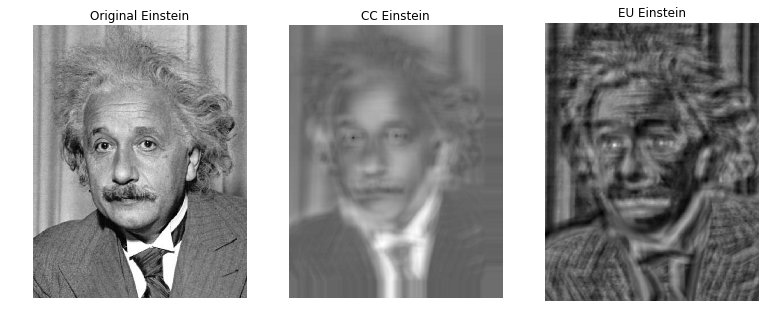

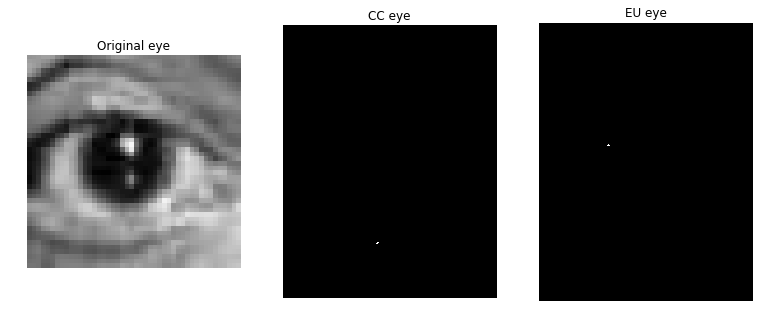

In [44]:
visualize(einstein, eye)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

(-0.5, 549.5, 716.5, -0.5)

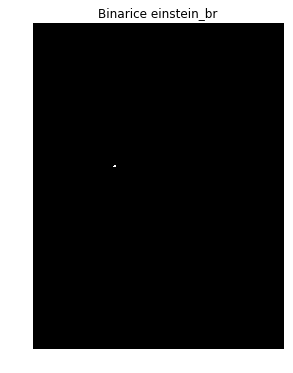

In [20]:
einsteinbr = io.imread('./images/einstein_br.png')
resultCCbr=fCC(einsteinbr,eye)

fig1, (ax1) = plt.subplots(ncols=1, figsize=(13, 6))
ax1.imshow(resultCCbr > resultCCbr.max()-0.3,cmap='gray')
ax1.set_title('Binarice einstein_br')
ax1.axis('off')

1.3 Display the results on `einstein_mask.png`:

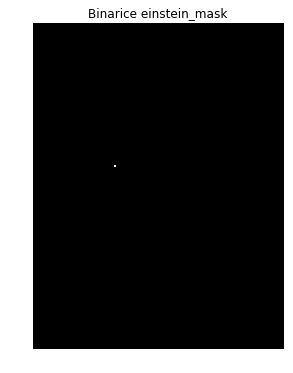

In [21]:
einsteinmask = io.imread('./images/einstein_mask.png')
resultCCmask=fCC(einsteinmask,eye)

fig1, (ax1) = plt.subplots(ncols=1, figsize=(13, 6))
ax1.imshow(resultCCmask > resultCCmask.max()-0.1,cmap='gray')
ax1.set_title('Binarice einstein_mask')
ax1.axis('off')

plt.show()

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

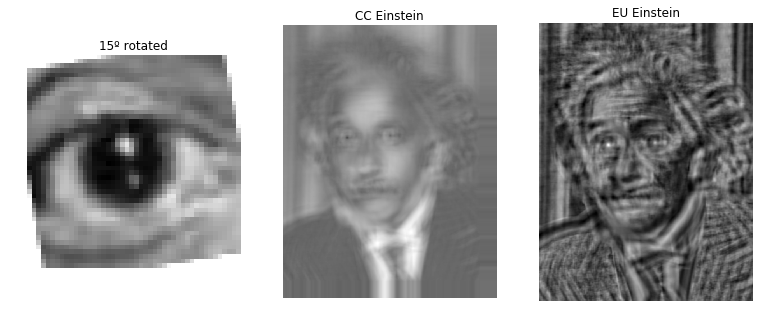

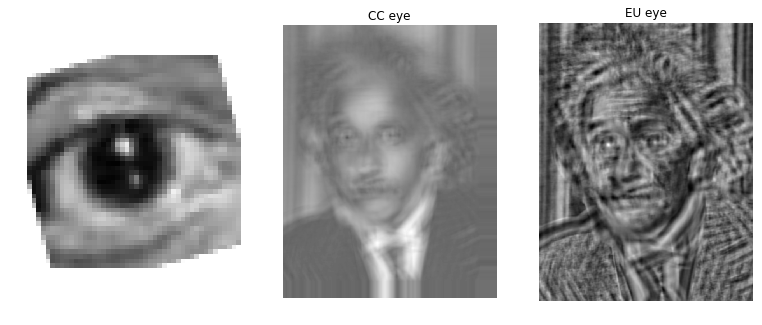

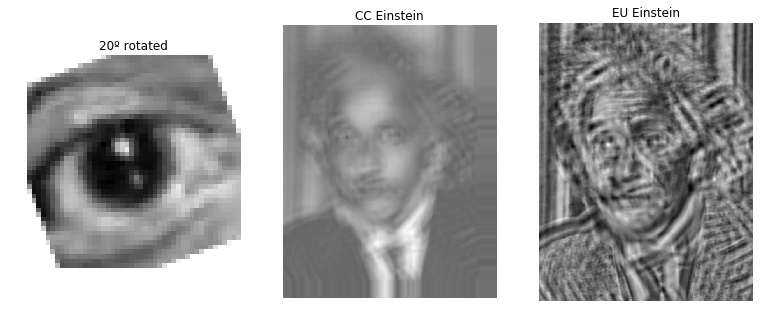

In [48]:
from skimage.transform import rotate

eye10=rotate(eye, 10)
eye15=rotate(eye, 15)
eye20=rotate(eye, 20)
einstein=io.imread('./images/einstein.png')
image=rgb2gray(einstein)


fig1, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 6))
fig2, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(13, 6))
fig3, (ax7, ax8, ax9) = plt.subplots(ncols=3, figsize=(13, 6))


ax1.imshow(eye10, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('10º rotated')

ax2.imshow(fEu(image,eye10), cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('CC Einstein')

ax3.imshow(fCC(image,eye10),cmap='gray')
ax3.set_axis_off()
ax3.set_title('EU Einstein')



ax4.imshow(eye15, cmap=plt.cm.gray)
ax4.set_axis_off()
ax1.set_title('15º rotated')

ax5.imshow(fEu(image,eye15), cmap=plt.cm.gray)
ax5.set_axis_off()
ax5.set_title('CC eye')

ax6.imshow(fCC(image,eye15), cmap=plt.cm.gray)
ax6.set_axis_off()
ax6.set_title('EU eye')



ax7.imshow(eye20, cmap=plt.cm.gray)
ax7.set_axis_off()
ax7.set_title('20º rotated')

ax8.imshow(fEu(image,eye20), cmap=plt.cm.gray)
ax8.set_axis_off()
ax8.set_title('CC Einstein')

ax9.imshow(fCC(image,eye20),cmap='gray')
ax9.set_axis_off()
ax9.set_title('EU Einstein')


plt.show()

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

# 2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique.

2.1 Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

Hint: the HOG detector function is in the skimage.feature library. 

/home/ico/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'HOG car_template')

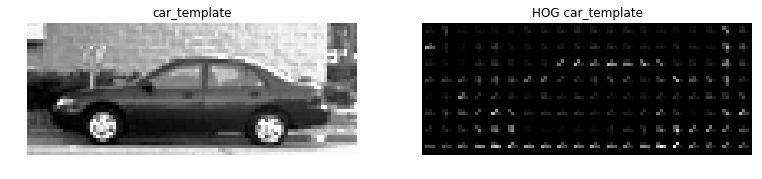

In [53]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure

car_template = io.imread('./images/car_template.png')
car_template_gray = color.rgb2gray(car_template)

fd, car_template_HOG = hog(car_template_gray, orientations=8, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise=True)

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))


ax1.imshow(car_template_gray, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('car_template')

ax2.imshow(rgb2gray(car_template_HOG), cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('HOG car_template')

2.2 Apply the HOG descriptor on the complete set of images.

a) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. **In order to accelerate algorithm execution, you must apply a sliding window with a step of X pixels both vertically and horizontally (e.g. X=5).**

b) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results.

Display the results of every car detection and for each distance following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [54]:
''' Visualization and HOG functions definition '''
def fEu(img1,img2):
    
    img1=rgb2gray(img1)
    img2=rgb2gray(img2)
    resultado=np.zeros(img1.shape)
    
    for i in range(img1.shape[0]-img2.shape[0]):
        for j in range(img1.shape[1]-img2.shape[1]):
            resultado[i:i+img2.shape[0],j:j+img2.shape[1]]= \
            np.linalg.norm( img1[i:(i+img2.shape[0]) , j:(j+img2.shape[1])] - img2[:,:])
    
    return resultado

def fCC(img1,img2):
    
    img1=rgb2gray(img1)
    img2=rgb2gray(img2)
    result = match_template(img1, img2)
    
    return result


def visual2(img1,img2,img3,img4, thresholdHEu = 0.3,threshholdCC = 0.55):
    image=rgb2gray(img1)
    image2=rgb2gray(img2)
    ij= np.unravel_index(np.argmax(img3), img3.shape)
    x, y = ij[::-1]
    
    
    fig = plt.figure(figsize=(14, 6))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
    ax3 = plt.subplot(1, 3, 3)
    
    ax1.imshow(image2, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('template (original car)')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_title('image where to find the template')
    
    ax3.imshow(img4)
    
    # highlight matched region
    himage2, wimage2 = image2.shape
    rect = plt.Rectangle((x, y), wimage2, himage2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
    ax2.autoscale(False)
    
    # highlight matched region
    himage2, wimage2 = image2.shape
    rect4 = plt.Rectangle((x, y), wimage2, himage2, edgecolor='r', facecolor='none')
    ax3.add_patch(rect4)
    ax3.autoscale(False)
    ax3.set_title('image + most acurate template')

    

    plt.show()

Image:  0
    Cross-correlation


/home/ico/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
/home/ico/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


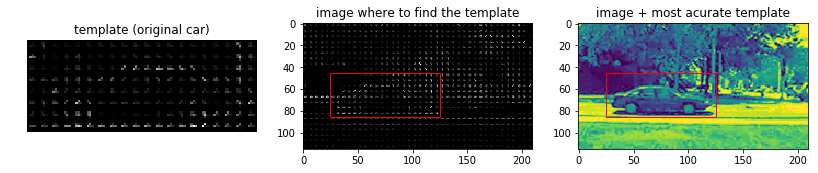

    Euclidean


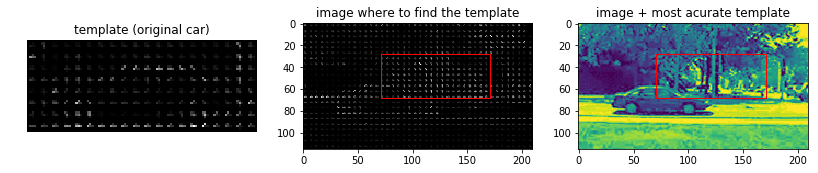

Image:  1
    Cross-correlation


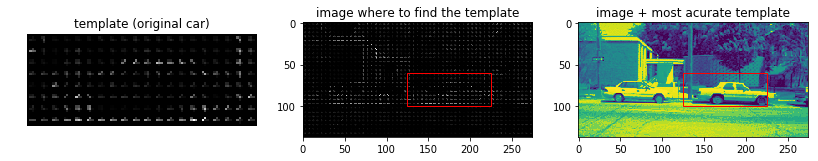

    Euclidean


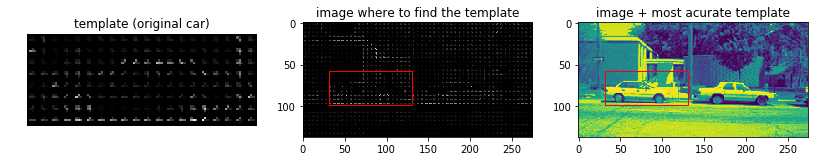

Image:  2
    Cross-correlation


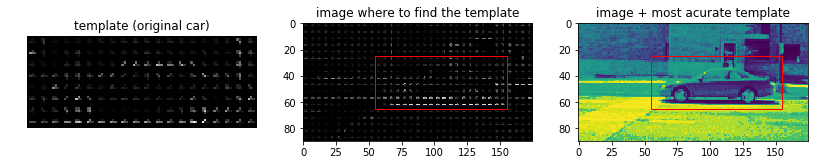

    Euclidean


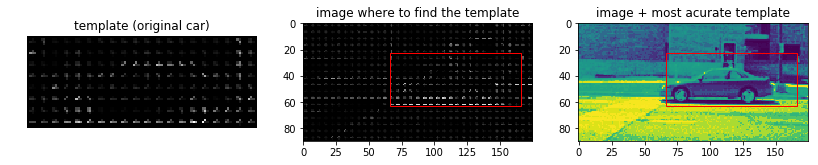

Image:  3
    Cross-correlation


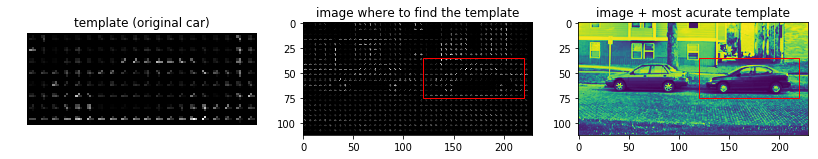

    Euclidean


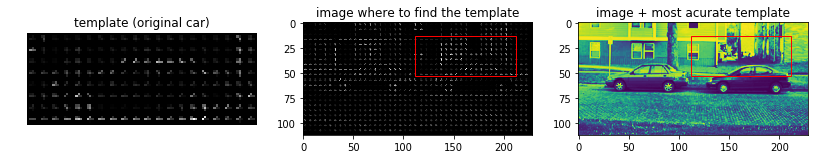

Image:  4
    Cross-correlation


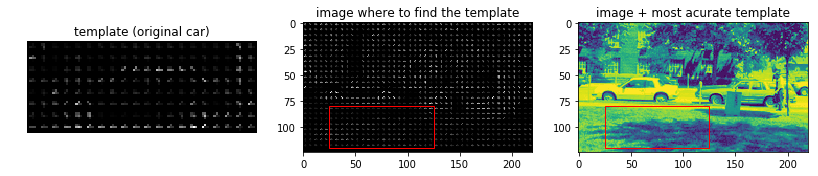

    Euclidean


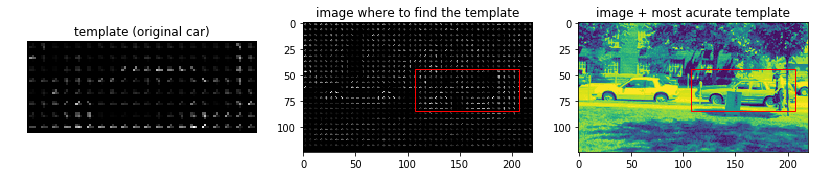

In [57]:
carFolder = io.ImageCollection('images/TestImages/*.pgm')
i = 0

for img in carFolder:
    img = rgb2gray(img)
    
sample_folder = carFolder[:5]

    
for img in sample_folder:
    print ('Image: ',i)
    fd, sample_img_HOG = hog(img, orientations=8, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise=True)
    print ('    Cross-correlation')
    visual2(sample_img_HOG, car_template_HOG, fCC(sample_img_HOG, car_template_HOG), img)
    print ('    Euclidean')
    visual2(sample_img_HOG, car_template_HOG, fEu(sample_img_HOG, car_template_HOG), img)
    i+=1

2.3 Count on how many images were the cars detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

Analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1 Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

In [61]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


def ORBdescriptor(img1,img2):
    img1 = rgb2gray(img1)
    img2 = rgb2gray(img2)
    
    descriptor_extractor = ORB(n_keypoints=50)

    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    
    
    matches = match_descriptors(descriptors1, descriptors2, cross_check=True)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,8))

    plt.gray()

    plot_matches_aux(ax, img1, img2, keypoints1, keypoints2, matches)
    ax.axis('off')
    ax.set_title("Original Image vs. Transformed Image")


    plt.show()



/home/ico/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


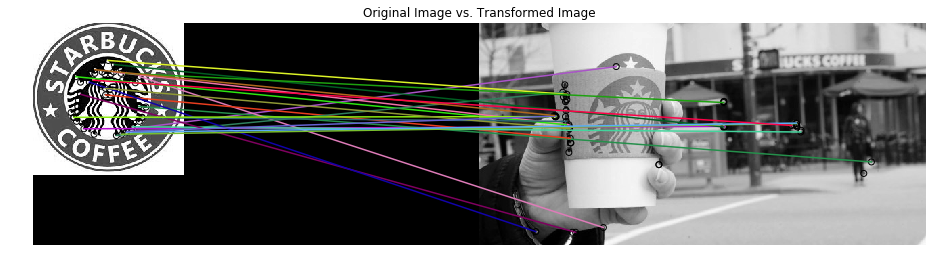

In [62]:
starbucks = io.imread('./images/starbucks.jpg')
starbucks6 = io.imread('./images/starbucks6.jpg')

ORBdescriptor(starbucks,starbucks6)

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

/home/ico/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


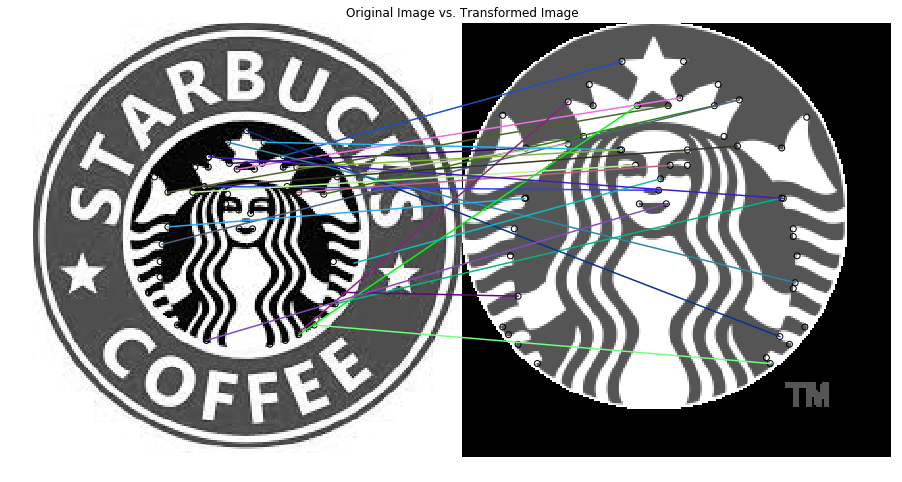

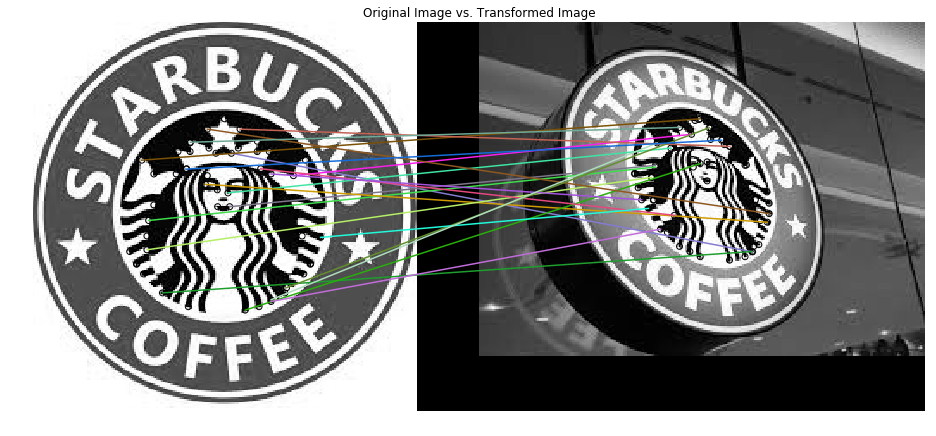

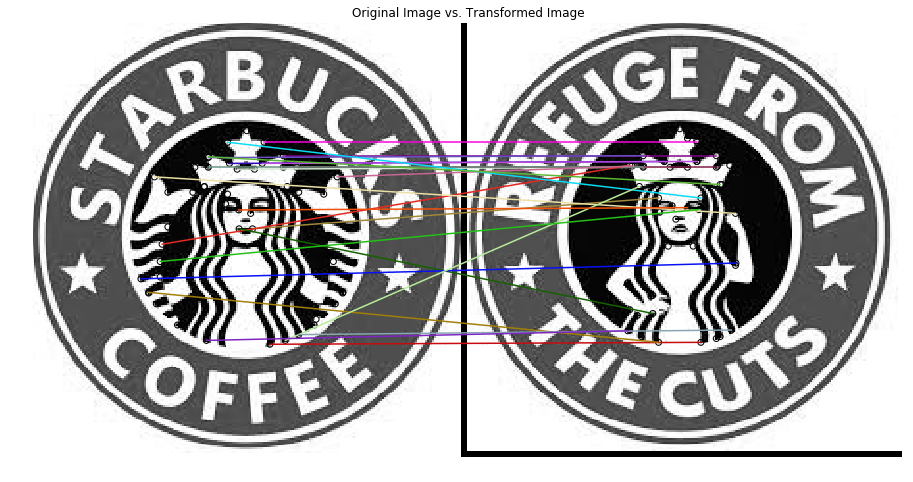

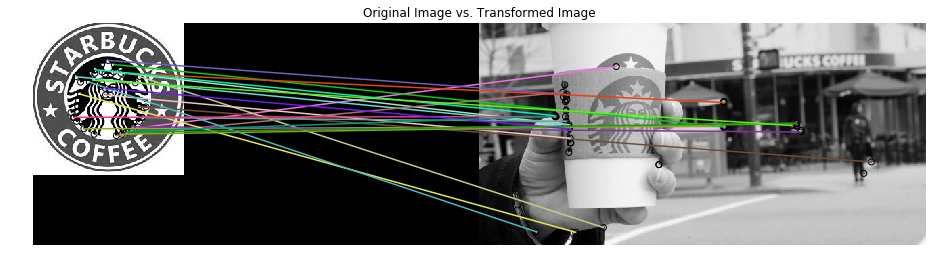

In [63]:
starbucks = io.imread('./images/starbucks.jpg')
starbucks2 = io.imread('./images/starbucks2.png')
starbucks4 = io.imread('./images/starbucks4.jpg')
starbucks5 = io.imread('./images/starbucks5.png')
starbucks6 = io.imread('./images/starbucks6.jpg')


ORBdescriptor(starbucks,starbucks2)
ORBdescriptor(starbucks,starbucks4)
ORBdescriptor(starbucks,starbucks5)
ORBdescriptor(starbucks,starbucks6)


3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

/home/ico/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


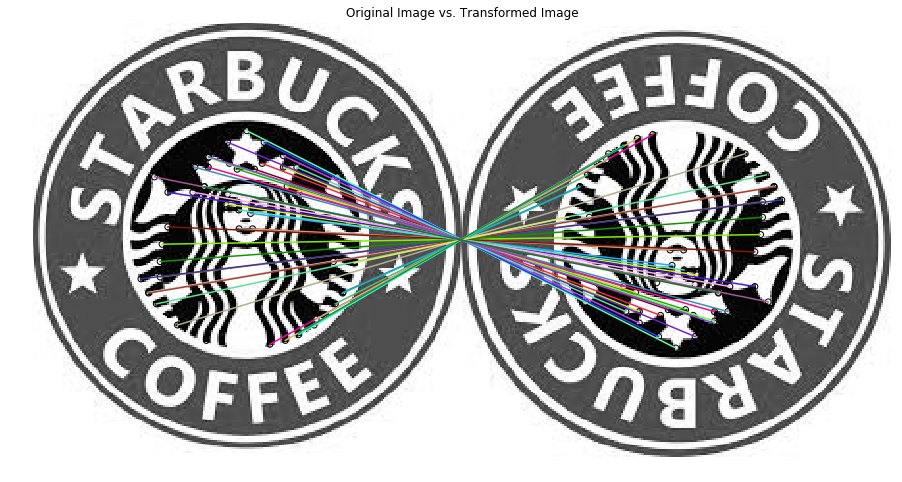

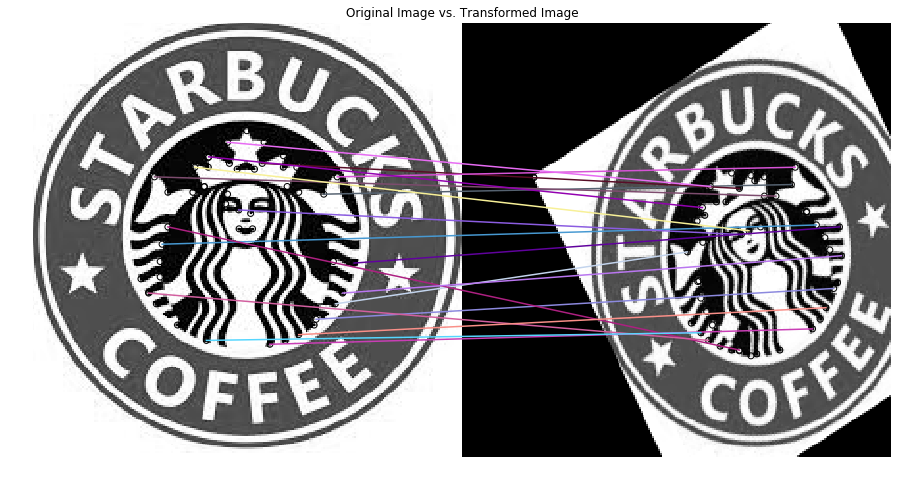

In [64]:
starbucks = io.imread('./images/starbucks.jpg')

starbucksRotate = tf.rotate(starbucks, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,translation=(0, -100))
starbucksScale = tf.warp(starbucks, tform)

ORBdescriptor(starbucks,starbucksRotate)
ORBdescriptor(starbucks,starbucksScale)


3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

### Appendix

In [60]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)